In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from PROMETHEE import PROMETHEE_2, optimize_PROM2_original, optimize_newconstraint, optimize_PROM2_original_positive_beta
from sklearn.preprocessing import StandardScaler

In [3]:
dados = pd.read_excel("dados.xlsx", index_col=0)
dados

Property Rights  Judical Effectiveness  Government Integrity  \
Afghanistan             19.6                   29.6                  25.2   
Albania                 54.8                   30.6                  40.4   
Algeria                 31.6                   36.2                  28.9   
Angola                  35.9                   26.6                  20.5   
Argentina               47.8                   44.5                  33.5   
...                      ...                    ...                   ...   
Vanuatu                 65.9                   36.4                  51.9   
Venezuela                7.6                   13.1                   7.9   
Vietnam                 49.8                   40.3                  34.0   
Zambia                  45.0                   35.6                  32.3   
Zimbabwe                29.7                   24.8                  15.8   

             Tax Burden  Gov't Spending  Fiscal Health  Business Freedom  \
Afghanistan        91.7            80.3           99.3              49.2   
Albania            86.3            73.9           80.6              69.3   
Algeria            76.4            48.7           18.7              61.6   
Angola             83.9            80.7           58.2              55.7   
Argentina          69.3            49.5           33.0              56.4   
...                 ...             ...            ...               ...   
Vanuatu            97.3            54.1           15.3              52.4   
Venezuela          74.7            58.1           17.6              33.9   
Vietnam            79.7            74.1           40.7              63.5   
Zambia             72.3            80.1           12.3              71.1   
Zimbabwe           62.3            74.5           23.7              33.4   

             Labor Freedom  Monetary Freedom  Trade Freedom  \
Afghanistan           60.4              76.7           66.0   
Albania               52.7              81.5           87.8   
Algeria               49.9              74.9           67.4   
Angola                58.8              55.4           61.2   
Argentina             46.9              60.2           70.0   
...                    ...               ...            ...   
Vanuatu               58.8              75.0           64.4   
Venezuela             28.0               0.0           60.0   
Vietnam               62.8              68.9           79.2   
Zambia                46.0              70.3           72.6   
Zimbabwe              43.3              72.4           70.0   

             Investment Freedom   Financial Freedom  
Afghanistan                   10                 10  
Albania                       70                 70  
Algeria                       30                 30  
Angola                        30                 40  
Argentina                     55                 60  
...                          ...                ...  
Vanuatu                       65                 40  
Venezuela                      0                 10  
Vietnam                       30                 40  
Zambia                        55                 50  
Zimbabwe                      25                 10  

[180 rows x 12 columns]

In [4]:
X = np.array(dados) # decision matrix
m, n = X.shape

In [5]:
#solve the problem with PROMETHEE II
net_flows_heritage = PROMETHEE_2 (X, [1.5 for i in range (n)], [3.5 for i in range (n)], [0 for i in range (n)], [1/n for i in range (n)], [5 for i in range (n)])[1]
net_flows_heritage = pd.DataFrame(net_flows_heritage, index = dados.index, columns=["$\phi$"])

In [6]:
net_flows_heritage["Position"] = net_flows_heritage.rank(ascending=False)
net_flows_heritage

$\phi$  Position
Afghanistan -0.279143     141.0
Albania      0.209730      55.0
Algeria     -0.482635     170.0
Angola      -0.424651     162.0
Argentina   -0.342831     153.0
...               ...       ...
Vanuatu     -0.109846     105.0
Venezuela   -0.824162     179.0
Vietnam     -0.170717     118.0
Zambia      -0.261592     134.0
Zimbabwe    -0.671974     177.0

[180 rows x 2 columns]

In [33]:
net_flows_heritage.to_excel("RankingPROMETHEEII.xlsx")

In [34]:
pgrn = np.random.RandomState(0) # create a random number generator with a fixed seed

n_simulations = 10000 # number of simulations
W = np.zeros(shape = (n, n_simulations)) # weight matrix
P = np.zeros(shape = (n, n_simulations)) # preference threshold matrix
Q = np.zeros(shape = (n, n_simulations)) # indifference threshold matrix

Net_Flows = np.zeros(shape = (m, n_simulations)) # matrix that will receive the PROMETHEE II net flows
Pos_Flows = np.zeros(shape = (m, n_simulations))
Neg_Flows = np.zeros(shape = (m, n_simulations))
results = [[] for s in range (n_simulations)]


s_curve = [0 for j in range (n)] # it will not be used 
pref = [5 for j in range (n)] # We will always use pref. function 5

for s in range (n_simulations):
    W [:,s] = pgrn.dirichlet(np.ones(n),size=1).reshape(n) # weights come from a dirichlet distribution
    Q [:,s] = pgrn.uniform (1,2, n) # q_j between 1 and 2
    P [:,s] = pgrn.uniform (3, 4, n) # p_j between 3 and 4
    results[s], Net_Flows[:,s], Pos_Flows[:,s], Neg_Flows[:,s] = PROMETHEE_2 (X, Q[:,s], P[:,s], s_curve, W[:,s], pref)
    print (f'simulation {s+1} completed')

simulation 1 completed
simulation 2 completed
simulation 3 completed
simulation 4 completed
simulation 5 completed
simulation 6 completed
simulation 7 completed
simulation 8 completed
simulation 9 completed
simulation 10 completed
simulation 11 completed
simulation 12 completed
simulation 13 completed
simulation 14 completed
simulation 15 completed
simulation 16 completed
simulation 17 completed
simulation 18 completed
simulation 19 completed
simulation 20 completed
simulation 21 completed
simulation 22 completed
simulation 23 completed
simulation 24 completed
simulation 25 completed
simulation 26 completed
simulation 27 completed
simulation 28 completed
simulation 29 completed
simulation 30 completed
simulation 31 completed
simulation 32 completed
simulation 33 completed
simulation 34 completed
simulation 35 completed
simulation 36 completed
simulation 37 completed
simulation 38 completed
simulation 39 completed
simulation 40 completed
simulation 41 completed
simulation 42 completed
s

simulation 334 completed
simulation 335 completed
simulation 336 completed
simulation 337 completed
simulation 338 completed
simulation 339 completed
simulation 340 completed
simulation 341 completed
simulation 342 completed
simulation 343 completed
simulation 344 completed
simulation 345 completed
simulation 346 completed
simulation 347 completed
simulation 348 completed
simulation 349 completed
simulation 350 completed
simulation 351 completed
simulation 352 completed
simulation 353 completed
simulation 354 completed
simulation 355 completed
simulation 356 completed
simulation 357 completed
simulation 358 completed
simulation 359 completed
simulation 360 completed
simulation 361 completed
simulation 362 completed
simulation 363 completed
simulation 364 completed
simulation 365 completed
simulation 366 completed
simulation 367 completed
simulation 368 completed
simulation 369 completed
simulation 370 completed
simulation 371 completed
simulation 372 completed
simulation 373 completed


simulation 662 completed
simulation 663 completed
simulation 664 completed
simulation 665 completed
simulation 666 completed
simulation 667 completed
simulation 668 completed
simulation 669 completed
simulation 670 completed
simulation 671 completed
simulation 672 completed
simulation 673 completed
simulation 674 completed
simulation 675 completed
simulation 676 completed
simulation 677 completed
simulation 678 completed
simulation 679 completed
simulation 680 completed
simulation 681 completed
simulation 682 completed
simulation 683 completed
simulation 684 completed
simulation 685 completed
simulation 686 completed
simulation 687 completed
simulation 688 completed
simulation 689 completed
simulation 690 completed
simulation 691 completed
simulation 692 completed
simulation 693 completed
simulation 694 completed
simulation 695 completed
simulation 696 completed
simulation 697 completed
simulation 698 completed
simulation 699 completed
simulation 700 completed
simulation 701 completed


simulation 990 completed
simulation 991 completed
simulation 992 completed
simulation 993 completed
simulation 994 completed
simulation 995 completed
simulation 996 completed
simulation 997 completed
simulation 998 completed
simulation 999 completed
simulation 1000 completed
simulation 1001 completed
simulation 1002 completed
simulation 1003 completed
simulation 1004 completed
simulation 1005 completed
simulation 1006 completed
simulation 1007 completed
simulation 1008 completed
simulation 1009 completed
simulation 1010 completed
simulation 1011 completed
simulation 1012 completed
simulation 1013 completed
simulation 1014 completed
simulation 1015 completed
simulation 1016 completed
simulation 1017 completed
simulation 1018 completed
simulation 1019 completed
simulation 1020 completed
simulation 1021 completed
simulation 1022 completed
simulation 1023 completed
simulation 1024 completed
simulation 1025 completed
simulation 1026 completed
simulation 1027 completed
simulation 1028 comple

simulation 1306 completed
simulation 1307 completed
simulation 1308 completed
simulation 1309 completed
simulation 1310 completed
simulation 1311 completed
simulation 1312 completed
simulation 1313 completed
simulation 1314 completed
simulation 1315 completed
simulation 1316 completed
simulation 1317 completed
simulation 1318 completed
simulation 1319 completed
simulation 1320 completed
simulation 1321 completed
simulation 1322 completed
simulation 1323 completed
simulation 1324 completed
simulation 1325 completed
simulation 1326 completed
simulation 1327 completed
simulation 1328 completed
simulation 1329 completed
simulation 1330 completed
simulation 1331 completed
simulation 1332 completed
simulation 1333 completed
simulation 1334 completed
simulation 1335 completed
simulation 1336 completed
simulation 1337 completed
simulation 1338 completed
simulation 1339 completed
simulation 1340 completed
simulation 1341 completed
simulation 1342 completed
simulation 1343 completed
simulation 1

simulation 1622 completed
simulation 1623 completed
simulation 1624 completed
simulation 1625 completed
simulation 1626 completed
simulation 1627 completed
simulation 1628 completed
simulation 1629 completed
simulation 1630 completed
simulation 1631 completed
simulation 1632 completed
simulation 1633 completed
simulation 1634 completed
simulation 1635 completed
simulation 1636 completed
simulation 1637 completed
simulation 1638 completed
simulation 1639 completed
simulation 1640 completed
simulation 1641 completed
simulation 1642 completed
simulation 1643 completed
simulation 1644 completed
simulation 1645 completed
simulation 1646 completed
simulation 1647 completed
simulation 1648 completed
simulation 1649 completed
simulation 1650 completed
simulation 1651 completed
simulation 1652 completed
simulation 1653 completed
simulation 1654 completed
simulation 1655 completed
simulation 1656 completed
simulation 1657 completed
simulation 1658 completed
simulation 1659 completed
simulation 1

simulation 1938 completed
simulation 1939 completed
simulation 1940 completed
simulation 1941 completed
simulation 1942 completed
simulation 1943 completed
simulation 1944 completed
simulation 1945 completed
simulation 1946 completed
simulation 1947 completed
simulation 1948 completed
simulation 1949 completed
simulation 1950 completed
simulation 1951 completed
simulation 1952 completed
simulation 1953 completed
simulation 1954 completed
simulation 1955 completed
simulation 1956 completed
simulation 1957 completed
simulation 1958 completed
simulation 1959 completed
simulation 1960 completed
simulation 1961 completed
simulation 1962 completed
simulation 1963 completed
simulation 1964 completed
simulation 1965 completed
simulation 1966 completed
simulation 1967 completed
simulation 1968 completed
simulation 1969 completed
simulation 1970 completed
simulation 1971 completed
simulation 1972 completed
simulation 1973 completed
simulation 1974 completed
simulation 1975 completed
simulation 1

simulation 2254 completed
simulation 2255 completed
simulation 2256 completed
simulation 2257 completed
simulation 2258 completed
simulation 2259 completed
simulation 2260 completed
simulation 2261 completed
simulation 2262 completed
simulation 2263 completed
simulation 2264 completed
simulation 2265 completed
simulation 2266 completed
simulation 2267 completed
simulation 2268 completed
simulation 2269 completed
simulation 2270 completed
simulation 2271 completed
simulation 2272 completed
simulation 2273 completed
simulation 2274 completed
simulation 2275 completed
simulation 2276 completed
simulation 2277 completed
simulation 2278 completed
simulation 2279 completed
simulation 2280 completed
simulation 2281 completed
simulation 2282 completed
simulation 2283 completed
simulation 2284 completed
simulation 2285 completed
simulation 2286 completed
simulation 2287 completed
simulation 2288 completed
simulation 2289 completed
simulation 2290 completed
simulation 2291 completed
simulation 2

simulation 2570 completed
simulation 2571 completed
simulation 2572 completed
simulation 2573 completed
simulation 2574 completed
simulation 2575 completed
simulation 2576 completed
simulation 2577 completed
simulation 2578 completed
simulation 2579 completed
simulation 2580 completed
simulation 2581 completed
simulation 2582 completed
simulation 2583 completed
simulation 2584 completed
simulation 2585 completed
simulation 2586 completed
simulation 2587 completed
simulation 2588 completed
simulation 2589 completed
simulation 2590 completed
simulation 2591 completed
simulation 2592 completed
simulation 2593 completed
simulation 2594 completed
simulation 2595 completed
simulation 2596 completed
simulation 2597 completed
simulation 2598 completed
simulation 2599 completed
simulation 2600 completed
simulation 2601 completed
simulation 2602 completed
simulation 2603 completed
simulation 2604 completed
simulation 2605 completed
simulation 2606 completed
simulation 2607 completed
simulation 2

simulation 2886 completed
simulation 2887 completed
simulation 2888 completed
simulation 2889 completed
simulation 2890 completed
simulation 2891 completed
simulation 2892 completed
simulation 2893 completed
simulation 2894 completed
simulation 2895 completed
simulation 2896 completed
simulation 2897 completed
simulation 2898 completed
simulation 2899 completed
simulation 2900 completed
simulation 2901 completed
simulation 2902 completed
simulation 2903 completed
simulation 2904 completed
simulation 2905 completed
simulation 2906 completed
simulation 2907 completed
simulation 2908 completed
simulation 2909 completed
simulation 2910 completed
simulation 2911 completed
simulation 2912 completed
simulation 2913 completed
simulation 2914 completed
simulation 2915 completed
simulation 2916 completed
simulation 2917 completed
simulation 2918 completed
simulation 2919 completed
simulation 2920 completed
simulation 2921 completed
simulation 2922 completed
simulation 2923 completed
simulation 2

simulation 3202 completed
simulation 3203 completed
simulation 3204 completed
simulation 3205 completed
simulation 3206 completed
simulation 3207 completed
simulation 3208 completed
simulation 3209 completed
simulation 3210 completed
simulation 3211 completed
simulation 3212 completed
simulation 3213 completed
simulation 3214 completed
simulation 3215 completed
simulation 3216 completed
simulation 3217 completed
simulation 3218 completed
simulation 3219 completed
simulation 3220 completed
simulation 3221 completed
simulation 3222 completed
simulation 3223 completed
simulation 3224 completed
simulation 3225 completed
simulation 3226 completed
simulation 3227 completed
simulation 3228 completed
simulation 3229 completed
simulation 3230 completed
simulation 3231 completed
simulation 3232 completed
simulation 3233 completed
simulation 3234 completed
simulation 3235 completed
simulation 3236 completed
simulation 3237 completed
simulation 3238 completed
simulation 3239 completed
simulation 3

simulation 3518 completed
simulation 3519 completed
simulation 3520 completed
simulation 3521 completed
simulation 3522 completed
simulation 3523 completed
simulation 3524 completed
simulation 3525 completed
simulation 3526 completed
simulation 3527 completed
simulation 3528 completed
simulation 3529 completed
simulation 3530 completed
simulation 3531 completed
simulation 3532 completed
simulation 3533 completed
simulation 3534 completed
simulation 3535 completed
simulation 3536 completed
simulation 3537 completed
simulation 3538 completed
simulation 3539 completed
simulation 3540 completed
simulation 3541 completed
simulation 3542 completed
simulation 3543 completed
simulation 3544 completed
simulation 3545 completed
simulation 3546 completed
simulation 3547 completed
simulation 3548 completed
simulation 3549 completed
simulation 3550 completed
simulation 3551 completed
simulation 3552 completed
simulation 3553 completed
simulation 3554 completed
simulation 3555 completed
simulation 3

simulation 3834 completed
simulation 3835 completed
simulation 3836 completed
simulation 3837 completed
simulation 3838 completed
simulation 3839 completed
simulation 3840 completed
simulation 3841 completed
simulation 3842 completed
simulation 3843 completed
simulation 3844 completed
simulation 3845 completed
simulation 3846 completed
simulation 3847 completed
simulation 3848 completed
simulation 3849 completed
simulation 3850 completed
simulation 3851 completed
simulation 3852 completed
simulation 3853 completed
simulation 3854 completed
simulation 3855 completed
simulation 3856 completed
simulation 3857 completed
simulation 3858 completed
simulation 3859 completed
simulation 3860 completed
simulation 3861 completed
simulation 3862 completed
simulation 3863 completed
simulation 3864 completed
simulation 3865 completed
simulation 3866 completed
simulation 3867 completed
simulation 3868 completed
simulation 3869 completed
simulation 3870 completed
simulation 3871 completed
simulation 3

simulation 4150 completed
simulation 4151 completed
simulation 4152 completed
simulation 4153 completed
simulation 4154 completed
simulation 4155 completed
simulation 4156 completed
simulation 4157 completed
simulation 4158 completed
simulation 4159 completed
simulation 4160 completed
simulation 4161 completed
simulation 4162 completed
simulation 4163 completed
simulation 4164 completed
simulation 4165 completed
simulation 4166 completed
simulation 4167 completed
simulation 4168 completed
simulation 4169 completed
simulation 4170 completed
simulation 4171 completed
simulation 4172 completed
simulation 4173 completed
simulation 4174 completed
simulation 4175 completed
simulation 4176 completed
simulation 4177 completed
simulation 4178 completed
simulation 4179 completed
simulation 4180 completed
simulation 4181 completed
simulation 4182 completed
simulation 4183 completed
simulation 4184 completed
simulation 4185 completed
simulation 4186 completed
simulation 4187 completed
simulation 4

simulation 4466 completed
simulation 4467 completed
simulation 4468 completed
simulation 4469 completed
simulation 4470 completed
simulation 4471 completed
simulation 4472 completed
simulation 4473 completed
simulation 4474 completed
simulation 4475 completed
simulation 4476 completed
simulation 4477 completed
simulation 4478 completed
simulation 4479 completed
simulation 4480 completed
simulation 4481 completed
simulation 4482 completed
simulation 4483 completed
simulation 4484 completed
simulation 4485 completed
simulation 4486 completed
simulation 4487 completed
simulation 4488 completed
simulation 4489 completed
simulation 4490 completed
simulation 4491 completed
simulation 4492 completed
simulation 4493 completed
simulation 4494 completed
simulation 4495 completed
simulation 4496 completed
simulation 4497 completed
simulation 4498 completed
simulation 4499 completed
simulation 4500 completed
simulation 4501 completed
simulation 4502 completed
simulation 4503 completed
simulation 4

simulation 4782 completed
simulation 4783 completed
simulation 4784 completed
simulation 4785 completed
simulation 4786 completed
simulation 4787 completed
simulation 4788 completed
simulation 4789 completed
simulation 4790 completed
simulation 4791 completed
simulation 4792 completed
simulation 4793 completed
simulation 4794 completed
simulation 4795 completed
simulation 4796 completed
simulation 4797 completed
simulation 4798 completed
simulation 4799 completed
simulation 4800 completed
simulation 4801 completed
simulation 4802 completed
simulation 4803 completed
simulation 4804 completed
simulation 4805 completed
simulation 4806 completed
simulation 4807 completed
simulation 4808 completed
simulation 4809 completed
simulation 4810 completed
simulation 4811 completed
simulation 4812 completed
simulation 4813 completed
simulation 4814 completed
simulation 4815 completed
simulation 4816 completed
simulation 4817 completed
simulation 4818 completed
simulation 4819 completed
simulation 4

simulation 5098 completed
simulation 5099 completed
simulation 5100 completed
simulation 5101 completed
simulation 5102 completed
simulation 5103 completed
simulation 5104 completed
simulation 5105 completed
simulation 5106 completed
simulation 5107 completed
simulation 5108 completed
simulation 5109 completed
simulation 5110 completed
simulation 5111 completed
simulation 5112 completed
simulation 5113 completed
simulation 5114 completed
simulation 5115 completed
simulation 5116 completed
simulation 5117 completed
simulation 5118 completed
simulation 5119 completed
simulation 5120 completed
simulation 5121 completed
simulation 5122 completed
simulation 5123 completed
simulation 5124 completed
simulation 5125 completed
simulation 5126 completed
simulation 5127 completed
simulation 5128 completed
simulation 5129 completed
simulation 5130 completed
simulation 5131 completed
simulation 5132 completed
simulation 5133 completed
simulation 5134 completed
simulation 5135 completed
simulation 5

simulation 5414 completed
simulation 5415 completed
simulation 5416 completed
simulation 5417 completed
simulation 5418 completed
simulation 5419 completed
simulation 5420 completed
simulation 5421 completed
simulation 5422 completed
simulation 5423 completed
simulation 5424 completed
simulation 5425 completed
simulation 5426 completed
simulation 5427 completed
simulation 5428 completed
simulation 5429 completed
simulation 5430 completed
simulation 5431 completed
simulation 5432 completed
simulation 5433 completed
simulation 5434 completed
simulation 5435 completed
simulation 5436 completed
simulation 5437 completed
simulation 5438 completed
simulation 5439 completed
simulation 5440 completed
simulation 5441 completed
simulation 5442 completed
simulation 5443 completed
simulation 5444 completed
simulation 5445 completed
simulation 5446 completed
simulation 5447 completed
simulation 5448 completed
simulation 5449 completed
simulation 5450 completed
simulation 5451 completed
simulation 5

simulation 5730 completed
simulation 5731 completed
simulation 5732 completed
simulation 5733 completed
simulation 5734 completed
simulation 5735 completed
simulation 5736 completed
simulation 5737 completed
simulation 5738 completed
simulation 5739 completed
simulation 5740 completed
simulation 5741 completed
simulation 5742 completed
simulation 5743 completed
simulation 5744 completed
simulation 5745 completed
simulation 5746 completed
simulation 5747 completed
simulation 5748 completed
simulation 5749 completed
simulation 5750 completed
simulation 5751 completed
simulation 5752 completed
simulation 5753 completed
simulation 5754 completed
simulation 5755 completed
simulation 5756 completed
simulation 5757 completed
simulation 5758 completed
simulation 5759 completed
simulation 5760 completed
simulation 5761 completed
simulation 5762 completed
simulation 5763 completed
simulation 5764 completed
simulation 5765 completed
simulation 5766 completed
simulation 5767 completed
simulation 5

simulation 6046 completed
simulation 6047 completed
simulation 6048 completed
simulation 6049 completed
simulation 6050 completed
simulation 6051 completed
simulation 6052 completed
simulation 6053 completed
simulation 6054 completed
simulation 6055 completed
simulation 6056 completed
simulation 6057 completed
simulation 6058 completed
simulation 6059 completed
simulation 6060 completed
simulation 6061 completed
simulation 6062 completed
simulation 6063 completed
simulation 6064 completed
simulation 6065 completed
simulation 6066 completed
simulation 6067 completed
simulation 6068 completed
simulation 6069 completed
simulation 6070 completed
simulation 6071 completed
simulation 6072 completed
simulation 6073 completed
simulation 6074 completed
simulation 6075 completed
simulation 6076 completed
simulation 6077 completed
simulation 6078 completed
simulation 6079 completed
simulation 6080 completed
simulation 6081 completed
simulation 6082 completed
simulation 6083 completed
simulation 6

simulation 6362 completed
simulation 6363 completed
simulation 6364 completed
simulation 6365 completed
simulation 6366 completed
simulation 6367 completed
simulation 6368 completed
simulation 6369 completed
simulation 6370 completed
simulation 6371 completed
simulation 6372 completed
simulation 6373 completed
simulation 6374 completed
simulation 6375 completed
simulation 6376 completed
simulation 6377 completed
simulation 6378 completed
simulation 6379 completed
simulation 6380 completed
simulation 6381 completed
simulation 6382 completed
simulation 6383 completed
simulation 6384 completed
simulation 6385 completed
simulation 6386 completed
simulation 6387 completed
simulation 6388 completed
simulation 6389 completed
simulation 6390 completed
simulation 6391 completed
simulation 6392 completed
simulation 6393 completed
simulation 6394 completed
simulation 6395 completed
simulation 6396 completed
simulation 6397 completed
simulation 6398 completed
simulation 6399 completed
simulation 6

simulation 6678 completed
simulation 6679 completed
simulation 6680 completed
simulation 6681 completed
simulation 6682 completed
simulation 6683 completed
simulation 6684 completed
simulation 6685 completed
simulation 6686 completed
simulation 6687 completed
simulation 6688 completed
simulation 6689 completed
simulation 6690 completed
simulation 6691 completed
simulation 6692 completed
simulation 6693 completed
simulation 6694 completed
simulation 6695 completed
simulation 6696 completed
simulation 6697 completed
simulation 6698 completed
simulation 6699 completed
simulation 6700 completed
simulation 6701 completed
simulation 6702 completed
simulation 6703 completed
simulation 6704 completed
simulation 6705 completed
simulation 6706 completed
simulation 6707 completed
simulation 6708 completed
simulation 6709 completed
simulation 6710 completed
simulation 6711 completed
simulation 6712 completed
simulation 6713 completed
simulation 6714 completed
simulation 6715 completed
simulation 6

simulation 6994 completed
simulation 6995 completed
simulation 6996 completed
simulation 6997 completed
simulation 6998 completed
simulation 6999 completed
simulation 7000 completed
simulation 7001 completed
simulation 7002 completed
simulation 7003 completed
simulation 7004 completed
simulation 7005 completed
simulation 7006 completed
simulation 7007 completed
simulation 7008 completed
simulation 7009 completed
simulation 7010 completed
simulation 7011 completed
simulation 7012 completed
simulation 7013 completed
simulation 7014 completed
simulation 7015 completed
simulation 7016 completed
simulation 7017 completed
simulation 7018 completed
simulation 7019 completed
simulation 7020 completed
simulation 7021 completed
simulation 7022 completed
simulation 7023 completed
simulation 7024 completed
simulation 7025 completed
simulation 7026 completed
simulation 7027 completed
simulation 7028 completed
simulation 7029 completed
simulation 7030 completed
simulation 7031 completed
simulation 7

simulation 7310 completed
simulation 7311 completed
simulation 7312 completed
simulation 7313 completed
simulation 7314 completed
simulation 7315 completed
simulation 7316 completed
simulation 7317 completed
simulation 7318 completed
simulation 7319 completed
simulation 7320 completed
simulation 7321 completed
simulation 7322 completed
simulation 7323 completed
simulation 7324 completed
simulation 7325 completed
simulation 7326 completed
simulation 7327 completed
simulation 7328 completed
simulation 7329 completed
simulation 7330 completed
simulation 7331 completed
simulation 7332 completed
simulation 7333 completed
simulation 7334 completed
simulation 7335 completed
simulation 7336 completed
simulation 7337 completed
simulation 7338 completed
simulation 7339 completed
simulation 7340 completed
simulation 7341 completed
simulation 7342 completed
simulation 7343 completed
simulation 7344 completed
simulation 7345 completed
simulation 7346 completed
simulation 7347 completed
simulation 7

simulation 7626 completed
simulation 7627 completed
simulation 7628 completed
simulation 7629 completed
simulation 7630 completed
simulation 7631 completed
simulation 7632 completed
simulation 7633 completed
simulation 7634 completed
simulation 7635 completed
simulation 7636 completed
simulation 7637 completed
simulation 7638 completed
simulation 7639 completed
simulation 7640 completed
simulation 7641 completed
simulation 7642 completed
simulation 7643 completed
simulation 7644 completed
simulation 7645 completed
simulation 7646 completed
simulation 7647 completed
simulation 7648 completed
simulation 7649 completed
simulation 7650 completed
simulation 7651 completed
simulation 7652 completed
simulation 7653 completed
simulation 7654 completed
simulation 7655 completed
simulation 7656 completed
simulation 7657 completed
simulation 7658 completed
simulation 7659 completed
simulation 7660 completed
simulation 7661 completed
simulation 7662 completed
simulation 7663 completed
simulation 7

simulation 7942 completed
simulation 7943 completed
simulation 7944 completed
simulation 7945 completed
simulation 7946 completed
simulation 7947 completed
simulation 7948 completed
simulation 7949 completed
simulation 7950 completed
simulation 7951 completed
simulation 7952 completed
simulation 7953 completed
simulation 7954 completed
simulation 7955 completed
simulation 7956 completed
simulation 7957 completed
simulation 7958 completed
simulation 7959 completed
simulation 7960 completed
simulation 7961 completed
simulation 7962 completed
simulation 7963 completed
simulation 7964 completed
simulation 7965 completed
simulation 7966 completed
simulation 7967 completed
simulation 7968 completed
simulation 7969 completed
simulation 7970 completed
simulation 7971 completed
simulation 7972 completed
simulation 7973 completed
simulation 7974 completed
simulation 7975 completed
simulation 7976 completed
simulation 7977 completed
simulation 7978 completed
simulation 7979 completed
simulation 7

simulation 8258 completed
simulation 8259 completed
simulation 8260 completed
simulation 8261 completed
simulation 8262 completed
simulation 8263 completed
simulation 8264 completed
simulation 8265 completed
simulation 8266 completed
simulation 8267 completed
simulation 8268 completed
simulation 8269 completed
simulation 8270 completed
simulation 8271 completed
simulation 8272 completed
simulation 8273 completed
simulation 8274 completed
simulation 8275 completed
simulation 8276 completed
simulation 8277 completed
simulation 8278 completed
simulation 8279 completed
simulation 8280 completed
simulation 8281 completed
simulation 8282 completed
simulation 8283 completed
simulation 8284 completed
simulation 8285 completed
simulation 8286 completed
simulation 8287 completed
simulation 8288 completed
simulation 8289 completed
simulation 8290 completed
simulation 8291 completed
simulation 8292 completed
simulation 8293 completed
simulation 8294 completed
simulation 8295 completed
simulation 8

simulation 8574 completed
simulation 8575 completed
simulation 8576 completed
simulation 8577 completed
simulation 8578 completed
simulation 8579 completed
simulation 8580 completed
simulation 8581 completed
simulation 8582 completed
simulation 8583 completed
simulation 8584 completed
simulation 8585 completed
simulation 8586 completed
simulation 8587 completed
simulation 8588 completed
simulation 8589 completed
simulation 8590 completed
simulation 8591 completed
simulation 8592 completed
simulation 8593 completed
simulation 8594 completed
simulation 8595 completed
simulation 8596 completed
simulation 8597 completed
simulation 8598 completed
simulation 8599 completed
simulation 8600 completed
simulation 8601 completed
simulation 8602 completed
simulation 8603 completed
simulation 8604 completed
simulation 8605 completed
simulation 8606 completed
simulation 8607 completed
simulation 8608 completed
simulation 8609 completed
simulation 8610 completed
simulation 8611 completed
simulation 8

simulation 8890 completed
simulation 8891 completed
simulation 8892 completed
simulation 8893 completed
simulation 8894 completed
simulation 8895 completed
simulation 8896 completed
simulation 8897 completed
simulation 8898 completed
simulation 8899 completed
simulation 8900 completed
simulation 8901 completed
simulation 8902 completed
simulation 8903 completed
simulation 8904 completed
simulation 8905 completed
simulation 8906 completed
simulation 8907 completed
simulation 8908 completed
simulation 8909 completed
simulation 8910 completed
simulation 8911 completed
simulation 8912 completed
simulation 8913 completed
simulation 8914 completed
simulation 8915 completed
simulation 8916 completed
simulation 8917 completed
simulation 8918 completed
simulation 8919 completed
simulation 8920 completed
simulation 8921 completed
simulation 8922 completed
simulation 8923 completed
simulation 8924 completed
simulation 8925 completed
simulation 8926 completed
simulation 8927 completed
simulation 8

simulation 9206 completed
simulation 9207 completed
simulation 9208 completed
simulation 9209 completed
simulation 9210 completed
simulation 9211 completed
simulation 9212 completed
simulation 9213 completed
simulation 9214 completed
simulation 9215 completed
simulation 9216 completed
simulation 9217 completed
simulation 9218 completed
simulation 9219 completed
simulation 9220 completed
simulation 9221 completed
simulation 9222 completed
simulation 9223 completed
simulation 9224 completed
simulation 9225 completed
simulation 9226 completed
simulation 9227 completed
simulation 9228 completed
simulation 9229 completed
simulation 9230 completed
simulation 9231 completed
simulation 9232 completed
simulation 9233 completed
simulation 9234 completed
simulation 9235 completed
simulation 9236 completed
simulation 9237 completed
simulation 9238 completed
simulation 9239 completed
simulation 9240 completed
simulation 9241 completed
simulation 9242 completed
simulation 9243 completed
simulation 9

simulation 9522 completed
simulation 9523 completed
simulation 9524 completed
simulation 9525 completed
simulation 9526 completed
simulation 9527 completed
simulation 9528 completed
simulation 9529 completed
simulation 9530 completed
simulation 9531 completed
simulation 9532 completed
simulation 9533 completed
simulation 9534 completed
simulation 9535 completed
simulation 9536 completed
simulation 9537 completed
simulation 9538 completed
simulation 9539 completed
simulation 9540 completed
simulation 9541 completed
simulation 9542 completed
simulation 9543 completed
simulation 9544 completed
simulation 9545 completed
simulation 9546 completed
simulation 9547 completed
simulation 9548 completed
simulation 9549 completed
simulation 9550 completed
simulation 9551 completed
simulation 9552 completed
simulation 9553 completed
simulation 9554 completed
simulation 9555 completed
simulation 9556 completed
simulation 9557 completed
simulation 9558 completed
simulation 9559 completed
simulation 9

simulation 9838 completed
simulation 9839 completed
simulation 9840 completed
simulation 9841 completed
simulation 9842 completed
simulation 9843 completed
simulation 9844 completed
simulation 9845 completed
simulation 9846 completed
simulation 9847 completed
simulation 9848 completed
simulation 9849 completed
simulation 9850 completed
simulation 9851 completed
simulation 9852 completed
simulation 9853 completed
simulation 9854 completed
simulation 9855 completed
simulation 9856 completed
simulation 9857 completed
simulation 9858 completed
simulation 9859 completed
simulation 9860 completed
simulation 9861 completed
simulation 9862 completed
simulation 9863 completed
simulation 9864 completed
simulation 9865 completed
simulation 9866 completed
simulation 9867 completed
simulation 9868 completed
simulation 9869 completed
simulation 9870 completed
simulation 9871 completed
simulation 9872 completed
simulation 9873 completed
simulation 9874 completed
simulation 9875 completed
simulation 9

In [7]:
pd.DataFrame(W).to_csv("W_heritage.csv")
pd.DataFrame(Q).to_csv("Q_heritage.csv")
pd.DataFrame(P).to_csv("P_heritage.csv")
pd.DataFrame(Net_Flows).to_csv("Net_Flows_heritage.csv")
pd.DataFrame(Pos_Flows).to_csv("Pos_Flows_heritage.csv")
pd.DataFrame(Neg_Flows).to_csv("Neg_Flows_heritage.csv")
pd.concat(results, axis = 1).to_csv("results_SMAA_heritage.csv")

NameError: name 'W' is not defined

In [8]:
W=pd.read_csv("W_heritage.csv", index_col=0)
Q=pd.read_csv("Q_heritage.csv", index_col=0)
P=pd.read_csv("P_heritage.csv", index_col=0)
Net_Flows=pd.read_csv("Net_Flows_heritage.csv", index_col=0)
Pos_Flows=pd.read_csv("Pos_Flows_heritage.csv", index_col=0)
Neg_Flows=pd.read_csv("Neg_Flows_heritage.csv", index_col=0)
results=pd.read_csv("results_SMAA_heritage.csv", index_col=0)

In [9]:
W=np.array(W)
Q=np.array(Q)
P=np.array(P)
Net_Flows=np.array(Net_Flows)
Pos_Flows=np.array(Pos_Flows)
Neg_Flows=np.array(Neg_Flows)
results=np.array(results)

In [10]:
mu_net = np.mean(Net_Flows, axis=1)
sigma_net = np.std(Net_Flows, axis=1)

#Construindo um DataFrame dos resultados
Sigma_Mu_df = pd.DataFrame({"Sigma": sigma_net,"Mu": mu_net}, index= dados.index)
Sigma_Mu_df


Sigma        Mu
Afghanistan  0.178390 -0.276837
Albania      0.108036  0.208634
Algeria      0.058558 -0.482198
Angola       0.124323 -0.425635
Argentina    0.092283 -0.344250
...               ...       ...
Vanuatu      0.144030 -0.111293
Venezuela    0.068526 -0.824198
Vietnam      0.086241 -0.171634
Zambia       0.100174 -0.262521
Zimbabwe     0.089535 -0.670773

[180 rows x 2 columns]

Before plotting the results, lets procceed with a standard normalization.

In [39]:
Sigma_Mu_df_transformed = StandardScaler().fit_transform(Sigma_Mu_df)
Sigma_Mu_df_transformed = pd.DataFrame(Sigma_Mu_df_transformed, columns=['Sigma', 'Mu'], index = dados.index)
Sigma_Mu_df_transformed

Sigma        Mu
Afghanistan  1.656420 -0.805055
Albania     -0.473387  0.606717
Algeria     -1.971178 -1.402256
Angola       0.019681 -1.237769
Argentina   -0.950268 -1.001097
...               ...       ...
Vanuatu      0.616241 -0.323646
Venezuela   -1.669440 -2.396808
Vietnam     -1.133147 -0.499121
Zambia      -0.711365 -0.763424
Zimbabwe    -1.033429 -1.950641

[180 rows x 2 columns]

Plot the $\sigma-\mu$ figure 

C:\Users\igor2\AppData\Local\Temp\ipykernel_24428\3556552096.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Spectral')


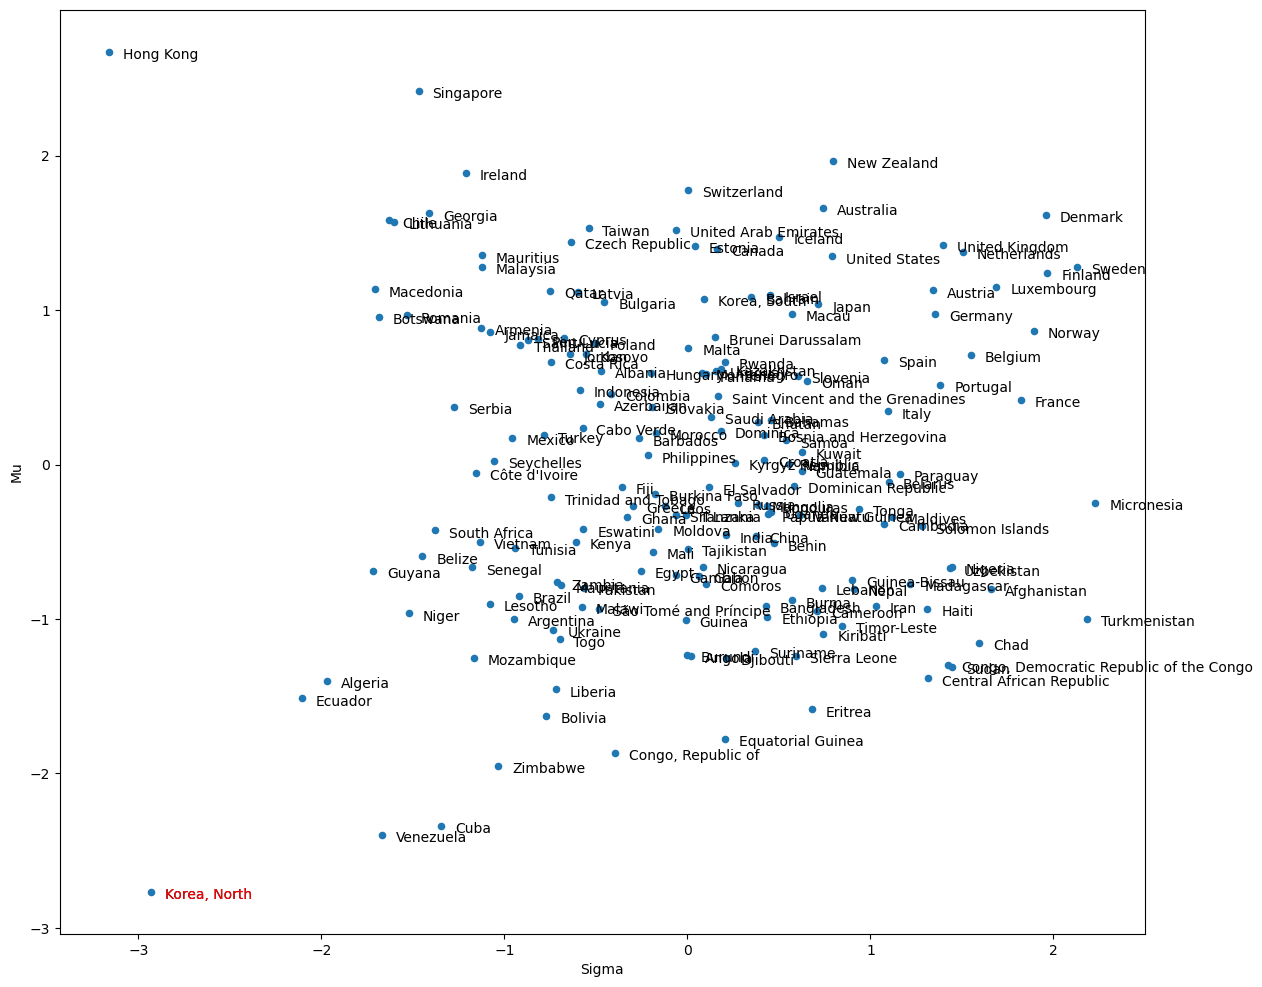

In [40]:
from matplotlib.pyplot import cm
fig, ax = plt.subplots()
cmap = cm.get_cmap('Spectral')
Sigma_Mu_df_transformed.plot('Sigma', 'Mu', kind='scatter', ax=ax, figsize = (14,12))
for k, v in Sigma_Mu_df_transformed.iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=10, color='black')
for k, v in Sigma_Mu_df_transformed.iterrows():
    if (k=='Korea, North '):
        plt.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=10, color='red')

### Get PKFs

Now, get the Pareto-Koopmans frontiers

In [41]:
df =Sigma_Mu_df.copy()
PKF=[]
count=0
while df.shape[0]>0:
    PKF.append([])
    for idx in df.index:
        comp_df = df.copy()
        comp_df.drop(index = idx)
        if any([any([
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])), # loose in both dimensions
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] == comp_df.iloc[i,1])), # loose in first dimension and drow in second
                ((df.loc[idx][0] == comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])) # loose in the second dimension 
                    ]) for i in range (comp_df.shape[0])]
                ) == False:
            PKF[count].append(idx)
    
    if len(PKF[count]) == 0:
        PKF[count].append(df.index)
        break
    else:
        df = df.drop(index=PKF[count])
        print(f'PKF_{str(count+1)}: {PKF[count]}')
        count+=1

PKF_1: ['Hong Kong']
PKF_2: ['Algeria', 'Chile', 'Ecuador', 'Guyana', 'Korea, North ', 'Macedonia', 'Singapore']
PKF_3: ['Botswana', 'Georgia', 'Ireland', 'Lithuania', 'New Zealand']
PKF_4: ['Czech Republic', 'Malaysia', 'Mauritius', 'Romania', 'Switzerland', 'Taiwan ', 'Venezuela']
PKF_5: ['Armenia', 'Australia', 'Belize', 'Niger', 'Qatar', 'Serbia', 'South Africa', 'United Arab Emirates']
PKF_6: ["Côte d'Ivoire", 'Cuba', 'Denmark', 'Estonia', 'Iceland', 'Jamaica', 'Latvia', 'Senegal']
PKF_7: ['Bulgaria', 'Canada', 'Cyprus', 'Korea, South', 'Mexico', 'Mozambique', 'Peru', 'Saint Lucia', 'Seychelles', 'Thailand', 'United Kingdom', 'Vietnam']
PKF_8: ['Bahrain', 'Brunei Darussalam', 'Costa Rica', 'Israel', 'Jordan', 'Kosovo', 'Lesotho', 'Netherlands', 'Poland', 'Tunisia', 'Turkey', 'United States']
PKF_9: ['Albania', 'Argentina', 'Austria', 'Brazil', 'Finland', 'Indonesia', 'Japan', 'Luxembourg', 'Macau', 'Malta', 'Sweden', 'Trinidad and Tobago', 'Zimbabwe']
PKF_10: ['Azerbaijan', 'Boliv

In [42]:
lambda_ = 0

# Run optimization and get the local efficiences
m = Sigma_Mu_df.shape[0] # number of alternatives
m_f = len(PKF) # number of frontiers
local_ef = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))
local_ef_new = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))
for unit in range (m):
    for fr in range (m_f):
        unit_sigmamu = np.array([Sigma_Mu_df.iloc[unit]]) # get the alternative unit        
        Fr_list = [] # list of alternatives within frontier fr or within a less preferred one
        for k in range(fr, m_f):
            for l in range(len(PKF[k])):
                Fr_list.append(PKF[k][l])
        Fr_sigmamu = np.array (Sigma_Mu_df.loc[Fr_list]) # get alternatives within frontier fr or a less preferred one
        M, resultado = optimize_PROM2_original(unit_sigmamu, Fr_sigmamu)
        local_ef[unit, fr] = M.obj()
        M_new, resultado_new = optimize_newconstraint(unit_sigmamu, Fr_sigmamu, lambda_)
        local_ef_new[unit, fr] = M_new.obj()
        print(f'alternative {unit+1}, fronteira {fr + 1}: resolvido.')

alternative 1, fronteira 1: resolvido.
alternative 1, fronteira 2: resolvido.
alternative 1, fronteira 3: resolvido.
alternative 1, fronteira 4: resolvido.
alternative 1, fronteira 5: resolvido.
alternative 1, fronteira 6: resolvido.
alternative 1, fronteira 7: resolvido.
alternative 1, fronteira 8: resolvido.
alternative 1, fronteira 9: resolvido.
alternative 1, fronteira 10: resolvido.
alternative 1, fronteira 11: resolvido.
alternative 1, fronteira 12: resolvido.
alternative 1, fronteira 13: resolvido.
alternative 1, fronteira 14: resolvido.
alternative 1, fronteira 15: resolvido.
alternative 1, fronteira 16: resolvido.
alternative 1, fronteira 17: resolvido.
alternative 1, fronteira 18: resolvido.
alternative 1, fronteira 19: resolvido.
alternative 1, fronteira 20: resolvido.
alternative 1, fronteira 21: resolvido.
alternative 1, fronteira 22: resolvido.
alternative 1, fronteira 23: resolvido.
alternative 1, fronteira 24: resolvido.
alternative 1, fronteira 25: resolvido.
alternati

alternative 8, fronteira 26: resolvido.
alternative 9, fronteira 1: resolvido.
alternative 9, fronteira 2: resolvido.
alternative 9, fronteira 3: resolvido.
alternative 9, fronteira 4: resolvido.
alternative 9, fronteira 5: resolvido.
alternative 9, fronteira 6: resolvido.
alternative 9, fronteira 7: resolvido.
alternative 9, fronteira 8: resolvido.
alternative 9, fronteira 9: resolvido.
alternative 9, fronteira 10: resolvido.
alternative 9, fronteira 11: resolvido.
alternative 9, fronteira 12: resolvido.
alternative 9, fronteira 13: resolvido.
alternative 9, fronteira 14: resolvido.
alternative 9, fronteira 15: resolvido.
alternative 9, fronteira 16: resolvido.
alternative 9, fronteira 17: resolvido.
alternative 9, fronteira 18: resolvido.
alternative 9, fronteira 19: resolvido.
alternative 9, fronteira 20: resolvido.
alternative 9, fronteira 21: resolvido.
alternative 9, fronteira 22: resolvido.
alternative 9, fronteira 23: resolvido.
alternative 9, fronteira 24: resolvido.
alternati

alternative 16, fronteira 21: resolvido.
alternative 16, fronteira 22: resolvido.
alternative 16, fronteira 23: resolvido.
alternative 16, fronteira 24: resolvido.
alternative 16, fronteira 25: resolvido.
alternative 16, fronteira 26: resolvido.
alternative 17, fronteira 1: resolvido.
alternative 17, fronteira 2: resolvido.
alternative 17, fronteira 3: resolvido.
alternative 17, fronteira 4: resolvido.
alternative 17, fronteira 5: resolvido.
alternative 17, fronteira 6: resolvido.
alternative 17, fronteira 7: resolvido.
alternative 17, fronteira 8: resolvido.
alternative 17, fronteira 9: resolvido.
alternative 17, fronteira 10: resolvido.
alternative 17, fronteira 11: resolvido.
alternative 17, fronteira 12: resolvido.
alternative 17, fronteira 13: resolvido.
alternative 17, fronteira 14: resolvido.
alternative 17, fronteira 15: resolvido.
alternative 17, fronteira 16: resolvido.
alternative 17, fronteira 17: resolvido.
alternative 17, fronteira 18: resolvido.
alternative 17, fronteira

alternative 24, fronteira 15: resolvido.
alternative 24, fronteira 16: resolvido.
alternative 24, fronteira 17: resolvido.
alternative 24, fronteira 18: resolvido.
alternative 24, fronteira 19: resolvido.
alternative 24, fronteira 20: resolvido.
alternative 24, fronteira 21: resolvido.
alternative 24, fronteira 22: resolvido.
alternative 24, fronteira 23: resolvido.
alternative 24, fronteira 24: resolvido.
alternative 24, fronteira 25: resolvido.
alternative 24, fronteira 26: resolvido.
alternative 25, fronteira 1: resolvido.
alternative 25, fronteira 2: resolvido.
alternative 25, fronteira 3: resolvido.
alternative 25, fronteira 4: resolvido.
alternative 25, fronteira 5: resolvido.
alternative 25, fronteira 6: resolvido.
alternative 25, fronteira 7: resolvido.
alternative 25, fronteira 8: resolvido.
alternative 25, fronteira 9: resolvido.
alternative 25, fronteira 10: resolvido.
alternative 25, fronteira 11: resolvido.
alternative 25, fronteira 12: resolvido.
alternative 25, fronteira

alternative 32, fronteira 9: resolvido.
alternative 32, fronteira 10: resolvido.
alternative 32, fronteira 11: resolvido.
alternative 32, fronteira 12: resolvido.
alternative 32, fronteira 13: resolvido.
alternative 32, fronteira 14: resolvido.
alternative 32, fronteira 15: resolvido.
alternative 32, fronteira 16: resolvido.
alternative 32, fronteira 17: resolvido.
alternative 32, fronteira 18: resolvido.
alternative 32, fronteira 19: resolvido.
alternative 32, fronteira 20: resolvido.
alternative 32, fronteira 21: resolvido.
alternative 32, fronteira 22: resolvido.
alternative 32, fronteira 23: resolvido.
alternative 32, fronteira 24: resolvido.
alternative 32, fronteira 25: resolvido.
alternative 32, fronteira 26: resolvido.
alternative 33, fronteira 1: resolvido.
alternative 33, fronteira 2: resolvido.
alternative 33, fronteira 3: resolvido.
alternative 33, fronteira 4: resolvido.
alternative 33, fronteira 5: resolvido.
alternative 33, fronteira 6: resolvido.
alternative 33, frontei

alternative 40, fronteira 3: resolvido.
alternative 40, fronteira 4: resolvido.
alternative 40, fronteira 5: resolvido.
alternative 40, fronteira 6: resolvido.
alternative 40, fronteira 7: resolvido.
alternative 40, fronteira 8: resolvido.
alternative 40, fronteira 9: resolvido.
alternative 40, fronteira 10: resolvido.
alternative 40, fronteira 11: resolvido.
alternative 40, fronteira 12: resolvido.
alternative 40, fronteira 13: resolvido.
alternative 40, fronteira 14: resolvido.
alternative 40, fronteira 15: resolvido.
alternative 40, fronteira 16: resolvido.
alternative 40, fronteira 17: resolvido.
alternative 40, fronteira 18: resolvido.
alternative 40, fronteira 19: resolvido.
alternative 40, fronteira 20: resolvido.
alternative 40, fronteira 21: resolvido.
alternative 40, fronteira 22: resolvido.
alternative 40, fronteira 23: resolvido.
alternative 40, fronteira 24: resolvido.
alternative 40, fronteira 25: resolvido.
alternative 40, fronteira 26: resolvido.
alternative 41, frontei

alternative 47, fronteira 23: resolvido.
alternative 47, fronteira 24: resolvido.
alternative 47, fronteira 25: resolvido.
alternative 47, fronteira 26: resolvido.
alternative 48, fronteira 1: resolvido.
alternative 48, fronteira 2: resolvido.
alternative 48, fronteira 3: resolvido.
alternative 48, fronteira 4: resolvido.
alternative 48, fronteira 5: resolvido.
alternative 48, fronteira 6: resolvido.
alternative 48, fronteira 7: resolvido.
alternative 48, fronteira 8: resolvido.
alternative 48, fronteira 9: resolvido.
alternative 48, fronteira 10: resolvido.
alternative 48, fronteira 11: resolvido.
alternative 48, fronteira 12: resolvido.
alternative 48, fronteira 13: resolvido.
alternative 48, fronteira 14: resolvido.
alternative 48, fronteira 15: resolvido.
alternative 48, fronteira 16: resolvido.
alternative 48, fronteira 17: resolvido.
alternative 48, fronteira 18: resolvido.
alternative 48, fronteira 19: resolvido.
alternative 48, fronteira 20: resolvido.
alternative 48, fronteira

alternative 55, fronteira 17: resolvido.
alternative 55, fronteira 18: resolvido.
alternative 55, fronteira 19: resolvido.
alternative 55, fronteira 20: resolvido.
alternative 55, fronteira 21: resolvido.
alternative 55, fronteira 22: resolvido.
alternative 55, fronteira 23: resolvido.
alternative 55, fronteira 24: resolvido.
alternative 55, fronteira 25: resolvido.
alternative 55, fronteira 26: resolvido.
alternative 56, fronteira 1: resolvido.
alternative 56, fronteira 2: resolvido.
alternative 56, fronteira 3: resolvido.
alternative 56, fronteira 4: resolvido.
alternative 56, fronteira 5: resolvido.
alternative 56, fronteira 6: resolvido.
alternative 56, fronteira 7: resolvido.
alternative 56, fronteira 8: resolvido.
alternative 56, fronteira 9: resolvido.
alternative 56, fronteira 10: resolvido.
alternative 56, fronteira 11: resolvido.
alternative 56, fronteira 12: resolvido.
alternative 56, fronteira 13: resolvido.
alternative 56, fronteira 14: resolvido.
alternative 56, fronteira

alternative 63, fronteira 11: resolvido.
alternative 63, fronteira 12: resolvido.
alternative 63, fronteira 13: resolvido.
alternative 63, fronteira 14: resolvido.
alternative 63, fronteira 15: resolvido.
alternative 63, fronteira 16: resolvido.
alternative 63, fronteira 17: resolvido.
alternative 63, fronteira 18: resolvido.
alternative 63, fronteira 19: resolvido.
alternative 63, fronteira 20: resolvido.
alternative 63, fronteira 21: resolvido.
alternative 63, fronteira 22: resolvido.
alternative 63, fronteira 23: resolvido.
alternative 63, fronteira 24: resolvido.
alternative 63, fronteira 25: resolvido.
alternative 63, fronteira 26: resolvido.
alternative 64, fronteira 1: resolvido.
alternative 64, fronteira 2: resolvido.
alternative 64, fronteira 3: resolvido.
alternative 64, fronteira 4: resolvido.
alternative 64, fronteira 5: resolvido.
alternative 64, fronteira 6: resolvido.
alternative 64, fronteira 7: resolvido.
alternative 64, fronteira 8: resolvido.
alternative 64, fronteir

alternative 71, fronteira 5: resolvido.
alternative 71, fronteira 6: resolvido.
alternative 71, fronteira 7: resolvido.
alternative 71, fronteira 8: resolvido.
alternative 71, fronteira 9: resolvido.
alternative 71, fronteira 10: resolvido.
alternative 71, fronteira 11: resolvido.
alternative 71, fronteira 12: resolvido.
alternative 71, fronteira 13: resolvido.
alternative 71, fronteira 14: resolvido.
alternative 71, fronteira 15: resolvido.
alternative 71, fronteira 16: resolvido.
alternative 71, fronteira 17: resolvido.
alternative 71, fronteira 18: resolvido.
alternative 71, fronteira 19: resolvido.
alternative 71, fronteira 20: resolvido.
alternative 71, fronteira 21: resolvido.
alternative 71, fronteira 22: resolvido.
alternative 71, fronteira 23: resolvido.
alternative 71, fronteira 24: resolvido.
alternative 71, fronteira 25: resolvido.
alternative 71, fronteira 26: resolvido.
alternative 72, fronteira 1: resolvido.
alternative 72, fronteira 2: resolvido.
alternative 72, frontei

alternative 78, fronteira 25: resolvido.
alternative 78, fronteira 26: resolvido.
alternative 79, fronteira 1: resolvido.
alternative 79, fronteira 2: resolvido.
alternative 79, fronteira 3: resolvido.
alternative 79, fronteira 4: resolvido.
alternative 79, fronteira 5: resolvido.
alternative 79, fronteira 6: resolvido.
alternative 79, fronteira 7: resolvido.
alternative 79, fronteira 8: resolvido.
alternative 79, fronteira 9: resolvido.
alternative 79, fronteira 10: resolvido.
alternative 79, fronteira 11: resolvido.
alternative 79, fronteira 12: resolvido.
alternative 79, fronteira 13: resolvido.
alternative 79, fronteira 14: resolvido.
alternative 79, fronteira 15: resolvido.
alternative 79, fronteira 16: resolvido.
alternative 79, fronteira 17: resolvido.
alternative 79, fronteira 18: resolvido.
alternative 79, fronteira 19: resolvido.
alternative 79, fronteira 20: resolvido.
alternative 79, fronteira 21: resolvido.
alternative 79, fronteira 22: resolvido.
alternative 79, fronteira

alternative 86, fronteira 19: resolvido.
alternative 86, fronteira 20: resolvido.
alternative 86, fronteira 21: resolvido.
alternative 86, fronteira 22: resolvido.
alternative 86, fronteira 23: resolvido.
alternative 86, fronteira 24: resolvido.
alternative 86, fronteira 25: resolvido.
alternative 86, fronteira 26: resolvido.
alternative 87, fronteira 1: resolvido.
alternative 87, fronteira 2: resolvido.
alternative 87, fronteira 3: resolvido.
alternative 87, fronteira 4: resolvido.
alternative 87, fronteira 5: resolvido.
alternative 87, fronteira 6: resolvido.
alternative 87, fronteira 7: resolvido.
alternative 87, fronteira 8: resolvido.
alternative 87, fronteira 9: resolvido.
alternative 87, fronteira 10: resolvido.
alternative 87, fronteira 11: resolvido.
alternative 87, fronteira 12: resolvido.
alternative 87, fronteira 13: resolvido.
alternative 87, fronteira 14: resolvido.
alternative 87, fronteira 15: resolvido.
alternative 87, fronteira 16: resolvido.
alternative 87, fronteira

alternative 94, fronteira 13: resolvido.
alternative 94, fronteira 14: resolvido.
alternative 94, fronteira 15: resolvido.
alternative 94, fronteira 16: resolvido.
alternative 94, fronteira 17: resolvido.
alternative 94, fronteira 18: resolvido.
alternative 94, fronteira 19: resolvido.
alternative 94, fronteira 20: resolvido.
alternative 94, fronteira 21: resolvido.
alternative 94, fronteira 22: resolvido.
alternative 94, fronteira 23: resolvido.
alternative 94, fronteira 24: resolvido.
alternative 94, fronteira 25: resolvido.
alternative 94, fronteira 26: resolvido.
alternative 95, fronteira 1: resolvido.
alternative 95, fronteira 2: resolvido.
alternative 95, fronteira 3: resolvido.
alternative 95, fronteira 4: resolvido.
alternative 95, fronteira 5: resolvido.
alternative 95, fronteira 6: resolvido.
alternative 95, fronteira 7: resolvido.
alternative 95, fronteira 8: resolvido.
alternative 95, fronteira 9: resolvido.
alternative 95, fronteira 10: resolvido.
alternative 95, fronteira

alternative 102, fronteira 6: resolvido.
alternative 102, fronteira 7: resolvido.
alternative 102, fronteira 8: resolvido.
alternative 102, fronteira 9: resolvido.
alternative 102, fronteira 10: resolvido.
alternative 102, fronteira 11: resolvido.
alternative 102, fronteira 12: resolvido.
alternative 102, fronteira 13: resolvido.
alternative 102, fronteira 14: resolvido.
alternative 102, fronteira 15: resolvido.
alternative 102, fronteira 16: resolvido.
alternative 102, fronteira 17: resolvido.
alternative 102, fronteira 18: resolvido.
alternative 102, fronteira 19: resolvido.
alternative 102, fronteira 20: resolvido.
alternative 102, fronteira 21: resolvido.
alternative 102, fronteira 22: resolvido.
alternative 102, fronteira 23: resolvido.
alternative 102, fronteira 24: resolvido.
alternative 102, fronteira 25: resolvido.
alternative 102, fronteira 26: resolvido.
alternative 103, fronteira 1: resolvido.
alternative 103, fronteira 2: resolvido.
alternative 103, fronteira 3: resolvido.

alternative 109, fronteira 21: resolvido.
alternative 109, fronteira 22: resolvido.
alternative 109, fronteira 23: resolvido.
alternative 109, fronteira 24: resolvido.
alternative 109, fronteira 25: resolvido.
alternative 109, fronteira 26: resolvido.
alternative 110, fronteira 1: resolvido.
alternative 110, fronteira 2: resolvido.
alternative 110, fronteira 3: resolvido.
alternative 110, fronteira 4: resolvido.
alternative 110, fronteira 5: resolvido.
alternative 110, fronteira 6: resolvido.
alternative 110, fronteira 7: resolvido.
alternative 110, fronteira 8: resolvido.
alternative 110, fronteira 9: resolvido.
alternative 110, fronteira 10: resolvido.
alternative 110, fronteira 11: resolvido.
alternative 110, fronteira 12: resolvido.
alternative 110, fronteira 13: resolvido.
alternative 110, fronteira 14: resolvido.
alternative 110, fronteira 15: resolvido.
alternative 110, fronteira 16: resolvido.
alternative 110, fronteira 17: resolvido.
alternative 110, fronteira 18: resolvido.
a

alternative 117, fronteira 10: resolvido.
alternative 117, fronteira 11: resolvido.
alternative 117, fronteira 12: resolvido.
alternative 117, fronteira 13: resolvido.
alternative 117, fronteira 14: resolvido.
alternative 117, fronteira 15: resolvido.
alternative 117, fronteira 16: resolvido.
alternative 117, fronteira 17: resolvido.
alternative 117, fronteira 18: resolvido.
alternative 117, fronteira 19: resolvido.
alternative 117, fronteira 20: resolvido.
alternative 117, fronteira 21: resolvido.
alternative 117, fronteira 22: resolvido.
alternative 117, fronteira 23: resolvido.
alternative 117, fronteira 24: resolvido.
alternative 117, fronteira 25: resolvido.
alternative 117, fronteira 26: resolvido.
alternative 118, fronteira 1: resolvido.
alternative 118, fronteira 2: resolvido.
alternative 118, fronteira 3: resolvido.
alternative 118, fronteira 4: resolvido.
alternative 118, fronteira 5: resolvido.
alternative 118, fronteira 6: resolvido.
alternative 118, fronteira 7: resolvido.

alternative 124, fronteira 25: resolvido.
alternative 124, fronteira 26: resolvido.
alternative 125, fronteira 1: resolvido.
alternative 125, fronteira 2: resolvido.
alternative 125, fronteira 3: resolvido.
alternative 125, fronteira 4: resolvido.
alternative 125, fronteira 5: resolvido.
alternative 125, fronteira 6: resolvido.
alternative 125, fronteira 7: resolvido.
alternative 125, fronteira 8: resolvido.
alternative 125, fronteira 9: resolvido.
alternative 125, fronteira 10: resolvido.
alternative 125, fronteira 11: resolvido.
alternative 125, fronteira 12: resolvido.
alternative 125, fronteira 13: resolvido.
alternative 125, fronteira 14: resolvido.
alternative 125, fronteira 15: resolvido.
alternative 125, fronteira 16: resolvido.
alternative 125, fronteira 17: resolvido.
alternative 125, fronteira 18: resolvido.
alternative 125, fronteira 19: resolvido.
alternative 125, fronteira 20: resolvido.
alternative 125, fronteira 21: resolvido.
alternative 125, fronteira 22: resolvido.
a

alternative 132, fronteira 14: resolvido.
alternative 132, fronteira 15: resolvido.
alternative 132, fronteira 16: resolvido.
alternative 132, fronteira 17: resolvido.
alternative 132, fronteira 18: resolvido.
alternative 132, fronteira 19: resolvido.
alternative 132, fronteira 20: resolvido.
alternative 132, fronteira 21: resolvido.
alternative 132, fronteira 22: resolvido.
alternative 132, fronteira 23: resolvido.
alternative 132, fronteira 24: resolvido.
alternative 132, fronteira 25: resolvido.
alternative 132, fronteira 26: resolvido.
alternative 133, fronteira 1: resolvido.
alternative 133, fronteira 2: resolvido.
alternative 133, fronteira 3: resolvido.
alternative 133, fronteira 4: resolvido.
alternative 133, fronteira 5: resolvido.
alternative 133, fronteira 6: resolvido.
alternative 133, fronteira 7: resolvido.
alternative 133, fronteira 8: resolvido.
alternative 133, fronteira 9: resolvido.
alternative 133, fronteira 10: resolvido.
alternative 133, fronteira 11: resolvido.
a

alternative 140, fronteira 3: resolvido.
alternative 140, fronteira 4: resolvido.
alternative 140, fronteira 5: resolvido.
alternative 140, fronteira 6: resolvido.
alternative 140, fronteira 7: resolvido.
alternative 140, fronteira 8: resolvido.
alternative 140, fronteira 9: resolvido.
alternative 140, fronteira 10: resolvido.
alternative 140, fronteira 11: resolvido.
alternative 140, fronteira 12: resolvido.
alternative 140, fronteira 13: resolvido.
alternative 140, fronteira 14: resolvido.
alternative 140, fronteira 15: resolvido.
alternative 140, fronteira 16: resolvido.
alternative 140, fronteira 17: resolvido.
alternative 140, fronteira 18: resolvido.
alternative 140, fronteira 19: resolvido.
alternative 140, fronteira 20: resolvido.
alternative 140, fronteira 21: resolvido.
alternative 140, fronteira 22: resolvido.
alternative 140, fronteira 23: resolvido.
alternative 140, fronteira 24: resolvido.
alternative 140, fronteira 25: resolvido.
alternative 140, fronteira 26: resolvido.

alternative 147, fronteira 18: resolvido.
alternative 147, fronteira 19: resolvido.
alternative 147, fronteira 20: resolvido.
alternative 147, fronteira 21: resolvido.
alternative 147, fronteira 22: resolvido.
alternative 147, fronteira 23: resolvido.
alternative 147, fronteira 24: resolvido.
alternative 147, fronteira 25: resolvido.
alternative 147, fronteira 26: resolvido.
alternative 148, fronteira 1: resolvido.
alternative 148, fronteira 2: resolvido.
alternative 148, fronteira 3: resolvido.
alternative 148, fronteira 4: resolvido.
alternative 148, fronteira 5: resolvido.
alternative 148, fronteira 6: resolvido.
alternative 148, fronteira 7: resolvido.
alternative 148, fronteira 8: resolvido.
alternative 148, fronteira 9: resolvido.
alternative 148, fronteira 10: resolvido.
alternative 148, fronteira 11: resolvido.
alternative 148, fronteira 12: resolvido.
alternative 148, fronteira 13: resolvido.
alternative 148, fronteira 14: resolvido.
alternative 148, fronteira 15: resolvido.
a

alternative 155, fronteira 7: resolvido.
alternative 155, fronteira 8: resolvido.
alternative 155, fronteira 9: resolvido.
alternative 155, fronteira 10: resolvido.
alternative 155, fronteira 11: resolvido.
alternative 155, fronteira 12: resolvido.
alternative 155, fronteira 13: resolvido.
alternative 155, fronteira 14: resolvido.
alternative 155, fronteira 15: resolvido.
alternative 155, fronteira 16: resolvido.
alternative 155, fronteira 17: resolvido.
alternative 155, fronteira 18: resolvido.
alternative 155, fronteira 19: resolvido.
alternative 155, fronteira 20: resolvido.
alternative 155, fronteira 21: resolvido.
alternative 155, fronteira 22: resolvido.
alternative 155, fronteira 23: resolvido.
alternative 155, fronteira 24: resolvido.
alternative 155, fronteira 25: resolvido.
alternative 155, fronteira 26: resolvido.
alternative 156, fronteira 1: resolvido.
alternative 156, fronteira 2: resolvido.
alternative 156, fronteira 3: resolvido.
alternative 156, fronteira 4: resolvido.

alternative 162, fronteira 22: resolvido.
alternative 162, fronteira 23: resolvido.
alternative 162, fronteira 24: resolvido.
alternative 162, fronteira 25: resolvido.
alternative 162, fronteira 26: resolvido.
alternative 163, fronteira 1: resolvido.
alternative 163, fronteira 2: resolvido.
alternative 163, fronteira 3: resolvido.
alternative 163, fronteira 4: resolvido.
alternative 163, fronteira 5: resolvido.
alternative 163, fronteira 6: resolvido.
alternative 163, fronteira 7: resolvido.
alternative 163, fronteira 8: resolvido.
alternative 163, fronteira 9: resolvido.
alternative 163, fronteira 10: resolvido.
alternative 163, fronteira 11: resolvido.
alternative 163, fronteira 12: resolvido.
alternative 163, fronteira 13: resolvido.
alternative 163, fronteira 14: resolvido.
alternative 163, fronteira 15: resolvido.
alternative 163, fronteira 16: resolvido.
alternative 163, fronteira 17: resolvido.
alternative 163, fronteira 18: resolvido.
alternative 163, fronteira 19: resolvido.
a

alternative 170, fronteira 11: resolvido.
alternative 170, fronteira 12: resolvido.
alternative 170, fronteira 13: resolvido.
alternative 170, fronteira 14: resolvido.
alternative 170, fronteira 15: resolvido.
alternative 170, fronteira 16: resolvido.
alternative 170, fronteira 17: resolvido.
alternative 170, fronteira 18: resolvido.
alternative 170, fronteira 19: resolvido.
alternative 170, fronteira 20: resolvido.
alternative 170, fronteira 21: resolvido.
alternative 170, fronteira 22: resolvido.
alternative 170, fronteira 23: resolvido.
alternative 170, fronteira 24: resolvido.
alternative 170, fronteira 25: resolvido.
alternative 170, fronteira 26: resolvido.
alternative 171, fronteira 1: resolvido.
alternative 171, fronteira 2: resolvido.
alternative 171, fronteira 3: resolvido.
alternative 171, fronteira 4: resolvido.
alternative 171, fronteira 5: resolvido.
alternative 171, fronteira 6: resolvido.
alternative 171, fronteira 7: resolvido.
alternative 171, fronteira 8: resolvido.


alternative 177, fronteira 26: resolvido.
alternative 178, fronteira 1: resolvido.
alternative 178, fronteira 2: resolvido.
alternative 178, fronteira 3: resolvido.
alternative 178, fronteira 4: resolvido.
alternative 178, fronteira 5: resolvido.
alternative 178, fronteira 6: resolvido.
alternative 178, fronteira 7: resolvido.
alternative 178, fronteira 8: resolvido.
alternative 178, fronteira 9: resolvido.
alternative 178, fronteira 10: resolvido.
alternative 178, fronteira 11: resolvido.
alternative 178, fronteira 12: resolvido.
alternative 178, fronteira 13: resolvido.
alternative 178, fronteira 14: resolvido.
alternative 178, fronteira 15: resolvido.
alternative 178, fronteira 16: resolvido.
alternative 178, fronteira 17: resolvido.
alternative 178, fronteira 18: resolvido.
alternative 178, fronteira 19: resolvido.
alternative 178, fronteira 20: resolvido.
alternative 178, fronteira 21: resolvido.
alternative 178, fronteira 22: resolvido.
alternative 178, fronteira 23: resolvido.
a

In [43]:
# Print local efficiencies
pd.DataFrame(local_ef, columns = ['$PKF_' + str(i) +'$' for i in range(len(PKF))], index=dados.index)

$PKF_0$   $PKF_1$   $PKF_2$   $PKF_3$   $PKF_4$   $PKF_5$  \
Afghanistan -0.159099 -0.129778 -0.110370 -0.107300 -0.102176 -0.094207   
Albania     -0.088745 -0.048465 -0.040016 -0.035326 -0.023603 -0.020458   
Algeria     -0.039268 -0.018530  0.009462  0.011263  0.014869  0.023029   
Angola      -0.105032 -0.081066 -0.056303 -0.054024 -0.050896 -0.041759   
Argentina   -0.072992 -0.047723 -0.024263 -0.021791 -0.018747 -0.009325   
...               ...       ...       ...       ...       ...       ...   
Vanuatu     -0.124739 -0.091954 -0.076010 -0.072427 -0.065526 -0.058800   
Venezuela   -0.049235 -0.037262 -0.000506  0.000000  0.004902  0.010660   
Vietnam     -0.066951 -0.037284 -0.018221 -0.015100 -0.009799 -0.001954   
Zambia      -0.080883 -0.053249 -0.032154 -0.029333 -0.025075 -0.016501   
Zimbabwe    -0.070245 -0.053667 -0.021515 -0.020329 -0.016108 -0.009205   

              $PKF_6$   $PKF_7$   $PKF_8$   $PKF_9$  ...  $PKF_16$  $PKF_17$  \
Afghanistan -0.092202 -0.087901 -0.082748 -0.077380  ... -0.051713 -0.048973   
Albania     -0.015292 -0.009203  0.000000  0.008433  ...  0.180914  0.223005   
Algeria      0.026615  0.029438  0.032292  0.039901  ...  0.065032  0.065765   
Angola      -0.038966 -0.036327 -0.032452 -0.025061  ... -0.000733  0.000000   
Argentina   -0.006723 -0.004286  0.000000  0.007304  ...  0.031921  0.032858   
...               ...       ...       ...       ...  ...       ...       ...   
Vanuatu     -0.056103 -0.050904 -0.045341 -0.041303  ... -0.009075 -0.006745   
Venezuela    0.016647  0.019470  0.021010  0.029684  ...  0.055065  0.055797   
Vietnam      0.000000  0.004510  0.009704  0.014940  ...  0.041260  0.043958   
Zambia      -0.014248 -0.010969 -0.006016  0.000000  ...  0.025156  0.026450   
Zimbabwe    -0.004362 -0.001539  0.000000  0.008675  ...  0.034055  0.034788   

             $PKF_18$  $PKF_19$  $PKF_20$  $PKF_21$  $PKF_22$  $PKF_23$  \
Afghanistan -0.043080 -0.039559 -0.030457 -0.023986 -0.012800  0.000000   
Albania      0.229733  0.293301  0.325204  0.346117  0.435926  0.485470   
Algeria      0.072023  0.079528  0.083922  0.084716  0.087597  0.108438   
Angola       0.006354  0.013764  0.018157  0.018951  0.023002  0.042673   
Argentina    0.039497  0.045804  0.050198  0.052109  0.055633  0.074714   
...               ...       ...       ...       ...       ...       ...   
Vanuatu     -0.005241  0.000000  0.015565  0.026191  0.115999  0.165544   
Venezuela    0.062012  0.069561  0.073955  0.074748  0.077630  0.098471   
Vietnam      0.049369  0.052684  0.062852  0.069357  0.081118  0.105203   
Zambia       0.033666  0.038194  0.042306  0.048389  0.056768  0.066822   
Zimbabwe     0.041002  0.048551  0.052945  0.053739  0.056620  0.077461   

             $PKF_24$  $PKF_25$  
Afghanistan  0.066116  0.174464  
Albania      0.551587  0.659935  
Algeria      0.108498  0.112890  
Angola       0.043528  0.047125  
Argentina    0.080774  0.107051  
...               ...       ...  
Vanuatu      0.231660  0.340008  
Venezuela    0.098531  0.102922  
Vietnam      0.171319  0.279667  
Zambia       0.091635  0.188780  
Zimbabwe     0.077521  0.081913  

[180 rows x 26 columns]

Now, lets calculate the global efficience and normalize it using min-max

In [44]:
global_ef = np.sum(local_ef, axis = 1)
global_ef = (global_ef - global_ef.min()) /(global_ef.max() - global_ef.min())

results = pd.DataFrame({"Global Efficiency": global_ef}, index = Sigma_Mu_df.index)
results = results.assign(Position = results.rank(ascending=False))
results

Global Efficiency  Position
Afghanistan           0.028967     175.0
Albania               0.279256      52.0
Algeria               0.163488      87.0
Angola                0.080501     152.0
Argentina             0.123212     117.0
...                        ...       ...
Vanuatu               0.101067     140.0
Venezuela             0.150060      96.0
Vietnam               0.148372      97.0
Zambia                0.120039     120.0
Zimbabwe              0.123689     116.0

[180 rows x 2 columns]

In [45]:
results.to_excel("Ranking_Heritage_PROMETHEEScoring.xlsx")

# Model 1 with new constraint

In [51]:
# Print local efficiencies
pd.DataFrame(local_ef_new, columns = ['$PKF_' + str(i) +'$' for i in range(len(PKF))], index=dados.index)

$PKF_0$   $PKF_1$   $PKF_2$   $PKF_3$   $PKF_4$   $PKF_5$  \
Afghanistan -0.159099 -0.129778 -0.110370 -0.107300 -0.102176 -0.094207   
Albania     -0.088745 -0.048465 -0.040016 -0.035326 -0.023603 -0.020458   
Algeria     -0.039268 -0.018530  0.009462  0.011263  0.014869  0.023029   
Angola      -0.105032 -0.081066 -0.056303 -0.054024 -0.050896 -0.041759   
Argentina   -0.072992 -0.047723 -0.024263 -0.021791 -0.018747 -0.009325   
...               ...       ...       ...       ...       ...       ...   
Vanuatu     -0.124739 -0.091954 -0.076010 -0.072427 -0.065526 -0.058800   
Venezuela   -0.049235 -0.037262 -0.000506  0.000000  0.004902  0.010660   
Vietnam     -0.066951 -0.037284 -0.018221 -0.015100 -0.009799 -0.001954   
Zambia      -0.080883 -0.053249 -0.032154 -0.029333 -0.025075 -0.016501   
Zimbabwe    -0.070245 -0.053667 -0.021515 -0.020329 -0.016108 -0.009205   

              $PKF_6$   $PKF_7$   $PKF_8$   $PKF_9$  ...  $PKF_16$  $PKF_17$  \
Afghanistan -0.092202 -0.087901 -0.082748 -0.077380  ... -0.051713 -0.048973   
Albania     -0.015292 -0.009203  0.000000  0.008433  ...  0.180914  0.223005   
Algeria      0.026615  0.029438  0.032292  0.039901  ...  0.065032  0.065765   
Angola      -0.038966 -0.036327 -0.032452 -0.025061  ... -0.000733  0.000000   
Argentina   -0.006723 -0.004286  0.000000  0.007304  ...  0.031921  0.032858   
...               ...       ...       ...       ...  ...       ...       ...   
Vanuatu     -0.056103 -0.050904 -0.045341 -0.041303  ... -0.009075 -0.006745   
Venezuela    0.016647  0.019470  0.021010  0.029684  ...  0.055065  0.055797   
Vietnam      0.000000  0.004510  0.009704  0.014940  ...  0.041260  0.043958   
Zambia      -0.014248 -0.010969 -0.006016  0.000000  ...  0.025156  0.026450   
Zimbabwe    -0.004362 -0.001539  0.000000  0.008675  ...  0.034055  0.034788   

             $PKF_18$  $PKF_19$  $PKF_20$  $PKF_21$  $PKF_22$  $PKF_23$  \
Afghanistan -0.043080 -0.039559 -0.030457 -0.023986 -0.012800  0.000000   
Albania      0.229733  0.293301  0.325204  0.346117  0.435926  0.485470   
Algeria      0.072023  0.079528  0.083922  0.084716  0.087597  0.108438   
Angola       0.006354  0.013764  0.018157  0.018951  0.023002  0.042673   
Argentina    0.039497  0.045804  0.050198  0.052109  0.055633  0.074714   
...               ...       ...       ...       ...       ...       ...   
Vanuatu     -0.005241  0.000000  0.015565  0.026191  0.115999  0.165544   
Venezuela    0.062012  0.069561  0.073955  0.074748  0.077630  0.098471   
Vietnam      0.049369  0.052684  0.062852  0.069357  0.081118  0.105203   
Zambia       0.033666  0.038194  0.042306  0.048389  0.056768  0.066822   
Zimbabwe     0.041002  0.048551  0.052945  0.053739  0.056620  0.077461   

             $PKF_24$  $PKF_25$  
Afghanistan  0.066116  0.174464  
Albania      0.551587  0.659935  
Algeria      0.108498  0.112890  
Angola       0.043528  0.047125  
Argentina    0.080774  0.107051  
...               ...       ...  
Vanuatu      0.231660  0.340008  
Venezuela    0.098531  0.102922  
Vietnam      0.171319  0.279667  
Zambia       0.091635  0.188780  
Zimbabwe     0.077521  0.081913  

[180 rows x 26 columns]

In [52]:
global_ef_new = np.sum(local_ef_new, axis = 1)
global_ef_new = (global_ef_new - global_ef_new.min()) /(global_ef_new.max() - global_ef_new.min())

results_new = pd.DataFrame({"Global Efficiency": global_ef_new}, index = Sigma_Mu_df.index)
results_new = results_new.assign(Position = results_new.rank(ascending=False))
results_new

Global Efficiency  Position
Afghanistan           0.028967     175.0
Albania               0.279256      52.0
Algeria               0.163488      87.0
Angola                0.080501     152.0
Argentina             0.123212     117.0
...                        ...       ...
Vanuatu               0.101067     140.0
Venezuela             0.150060      96.0
Vietnam               0.148372      97.0
Zambia                0.120039     120.0
Zimbabwe              0.123689     116.0

[180 rows x 2 columns]

### Testing different values for lambda

In [53]:
lambda_list = [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
global_ef_list = []
results_list = []

for lamb in lambda_list:
    # Run optimization and get the local efficiences
    m = Sigma_Mu_df.shape[0] # number of alternatives
    m_f = len(PKF) # number of frontiers
    local_ef = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))
    local_ef_new = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))
    for unit in range (m):
        for fr in range (m_f):
            unit_sigmamu = np.array([Sigma_Mu_df.iloc[unit]]) # get the alternative unit        
            Fr_list = [] # list of alternatives within frontier fr or within a less preferred one
            for k in range(fr, m_f):
                for l in range(len(PKF[k])):
                    Fr_list.append(PKF[k][l])
            Fr_sigmamu = np.array (Sigma_Mu_df.loc[Fr_list]) # get alternatives within frontier fr or a less preferred one
            M_new, resultado_new = optimize_newconstraint(unit_sigmamu, Fr_sigmamu, my_lambda= lamb)
            local_ef_new[unit, fr] = M_new.obj()
            print(f'alternative {unit+1}, fronteira {fr + 1}: resolvido.')

    global_ef_new = np.sum(local_ef_new, axis = 1)
    global_ef_new = (global_ef_new - global_ef_new.min()) /(global_ef_new.max() - global_ef_new.min())
    global_ef_list.append(global_ef_new)
    r_new = pd.DataFrame({"Global Efficiency": global_ef_new}, index = Sigma_Mu_df.index)
    r_new = r_new.assign(Position = r_new.rank(ascending=False))
    results_list.append(r_new)

alternative 1, fronteira 1: resolvido.
alternative 1, fronteira 2: resolvido.
alternative 1, fronteira 3: resolvido.
alternative 1, fronteira 4: resolvido.
alternative 1, fronteira 5: resolvido.
alternative 1, fronteira 6: resolvido.
alternative 1, fronteira 7: resolvido.
alternative 1, fronteira 8: resolvido.
alternative 1, fronteira 9: resolvido.
alternative 1, fronteira 10: resolvido.
alternative 1, fronteira 11: resolvido.
alternative 1, fronteira 12: resolvido.
alternative 1, fronteira 13: resolvido.
alternative 1, fronteira 14: resolvido.
alternative 1, fronteira 15: resolvido.
alternative 1, fronteira 16: resolvido.
alternative 1, fronteira 17: resolvido.
alternative 1, fronteira 18: resolvido.
alternative 1, fronteira 19: resolvido.
alternative 1, fronteira 20: resolvido.
alternative 1, fronteira 21: resolvido.
alternative 1, fronteira 22: resolvido.
alternative 1, fronteira 23: resolvido.
alternative 1, fronteira 24: resolvido.
alternative 1, fronteira 25: resolvido.
alternati

alternative 8, fronteira 26: resolvido.
alternative 9, fronteira 1: resolvido.
alternative 9, fronteira 2: resolvido.
alternative 9, fronteira 3: resolvido.
alternative 9, fronteira 4: resolvido.
alternative 9, fronteira 5: resolvido.
alternative 9, fronteira 6: resolvido.
alternative 9, fronteira 7: resolvido.
alternative 9, fronteira 8: resolvido.
alternative 9, fronteira 9: resolvido.
alternative 9, fronteira 10: resolvido.
alternative 9, fronteira 11: resolvido.
alternative 9, fronteira 12: resolvido.
alternative 9, fronteira 13: resolvido.
alternative 9, fronteira 14: resolvido.
alternative 9, fronteira 15: resolvido.
alternative 9, fronteira 16: resolvido.
alternative 9, fronteira 17: resolvido.
alternative 9, fronteira 18: resolvido.
alternative 9, fronteira 19: resolvido.
alternative 9, fronteira 20: resolvido.
alternative 9, fronteira 21: resolvido.
alternative 9, fronteira 22: resolvido.
alternative 9, fronteira 23: resolvido.
alternative 9, fronteira 24: resolvido.
alternati

alternative 16, fronteira 21: resolvido.
alternative 16, fronteira 22: resolvido.
alternative 16, fronteira 23: resolvido.
alternative 16, fronteira 24: resolvido.
alternative 16, fronteira 25: resolvido.
alternative 16, fronteira 26: resolvido.
alternative 17, fronteira 1: resolvido.
alternative 17, fronteira 2: resolvido.
alternative 17, fronteira 3: resolvido.
alternative 17, fronteira 4: resolvido.
alternative 17, fronteira 5: resolvido.
alternative 17, fronteira 6: resolvido.
alternative 17, fronteira 7: resolvido.
alternative 17, fronteira 8: resolvido.
alternative 17, fronteira 9: resolvido.
alternative 17, fronteira 10: resolvido.
alternative 17, fronteira 11: resolvido.
alternative 17, fronteira 12: resolvido.
alternative 17, fronteira 13: resolvido.
alternative 17, fronteira 14: resolvido.
alternative 17, fronteira 15: resolvido.
alternative 17, fronteira 16: resolvido.
alternative 17, fronteira 17: resolvido.
alternative 17, fronteira 18: resolvido.
alternative 17, fronteira

alternative 24, fronteira 15: resolvido.
alternative 24, fronteira 16: resolvido.
alternative 24, fronteira 17: resolvido.
alternative 24, fronteira 18: resolvido.
alternative 24, fronteira 19: resolvido.
alternative 24, fronteira 20: resolvido.
alternative 24, fronteira 21: resolvido.
alternative 24, fronteira 22: resolvido.
alternative 24, fronteira 23: resolvido.
alternative 24, fronteira 24: resolvido.
alternative 24, fronteira 25: resolvido.
alternative 24, fronteira 26: resolvido.
alternative 25, fronteira 1: resolvido.
alternative 25, fronteira 2: resolvido.
alternative 25, fronteira 3: resolvido.
alternative 25, fronteira 4: resolvido.
alternative 25, fronteira 5: resolvido.
alternative 25, fronteira 6: resolvido.
alternative 25, fronteira 7: resolvido.
alternative 25, fronteira 8: resolvido.
alternative 25, fronteira 9: resolvido.
alternative 25, fronteira 10: resolvido.
alternative 25, fronteira 11: resolvido.
alternative 25, fronteira 12: resolvido.
alternative 25, fronteira

alternative 32, fronteira 9: resolvido.
alternative 32, fronteira 10: resolvido.
alternative 32, fronteira 11: resolvido.
alternative 32, fronteira 12: resolvido.
alternative 32, fronteira 13: resolvido.
alternative 32, fronteira 14: resolvido.
alternative 32, fronteira 15: resolvido.
alternative 32, fronteira 16: resolvido.
alternative 32, fronteira 17: resolvido.
alternative 32, fronteira 18: resolvido.
alternative 32, fronteira 19: resolvido.
alternative 32, fronteira 20: resolvido.
alternative 32, fronteira 21: resolvido.
alternative 32, fronteira 22: resolvido.
alternative 32, fronteira 23: resolvido.
alternative 32, fronteira 24: resolvido.
alternative 32, fronteira 25: resolvido.
alternative 32, fronteira 26: resolvido.
alternative 33, fronteira 1: resolvido.
alternative 33, fronteira 2: resolvido.
alternative 33, fronteira 3: resolvido.
alternative 33, fronteira 4: resolvido.
alternative 33, fronteira 5: resolvido.
alternative 33, fronteira 6: resolvido.
alternative 33, frontei

alternative 40, fronteira 3: resolvido.
alternative 40, fronteira 4: resolvido.
alternative 40, fronteira 5: resolvido.
alternative 40, fronteira 6: resolvido.
alternative 40, fronteira 7: resolvido.
alternative 40, fronteira 8: resolvido.
alternative 40, fronteira 9: resolvido.
alternative 40, fronteira 10: resolvido.
alternative 40, fronteira 11: resolvido.
alternative 40, fronteira 12: resolvido.
alternative 40, fronteira 13: resolvido.
alternative 40, fronteira 14: resolvido.
alternative 40, fronteira 15: resolvido.
alternative 40, fronteira 16: resolvido.
alternative 40, fronteira 17: resolvido.
alternative 40, fronteira 18: resolvido.
alternative 40, fronteira 19: resolvido.
alternative 40, fronteira 20: resolvido.
alternative 40, fronteira 21: resolvido.
alternative 40, fronteira 22: resolvido.
alternative 40, fronteira 23: resolvido.
alternative 40, fronteira 24: resolvido.
alternative 40, fronteira 25: resolvido.
alternative 40, fronteira 26: resolvido.
alternative 41, frontei

alternative 47, fronteira 23: resolvido.
alternative 47, fronteira 24: resolvido.
alternative 47, fronteira 25: resolvido.
alternative 47, fronteira 26: resolvido.
alternative 48, fronteira 1: resolvido.
alternative 48, fronteira 2: resolvido.
alternative 48, fronteira 3: resolvido.
alternative 48, fronteira 4: resolvido.
alternative 48, fronteira 5: resolvido.
alternative 48, fronteira 6: resolvido.
alternative 48, fronteira 7: resolvido.
alternative 48, fronteira 8: resolvido.
alternative 48, fronteira 9: resolvido.
alternative 48, fronteira 10: resolvido.
alternative 48, fronteira 11: resolvido.
alternative 48, fronteira 12: resolvido.
alternative 48, fronteira 13: resolvido.
alternative 48, fronteira 14: resolvido.
alternative 48, fronteira 15: resolvido.
alternative 48, fronteira 16: resolvido.
alternative 48, fronteira 17: resolvido.
alternative 48, fronteira 18: resolvido.
alternative 48, fronteira 19: resolvido.
alternative 48, fronteira 20: resolvido.
alternative 48, fronteira

alternative 55, fronteira 17: resolvido.
alternative 55, fronteira 18: resolvido.
alternative 55, fronteira 19: resolvido.
alternative 55, fronteira 20: resolvido.
alternative 55, fronteira 21: resolvido.
alternative 55, fronteira 22: resolvido.
alternative 55, fronteira 23: resolvido.
alternative 55, fronteira 24: resolvido.
alternative 55, fronteira 25: resolvido.
alternative 55, fronteira 26: resolvido.
alternative 56, fronteira 1: resolvido.
alternative 56, fronteira 2: resolvido.
alternative 56, fronteira 3: resolvido.
alternative 56, fronteira 4: resolvido.
alternative 56, fronteira 5: resolvido.
alternative 56, fronteira 6: resolvido.
alternative 56, fronteira 7: resolvido.
alternative 56, fronteira 8: resolvido.
alternative 56, fronteira 9: resolvido.
alternative 56, fronteira 10: resolvido.
alternative 56, fronteira 11: resolvido.
alternative 56, fronteira 12: resolvido.
alternative 56, fronteira 13: resolvido.
alternative 56, fronteira 14: resolvido.
alternative 56, fronteira

alternative 63, fronteira 11: resolvido.
alternative 63, fronteira 12: resolvido.
alternative 63, fronteira 13: resolvido.
alternative 63, fronteira 14: resolvido.
alternative 63, fronteira 15: resolvido.
alternative 63, fronteira 16: resolvido.
alternative 63, fronteira 17: resolvido.
alternative 63, fronteira 18: resolvido.
alternative 63, fronteira 19: resolvido.
alternative 63, fronteira 20: resolvido.
alternative 63, fronteira 21: resolvido.
alternative 63, fronteira 22: resolvido.
alternative 63, fronteira 23: resolvido.
alternative 63, fronteira 24: resolvido.
alternative 63, fronteira 25: resolvido.
alternative 63, fronteira 26: resolvido.
alternative 64, fronteira 1: resolvido.
alternative 64, fronteira 2: resolvido.
alternative 64, fronteira 3: resolvido.
alternative 64, fronteira 4: resolvido.
alternative 64, fronteira 5: resolvido.
alternative 64, fronteira 6: resolvido.
alternative 64, fronteira 7: resolvido.
alternative 64, fronteira 8: resolvido.
alternative 64, fronteir

alternative 71, fronteira 5: resolvido.
alternative 71, fronteira 6: resolvido.
alternative 71, fronteira 7: resolvido.
alternative 71, fronteira 8: resolvido.
alternative 71, fronteira 9: resolvido.
alternative 71, fronteira 10: resolvido.
alternative 71, fronteira 11: resolvido.
alternative 71, fronteira 12: resolvido.
alternative 71, fronteira 13: resolvido.
alternative 71, fronteira 14: resolvido.
alternative 71, fronteira 15: resolvido.
alternative 71, fronteira 16: resolvido.
alternative 71, fronteira 17: resolvido.
alternative 71, fronteira 18: resolvido.
alternative 71, fronteira 19: resolvido.
alternative 71, fronteira 20: resolvido.
alternative 71, fronteira 21: resolvido.
alternative 71, fronteira 22: resolvido.
alternative 71, fronteira 23: resolvido.
alternative 71, fronteira 24: resolvido.
alternative 71, fronteira 25: resolvido.
alternative 71, fronteira 26: resolvido.
alternative 72, fronteira 1: resolvido.
alternative 72, fronteira 2: resolvido.
alternative 72, frontei

alternative 78, fronteira 25: resolvido.
alternative 78, fronteira 26: resolvido.
alternative 79, fronteira 1: resolvido.
alternative 79, fronteira 2: resolvido.
alternative 79, fronteira 3: resolvido.
alternative 79, fronteira 4: resolvido.
alternative 79, fronteira 5: resolvido.
alternative 79, fronteira 6: resolvido.
alternative 79, fronteira 7: resolvido.
alternative 79, fronteira 8: resolvido.
alternative 79, fronteira 9: resolvido.
alternative 79, fronteira 10: resolvido.
alternative 79, fronteira 11: resolvido.
alternative 79, fronteira 12: resolvido.
alternative 79, fronteira 13: resolvido.
alternative 79, fronteira 14: resolvido.
alternative 79, fronteira 15: resolvido.
alternative 79, fronteira 16: resolvido.
alternative 79, fronteira 17: resolvido.
alternative 79, fronteira 18: resolvido.
alternative 79, fronteira 19: resolvido.
alternative 79, fronteira 20: resolvido.
alternative 79, fronteira 21: resolvido.
alternative 79, fronteira 22: resolvido.
alternative 79, fronteira

alternative 86, fronteira 19: resolvido.
alternative 86, fronteira 20: resolvido.
alternative 86, fronteira 21: resolvido.
alternative 86, fronteira 22: resolvido.
alternative 86, fronteira 23: resolvido.
alternative 86, fronteira 24: resolvido.
alternative 86, fronteira 25: resolvido.
alternative 86, fronteira 26: resolvido.
alternative 87, fronteira 1: resolvido.
alternative 87, fronteira 2: resolvido.
alternative 87, fronteira 3: resolvido.
alternative 87, fronteira 4: resolvido.
alternative 87, fronteira 5: resolvido.
alternative 87, fronteira 6: resolvido.
alternative 87, fronteira 7: resolvido.
alternative 87, fronteira 8: resolvido.
alternative 87, fronteira 9: resolvido.
alternative 87, fronteira 10: resolvido.
alternative 87, fronteira 11: resolvido.
alternative 87, fronteira 12: resolvido.
alternative 87, fronteira 13: resolvido.
alternative 87, fronteira 14: resolvido.
alternative 87, fronteira 15: resolvido.
alternative 87, fronteira 16: resolvido.
alternative 87, fronteira

alternative 94, fronteira 13: resolvido.
alternative 94, fronteira 14: resolvido.
alternative 94, fronteira 15: resolvido.
alternative 94, fronteira 16: resolvido.
alternative 94, fronteira 17: resolvido.
alternative 94, fronteira 18: resolvido.
alternative 94, fronteira 19: resolvido.
alternative 94, fronteira 20: resolvido.
alternative 94, fronteira 21: resolvido.
alternative 94, fronteira 22: resolvido.
alternative 94, fronteira 23: resolvido.
alternative 94, fronteira 24: resolvido.
alternative 94, fronteira 25: resolvido.
alternative 94, fronteira 26: resolvido.
alternative 95, fronteira 1: resolvido.
alternative 95, fronteira 2: resolvido.
alternative 95, fronteira 3: resolvido.
alternative 95, fronteira 4: resolvido.
alternative 95, fronteira 5: resolvido.
alternative 95, fronteira 6: resolvido.
alternative 95, fronteira 7: resolvido.
alternative 95, fronteira 8: resolvido.
alternative 95, fronteira 9: resolvido.
alternative 95, fronteira 10: resolvido.
alternative 95, fronteira

alternative 102, fronteira 6: resolvido.
alternative 102, fronteira 7: resolvido.
alternative 102, fronteira 8: resolvido.
alternative 102, fronteira 9: resolvido.
alternative 102, fronteira 10: resolvido.
alternative 102, fronteira 11: resolvido.
alternative 102, fronteira 12: resolvido.
alternative 102, fronteira 13: resolvido.
alternative 102, fronteira 14: resolvido.
alternative 102, fronteira 15: resolvido.
alternative 102, fronteira 16: resolvido.
alternative 102, fronteira 17: resolvido.
alternative 102, fronteira 18: resolvido.
alternative 102, fronteira 19: resolvido.
alternative 102, fronteira 20: resolvido.
alternative 102, fronteira 21: resolvido.
alternative 102, fronteira 22: resolvido.
alternative 102, fronteira 23: resolvido.
alternative 102, fronteira 24: resolvido.
alternative 102, fronteira 25: resolvido.
alternative 102, fronteira 26: resolvido.
alternative 103, fronteira 1: resolvido.
alternative 103, fronteira 2: resolvido.
alternative 103, fronteira 3: resolvido.

alternative 109, fronteira 21: resolvido.
alternative 109, fronteira 22: resolvido.
alternative 109, fronteira 23: resolvido.
alternative 109, fronteira 24: resolvido.
alternative 109, fronteira 25: resolvido.
alternative 109, fronteira 26: resolvido.
alternative 110, fronteira 1: resolvido.
alternative 110, fronteira 2: resolvido.
alternative 110, fronteira 3: resolvido.
alternative 110, fronteira 4: resolvido.
alternative 110, fronteira 5: resolvido.
alternative 110, fronteira 6: resolvido.
alternative 110, fronteira 7: resolvido.
alternative 110, fronteira 8: resolvido.
alternative 110, fronteira 9: resolvido.
alternative 110, fronteira 10: resolvido.
alternative 110, fronteira 11: resolvido.
alternative 110, fronteira 12: resolvido.
alternative 110, fronteira 13: resolvido.
alternative 110, fronteira 14: resolvido.
alternative 110, fronteira 15: resolvido.
alternative 110, fronteira 16: resolvido.
alternative 110, fronteira 17: resolvido.
alternative 110, fronteira 18: resolvido.
a

alternative 117, fronteira 10: resolvido.
alternative 117, fronteira 11: resolvido.
alternative 117, fronteira 12: resolvido.
alternative 117, fronteira 13: resolvido.
alternative 117, fronteira 14: resolvido.
alternative 117, fronteira 15: resolvido.
alternative 117, fronteira 16: resolvido.
alternative 117, fronteira 17: resolvido.
alternative 117, fronteira 18: resolvido.
alternative 117, fronteira 19: resolvido.
alternative 117, fronteira 20: resolvido.
alternative 117, fronteira 21: resolvido.
alternative 117, fronteira 22: resolvido.
alternative 117, fronteira 23: resolvido.
alternative 117, fronteira 24: resolvido.
alternative 117, fronteira 25: resolvido.
alternative 117, fronteira 26: resolvido.
alternative 118, fronteira 1: resolvido.
alternative 118, fronteira 2: resolvido.
alternative 118, fronteira 3: resolvido.
alternative 118, fronteira 4: resolvido.
alternative 118, fronteira 5: resolvido.
alternative 118, fronteira 6: resolvido.
alternative 118, fronteira 7: resolvido.

alternative 124, fronteira 25: resolvido.
alternative 124, fronteira 26: resolvido.
alternative 125, fronteira 1: resolvido.
alternative 125, fronteira 2: resolvido.
alternative 125, fronteira 3: resolvido.
alternative 125, fronteira 4: resolvido.
alternative 125, fronteira 5: resolvido.
alternative 125, fronteira 6: resolvido.
alternative 125, fronteira 7: resolvido.
alternative 125, fronteira 8: resolvido.
alternative 125, fronteira 9: resolvido.
alternative 125, fronteira 10: resolvido.
alternative 125, fronteira 11: resolvido.
alternative 125, fronteira 12: resolvido.
alternative 125, fronteira 13: resolvido.
alternative 125, fronteira 14: resolvido.
alternative 125, fronteira 15: resolvido.
alternative 125, fronteira 16: resolvido.
alternative 125, fronteira 17: resolvido.
alternative 125, fronteira 18: resolvido.
alternative 125, fronteira 19: resolvido.
alternative 125, fronteira 20: resolvido.
alternative 125, fronteira 21: resolvido.
alternative 125, fronteira 22: resolvido.
a

alternative 132, fronteira 14: resolvido.
alternative 132, fronteira 15: resolvido.
alternative 132, fronteira 16: resolvido.
alternative 132, fronteira 17: resolvido.
alternative 132, fronteira 18: resolvido.
alternative 132, fronteira 19: resolvido.
alternative 132, fronteira 20: resolvido.
alternative 132, fronteira 21: resolvido.
alternative 132, fronteira 22: resolvido.
alternative 132, fronteira 23: resolvido.
alternative 132, fronteira 24: resolvido.
alternative 132, fronteira 25: resolvido.
alternative 132, fronteira 26: resolvido.
alternative 133, fronteira 1: resolvido.
alternative 133, fronteira 2: resolvido.
alternative 133, fronteira 3: resolvido.
alternative 133, fronteira 4: resolvido.
alternative 133, fronteira 5: resolvido.
alternative 133, fronteira 6: resolvido.
alternative 133, fronteira 7: resolvido.
alternative 133, fronteira 8: resolvido.
alternative 133, fronteira 9: resolvido.
alternative 133, fronteira 10: resolvido.
alternative 133, fronteira 11: resolvido.
a

alternative 140, fronteira 3: resolvido.
alternative 140, fronteira 4: resolvido.
alternative 140, fronteira 5: resolvido.
alternative 140, fronteira 6: resolvido.
alternative 140, fronteira 7: resolvido.
alternative 140, fronteira 8: resolvido.
alternative 140, fronteira 9: resolvido.
alternative 140, fronteira 10: resolvido.
alternative 140, fronteira 11: resolvido.
alternative 140, fronteira 12: resolvido.
alternative 140, fronteira 13: resolvido.
alternative 140, fronteira 14: resolvido.
alternative 140, fronteira 15: resolvido.
alternative 140, fronteira 16: resolvido.
alternative 140, fronteira 17: resolvido.
alternative 140, fronteira 18: resolvido.
alternative 140, fronteira 19: resolvido.
alternative 140, fronteira 20: resolvido.
alternative 140, fronteira 21: resolvido.
alternative 140, fronteira 22: resolvido.
alternative 140, fronteira 23: resolvido.
alternative 140, fronteira 24: resolvido.
alternative 140, fronteira 25: resolvido.
alternative 140, fronteira 26: resolvido.

alternative 147, fronteira 18: resolvido.
alternative 147, fronteira 19: resolvido.
alternative 147, fronteira 20: resolvido.
alternative 147, fronteira 21: resolvido.
alternative 147, fronteira 22: resolvido.
alternative 147, fronteira 23: resolvido.
alternative 147, fronteira 24: resolvido.
alternative 147, fronteira 25: resolvido.
alternative 147, fronteira 26: resolvido.
alternative 148, fronteira 1: resolvido.
alternative 148, fronteira 2: resolvido.
alternative 148, fronteira 3: resolvido.
alternative 148, fronteira 4: resolvido.
alternative 148, fronteira 5: resolvido.
alternative 148, fronteira 6: resolvido.
alternative 148, fronteira 7: resolvido.
alternative 148, fronteira 8: resolvido.
alternative 148, fronteira 9: resolvido.
alternative 148, fronteira 10: resolvido.
alternative 148, fronteira 11: resolvido.
alternative 148, fronteira 12: resolvido.
alternative 148, fronteira 13: resolvido.
alternative 148, fronteira 14: resolvido.
alternative 148, fronteira 15: resolvido.
a

alternative 155, fronteira 7: resolvido.
alternative 155, fronteira 8: resolvido.
alternative 155, fronteira 9: resolvido.
alternative 155, fronteira 10: resolvido.
alternative 155, fronteira 11: resolvido.
alternative 155, fronteira 12: resolvido.
alternative 155, fronteira 13: resolvido.
alternative 155, fronteira 14: resolvido.
alternative 155, fronteira 15: resolvido.
alternative 155, fronteira 16: resolvido.
alternative 155, fronteira 17: resolvido.
alternative 155, fronteira 18: resolvido.
alternative 155, fronteira 19: resolvido.
alternative 155, fronteira 20: resolvido.
alternative 155, fronteira 21: resolvido.
alternative 155, fronteira 22: resolvido.
alternative 155, fronteira 23: resolvido.
alternative 155, fronteira 24: resolvido.
alternative 155, fronteira 25: resolvido.
alternative 155, fronteira 26: resolvido.
alternative 156, fronteira 1: resolvido.
alternative 156, fronteira 2: resolvido.
alternative 156, fronteira 3: resolvido.
alternative 156, fronteira 4: resolvido.

alternative 162, fronteira 22: resolvido.
alternative 162, fronteira 23: resolvido.
alternative 162, fronteira 24: resolvido.
alternative 162, fronteira 25: resolvido.
alternative 162, fronteira 26: resolvido.
alternative 163, fronteira 1: resolvido.
alternative 163, fronteira 2: resolvido.
alternative 163, fronteira 3: resolvido.
alternative 163, fronteira 4: resolvido.
alternative 163, fronteira 5: resolvido.
alternative 163, fronteira 6: resolvido.
alternative 163, fronteira 7: resolvido.
alternative 163, fronteira 8: resolvido.
alternative 163, fronteira 9: resolvido.
alternative 163, fronteira 10: resolvido.
alternative 163, fronteira 11: resolvido.
alternative 163, fronteira 12: resolvido.
alternative 163, fronteira 13: resolvido.
alternative 163, fronteira 14: resolvido.
alternative 163, fronteira 15: resolvido.
alternative 163, fronteira 16: resolvido.
alternative 163, fronteira 17: resolvido.
alternative 163, fronteira 18: resolvido.
alternative 163, fronteira 19: resolvido.
a

alternative 170, fronteira 11: resolvido.
alternative 170, fronteira 12: resolvido.
alternative 170, fronteira 13: resolvido.
alternative 170, fronteira 14: resolvido.
alternative 170, fronteira 15: resolvido.
alternative 170, fronteira 16: resolvido.
alternative 170, fronteira 17: resolvido.
alternative 170, fronteira 18: resolvido.
alternative 170, fronteira 19: resolvido.
alternative 170, fronteira 20: resolvido.
alternative 170, fronteira 21: resolvido.
alternative 170, fronteira 22: resolvido.
alternative 170, fronteira 23: resolvido.
alternative 170, fronteira 24: resolvido.
alternative 170, fronteira 25: resolvido.
alternative 170, fronteira 26: resolvido.
alternative 171, fronteira 1: resolvido.
alternative 171, fronteira 2: resolvido.
alternative 171, fronteira 3: resolvido.
alternative 171, fronteira 4: resolvido.
alternative 171, fronteira 5: resolvido.
alternative 171, fronteira 6: resolvido.
alternative 171, fronteira 7: resolvido.
alternative 171, fronteira 8: resolvido.


alternative 177, fronteira 26: resolvido.
alternative 178, fronteira 1: resolvido.
alternative 178, fronteira 2: resolvido.
alternative 178, fronteira 3: resolvido.
alternative 178, fronteira 4: resolvido.
alternative 178, fronteira 5: resolvido.
alternative 178, fronteira 6: resolvido.
alternative 178, fronteira 7: resolvido.
alternative 178, fronteira 8: resolvido.
alternative 178, fronteira 9: resolvido.
alternative 178, fronteira 10: resolvido.
alternative 178, fronteira 11: resolvido.
alternative 178, fronteira 12: resolvido.
alternative 178, fronteira 13: resolvido.
alternative 178, fronteira 14: resolvido.
alternative 178, fronteira 15: resolvido.
alternative 178, fronteira 16: resolvido.
alternative 178, fronteira 17: resolvido.
alternative 178, fronteira 18: resolvido.
alternative 178, fronteira 19: resolvido.
alternative 178, fronteira 20: resolvido.
alternative 178, fronteira 21: resolvido.
alternative 178, fronteira 22: resolvido.
alternative 178, fronteira 23: resolvido.
a

alternative 5, fronteira 21: resolvido.
alternative 5, fronteira 22: resolvido.
alternative 5, fronteira 23: resolvido.
alternative 5, fronteira 24: resolvido.
alternative 5, fronteira 25: resolvido.
alternative 5, fronteira 26: resolvido.
alternative 6, fronteira 1: resolvido.
alternative 6, fronteira 2: resolvido.
alternative 6, fronteira 3: resolvido.
alternative 6, fronteira 4: resolvido.
alternative 6, fronteira 5: resolvido.
alternative 6, fronteira 6: resolvido.
alternative 6, fronteira 7: resolvido.
alternative 6, fronteira 8: resolvido.
alternative 6, fronteira 9: resolvido.
alternative 6, fronteira 10: resolvido.
alternative 6, fronteira 11: resolvido.
alternative 6, fronteira 12: resolvido.
alternative 6, fronteira 13: resolvido.
alternative 6, fronteira 14: resolvido.
alternative 6, fronteira 15: resolvido.
alternative 6, fronteira 16: resolvido.
alternative 6, fronteira 17: resolvido.
alternative 6, fronteira 18: resolvido.
alternative 6, fronteira 19: resolvido.
alternati

alternative 13, fronteira 18: resolvido.
alternative 13, fronteira 19: resolvido.
alternative 13, fronteira 20: resolvido.
alternative 13, fronteira 21: resolvido.
alternative 13, fronteira 22: resolvido.
alternative 13, fronteira 23: resolvido.
alternative 13, fronteira 24: resolvido.
alternative 13, fronteira 25: resolvido.
alternative 13, fronteira 26: resolvido.
alternative 14, fronteira 1: resolvido.
alternative 14, fronteira 2: resolvido.
alternative 14, fronteira 3: resolvido.
alternative 14, fronteira 4: resolvido.
alternative 14, fronteira 5: resolvido.
alternative 14, fronteira 6: resolvido.
alternative 14, fronteira 7: resolvido.
alternative 14, fronteira 8: resolvido.
alternative 14, fronteira 9: resolvido.
alternative 14, fronteira 10: resolvido.
alternative 14, fronteira 11: resolvido.
alternative 14, fronteira 12: resolvido.
alternative 14, fronteira 13: resolvido.
alternative 14, fronteira 14: resolvido.
alternative 14, fronteira 15: resolvido.
alternative 14, fronteira

alternative 21, fronteira 12: resolvido.
alternative 21, fronteira 13: resolvido.
alternative 21, fronteira 14: resolvido.
alternative 21, fronteira 15: resolvido.
alternative 21, fronteira 16: resolvido.
alternative 21, fronteira 17: resolvido.
alternative 21, fronteira 18: resolvido.
alternative 21, fronteira 19: resolvido.
alternative 21, fronteira 20: resolvido.
alternative 21, fronteira 21: resolvido.
alternative 21, fronteira 22: resolvido.
alternative 21, fronteira 23: resolvido.
alternative 21, fronteira 24: resolvido.
alternative 21, fronteira 25: resolvido.
alternative 21, fronteira 26: resolvido.
alternative 22, fronteira 1: resolvido.
alternative 22, fronteira 2: resolvido.
alternative 22, fronteira 3: resolvido.
alternative 22, fronteira 4: resolvido.
alternative 22, fronteira 5: resolvido.
alternative 22, fronteira 6: resolvido.
alternative 22, fronteira 7: resolvido.
alternative 22, fronteira 8: resolvido.
alternative 22, fronteira 9: resolvido.
alternative 22, fronteira

alternative 29, fronteira 6: resolvido.
alternative 29, fronteira 7: resolvido.
alternative 29, fronteira 8: resolvido.
alternative 29, fronteira 9: resolvido.
alternative 29, fronteira 10: resolvido.
alternative 29, fronteira 11: resolvido.
alternative 29, fronteira 12: resolvido.
alternative 29, fronteira 13: resolvido.
alternative 29, fronteira 14: resolvido.
alternative 29, fronteira 15: resolvido.
alternative 29, fronteira 16: resolvido.
alternative 29, fronteira 17: resolvido.
alternative 29, fronteira 18: resolvido.
alternative 29, fronteira 19: resolvido.
alternative 29, fronteira 20: resolvido.
alternative 29, fronteira 21: resolvido.
alternative 29, fronteira 22: resolvido.
alternative 29, fronteira 23: resolvido.
alternative 29, fronteira 24: resolvido.
alternative 29, fronteira 25: resolvido.
alternative 29, fronteira 26: resolvido.
alternative 30, fronteira 1: resolvido.
alternative 30, fronteira 2: resolvido.
alternative 30, fronteira 3: resolvido.
alternative 30, frontei

alternative 36, fronteira 26: resolvido.
alternative 37, fronteira 1: resolvido.
alternative 37, fronteira 2: resolvido.
alternative 37, fronteira 3: resolvido.
alternative 37, fronteira 4: resolvido.
alternative 37, fronteira 5: resolvido.
alternative 37, fronteira 6: resolvido.
alternative 37, fronteira 7: resolvido.
alternative 37, fronteira 8: resolvido.
alternative 37, fronteira 9: resolvido.
alternative 37, fronteira 10: resolvido.
alternative 37, fronteira 11: resolvido.
alternative 37, fronteira 12: resolvido.
alternative 37, fronteira 13: resolvido.
alternative 37, fronteira 14: resolvido.
alternative 37, fronteira 15: resolvido.
alternative 37, fronteira 16: resolvido.
alternative 37, fronteira 17: resolvido.
alternative 37, fronteira 18: resolvido.
alternative 37, fronteira 19: resolvido.
alternative 37, fronteira 20: resolvido.
alternative 37, fronteira 21: resolvido.
alternative 37, fronteira 22: resolvido.
alternative 37, fronteira 23: resolvido.
alternative 37, fronteira

alternative 44, fronteira 20: resolvido.
alternative 44, fronteira 21: resolvido.
alternative 44, fronteira 22: resolvido.
alternative 44, fronteira 23: resolvido.
alternative 44, fronteira 24: resolvido.
alternative 44, fronteira 25: resolvido.
alternative 44, fronteira 26: resolvido.
alternative 45, fronteira 1: resolvido.
alternative 45, fronteira 2: resolvido.
alternative 45, fronteira 3: resolvido.
alternative 45, fronteira 4: resolvido.
alternative 45, fronteira 5: resolvido.
alternative 45, fronteira 6: resolvido.
alternative 45, fronteira 7: resolvido.
alternative 45, fronteira 8: resolvido.
alternative 45, fronteira 9: resolvido.
alternative 45, fronteira 10: resolvido.
alternative 45, fronteira 11: resolvido.
alternative 45, fronteira 12: resolvido.
alternative 45, fronteira 13: resolvido.
alternative 45, fronteira 14: resolvido.
alternative 45, fronteira 15: resolvido.
alternative 45, fronteira 16: resolvido.
alternative 45, fronteira 17: resolvido.
alternative 45, fronteira

alternative 52, fronteira 14: resolvido.
alternative 52, fronteira 15: resolvido.
alternative 52, fronteira 16: resolvido.
alternative 52, fronteira 17: resolvido.
alternative 52, fronteira 18: resolvido.
alternative 52, fronteira 19: resolvido.
alternative 52, fronteira 20: resolvido.
alternative 52, fronteira 21: resolvido.
alternative 52, fronteira 22: resolvido.
alternative 52, fronteira 23: resolvido.
alternative 52, fronteira 24: resolvido.
alternative 52, fronteira 25: resolvido.
alternative 52, fronteira 26: resolvido.
alternative 53, fronteira 1: resolvido.
alternative 53, fronteira 2: resolvido.
alternative 53, fronteira 3: resolvido.
alternative 53, fronteira 4: resolvido.
alternative 53, fronteira 5: resolvido.
alternative 53, fronteira 6: resolvido.
alternative 53, fronteira 7: resolvido.
alternative 53, fronteira 8: resolvido.
alternative 53, fronteira 9: resolvido.
alternative 53, fronteira 10: resolvido.
alternative 53, fronteira 11: resolvido.
alternative 53, fronteira

alternative 60, fronteira 8: resolvido.
alternative 60, fronteira 9: resolvido.
alternative 60, fronteira 10: resolvido.
alternative 60, fronteira 11: resolvido.
alternative 60, fronteira 12: resolvido.
alternative 60, fronteira 13: resolvido.
alternative 60, fronteira 14: resolvido.
alternative 60, fronteira 15: resolvido.
alternative 60, fronteira 16: resolvido.
alternative 60, fronteira 17: resolvido.
alternative 60, fronteira 18: resolvido.
alternative 60, fronteira 19: resolvido.
alternative 60, fronteira 20: resolvido.
alternative 60, fronteira 21: resolvido.
alternative 60, fronteira 22: resolvido.
alternative 60, fronteira 23: resolvido.
alternative 60, fronteira 24: resolvido.
alternative 60, fronteira 25: resolvido.
alternative 60, fronteira 26: resolvido.
alternative 61, fronteira 1: resolvido.
alternative 61, fronteira 2: resolvido.
alternative 61, fronteira 3: resolvido.
alternative 61, fronteira 4: resolvido.
alternative 61, fronteira 5: resolvido.
alternative 61, frontei

alternative 68, fronteira 2: resolvido.
alternative 68, fronteira 3: resolvido.
alternative 68, fronteira 4: resolvido.
alternative 68, fronteira 5: resolvido.
alternative 68, fronteira 6: resolvido.
alternative 68, fronteira 7: resolvido.
alternative 68, fronteira 8: resolvido.
alternative 68, fronteira 9: resolvido.
alternative 68, fronteira 10: resolvido.
alternative 68, fronteira 11: resolvido.
alternative 68, fronteira 12: resolvido.
alternative 68, fronteira 13: resolvido.
alternative 68, fronteira 14: resolvido.
alternative 68, fronteira 15: resolvido.
alternative 68, fronteira 16: resolvido.
alternative 68, fronteira 17: resolvido.
alternative 68, fronteira 18: resolvido.
alternative 68, fronteira 19: resolvido.
alternative 68, fronteira 20: resolvido.
alternative 68, fronteira 21: resolvido.
alternative 68, fronteira 22: resolvido.
alternative 68, fronteira 23: resolvido.
alternative 68, fronteira 24: resolvido.
alternative 68, fronteira 25: resolvido.
alternative 68, fronteir

alternative 75, fronteira 22: resolvido.
alternative 75, fronteira 23: resolvido.
alternative 75, fronteira 24: resolvido.
alternative 75, fronteira 25: resolvido.
alternative 75, fronteira 26: resolvido.
alternative 76, fronteira 1: resolvido.
alternative 76, fronteira 2: resolvido.
alternative 76, fronteira 3: resolvido.
alternative 76, fronteira 4: resolvido.
alternative 76, fronteira 5: resolvido.
alternative 76, fronteira 6: resolvido.
alternative 76, fronteira 7: resolvido.
alternative 76, fronteira 8: resolvido.
alternative 76, fronteira 9: resolvido.
alternative 76, fronteira 10: resolvido.
alternative 76, fronteira 11: resolvido.
alternative 76, fronteira 12: resolvido.
alternative 76, fronteira 13: resolvido.
alternative 76, fronteira 14: resolvido.
alternative 76, fronteira 15: resolvido.
alternative 76, fronteira 16: resolvido.
alternative 76, fronteira 17: resolvido.
alternative 76, fronteira 18: resolvido.
alternative 76, fronteira 19: resolvido.
alternative 76, fronteira

alternative 83, fronteira 16: resolvido.
alternative 83, fronteira 17: resolvido.
alternative 83, fronteira 18: resolvido.
alternative 83, fronteira 19: resolvido.
alternative 83, fronteira 20: resolvido.
alternative 83, fronteira 21: resolvido.
alternative 83, fronteira 22: resolvido.
alternative 83, fronteira 23: resolvido.
alternative 83, fronteira 24: resolvido.
alternative 83, fronteira 25: resolvido.
alternative 83, fronteira 26: resolvido.
alternative 84, fronteira 1: resolvido.
alternative 84, fronteira 2: resolvido.
alternative 84, fronteira 3: resolvido.
alternative 84, fronteira 4: resolvido.
alternative 84, fronteira 5: resolvido.
alternative 84, fronteira 6: resolvido.
alternative 84, fronteira 7: resolvido.
alternative 84, fronteira 8: resolvido.
alternative 84, fronteira 9: resolvido.
alternative 84, fronteira 10: resolvido.
alternative 84, fronteira 11: resolvido.
alternative 84, fronteira 12: resolvido.
alternative 84, fronteira 13: resolvido.
alternative 84, fronteira

alternative 91, fronteira 10: resolvido.
alternative 91, fronteira 11: resolvido.
alternative 91, fronteira 12: resolvido.
alternative 91, fronteira 13: resolvido.
alternative 91, fronteira 14: resolvido.
alternative 91, fronteira 15: resolvido.
alternative 91, fronteira 16: resolvido.
alternative 91, fronteira 17: resolvido.
alternative 91, fronteira 18: resolvido.
alternative 91, fronteira 19: resolvido.
alternative 91, fronteira 20: resolvido.
alternative 91, fronteira 21: resolvido.
alternative 91, fronteira 22: resolvido.
alternative 91, fronteira 23: resolvido.
alternative 91, fronteira 24: resolvido.
alternative 91, fronteira 25: resolvido.
alternative 91, fronteira 26: resolvido.
alternative 92, fronteira 1: resolvido.
alternative 92, fronteira 2: resolvido.
alternative 92, fronteira 3: resolvido.
alternative 92, fronteira 4: resolvido.
alternative 92, fronteira 5: resolvido.
alternative 92, fronteira 6: resolvido.
alternative 92, fronteira 7: resolvido.
alternative 92, frontei

alternative 99, fronteira 4: resolvido.
alternative 99, fronteira 5: resolvido.
alternative 99, fronteira 6: resolvido.
alternative 99, fronteira 7: resolvido.
alternative 99, fronteira 8: resolvido.
alternative 99, fronteira 9: resolvido.
alternative 99, fronteira 10: resolvido.
alternative 99, fronteira 11: resolvido.
alternative 99, fronteira 12: resolvido.
alternative 99, fronteira 13: resolvido.
alternative 99, fronteira 14: resolvido.
alternative 99, fronteira 15: resolvido.
alternative 99, fronteira 16: resolvido.
alternative 99, fronteira 17: resolvido.
alternative 99, fronteira 18: resolvido.
alternative 99, fronteira 19: resolvido.
alternative 99, fronteira 20: resolvido.
alternative 99, fronteira 21: resolvido.
alternative 99, fronteira 22: resolvido.
alternative 99, fronteira 23: resolvido.
alternative 99, fronteira 24: resolvido.
alternative 99, fronteira 25: resolvido.
alternative 99, fronteira 26: resolvido.
alternative 100, fronteira 1: resolvido.
alternative 100, front

alternative 106, fronteira 20: resolvido.
alternative 106, fronteira 21: resolvido.
alternative 106, fronteira 22: resolvido.
alternative 106, fronteira 23: resolvido.
alternative 106, fronteira 24: resolvido.
alternative 106, fronteira 25: resolvido.
alternative 106, fronteira 26: resolvido.
alternative 107, fronteira 1: resolvido.
alternative 107, fronteira 2: resolvido.
alternative 107, fronteira 3: resolvido.
alternative 107, fronteira 4: resolvido.
alternative 107, fronteira 5: resolvido.
alternative 107, fronteira 6: resolvido.
alternative 107, fronteira 7: resolvido.
alternative 107, fronteira 8: resolvido.
alternative 107, fronteira 9: resolvido.
alternative 107, fronteira 10: resolvido.
alternative 107, fronteira 11: resolvido.
alternative 107, fronteira 12: resolvido.
alternative 107, fronteira 13: resolvido.
alternative 107, fronteira 14: resolvido.
alternative 107, fronteira 15: resolvido.
alternative 107, fronteira 16: resolvido.
alternative 107, fronteira 17: resolvido.
a

alternative 114, fronteira 9: resolvido.
alternative 114, fronteira 10: resolvido.
alternative 114, fronteira 11: resolvido.
alternative 114, fronteira 12: resolvido.
alternative 114, fronteira 13: resolvido.
alternative 114, fronteira 14: resolvido.
alternative 114, fronteira 15: resolvido.
alternative 114, fronteira 16: resolvido.
alternative 114, fronteira 17: resolvido.
alternative 114, fronteira 18: resolvido.
alternative 114, fronteira 19: resolvido.
alternative 114, fronteira 20: resolvido.
alternative 114, fronteira 21: resolvido.
alternative 114, fronteira 22: resolvido.
alternative 114, fronteira 23: resolvido.
alternative 114, fronteira 24: resolvido.
alternative 114, fronteira 25: resolvido.
alternative 114, fronteira 26: resolvido.
alternative 115, fronteira 1: resolvido.
alternative 115, fronteira 2: resolvido.
alternative 115, fronteira 3: resolvido.
alternative 115, fronteira 4: resolvido.
alternative 115, fronteira 5: resolvido.
alternative 115, fronteira 6: resolvido.

alternative 121, fronteira 24: resolvido.
alternative 121, fronteira 25: resolvido.
alternative 121, fronteira 26: resolvido.
alternative 122, fronteira 1: resolvido.
alternative 122, fronteira 2: resolvido.
alternative 122, fronteira 3: resolvido.
alternative 122, fronteira 4: resolvido.
alternative 122, fronteira 5: resolvido.
alternative 122, fronteira 6: resolvido.
alternative 122, fronteira 7: resolvido.
alternative 122, fronteira 8: resolvido.
alternative 122, fronteira 9: resolvido.
alternative 122, fronteira 10: resolvido.
alternative 122, fronteira 11: resolvido.
alternative 122, fronteira 12: resolvido.
alternative 122, fronteira 13: resolvido.
alternative 122, fronteira 14: resolvido.
alternative 122, fronteira 15: resolvido.
alternative 122, fronteira 16: resolvido.
alternative 122, fronteira 17: resolvido.
alternative 122, fronteira 18: resolvido.
alternative 122, fronteira 19: resolvido.
alternative 122, fronteira 20: resolvido.
alternative 122, fronteira 21: resolvido.
a

alternative 129, fronteira 13: resolvido.
alternative 129, fronteira 14: resolvido.
alternative 129, fronteira 15: resolvido.
alternative 129, fronteira 16: resolvido.
alternative 129, fronteira 17: resolvido.
alternative 129, fronteira 18: resolvido.
alternative 129, fronteira 19: resolvido.
alternative 129, fronteira 20: resolvido.
alternative 129, fronteira 21: resolvido.
alternative 129, fronteira 22: resolvido.
alternative 129, fronteira 23: resolvido.
alternative 129, fronteira 24: resolvido.
alternative 129, fronteira 25: resolvido.
alternative 129, fronteira 26: resolvido.
alternative 130, fronteira 1: resolvido.
alternative 130, fronteira 2: resolvido.
alternative 130, fronteira 3: resolvido.
alternative 130, fronteira 4: resolvido.
alternative 130, fronteira 5: resolvido.
alternative 130, fronteira 6: resolvido.
alternative 130, fronteira 7: resolvido.
alternative 130, fronteira 8: resolvido.
alternative 130, fronteira 9: resolvido.
alternative 130, fronteira 10: resolvido.
a

alternative 137, fronteira 2: resolvido.
alternative 137, fronteira 3: resolvido.
alternative 137, fronteira 4: resolvido.
alternative 137, fronteira 5: resolvido.
alternative 137, fronteira 6: resolvido.
alternative 137, fronteira 7: resolvido.
alternative 137, fronteira 8: resolvido.
alternative 137, fronteira 9: resolvido.
alternative 137, fronteira 10: resolvido.
alternative 137, fronteira 11: resolvido.
alternative 137, fronteira 12: resolvido.
alternative 137, fronteira 13: resolvido.
alternative 137, fronteira 14: resolvido.
alternative 137, fronteira 15: resolvido.
alternative 137, fronteira 16: resolvido.
alternative 137, fronteira 17: resolvido.
alternative 137, fronteira 18: resolvido.
alternative 137, fronteira 19: resolvido.
alternative 137, fronteira 20: resolvido.
alternative 137, fronteira 21: resolvido.
alternative 137, fronteira 22: resolvido.
alternative 137, fronteira 23: resolvido.
alternative 137, fronteira 24: resolvido.
alternative 137, fronteira 25: resolvido.


alternative 144, fronteira 17: resolvido.
alternative 144, fronteira 18: resolvido.
alternative 144, fronteira 19: resolvido.
alternative 144, fronteira 20: resolvido.
alternative 144, fronteira 21: resolvido.
alternative 144, fronteira 22: resolvido.
alternative 144, fronteira 23: resolvido.
alternative 144, fronteira 24: resolvido.
alternative 144, fronteira 25: resolvido.
alternative 144, fronteira 26: resolvido.
alternative 145, fronteira 1: resolvido.
alternative 145, fronteira 2: resolvido.
alternative 145, fronteira 3: resolvido.
alternative 145, fronteira 4: resolvido.
alternative 145, fronteira 5: resolvido.
alternative 145, fronteira 6: resolvido.
alternative 145, fronteira 7: resolvido.
alternative 145, fronteira 8: resolvido.
alternative 145, fronteira 9: resolvido.
alternative 145, fronteira 10: resolvido.
alternative 145, fronteira 11: resolvido.
alternative 145, fronteira 12: resolvido.
alternative 145, fronteira 13: resolvido.
alternative 145, fronteira 14: resolvido.
a

alternative 152, fronteira 6: resolvido.
alternative 152, fronteira 7: resolvido.
alternative 152, fronteira 8: resolvido.
alternative 152, fronteira 9: resolvido.
alternative 152, fronteira 10: resolvido.
alternative 152, fronteira 11: resolvido.
alternative 152, fronteira 12: resolvido.
alternative 152, fronteira 13: resolvido.
alternative 152, fronteira 14: resolvido.
alternative 152, fronteira 15: resolvido.
alternative 152, fronteira 16: resolvido.
alternative 152, fronteira 17: resolvido.
alternative 152, fronteira 18: resolvido.
alternative 152, fronteira 19: resolvido.
alternative 152, fronteira 20: resolvido.
alternative 152, fronteira 21: resolvido.
alternative 152, fronteira 22: resolvido.
alternative 152, fronteira 23: resolvido.
alternative 152, fronteira 24: resolvido.
alternative 152, fronteira 25: resolvido.
alternative 152, fronteira 26: resolvido.
alternative 153, fronteira 1: resolvido.
alternative 153, fronteira 2: resolvido.
alternative 153, fronteira 3: resolvido.

alternative 159, fronteira 21: resolvido.
alternative 159, fronteira 22: resolvido.
alternative 159, fronteira 23: resolvido.
alternative 159, fronteira 24: resolvido.
alternative 159, fronteira 25: resolvido.
alternative 159, fronteira 26: resolvido.
alternative 160, fronteira 1: resolvido.
alternative 160, fronteira 2: resolvido.
alternative 160, fronteira 3: resolvido.
alternative 160, fronteira 4: resolvido.
alternative 160, fronteira 5: resolvido.
alternative 160, fronteira 6: resolvido.
alternative 160, fronteira 7: resolvido.
alternative 160, fronteira 8: resolvido.
alternative 160, fronteira 9: resolvido.
alternative 160, fronteira 10: resolvido.
alternative 160, fronteira 11: resolvido.
alternative 160, fronteira 12: resolvido.
alternative 160, fronteira 13: resolvido.
alternative 160, fronteira 14: resolvido.
alternative 160, fronteira 15: resolvido.
alternative 160, fronteira 16: resolvido.
alternative 160, fronteira 17: resolvido.
alternative 160, fronteira 18: resolvido.
a

alternative 167, fronteira 10: resolvido.
alternative 167, fronteira 11: resolvido.
alternative 167, fronteira 12: resolvido.
alternative 167, fronteira 13: resolvido.
alternative 167, fronteira 14: resolvido.
alternative 167, fronteira 15: resolvido.
alternative 167, fronteira 16: resolvido.
alternative 167, fronteira 17: resolvido.
alternative 167, fronteira 18: resolvido.
alternative 167, fronteira 19: resolvido.
alternative 167, fronteira 20: resolvido.
alternative 167, fronteira 21: resolvido.
alternative 167, fronteira 22: resolvido.
alternative 167, fronteira 23: resolvido.
alternative 167, fronteira 24: resolvido.
alternative 167, fronteira 25: resolvido.
alternative 167, fronteira 26: resolvido.
alternative 168, fronteira 1: resolvido.
alternative 168, fronteira 2: resolvido.
alternative 168, fronteira 3: resolvido.
alternative 168, fronteira 4: resolvido.
alternative 168, fronteira 5: resolvido.
alternative 168, fronteira 6: resolvido.
alternative 168, fronteira 7: resolvido.

alternative 174, fronteira 25: resolvido.
alternative 174, fronteira 26: resolvido.
alternative 175, fronteira 1: resolvido.
alternative 175, fronteira 2: resolvido.
alternative 175, fronteira 3: resolvido.
alternative 175, fronteira 4: resolvido.
alternative 175, fronteira 5: resolvido.
alternative 175, fronteira 6: resolvido.
alternative 175, fronteira 7: resolvido.
alternative 175, fronteira 8: resolvido.
alternative 175, fronteira 9: resolvido.
alternative 175, fronteira 10: resolvido.
alternative 175, fronteira 11: resolvido.
alternative 175, fronteira 12: resolvido.
alternative 175, fronteira 13: resolvido.
alternative 175, fronteira 14: resolvido.
alternative 175, fronteira 15: resolvido.
alternative 175, fronteira 16: resolvido.
alternative 175, fronteira 17: resolvido.
alternative 175, fronteira 18: resolvido.
alternative 175, fronteira 19: resolvido.
alternative 175, fronteira 20: resolvido.
alternative 175, fronteira 21: resolvido.
alternative 175, fronteira 22: resolvido.
a

alternative 2, fronteira 16: resolvido.
alternative 2, fronteira 17: resolvido.
alternative 2, fronteira 18: resolvido.
alternative 2, fronteira 19: resolvido.
alternative 2, fronteira 20: resolvido.
alternative 2, fronteira 21: resolvido.
alternative 2, fronteira 22: resolvido.
alternative 2, fronteira 23: resolvido.
alternative 2, fronteira 24: resolvido.
alternative 2, fronteira 25: resolvido.
alternative 2, fronteira 26: resolvido.
alternative 3, fronteira 1: resolvido.
alternative 3, fronteira 2: resolvido.
alternative 3, fronteira 3: resolvido.
alternative 3, fronteira 4: resolvido.
alternative 3, fronteira 5: resolvido.
alternative 3, fronteira 6: resolvido.
alternative 3, fronteira 7: resolvido.
alternative 3, fronteira 8: resolvido.
alternative 3, fronteira 9: resolvido.
alternative 3, fronteira 10: resolvido.
alternative 3, fronteira 11: resolvido.
alternative 3, fronteira 12: resolvido.
alternative 3, fronteira 13: resolvido.
alternative 3, fronteira 14: resolvido.
alternati

alternative 10, fronteira 15: resolvido.
alternative 10, fronteira 16: resolvido.
alternative 10, fronteira 17: resolvido.
alternative 10, fronteira 18: resolvido.
alternative 10, fronteira 19: resolvido.
alternative 10, fronteira 20: resolvido.
alternative 10, fronteira 21: resolvido.
alternative 10, fronteira 22: resolvido.
alternative 10, fronteira 23: resolvido.
alternative 10, fronteira 24: resolvido.
alternative 10, fronteira 25: resolvido.
alternative 10, fronteira 26: resolvido.
alternative 11, fronteira 1: resolvido.
alternative 11, fronteira 2: resolvido.
alternative 11, fronteira 3: resolvido.
alternative 11, fronteira 4: resolvido.
alternative 11, fronteira 5: resolvido.
alternative 11, fronteira 6: resolvido.
alternative 11, fronteira 7: resolvido.
alternative 11, fronteira 8: resolvido.
alternative 11, fronteira 9: resolvido.
alternative 11, fronteira 10: resolvido.
alternative 11, fronteira 11: resolvido.
alternative 11, fronteira 12: resolvido.
alternative 11, fronteira

alternative 18, fronteira 9: resolvido.
alternative 18, fronteira 10: resolvido.
alternative 18, fronteira 11: resolvido.
alternative 18, fronteira 12: resolvido.
alternative 18, fronteira 13: resolvido.
alternative 18, fronteira 14: resolvido.
alternative 18, fronteira 15: resolvido.
alternative 18, fronteira 16: resolvido.
alternative 18, fronteira 17: resolvido.
alternative 18, fronteira 18: resolvido.
alternative 18, fronteira 19: resolvido.
alternative 18, fronteira 20: resolvido.
alternative 18, fronteira 21: resolvido.
alternative 18, fronteira 22: resolvido.
alternative 18, fronteira 23: resolvido.
alternative 18, fronteira 24: resolvido.
alternative 18, fronteira 25: resolvido.
alternative 18, fronteira 26: resolvido.
alternative 19, fronteira 1: resolvido.
alternative 19, fronteira 2: resolvido.
alternative 19, fronteira 3: resolvido.
alternative 19, fronteira 4: resolvido.
alternative 19, fronteira 5: resolvido.
alternative 19, fronteira 6: resolvido.
alternative 19, frontei

alternative 26, fronteira 3: resolvido.
alternative 26, fronteira 4: resolvido.
alternative 26, fronteira 5: resolvido.
alternative 26, fronteira 6: resolvido.
alternative 26, fronteira 7: resolvido.
alternative 26, fronteira 8: resolvido.
alternative 26, fronteira 9: resolvido.
alternative 26, fronteira 10: resolvido.
alternative 26, fronteira 11: resolvido.
alternative 26, fronteira 12: resolvido.
alternative 26, fronteira 13: resolvido.
alternative 26, fronteira 14: resolvido.
alternative 26, fronteira 15: resolvido.
alternative 26, fronteira 16: resolvido.
alternative 26, fronteira 17: resolvido.
alternative 26, fronteira 18: resolvido.
alternative 26, fronteira 19: resolvido.
alternative 26, fronteira 20: resolvido.
alternative 26, fronteira 21: resolvido.
alternative 26, fronteira 22: resolvido.
alternative 26, fronteira 23: resolvido.
alternative 26, fronteira 24: resolvido.
alternative 26, fronteira 25: resolvido.
alternative 26, fronteira 26: resolvido.
alternative 27, frontei

alternative 33, fronteira 23: resolvido.
alternative 33, fronteira 24: resolvido.
alternative 33, fronteira 25: resolvido.
alternative 33, fronteira 26: resolvido.
alternative 34, fronteira 1: resolvido.
alternative 34, fronteira 2: resolvido.
alternative 34, fronteira 3: resolvido.
alternative 34, fronteira 4: resolvido.
alternative 34, fronteira 5: resolvido.
alternative 34, fronteira 6: resolvido.
alternative 34, fronteira 7: resolvido.
alternative 34, fronteira 8: resolvido.
alternative 34, fronteira 9: resolvido.
alternative 34, fronteira 10: resolvido.
alternative 34, fronteira 11: resolvido.
alternative 34, fronteira 12: resolvido.
alternative 34, fronteira 13: resolvido.
alternative 34, fronteira 14: resolvido.
alternative 34, fronteira 15: resolvido.
alternative 34, fronteira 16: resolvido.
alternative 34, fronteira 17: resolvido.
alternative 34, fronteira 18: resolvido.
alternative 34, fronteira 19: resolvido.
alternative 34, fronteira 20: resolvido.
alternative 34, fronteira

alternative 41, fronteira 17: resolvido.
alternative 41, fronteira 18: resolvido.
alternative 41, fronteira 19: resolvido.
alternative 41, fronteira 20: resolvido.
alternative 41, fronteira 21: resolvido.
alternative 41, fronteira 22: resolvido.
alternative 41, fronteira 23: resolvido.
alternative 41, fronteira 24: resolvido.
alternative 41, fronteira 25: resolvido.
alternative 41, fronteira 26: resolvido.
alternative 42, fronteira 1: resolvido.
alternative 42, fronteira 2: resolvido.
alternative 42, fronteira 3: resolvido.
alternative 42, fronteira 4: resolvido.
alternative 42, fronteira 5: resolvido.
alternative 42, fronteira 6: resolvido.
alternative 42, fronteira 7: resolvido.
alternative 42, fronteira 8: resolvido.
alternative 42, fronteira 9: resolvido.
alternative 42, fronteira 10: resolvido.
alternative 42, fronteira 11: resolvido.
alternative 42, fronteira 12: resolvido.
alternative 42, fronteira 13: resolvido.
alternative 42, fronteira 14: resolvido.
alternative 42, fronteira

alternative 49, fronteira 11: resolvido.
alternative 49, fronteira 12: resolvido.
alternative 49, fronteira 13: resolvido.
alternative 49, fronteira 14: resolvido.
alternative 49, fronteira 15: resolvido.
alternative 49, fronteira 16: resolvido.
alternative 49, fronteira 17: resolvido.
alternative 49, fronteira 18: resolvido.
alternative 49, fronteira 19: resolvido.
alternative 49, fronteira 20: resolvido.
alternative 49, fronteira 21: resolvido.
alternative 49, fronteira 22: resolvido.
alternative 49, fronteira 23: resolvido.
alternative 49, fronteira 24: resolvido.
alternative 49, fronteira 25: resolvido.
alternative 49, fronteira 26: resolvido.
alternative 50, fronteira 1: resolvido.
alternative 50, fronteira 2: resolvido.
alternative 50, fronteira 3: resolvido.
alternative 50, fronteira 4: resolvido.
alternative 50, fronteira 5: resolvido.
alternative 50, fronteira 6: resolvido.
alternative 50, fronteira 7: resolvido.
alternative 50, fronteira 8: resolvido.
alternative 50, fronteir

alternative 57, fronteira 5: resolvido.
alternative 57, fronteira 6: resolvido.
alternative 57, fronteira 7: resolvido.
alternative 57, fronteira 8: resolvido.
alternative 57, fronteira 9: resolvido.
alternative 57, fronteira 10: resolvido.
alternative 57, fronteira 11: resolvido.
alternative 57, fronteira 12: resolvido.
alternative 57, fronteira 13: resolvido.
alternative 57, fronteira 14: resolvido.
alternative 57, fronteira 15: resolvido.
alternative 57, fronteira 16: resolvido.
alternative 57, fronteira 17: resolvido.
alternative 57, fronteira 18: resolvido.
alternative 57, fronteira 19: resolvido.
alternative 57, fronteira 20: resolvido.
alternative 57, fronteira 21: resolvido.
alternative 57, fronteira 22: resolvido.
alternative 57, fronteira 23: resolvido.
alternative 57, fronteira 24: resolvido.
alternative 57, fronteira 25: resolvido.
alternative 57, fronteira 26: resolvido.
alternative 58, fronteira 1: resolvido.
alternative 58, fronteira 2: resolvido.
alternative 58, frontei

alternative 64, fronteira 25: resolvido.
alternative 64, fronteira 26: resolvido.
alternative 65, fronteira 1: resolvido.
alternative 65, fronteira 2: resolvido.
alternative 65, fronteira 3: resolvido.
alternative 65, fronteira 4: resolvido.
alternative 65, fronteira 5: resolvido.
alternative 65, fronteira 6: resolvido.
alternative 65, fronteira 7: resolvido.
alternative 65, fronteira 8: resolvido.
alternative 65, fronteira 9: resolvido.
alternative 65, fronteira 10: resolvido.
alternative 65, fronteira 11: resolvido.
alternative 65, fronteira 12: resolvido.
alternative 65, fronteira 13: resolvido.
alternative 65, fronteira 14: resolvido.
alternative 65, fronteira 15: resolvido.
alternative 65, fronteira 16: resolvido.
alternative 65, fronteira 17: resolvido.
alternative 65, fronteira 18: resolvido.
alternative 65, fronteira 19: resolvido.
alternative 65, fronteira 20: resolvido.
alternative 65, fronteira 21: resolvido.
alternative 65, fronteira 22: resolvido.
alternative 65, fronteira

alternative 72, fronteira 19: resolvido.
alternative 72, fronteira 20: resolvido.
alternative 72, fronteira 21: resolvido.
alternative 72, fronteira 22: resolvido.
alternative 72, fronteira 23: resolvido.
alternative 72, fronteira 24: resolvido.
alternative 72, fronteira 25: resolvido.
alternative 72, fronteira 26: resolvido.
alternative 73, fronteira 1: resolvido.
alternative 73, fronteira 2: resolvido.
alternative 73, fronteira 3: resolvido.
alternative 73, fronteira 4: resolvido.
alternative 73, fronteira 5: resolvido.
alternative 73, fronteira 6: resolvido.
alternative 73, fronteira 7: resolvido.
alternative 73, fronteira 8: resolvido.
alternative 73, fronteira 9: resolvido.
alternative 73, fronteira 10: resolvido.
alternative 73, fronteira 11: resolvido.
alternative 73, fronteira 12: resolvido.
alternative 73, fronteira 13: resolvido.
alternative 73, fronteira 14: resolvido.
alternative 73, fronteira 15: resolvido.
alternative 73, fronteira 16: resolvido.
alternative 73, fronteira

alternative 80, fronteira 13: resolvido.
alternative 80, fronteira 14: resolvido.
alternative 80, fronteira 15: resolvido.
alternative 80, fronteira 16: resolvido.
alternative 80, fronteira 17: resolvido.
alternative 80, fronteira 18: resolvido.
alternative 80, fronteira 19: resolvido.
alternative 80, fronteira 20: resolvido.
alternative 80, fronteira 21: resolvido.
alternative 80, fronteira 22: resolvido.
alternative 80, fronteira 23: resolvido.
alternative 80, fronteira 24: resolvido.
alternative 80, fronteira 25: resolvido.
alternative 80, fronteira 26: resolvido.
alternative 81, fronteira 1: resolvido.
alternative 81, fronteira 2: resolvido.
alternative 81, fronteira 3: resolvido.
alternative 81, fronteira 4: resolvido.
alternative 81, fronteira 5: resolvido.
alternative 81, fronteira 6: resolvido.
alternative 81, fronteira 7: resolvido.
alternative 81, fronteira 8: resolvido.
alternative 81, fronteira 9: resolvido.
alternative 81, fronteira 10: resolvido.
alternative 81, fronteira

alternative 88, fronteira 7: resolvido.
alternative 88, fronteira 8: resolvido.
alternative 88, fronteira 9: resolvido.
alternative 88, fronteira 10: resolvido.
alternative 88, fronteira 11: resolvido.
alternative 88, fronteira 12: resolvido.
alternative 88, fronteira 13: resolvido.
alternative 88, fronteira 14: resolvido.
alternative 88, fronteira 15: resolvido.
alternative 88, fronteira 16: resolvido.
alternative 88, fronteira 17: resolvido.
alternative 88, fronteira 18: resolvido.
alternative 88, fronteira 19: resolvido.
alternative 88, fronteira 20: resolvido.
alternative 88, fronteira 21: resolvido.
alternative 88, fronteira 22: resolvido.
alternative 88, fronteira 23: resolvido.
alternative 88, fronteira 24: resolvido.
alternative 88, fronteira 25: resolvido.
alternative 88, fronteira 26: resolvido.
alternative 89, fronteira 1: resolvido.
alternative 89, fronteira 2: resolvido.
alternative 89, fronteira 3: resolvido.
alternative 89, fronteira 4: resolvido.
alternative 89, frontei

alternative 96, fronteira 1: resolvido.
alternative 96, fronteira 2: resolvido.
alternative 96, fronteira 3: resolvido.
alternative 96, fronteira 4: resolvido.
alternative 96, fronteira 5: resolvido.
alternative 96, fronteira 6: resolvido.
alternative 96, fronteira 7: resolvido.
alternative 96, fronteira 8: resolvido.
alternative 96, fronteira 9: resolvido.
alternative 96, fronteira 10: resolvido.
alternative 96, fronteira 11: resolvido.
alternative 96, fronteira 12: resolvido.
alternative 96, fronteira 13: resolvido.
alternative 96, fronteira 14: resolvido.
alternative 96, fronteira 15: resolvido.
alternative 96, fronteira 16: resolvido.
alternative 96, fronteira 17: resolvido.
alternative 96, fronteira 18: resolvido.
alternative 96, fronteira 19: resolvido.
alternative 96, fronteira 20: resolvido.
alternative 96, fronteira 21: resolvido.
alternative 96, fronteira 22: resolvido.
alternative 96, fronteira 23: resolvido.
alternative 96, fronteira 24: resolvido.
alternative 96, fronteira

alternative 103, fronteira 19: resolvido.
alternative 103, fronteira 20: resolvido.
alternative 103, fronteira 21: resolvido.
alternative 103, fronteira 22: resolvido.
alternative 103, fronteira 23: resolvido.
alternative 103, fronteira 24: resolvido.
alternative 103, fronteira 25: resolvido.
alternative 103, fronteira 26: resolvido.
alternative 104, fronteira 1: resolvido.
alternative 104, fronteira 2: resolvido.
alternative 104, fronteira 3: resolvido.
alternative 104, fronteira 4: resolvido.
alternative 104, fronteira 5: resolvido.
alternative 104, fronteira 6: resolvido.
alternative 104, fronteira 7: resolvido.
alternative 104, fronteira 8: resolvido.
alternative 104, fronteira 9: resolvido.
alternative 104, fronteira 10: resolvido.
alternative 104, fronteira 11: resolvido.
alternative 104, fronteira 12: resolvido.
alternative 104, fronteira 13: resolvido.
alternative 104, fronteira 14: resolvido.
alternative 104, fronteira 15: resolvido.
alternative 104, fronteira 16: resolvido.
a

alternative 111, fronteira 8: resolvido.
alternative 111, fronteira 9: resolvido.
alternative 111, fronteira 10: resolvido.
alternative 111, fronteira 11: resolvido.
alternative 111, fronteira 12: resolvido.
alternative 111, fronteira 13: resolvido.
alternative 111, fronteira 14: resolvido.
alternative 111, fronteira 15: resolvido.
alternative 111, fronteira 16: resolvido.
alternative 111, fronteira 17: resolvido.
alternative 111, fronteira 18: resolvido.
alternative 111, fronteira 19: resolvido.
alternative 111, fronteira 20: resolvido.
alternative 111, fronteira 21: resolvido.
alternative 111, fronteira 22: resolvido.
alternative 111, fronteira 23: resolvido.
alternative 111, fronteira 24: resolvido.
alternative 111, fronteira 25: resolvido.
alternative 111, fronteira 26: resolvido.
alternative 112, fronteira 1: resolvido.
alternative 112, fronteira 2: resolvido.
alternative 112, fronteira 3: resolvido.
alternative 112, fronteira 4: resolvido.
alternative 112, fronteira 5: resolvido.

alternative 118, fronteira 23: resolvido.
alternative 118, fronteira 24: resolvido.
alternative 118, fronteira 25: resolvido.
alternative 118, fronteira 26: resolvido.
alternative 119, fronteira 1: resolvido.
alternative 119, fronteira 2: resolvido.
alternative 119, fronteira 3: resolvido.
alternative 119, fronteira 4: resolvido.
alternative 119, fronteira 5: resolvido.
alternative 119, fronteira 6: resolvido.
alternative 119, fronteira 7: resolvido.
alternative 119, fronteira 8: resolvido.
alternative 119, fronteira 9: resolvido.
alternative 119, fronteira 10: resolvido.
alternative 119, fronteira 11: resolvido.
alternative 119, fronteira 12: resolvido.
alternative 119, fronteira 13: resolvido.
alternative 119, fronteira 14: resolvido.
alternative 119, fronteira 15: resolvido.
alternative 119, fronteira 16: resolvido.
alternative 119, fronteira 17: resolvido.
alternative 119, fronteira 18: resolvido.
alternative 119, fronteira 19: resolvido.
alternative 119, fronteira 20: resolvido.
a

alternative 126, fronteira 12: resolvido.
alternative 126, fronteira 13: resolvido.
alternative 126, fronteira 14: resolvido.
alternative 126, fronteira 15: resolvido.
alternative 126, fronteira 16: resolvido.
alternative 126, fronteira 17: resolvido.
alternative 126, fronteira 18: resolvido.
alternative 126, fronteira 19: resolvido.
alternative 126, fronteira 20: resolvido.
alternative 126, fronteira 21: resolvido.
alternative 126, fronteira 22: resolvido.
alternative 126, fronteira 23: resolvido.
alternative 126, fronteira 24: resolvido.
alternative 126, fronteira 25: resolvido.
alternative 126, fronteira 26: resolvido.
alternative 127, fronteira 1: resolvido.
alternative 127, fronteira 2: resolvido.
alternative 127, fronteira 3: resolvido.
alternative 127, fronteira 4: resolvido.
alternative 127, fronteira 5: resolvido.
alternative 127, fronteira 6: resolvido.
alternative 127, fronteira 7: resolvido.
alternative 127, fronteira 8: resolvido.
alternative 127, fronteira 9: resolvido.
a

alternative 134, fronteira 1: resolvido.
alternative 134, fronteira 2: resolvido.
alternative 134, fronteira 3: resolvido.
alternative 134, fronteira 4: resolvido.
alternative 134, fronteira 5: resolvido.
alternative 134, fronteira 6: resolvido.
alternative 134, fronteira 7: resolvido.
alternative 134, fronteira 8: resolvido.
alternative 134, fronteira 9: resolvido.
alternative 134, fronteira 10: resolvido.
alternative 134, fronteira 11: resolvido.
alternative 134, fronteira 12: resolvido.
alternative 134, fronteira 13: resolvido.
alternative 134, fronteira 14: resolvido.
alternative 134, fronteira 15: resolvido.
alternative 134, fronteira 16: resolvido.
alternative 134, fronteira 17: resolvido.
alternative 134, fronteira 18: resolvido.
alternative 134, fronteira 19: resolvido.
alternative 134, fronteira 20: resolvido.
alternative 134, fronteira 21: resolvido.
alternative 134, fronteira 22: resolvido.
alternative 134, fronteira 23: resolvido.
alternative 134, fronteira 24: resolvido.
a

alternative 141, fronteira 16: resolvido.
alternative 141, fronteira 17: resolvido.
alternative 141, fronteira 18: resolvido.
alternative 141, fronteira 19: resolvido.
alternative 141, fronteira 20: resolvido.
alternative 141, fronteira 21: resolvido.
alternative 141, fronteira 22: resolvido.
alternative 141, fronteira 23: resolvido.
alternative 141, fronteira 24: resolvido.
alternative 141, fronteira 25: resolvido.
alternative 141, fronteira 26: resolvido.
alternative 142, fronteira 1: resolvido.
alternative 142, fronteira 2: resolvido.
alternative 142, fronteira 3: resolvido.
alternative 142, fronteira 4: resolvido.
alternative 142, fronteira 5: resolvido.
alternative 142, fronteira 6: resolvido.
alternative 142, fronteira 7: resolvido.
alternative 142, fronteira 8: resolvido.
alternative 142, fronteira 9: resolvido.
alternative 142, fronteira 10: resolvido.
alternative 142, fronteira 11: resolvido.
alternative 142, fronteira 12: resolvido.
alternative 142, fronteira 13: resolvido.
a

alternative 149, fronteira 5: resolvido.
alternative 149, fronteira 6: resolvido.
alternative 149, fronteira 7: resolvido.
alternative 149, fronteira 8: resolvido.
alternative 149, fronteira 9: resolvido.
alternative 149, fronteira 10: resolvido.
alternative 149, fronteira 11: resolvido.
alternative 149, fronteira 12: resolvido.
alternative 149, fronteira 13: resolvido.
alternative 149, fronteira 14: resolvido.
alternative 149, fronteira 15: resolvido.
alternative 149, fronteira 16: resolvido.
alternative 149, fronteira 17: resolvido.
alternative 149, fronteira 18: resolvido.
alternative 149, fronteira 19: resolvido.
alternative 149, fronteira 20: resolvido.
alternative 149, fronteira 21: resolvido.
alternative 149, fronteira 22: resolvido.
alternative 149, fronteira 23: resolvido.
alternative 149, fronteira 24: resolvido.
alternative 149, fronteira 25: resolvido.
alternative 149, fronteira 26: resolvido.
alternative 150, fronteira 1: resolvido.
alternative 150, fronteira 2: resolvido.

alternative 156, fronteira 20: resolvido.
alternative 156, fronteira 21: resolvido.
alternative 156, fronteira 22: resolvido.
alternative 156, fronteira 23: resolvido.
alternative 156, fronteira 24: resolvido.
alternative 156, fronteira 25: resolvido.
alternative 156, fronteira 26: resolvido.
alternative 157, fronteira 1: resolvido.
alternative 157, fronteira 2: resolvido.
alternative 157, fronteira 3: resolvido.
alternative 157, fronteira 4: resolvido.
alternative 157, fronteira 5: resolvido.
alternative 157, fronteira 6: resolvido.
alternative 157, fronteira 7: resolvido.
alternative 157, fronteira 8: resolvido.
alternative 157, fronteira 9: resolvido.
alternative 157, fronteira 10: resolvido.
alternative 157, fronteira 11: resolvido.
alternative 157, fronteira 12: resolvido.
alternative 157, fronteira 13: resolvido.
alternative 157, fronteira 14: resolvido.
alternative 157, fronteira 15: resolvido.
alternative 157, fronteira 16: resolvido.
alternative 157, fronteira 17: resolvido.
a

alternative 164, fronteira 9: resolvido.
alternative 164, fronteira 10: resolvido.
alternative 164, fronteira 11: resolvido.
alternative 164, fronteira 12: resolvido.
alternative 164, fronteira 13: resolvido.
alternative 164, fronteira 14: resolvido.
alternative 164, fronteira 15: resolvido.
alternative 164, fronteira 16: resolvido.
alternative 164, fronteira 17: resolvido.
alternative 164, fronteira 18: resolvido.
alternative 164, fronteira 19: resolvido.
alternative 164, fronteira 20: resolvido.
alternative 164, fronteira 21: resolvido.
alternative 164, fronteira 22: resolvido.
alternative 164, fronteira 23: resolvido.
alternative 164, fronteira 24: resolvido.
alternative 164, fronteira 25: resolvido.
alternative 164, fronteira 26: resolvido.
alternative 165, fronteira 1: resolvido.
alternative 165, fronteira 2: resolvido.
alternative 165, fronteira 3: resolvido.
alternative 165, fronteira 4: resolvido.
alternative 165, fronteira 5: resolvido.
alternative 165, fronteira 6: resolvido.

alternative 171, fronteira 24: resolvido.
alternative 171, fronteira 25: resolvido.
alternative 171, fronteira 26: resolvido.
alternative 172, fronteira 1: resolvido.
alternative 172, fronteira 2: resolvido.
alternative 172, fronteira 3: resolvido.
alternative 172, fronteira 4: resolvido.
alternative 172, fronteira 5: resolvido.
alternative 172, fronteira 6: resolvido.
alternative 172, fronteira 7: resolvido.
alternative 172, fronteira 8: resolvido.
alternative 172, fronteira 9: resolvido.
alternative 172, fronteira 10: resolvido.
alternative 172, fronteira 11: resolvido.
alternative 172, fronteira 12: resolvido.
alternative 172, fronteira 13: resolvido.
alternative 172, fronteira 14: resolvido.
alternative 172, fronteira 15: resolvido.
alternative 172, fronteira 16: resolvido.
alternative 172, fronteira 17: resolvido.
alternative 172, fronteira 18: resolvido.
alternative 172, fronteira 19: resolvido.
alternative 172, fronteira 20: resolvido.
alternative 172, fronteira 21: resolvido.
a

alternative 179, fronteira 13: resolvido.
alternative 179, fronteira 14: resolvido.
alternative 179, fronteira 15: resolvido.
alternative 179, fronteira 16: resolvido.
alternative 179, fronteira 17: resolvido.
alternative 179, fronteira 18: resolvido.
alternative 179, fronteira 19: resolvido.
alternative 179, fronteira 20: resolvido.
alternative 179, fronteira 21: resolvido.
alternative 179, fronteira 22: resolvido.
alternative 179, fronteira 23: resolvido.
alternative 179, fronteira 24: resolvido.
alternative 179, fronteira 25: resolvido.
alternative 179, fronteira 26: resolvido.
alternative 180, fronteira 1: resolvido.
alternative 180, fronteira 2: resolvido.
alternative 180, fronteira 3: resolvido.
alternative 180, fronteira 4: resolvido.
alternative 180, fronteira 5: resolvido.
alternative 180, fronteira 6: resolvido.
alternative 180, fronteira 7: resolvido.
alternative 180, fronteira 8: resolvido.
alternative 180, fronteira 9: resolvido.
alternative 180, fronteira 10: resolvido.
a

alternative 7, fronteira 10: resolvido.
alternative 7, fronteira 11: resolvido.
alternative 7, fronteira 12: resolvido.
alternative 7, fronteira 13: resolvido.
alternative 7, fronteira 14: resolvido.
alternative 7, fronteira 15: resolvido.
alternative 7, fronteira 16: resolvido.
alternative 7, fronteira 17: resolvido.
alternative 7, fronteira 18: resolvido.
alternative 7, fronteira 19: resolvido.
alternative 7, fronteira 20: resolvido.
alternative 7, fronteira 21: resolvido.
alternative 7, fronteira 22: resolvido.
alternative 7, fronteira 23: resolvido.
alternative 7, fronteira 24: resolvido.
alternative 7, fronteira 25: resolvido.
alternative 7, fronteira 26: resolvido.
alternative 8, fronteira 1: resolvido.
alternative 8, fronteira 2: resolvido.
alternative 8, fronteira 3: resolvido.
alternative 8, fronteira 4: resolvido.
alternative 8, fronteira 5: resolvido.
alternative 8, fronteira 6: resolvido.
alternative 8, fronteira 7: resolvido.
alternative 8, fronteira 8: resolvido.
alternat

alternative 15, fronteira 6: resolvido.
alternative 15, fronteira 7: resolvido.
alternative 15, fronteira 8: resolvido.
alternative 15, fronteira 9: resolvido.
alternative 15, fronteira 10: resolvido.
alternative 15, fronteira 11: resolvido.
alternative 15, fronteira 12: resolvido.
alternative 15, fronteira 13: resolvido.
alternative 15, fronteira 14: resolvido.
alternative 15, fronteira 15: resolvido.
alternative 15, fronteira 16: resolvido.
alternative 15, fronteira 17: resolvido.
alternative 15, fronteira 18: resolvido.
alternative 15, fronteira 19: resolvido.
alternative 15, fronteira 20: resolvido.
alternative 15, fronteira 21: resolvido.
alternative 15, fronteira 22: resolvido.
alternative 15, fronteira 23: resolvido.
alternative 15, fronteira 24: resolvido.
alternative 15, fronteira 25: resolvido.
alternative 15, fronteira 26: resolvido.
alternative 16, fronteira 1: resolvido.
alternative 16, fronteira 2: resolvido.
alternative 16, fronteira 3: resolvido.
alternative 16, frontei

alternative 22, fronteira 26: resolvido.
alternative 23, fronteira 1: resolvido.
alternative 23, fronteira 2: resolvido.
alternative 23, fronteira 3: resolvido.
alternative 23, fronteira 4: resolvido.
alternative 23, fronteira 5: resolvido.
alternative 23, fronteira 6: resolvido.
alternative 23, fronteira 7: resolvido.
alternative 23, fronteira 8: resolvido.
alternative 23, fronteira 9: resolvido.
alternative 23, fronteira 10: resolvido.
alternative 23, fronteira 11: resolvido.
alternative 23, fronteira 12: resolvido.
alternative 23, fronteira 13: resolvido.
alternative 23, fronteira 14: resolvido.
alternative 23, fronteira 15: resolvido.
alternative 23, fronteira 16: resolvido.
alternative 23, fronteira 17: resolvido.
alternative 23, fronteira 18: resolvido.
alternative 23, fronteira 19: resolvido.
alternative 23, fronteira 20: resolvido.
alternative 23, fronteira 21: resolvido.
alternative 23, fronteira 22: resolvido.
alternative 23, fronteira 23: resolvido.
alternative 23, fronteira

alternative 30, fronteira 20: resolvido.
alternative 30, fronteira 21: resolvido.
alternative 30, fronteira 22: resolvido.
alternative 30, fronteira 23: resolvido.
alternative 30, fronteira 24: resolvido.
alternative 30, fronteira 25: resolvido.
alternative 30, fronteira 26: resolvido.
alternative 31, fronteira 1: resolvido.
alternative 31, fronteira 2: resolvido.
alternative 31, fronteira 3: resolvido.
alternative 31, fronteira 4: resolvido.
alternative 31, fronteira 5: resolvido.
alternative 31, fronteira 6: resolvido.
alternative 31, fronteira 7: resolvido.
alternative 31, fronteira 8: resolvido.
alternative 31, fronteira 9: resolvido.
alternative 31, fronteira 10: resolvido.
alternative 31, fronteira 11: resolvido.
alternative 31, fronteira 12: resolvido.
alternative 31, fronteira 13: resolvido.
alternative 31, fronteira 14: resolvido.
alternative 31, fronteira 15: resolvido.
alternative 31, fronteira 16: resolvido.
alternative 31, fronteira 17: resolvido.
alternative 31, fronteira

alternative 38, fronteira 14: resolvido.
alternative 38, fronteira 15: resolvido.
alternative 38, fronteira 16: resolvido.
alternative 38, fronteira 17: resolvido.
alternative 38, fronteira 18: resolvido.
alternative 38, fronteira 19: resolvido.
alternative 38, fronteira 20: resolvido.
alternative 38, fronteira 21: resolvido.
alternative 38, fronteira 22: resolvido.
alternative 38, fronteira 23: resolvido.
alternative 38, fronteira 24: resolvido.
alternative 38, fronteira 25: resolvido.
alternative 38, fronteira 26: resolvido.
alternative 39, fronteira 1: resolvido.
alternative 39, fronteira 2: resolvido.
alternative 39, fronteira 3: resolvido.
alternative 39, fronteira 4: resolvido.
alternative 39, fronteira 5: resolvido.
alternative 39, fronteira 6: resolvido.
alternative 39, fronteira 7: resolvido.
alternative 39, fronteira 8: resolvido.
alternative 39, fronteira 9: resolvido.
alternative 39, fronteira 10: resolvido.
alternative 39, fronteira 11: resolvido.
alternative 39, fronteira

alternative 46, fronteira 8: resolvido.
alternative 46, fronteira 9: resolvido.
alternative 46, fronteira 10: resolvido.
alternative 46, fronteira 11: resolvido.
alternative 46, fronteira 12: resolvido.
alternative 46, fronteira 13: resolvido.
alternative 46, fronteira 14: resolvido.
alternative 46, fronteira 15: resolvido.
alternative 46, fronteira 16: resolvido.
alternative 46, fronteira 17: resolvido.
alternative 46, fronteira 18: resolvido.
alternative 46, fronteira 19: resolvido.
alternative 46, fronteira 20: resolvido.
alternative 46, fronteira 21: resolvido.
alternative 46, fronteira 22: resolvido.
alternative 46, fronteira 23: resolvido.
alternative 46, fronteira 24: resolvido.
alternative 46, fronteira 25: resolvido.
alternative 46, fronteira 26: resolvido.
alternative 47, fronteira 1: resolvido.
alternative 47, fronteira 2: resolvido.
alternative 47, fronteira 3: resolvido.
alternative 47, fronteira 4: resolvido.
alternative 47, fronteira 5: resolvido.
alternative 47, frontei

alternative 54, fronteira 2: resolvido.
alternative 54, fronteira 3: resolvido.
alternative 54, fronteira 4: resolvido.
alternative 54, fronteira 5: resolvido.
alternative 54, fronteira 6: resolvido.
alternative 54, fronteira 7: resolvido.
alternative 54, fronteira 8: resolvido.
alternative 54, fronteira 9: resolvido.
alternative 54, fronteira 10: resolvido.
alternative 54, fronteira 11: resolvido.
alternative 54, fronteira 12: resolvido.
alternative 54, fronteira 13: resolvido.
alternative 54, fronteira 14: resolvido.
alternative 54, fronteira 15: resolvido.
alternative 54, fronteira 16: resolvido.
alternative 54, fronteira 17: resolvido.
alternative 54, fronteira 18: resolvido.
alternative 54, fronteira 19: resolvido.
alternative 54, fronteira 20: resolvido.
alternative 54, fronteira 21: resolvido.
alternative 54, fronteira 22: resolvido.
alternative 54, fronteira 23: resolvido.
alternative 54, fronteira 24: resolvido.
alternative 54, fronteira 25: resolvido.
alternative 54, fronteir

alternative 61, fronteira 22: resolvido.
alternative 61, fronteira 23: resolvido.
alternative 61, fronteira 24: resolvido.
alternative 61, fronteira 25: resolvido.
alternative 61, fronteira 26: resolvido.
alternative 62, fronteira 1: resolvido.
alternative 62, fronteira 2: resolvido.
alternative 62, fronteira 3: resolvido.
alternative 62, fronteira 4: resolvido.
alternative 62, fronteira 5: resolvido.
alternative 62, fronteira 6: resolvido.
alternative 62, fronteira 7: resolvido.
alternative 62, fronteira 8: resolvido.
alternative 62, fronteira 9: resolvido.
alternative 62, fronteira 10: resolvido.
alternative 62, fronteira 11: resolvido.
alternative 62, fronteira 12: resolvido.
alternative 62, fronteira 13: resolvido.
alternative 62, fronteira 14: resolvido.
alternative 62, fronteira 15: resolvido.
alternative 62, fronteira 16: resolvido.
alternative 62, fronteira 17: resolvido.
alternative 62, fronteira 18: resolvido.
alternative 62, fronteira 19: resolvido.
alternative 62, fronteira

alternative 69, fronteira 16: resolvido.
alternative 69, fronteira 17: resolvido.
alternative 69, fronteira 18: resolvido.
alternative 69, fronteira 19: resolvido.
alternative 69, fronteira 20: resolvido.
alternative 69, fronteira 21: resolvido.
alternative 69, fronteira 22: resolvido.
alternative 69, fronteira 23: resolvido.
alternative 69, fronteira 24: resolvido.
alternative 69, fronteira 25: resolvido.
alternative 69, fronteira 26: resolvido.
alternative 70, fronteira 1: resolvido.
alternative 70, fronteira 2: resolvido.
alternative 70, fronteira 3: resolvido.
alternative 70, fronteira 4: resolvido.
alternative 70, fronteira 5: resolvido.
alternative 70, fronteira 6: resolvido.
alternative 70, fronteira 7: resolvido.
alternative 70, fronteira 8: resolvido.
alternative 70, fronteira 9: resolvido.
alternative 70, fronteira 10: resolvido.
alternative 70, fronteira 11: resolvido.
alternative 70, fronteira 12: resolvido.
alternative 70, fronteira 13: resolvido.
alternative 70, fronteira

alternative 77, fronteira 10: resolvido.
alternative 77, fronteira 11: resolvido.
alternative 77, fronteira 12: resolvido.
alternative 77, fronteira 13: resolvido.
alternative 77, fronteira 14: resolvido.
alternative 77, fronteira 15: resolvido.
alternative 77, fronteira 16: resolvido.
alternative 77, fronteira 17: resolvido.
alternative 77, fronteira 18: resolvido.
alternative 77, fronteira 19: resolvido.
alternative 77, fronteira 20: resolvido.
alternative 77, fronteira 21: resolvido.
alternative 77, fronteira 22: resolvido.
alternative 77, fronteira 23: resolvido.
alternative 77, fronteira 24: resolvido.
alternative 77, fronteira 25: resolvido.
alternative 77, fronteira 26: resolvido.
alternative 78, fronteira 1: resolvido.
alternative 78, fronteira 2: resolvido.
alternative 78, fronteira 3: resolvido.
alternative 78, fronteira 4: resolvido.
alternative 78, fronteira 5: resolvido.
alternative 78, fronteira 6: resolvido.
alternative 78, fronteira 7: resolvido.
alternative 78, frontei

alternative 85, fronteira 4: resolvido.
alternative 85, fronteira 5: resolvido.
alternative 85, fronteira 6: resolvido.
alternative 85, fronteira 7: resolvido.
alternative 85, fronteira 8: resolvido.
alternative 85, fronteira 9: resolvido.
alternative 85, fronteira 10: resolvido.
alternative 85, fronteira 11: resolvido.
alternative 85, fronteira 12: resolvido.
alternative 85, fronteira 13: resolvido.
alternative 85, fronteira 14: resolvido.
alternative 85, fronteira 15: resolvido.
alternative 85, fronteira 16: resolvido.
alternative 85, fronteira 17: resolvido.
alternative 85, fronteira 18: resolvido.
alternative 85, fronteira 19: resolvido.
alternative 85, fronteira 20: resolvido.
alternative 85, fronteira 21: resolvido.
alternative 85, fronteira 22: resolvido.
alternative 85, fronteira 23: resolvido.
alternative 85, fronteira 24: resolvido.
alternative 85, fronteira 25: resolvido.
alternative 85, fronteira 26: resolvido.
alternative 86, fronteira 1: resolvido.
alternative 86, frontei

alternative 92, fronteira 24: resolvido.
alternative 92, fronteira 25: resolvido.
alternative 92, fronteira 26: resolvido.
alternative 93, fronteira 1: resolvido.
alternative 93, fronteira 2: resolvido.
alternative 93, fronteira 3: resolvido.
alternative 93, fronteira 4: resolvido.
alternative 93, fronteira 5: resolvido.
alternative 93, fronteira 6: resolvido.
alternative 93, fronteira 7: resolvido.
alternative 93, fronteira 8: resolvido.
alternative 93, fronteira 9: resolvido.
alternative 93, fronteira 10: resolvido.
alternative 93, fronteira 11: resolvido.
alternative 93, fronteira 12: resolvido.
alternative 93, fronteira 13: resolvido.
alternative 93, fronteira 14: resolvido.
alternative 93, fronteira 15: resolvido.
alternative 93, fronteira 16: resolvido.
alternative 93, fronteira 17: resolvido.
alternative 93, fronteira 18: resolvido.
alternative 93, fronteira 19: resolvido.
alternative 93, fronteira 20: resolvido.
alternative 93, fronteira 21: resolvido.
alternative 93, fronteira

alternative 100, fronteira 18: resolvido.
alternative 100, fronteira 19: resolvido.
alternative 100, fronteira 20: resolvido.
alternative 100, fronteira 21: resolvido.
alternative 100, fronteira 22: resolvido.
alternative 100, fronteira 23: resolvido.
alternative 100, fronteira 24: resolvido.
alternative 100, fronteira 25: resolvido.
alternative 100, fronteira 26: resolvido.
alternative 101, fronteira 1: resolvido.
alternative 101, fronteira 2: resolvido.
alternative 101, fronteira 3: resolvido.
alternative 101, fronteira 4: resolvido.
alternative 101, fronteira 5: resolvido.
alternative 101, fronteira 6: resolvido.
alternative 101, fronteira 7: resolvido.
alternative 101, fronteira 8: resolvido.
alternative 101, fronteira 9: resolvido.
alternative 101, fronteira 10: resolvido.
alternative 101, fronteira 11: resolvido.
alternative 101, fronteira 12: resolvido.
alternative 101, fronteira 13: resolvido.
alternative 101, fronteira 14: resolvido.
alternative 101, fronteira 15: resolvido.
a

alternative 108, fronteira 7: resolvido.
alternative 108, fronteira 8: resolvido.
alternative 108, fronteira 9: resolvido.
alternative 108, fronteira 10: resolvido.
alternative 108, fronteira 11: resolvido.
alternative 108, fronteira 12: resolvido.
alternative 108, fronteira 13: resolvido.
alternative 108, fronteira 14: resolvido.
alternative 108, fronteira 15: resolvido.
alternative 108, fronteira 16: resolvido.
alternative 108, fronteira 17: resolvido.
alternative 108, fronteira 18: resolvido.
alternative 108, fronteira 19: resolvido.
alternative 108, fronteira 20: resolvido.
alternative 108, fronteira 21: resolvido.
alternative 108, fronteira 22: resolvido.
alternative 108, fronteira 23: resolvido.
alternative 108, fronteira 24: resolvido.
alternative 108, fronteira 25: resolvido.
alternative 108, fronteira 26: resolvido.
alternative 109, fronteira 1: resolvido.
alternative 109, fronteira 2: resolvido.
alternative 109, fronteira 3: resolvido.
alternative 109, fronteira 4: resolvido.

alternative 123, fronteira 10: resolvido.
alternative 123, fronteira 11: resolvido.
alternative 123, fronteira 12: resolvido.
alternative 123, fronteira 13: resolvido.
alternative 123, fronteira 14: resolvido.
alternative 123, fronteira 15: resolvido.
alternative 123, fronteira 16: resolvido.
alternative 123, fronteira 17: resolvido.
alternative 123, fronteira 18: resolvido.
alternative 123, fronteira 19: resolvido.
alternative 123, fronteira 20: resolvido.
alternative 123, fronteira 21: resolvido.
alternative 123, fronteira 22: resolvido.
alternative 123, fronteira 23: resolvido.
alternative 123, fronteira 24: resolvido.
alternative 123, fronteira 25: resolvido.
alternative 123, fronteira 26: resolvido.
alternative 124, fronteira 1: resolvido.
alternative 124, fronteira 2: resolvido.
alternative 124, fronteira 3: resolvido.
alternative 124, fronteira 4: resolvido.
alternative 124, fronteira 5: resolvido.
alternative 124, fronteira 6: resolvido.
alternative 124, fronteira 7: resolvido.

alternative 130, fronteira 25: resolvido.
alternative 130, fronteira 26: resolvido.
alternative 131, fronteira 1: resolvido.
alternative 131, fronteira 2: resolvido.
alternative 131, fronteira 3: resolvido.
alternative 131, fronteira 4: resolvido.
alternative 131, fronteira 5: resolvido.
alternative 131, fronteira 6: resolvido.
alternative 131, fronteira 7: resolvido.
alternative 131, fronteira 8: resolvido.
alternative 131, fronteira 9: resolvido.
alternative 131, fronteira 10: resolvido.
alternative 131, fronteira 11: resolvido.
alternative 131, fronteira 12: resolvido.
alternative 131, fronteira 13: resolvido.
alternative 131, fronteira 14: resolvido.
alternative 131, fronteira 15: resolvido.
alternative 131, fronteira 16: resolvido.
alternative 131, fronteira 17: resolvido.
alternative 131, fronteira 18: resolvido.
alternative 131, fronteira 19: resolvido.
alternative 131, fronteira 20: resolvido.
alternative 131, fronteira 21: resolvido.
alternative 131, fronteira 22: resolvido.
a

alternative 138, fronteira 14: resolvido.
alternative 138, fronteira 15: resolvido.
alternative 138, fronteira 16: resolvido.
alternative 138, fronteira 17: resolvido.
alternative 138, fronteira 18: resolvido.
alternative 138, fronteira 19: resolvido.
alternative 138, fronteira 20: resolvido.
alternative 138, fronteira 21: resolvido.
alternative 138, fronteira 22: resolvido.
alternative 138, fronteira 23: resolvido.
alternative 138, fronteira 24: resolvido.
alternative 138, fronteira 25: resolvido.
alternative 138, fronteira 26: resolvido.
alternative 139, fronteira 1: resolvido.
alternative 139, fronteira 2: resolvido.
alternative 139, fronteira 3: resolvido.
alternative 139, fronteira 4: resolvido.
alternative 139, fronteira 5: resolvido.
alternative 139, fronteira 6: resolvido.
alternative 139, fronteira 7: resolvido.
alternative 139, fronteira 8: resolvido.
alternative 139, fronteira 9: resolvido.
alternative 139, fronteira 10: resolvido.
alternative 139, fronteira 11: resolvido.
a

alternative 146, fronteira 3: resolvido.
alternative 146, fronteira 4: resolvido.
alternative 146, fronteira 5: resolvido.
alternative 146, fronteira 6: resolvido.
alternative 146, fronteira 7: resolvido.
alternative 146, fronteira 8: resolvido.
alternative 146, fronteira 9: resolvido.
alternative 146, fronteira 10: resolvido.
alternative 146, fronteira 11: resolvido.
alternative 146, fronteira 12: resolvido.
alternative 146, fronteira 13: resolvido.
alternative 146, fronteira 14: resolvido.
alternative 146, fronteira 15: resolvido.
alternative 146, fronteira 16: resolvido.
alternative 146, fronteira 17: resolvido.
alternative 146, fronteira 18: resolvido.
alternative 146, fronteira 19: resolvido.
alternative 146, fronteira 20: resolvido.
alternative 146, fronteira 21: resolvido.
alternative 146, fronteira 22: resolvido.
alternative 146, fronteira 23: resolvido.
alternative 146, fronteira 24: resolvido.
alternative 146, fronteira 25: resolvido.
alternative 146, fronteira 26: resolvido.

alternative 153, fronteira 18: resolvido.
alternative 153, fronteira 19: resolvido.
alternative 153, fronteira 20: resolvido.
alternative 153, fronteira 21: resolvido.
alternative 153, fronteira 22: resolvido.
alternative 153, fronteira 23: resolvido.
alternative 153, fronteira 24: resolvido.
alternative 153, fronteira 25: resolvido.
alternative 153, fronteira 26: resolvido.
alternative 154, fronteira 1: resolvido.
alternative 154, fronteira 2: resolvido.
alternative 154, fronteira 3: resolvido.
alternative 154, fronteira 4: resolvido.
alternative 154, fronteira 5: resolvido.
alternative 154, fronteira 6: resolvido.
alternative 154, fronteira 7: resolvido.
alternative 154, fronteira 8: resolvido.
alternative 154, fronteira 9: resolvido.
alternative 154, fronteira 10: resolvido.
alternative 154, fronteira 11: resolvido.
alternative 154, fronteira 12: resolvido.
alternative 154, fronteira 13: resolvido.
alternative 154, fronteira 14: resolvido.
alternative 154, fronteira 15: resolvido.
a

alternative 161, fronteira 7: resolvido.
alternative 161, fronteira 8: resolvido.
alternative 161, fronteira 9: resolvido.
alternative 161, fronteira 10: resolvido.
alternative 161, fronteira 11: resolvido.
alternative 161, fronteira 12: resolvido.
alternative 161, fronteira 13: resolvido.
alternative 161, fronteira 14: resolvido.
alternative 161, fronteira 15: resolvido.
alternative 161, fronteira 16: resolvido.
alternative 161, fronteira 17: resolvido.
alternative 161, fronteira 18: resolvido.
alternative 161, fronteira 19: resolvido.
alternative 161, fronteira 20: resolvido.
alternative 161, fronteira 21: resolvido.
alternative 161, fronteira 22: resolvido.
alternative 161, fronteira 23: resolvido.
alternative 161, fronteira 24: resolvido.
alternative 161, fronteira 25: resolvido.
alternative 161, fronteira 26: resolvido.
alternative 162, fronteira 1: resolvido.
alternative 162, fronteira 2: resolvido.
alternative 162, fronteira 3: resolvido.
alternative 162, fronteira 4: resolvido.

alternative 168, fronteira 22: resolvido.
alternative 168, fronteira 23: resolvido.
alternative 168, fronteira 24: resolvido.
alternative 168, fronteira 25: resolvido.
alternative 168, fronteira 26: resolvido.
alternative 169, fronteira 1: resolvido.
alternative 169, fronteira 2: resolvido.
alternative 169, fronteira 3: resolvido.
alternative 169, fronteira 4: resolvido.
alternative 169, fronteira 5: resolvido.
alternative 169, fronteira 6: resolvido.
alternative 169, fronteira 7: resolvido.
alternative 169, fronteira 8: resolvido.
alternative 169, fronteira 9: resolvido.
alternative 169, fronteira 10: resolvido.
alternative 169, fronteira 11: resolvido.
alternative 169, fronteira 12: resolvido.
alternative 169, fronteira 13: resolvido.
alternative 169, fronteira 14: resolvido.
alternative 169, fronteira 15: resolvido.
alternative 169, fronteira 16: resolvido.
alternative 169, fronteira 17: resolvido.
alternative 169, fronteira 18: resolvido.
alternative 169, fronteira 19: resolvido.
a

alternative 176, fronteira 11: resolvido.
alternative 176, fronteira 12: resolvido.
alternative 176, fronteira 13: resolvido.
alternative 176, fronteira 14: resolvido.
alternative 176, fronteira 15: resolvido.
alternative 176, fronteira 16: resolvido.
alternative 176, fronteira 17: resolvido.
alternative 176, fronteira 18: resolvido.
alternative 176, fronteira 19: resolvido.
alternative 176, fronteira 20: resolvido.
alternative 176, fronteira 21: resolvido.
alternative 176, fronteira 22: resolvido.
alternative 176, fronteira 23: resolvido.
alternative 176, fronteira 24: resolvido.
alternative 176, fronteira 25: resolvido.
alternative 176, fronteira 26: resolvido.
alternative 177, fronteira 1: resolvido.
alternative 177, fronteira 2: resolvido.
alternative 177, fronteira 3: resolvido.
alternative 177, fronteira 4: resolvido.
alternative 177, fronteira 5: resolvido.
alternative 177, fronteira 6: resolvido.
alternative 177, fronteira 7: resolvido.
alternative 177, fronteira 8: resolvido.


alternative 4, fronteira 4: resolvido.
alternative 4, fronteira 5: resolvido.
alternative 4, fronteira 6: resolvido.
alternative 4, fronteira 7: resolvido.
alternative 4, fronteira 8: resolvido.
alternative 4, fronteira 9: resolvido.
alternative 4, fronteira 10: resolvido.
alternative 4, fronteira 11: resolvido.
alternative 4, fronteira 12: resolvido.
alternative 4, fronteira 13: resolvido.
alternative 4, fronteira 14: resolvido.
alternative 4, fronteira 15: resolvido.
alternative 4, fronteira 16: resolvido.
alternative 4, fronteira 17: resolvido.
alternative 4, fronteira 18: resolvido.
alternative 4, fronteira 19: resolvido.
alternative 4, fronteira 20: resolvido.
alternative 4, fronteira 21: resolvido.
alternative 4, fronteira 22: resolvido.
alternative 4, fronteira 23: resolvido.
alternative 4, fronteira 24: resolvido.
alternative 4, fronteira 25: resolvido.
alternative 4, fronteira 26: resolvido.
alternative 5, fronteira 1: resolvido.
alternative 5, fronteira 2: resolvido.
alternat

alternative 12, fronteira 2: resolvido.
alternative 12, fronteira 3: resolvido.
alternative 12, fronteira 4: resolvido.
alternative 12, fronteira 5: resolvido.
alternative 12, fronteira 6: resolvido.
alternative 12, fronteira 7: resolvido.
alternative 12, fronteira 8: resolvido.
alternative 12, fronteira 9: resolvido.
alternative 12, fronteira 10: resolvido.
alternative 12, fronteira 11: resolvido.
alternative 12, fronteira 12: resolvido.
alternative 12, fronteira 13: resolvido.
alternative 12, fronteira 14: resolvido.
alternative 12, fronteira 15: resolvido.
alternative 12, fronteira 16: resolvido.
alternative 12, fronteira 17: resolvido.
alternative 12, fronteira 18: resolvido.
alternative 12, fronteira 19: resolvido.
alternative 12, fronteira 20: resolvido.
alternative 12, fronteira 21: resolvido.
alternative 12, fronteira 22: resolvido.
alternative 12, fronteira 23: resolvido.
alternative 12, fronteira 24: resolvido.
alternative 12, fronteira 25: resolvido.
alternative 12, fronteir

alternative 19, fronteira 22: resolvido.
alternative 19, fronteira 23: resolvido.
alternative 19, fronteira 24: resolvido.
alternative 19, fronteira 25: resolvido.
alternative 19, fronteira 26: resolvido.
alternative 20, fronteira 1: resolvido.
alternative 20, fronteira 2: resolvido.
alternative 20, fronteira 3: resolvido.
alternative 20, fronteira 4: resolvido.
alternative 20, fronteira 5: resolvido.
alternative 20, fronteira 6: resolvido.
alternative 20, fronteira 7: resolvido.
alternative 20, fronteira 8: resolvido.
alternative 20, fronteira 9: resolvido.
alternative 20, fronteira 10: resolvido.
alternative 20, fronteira 11: resolvido.
alternative 20, fronteira 12: resolvido.
alternative 20, fronteira 13: resolvido.
alternative 20, fronteira 14: resolvido.
alternative 20, fronteira 15: resolvido.
alternative 20, fronteira 16: resolvido.
alternative 20, fronteira 17: resolvido.
alternative 20, fronteira 18: resolvido.
alternative 20, fronteira 19: resolvido.
alternative 20, fronteira

alternative 27, fronteira 16: resolvido.
alternative 27, fronteira 17: resolvido.
alternative 27, fronteira 18: resolvido.
alternative 27, fronteira 19: resolvido.
alternative 27, fronteira 20: resolvido.
alternative 27, fronteira 21: resolvido.
alternative 27, fronteira 22: resolvido.
alternative 27, fronteira 23: resolvido.
alternative 27, fronteira 24: resolvido.
alternative 27, fronteira 25: resolvido.
alternative 27, fronteira 26: resolvido.
alternative 28, fronteira 1: resolvido.
alternative 28, fronteira 2: resolvido.
alternative 28, fronteira 3: resolvido.
alternative 28, fronteira 4: resolvido.
alternative 28, fronteira 5: resolvido.
alternative 28, fronteira 6: resolvido.
alternative 28, fronteira 7: resolvido.
alternative 28, fronteira 8: resolvido.
alternative 28, fronteira 9: resolvido.
alternative 28, fronteira 10: resolvido.
alternative 28, fronteira 11: resolvido.
alternative 28, fronteira 12: resolvido.
alternative 28, fronteira 13: resolvido.
alternative 28, fronteira

alternative 35, fronteira 10: resolvido.
alternative 35, fronteira 11: resolvido.
alternative 35, fronteira 12: resolvido.
alternative 35, fronteira 13: resolvido.
alternative 35, fronteira 14: resolvido.
alternative 35, fronteira 15: resolvido.
alternative 35, fronteira 16: resolvido.
alternative 35, fronteira 17: resolvido.
alternative 35, fronteira 18: resolvido.
alternative 35, fronteira 19: resolvido.
alternative 35, fronteira 20: resolvido.
alternative 35, fronteira 21: resolvido.
alternative 35, fronteira 22: resolvido.
alternative 35, fronteira 23: resolvido.
alternative 35, fronteira 24: resolvido.
alternative 35, fronteira 25: resolvido.
alternative 35, fronteira 26: resolvido.
alternative 36, fronteira 1: resolvido.
alternative 36, fronteira 2: resolvido.
alternative 36, fronteira 3: resolvido.
alternative 36, fronteira 4: resolvido.
alternative 36, fronteira 5: resolvido.
alternative 36, fronteira 6: resolvido.
alternative 36, fronteira 7: resolvido.
alternative 36, frontei

alternative 43, fronteira 4: resolvido.
alternative 43, fronteira 5: resolvido.
alternative 43, fronteira 6: resolvido.
alternative 43, fronteira 7: resolvido.
alternative 43, fronteira 8: resolvido.
alternative 43, fronteira 9: resolvido.
alternative 43, fronteira 10: resolvido.
alternative 43, fronteira 11: resolvido.
alternative 43, fronteira 12: resolvido.
alternative 43, fronteira 13: resolvido.
alternative 43, fronteira 14: resolvido.
alternative 43, fronteira 15: resolvido.
alternative 43, fronteira 16: resolvido.
alternative 43, fronteira 17: resolvido.
alternative 43, fronteira 18: resolvido.
alternative 43, fronteira 19: resolvido.
alternative 43, fronteira 20: resolvido.
alternative 43, fronteira 21: resolvido.
alternative 43, fronteira 22: resolvido.
alternative 43, fronteira 23: resolvido.
alternative 43, fronteira 24: resolvido.
alternative 43, fronteira 25: resolvido.
alternative 43, fronteira 26: resolvido.
alternative 44, fronteira 1: resolvido.
alternative 44, frontei

alternative 50, fronteira 24: resolvido.
alternative 50, fronteira 25: resolvido.
alternative 50, fronteira 26: resolvido.
alternative 51, fronteira 1: resolvido.
alternative 51, fronteira 2: resolvido.
alternative 51, fronteira 3: resolvido.
alternative 51, fronteira 4: resolvido.
alternative 51, fronteira 5: resolvido.
alternative 51, fronteira 6: resolvido.
alternative 51, fronteira 7: resolvido.
alternative 51, fronteira 8: resolvido.
alternative 51, fronteira 9: resolvido.
alternative 51, fronteira 10: resolvido.
alternative 51, fronteira 11: resolvido.
alternative 51, fronteira 12: resolvido.
alternative 51, fronteira 13: resolvido.
alternative 51, fronteira 14: resolvido.
alternative 51, fronteira 15: resolvido.
alternative 51, fronteira 16: resolvido.
alternative 51, fronteira 17: resolvido.
alternative 51, fronteira 18: resolvido.
alternative 51, fronteira 19: resolvido.
alternative 51, fronteira 20: resolvido.
alternative 51, fronteira 21: resolvido.
alternative 51, fronteira

alternative 58, fronteira 18: resolvido.
alternative 58, fronteira 19: resolvido.
alternative 58, fronteira 20: resolvido.
alternative 58, fronteira 21: resolvido.
alternative 58, fronteira 22: resolvido.
alternative 58, fronteira 23: resolvido.
alternative 58, fronteira 24: resolvido.
alternative 58, fronteira 25: resolvido.
alternative 58, fronteira 26: resolvido.
alternative 59, fronteira 1: resolvido.
alternative 59, fronteira 2: resolvido.
alternative 59, fronteira 3: resolvido.
alternative 59, fronteira 4: resolvido.
alternative 59, fronteira 5: resolvido.
alternative 59, fronteira 6: resolvido.
alternative 59, fronteira 7: resolvido.
alternative 59, fronteira 8: resolvido.
alternative 59, fronteira 9: resolvido.
alternative 59, fronteira 10: resolvido.
alternative 59, fronteira 11: resolvido.
alternative 59, fronteira 12: resolvido.
alternative 59, fronteira 13: resolvido.
alternative 59, fronteira 14: resolvido.
alternative 59, fronteira 15: resolvido.
alternative 59, fronteira

alternative 66, fronteira 12: resolvido.
alternative 66, fronteira 13: resolvido.
alternative 66, fronteira 14: resolvido.
alternative 66, fronteira 15: resolvido.
alternative 66, fronteira 16: resolvido.
alternative 66, fronteira 17: resolvido.
alternative 66, fronteira 18: resolvido.
alternative 66, fronteira 19: resolvido.
alternative 66, fronteira 20: resolvido.
alternative 66, fronteira 21: resolvido.
alternative 66, fronteira 22: resolvido.
alternative 66, fronteira 23: resolvido.
alternative 66, fronteira 24: resolvido.
alternative 66, fronteira 25: resolvido.
alternative 66, fronteira 26: resolvido.
alternative 67, fronteira 1: resolvido.
alternative 67, fronteira 2: resolvido.
alternative 67, fronteira 3: resolvido.
alternative 67, fronteira 4: resolvido.
alternative 67, fronteira 5: resolvido.
alternative 67, fronteira 6: resolvido.
alternative 67, fronteira 7: resolvido.
alternative 67, fronteira 8: resolvido.
alternative 67, fronteira 9: resolvido.
alternative 67, fronteira

alternative 74, fronteira 6: resolvido.
alternative 74, fronteira 7: resolvido.
alternative 74, fronteira 8: resolvido.
alternative 74, fronteira 9: resolvido.
alternative 74, fronteira 10: resolvido.
alternative 74, fronteira 11: resolvido.
alternative 74, fronteira 12: resolvido.
alternative 74, fronteira 13: resolvido.
alternative 74, fronteira 14: resolvido.
alternative 74, fronteira 15: resolvido.
alternative 74, fronteira 16: resolvido.
alternative 74, fronteira 17: resolvido.
alternative 74, fronteira 18: resolvido.
alternative 74, fronteira 19: resolvido.
alternative 74, fronteira 20: resolvido.
alternative 74, fronteira 21: resolvido.
alternative 74, fronteira 22: resolvido.
alternative 74, fronteira 23: resolvido.
alternative 74, fronteira 24: resolvido.
alternative 74, fronteira 25: resolvido.
alternative 74, fronteira 26: resolvido.
alternative 75, fronteira 1: resolvido.
alternative 75, fronteira 2: resolvido.
alternative 75, fronteira 3: resolvido.
alternative 75, frontei

alternative 81, fronteira 26: resolvido.
alternative 82, fronteira 1: resolvido.
alternative 82, fronteira 2: resolvido.
alternative 82, fronteira 3: resolvido.
alternative 82, fronteira 4: resolvido.
alternative 82, fronteira 5: resolvido.
alternative 82, fronteira 6: resolvido.
alternative 82, fronteira 7: resolvido.
alternative 82, fronteira 8: resolvido.
alternative 82, fronteira 9: resolvido.
alternative 82, fronteira 10: resolvido.
alternative 82, fronteira 11: resolvido.
alternative 82, fronteira 12: resolvido.
alternative 82, fronteira 13: resolvido.
alternative 82, fronteira 14: resolvido.
alternative 82, fronteira 15: resolvido.
alternative 82, fronteira 16: resolvido.
alternative 82, fronteira 17: resolvido.
alternative 82, fronteira 18: resolvido.
alternative 82, fronteira 19: resolvido.
alternative 82, fronteira 20: resolvido.
alternative 82, fronteira 21: resolvido.
alternative 82, fronteira 22: resolvido.
alternative 82, fronteira 23: resolvido.
alternative 82, fronteira

alternative 89, fronteira 20: resolvido.
alternative 89, fronteira 21: resolvido.
alternative 89, fronteira 22: resolvido.
alternative 89, fronteira 23: resolvido.
alternative 89, fronteira 24: resolvido.
alternative 89, fronteira 25: resolvido.
alternative 89, fronteira 26: resolvido.
alternative 90, fronteira 1: resolvido.
alternative 90, fronteira 2: resolvido.
alternative 90, fronteira 3: resolvido.
alternative 90, fronteira 4: resolvido.
alternative 90, fronteira 5: resolvido.
alternative 90, fronteira 6: resolvido.
alternative 90, fronteira 7: resolvido.
alternative 90, fronteira 8: resolvido.
alternative 90, fronteira 9: resolvido.
alternative 90, fronteira 10: resolvido.
alternative 90, fronteira 11: resolvido.
alternative 90, fronteira 12: resolvido.
alternative 90, fronteira 13: resolvido.
alternative 90, fronteira 14: resolvido.
alternative 90, fronteira 15: resolvido.
alternative 90, fronteira 16: resolvido.
alternative 90, fronteira 17: resolvido.
alternative 90, fronteira

alternative 97, fronteira 14: resolvido.
alternative 97, fronteira 15: resolvido.
alternative 97, fronteira 16: resolvido.
alternative 97, fronteira 17: resolvido.
alternative 97, fronteira 18: resolvido.
alternative 97, fronteira 19: resolvido.
alternative 97, fronteira 20: resolvido.
alternative 97, fronteira 21: resolvido.
alternative 97, fronteira 22: resolvido.
alternative 97, fronteira 23: resolvido.
alternative 97, fronteira 24: resolvido.
alternative 97, fronteira 25: resolvido.
alternative 97, fronteira 26: resolvido.
alternative 98, fronteira 1: resolvido.
alternative 98, fronteira 2: resolvido.
alternative 98, fronteira 3: resolvido.
alternative 98, fronteira 4: resolvido.
alternative 98, fronteira 5: resolvido.
alternative 98, fronteira 6: resolvido.
alternative 98, fronteira 7: resolvido.
alternative 98, fronteira 8: resolvido.
alternative 98, fronteira 9: resolvido.
alternative 98, fronteira 10: resolvido.
alternative 98, fronteira 11: resolvido.
alternative 98, fronteira

alternative 105, fronteira 5: resolvido.
alternative 105, fronteira 6: resolvido.
alternative 105, fronteira 7: resolvido.
alternative 105, fronteira 8: resolvido.
alternative 105, fronteira 9: resolvido.
alternative 105, fronteira 10: resolvido.
alternative 105, fronteira 11: resolvido.
alternative 105, fronteira 12: resolvido.
alternative 105, fronteira 13: resolvido.
alternative 105, fronteira 14: resolvido.
alternative 105, fronteira 15: resolvido.
alternative 105, fronteira 16: resolvido.
alternative 105, fronteira 17: resolvido.
alternative 105, fronteira 18: resolvido.
alternative 105, fronteira 19: resolvido.
alternative 105, fronteira 20: resolvido.
alternative 105, fronteira 21: resolvido.
alternative 105, fronteira 22: resolvido.
alternative 105, fronteira 23: resolvido.
alternative 105, fronteira 24: resolvido.
alternative 105, fronteira 25: resolvido.
alternative 105, fronteira 26: resolvido.
alternative 106, fronteira 1: resolvido.
alternative 106, fronteira 2: resolvido.

alternative 112, fronteira 20: resolvido.
alternative 112, fronteira 21: resolvido.
alternative 112, fronteira 22: resolvido.
alternative 112, fronteira 23: resolvido.
alternative 112, fronteira 24: resolvido.
alternative 112, fronteira 25: resolvido.
alternative 112, fronteira 26: resolvido.
alternative 113, fronteira 1: resolvido.
alternative 113, fronteira 2: resolvido.
alternative 113, fronteira 3: resolvido.
alternative 113, fronteira 4: resolvido.
alternative 113, fronteira 5: resolvido.
alternative 113, fronteira 6: resolvido.
alternative 113, fronteira 7: resolvido.
alternative 113, fronteira 8: resolvido.
alternative 113, fronteira 9: resolvido.
alternative 113, fronteira 10: resolvido.
alternative 113, fronteira 11: resolvido.
alternative 113, fronteira 12: resolvido.
alternative 113, fronteira 13: resolvido.
alternative 113, fronteira 14: resolvido.
alternative 113, fronteira 15: resolvido.
alternative 113, fronteira 16: resolvido.
alternative 113, fronteira 17: resolvido.
a

alternative 120, fronteira 9: resolvido.
alternative 120, fronteira 10: resolvido.
alternative 120, fronteira 11: resolvido.
alternative 120, fronteira 12: resolvido.
alternative 120, fronteira 13: resolvido.
alternative 120, fronteira 14: resolvido.
alternative 120, fronteira 15: resolvido.
alternative 120, fronteira 16: resolvido.
alternative 120, fronteira 17: resolvido.
alternative 120, fronteira 18: resolvido.
alternative 120, fronteira 19: resolvido.
alternative 120, fronteira 20: resolvido.
alternative 120, fronteira 21: resolvido.
alternative 120, fronteira 22: resolvido.
alternative 120, fronteira 23: resolvido.
alternative 120, fronteira 24: resolvido.
alternative 120, fronteira 25: resolvido.
alternative 120, fronteira 26: resolvido.
alternative 121, fronteira 1: resolvido.
alternative 121, fronteira 2: resolvido.
alternative 121, fronteira 3: resolvido.
alternative 121, fronteira 4: resolvido.
alternative 121, fronteira 5: resolvido.
alternative 121, fronteira 6: resolvido.

alternative 127, fronteira 24: resolvido.
alternative 127, fronteira 25: resolvido.
alternative 127, fronteira 26: resolvido.
alternative 128, fronteira 1: resolvido.
alternative 128, fronteira 2: resolvido.
alternative 128, fronteira 3: resolvido.
alternative 128, fronteira 4: resolvido.
alternative 128, fronteira 5: resolvido.
alternative 128, fronteira 6: resolvido.
alternative 128, fronteira 7: resolvido.
alternative 128, fronteira 8: resolvido.
alternative 128, fronteira 9: resolvido.
alternative 128, fronteira 10: resolvido.
alternative 128, fronteira 11: resolvido.
alternative 128, fronteira 12: resolvido.
alternative 128, fronteira 13: resolvido.
alternative 128, fronteira 14: resolvido.
alternative 128, fronteira 15: resolvido.
alternative 128, fronteira 16: resolvido.
alternative 128, fronteira 17: resolvido.
alternative 128, fronteira 18: resolvido.
alternative 128, fronteira 19: resolvido.
alternative 128, fronteira 20: resolvido.
alternative 128, fronteira 21: resolvido.
a

alternative 135, fronteira 13: resolvido.
alternative 135, fronteira 14: resolvido.
alternative 135, fronteira 15: resolvido.
alternative 135, fronteira 16: resolvido.
alternative 135, fronteira 17: resolvido.
alternative 135, fronteira 18: resolvido.
alternative 135, fronteira 19: resolvido.
alternative 135, fronteira 20: resolvido.
alternative 135, fronteira 21: resolvido.
alternative 135, fronteira 22: resolvido.
alternative 135, fronteira 23: resolvido.
alternative 135, fronteira 24: resolvido.
alternative 135, fronteira 25: resolvido.
alternative 135, fronteira 26: resolvido.
alternative 136, fronteira 1: resolvido.
alternative 136, fronteira 2: resolvido.
alternative 136, fronteira 3: resolvido.
alternative 136, fronteira 4: resolvido.
alternative 136, fronteira 5: resolvido.
alternative 136, fronteira 6: resolvido.
alternative 136, fronteira 7: resolvido.
alternative 136, fronteira 8: resolvido.
alternative 136, fronteira 9: resolvido.
alternative 136, fronteira 10: resolvido.
a

alternative 143, fronteira 2: resolvido.
alternative 143, fronteira 3: resolvido.
alternative 143, fronteira 4: resolvido.
alternative 143, fronteira 5: resolvido.
alternative 143, fronteira 6: resolvido.
alternative 143, fronteira 7: resolvido.
alternative 143, fronteira 8: resolvido.
alternative 143, fronteira 9: resolvido.
alternative 143, fronteira 10: resolvido.
alternative 143, fronteira 11: resolvido.
alternative 143, fronteira 12: resolvido.
alternative 143, fronteira 13: resolvido.
alternative 143, fronteira 14: resolvido.
alternative 143, fronteira 15: resolvido.
alternative 143, fronteira 16: resolvido.
alternative 143, fronteira 17: resolvido.
alternative 143, fronteira 18: resolvido.
alternative 143, fronteira 19: resolvido.
alternative 143, fronteira 20: resolvido.
alternative 143, fronteira 21: resolvido.
alternative 143, fronteira 22: resolvido.
alternative 143, fronteira 23: resolvido.
alternative 143, fronteira 24: resolvido.
alternative 143, fronteira 25: resolvido.


alternative 150, fronteira 17: resolvido.
alternative 150, fronteira 18: resolvido.
alternative 150, fronteira 19: resolvido.
alternative 150, fronteira 20: resolvido.
alternative 150, fronteira 21: resolvido.
alternative 150, fronteira 22: resolvido.
alternative 150, fronteira 23: resolvido.
alternative 150, fronteira 24: resolvido.
alternative 150, fronteira 25: resolvido.
alternative 150, fronteira 26: resolvido.
alternative 151, fronteira 1: resolvido.
alternative 151, fronteira 2: resolvido.
alternative 151, fronteira 3: resolvido.
alternative 151, fronteira 4: resolvido.
alternative 151, fronteira 5: resolvido.
alternative 151, fronteira 6: resolvido.
alternative 151, fronteira 7: resolvido.
alternative 151, fronteira 8: resolvido.
alternative 151, fronteira 9: resolvido.
alternative 151, fronteira 10: resolvido.
alternative 151, fronteira 11: resolvido.
alternative 151, fronteira 12: resolvido.
alternative 151, fronteira 13: resolvido.
alternative 151, fronteira 14: resolvido.
a

alternative 158, fronteira 6: resolvido.
alternative 158, fronteira 7: resolvido.
alternative 158, fronteira 8: resolvido.
alternative 158, fronteira 9: resolvido.
alternative 158, fronteira 10: resolvido.
alternative 158, fronteira 11: resolvido.
alternative 158, fronteira 12: resolvido.
alternative 158, fronteira 13: resolvido.
alternative 158, fronteira 14: resolvido.
alternative 158, fronteira 15: resolvido.
alternative 158, fronteira 16: resolvido.
alternative 158, fronteira 17: resolvido.
alternative 158, fronteira 18: resolvido.
alternative 158, fronteira 19: resolvido.
alternative 158, fronteira 20: resolvido.
alternative 158, fronteira 21: resolvido.
alternative 158, fronteira 22: resolvido.
alternative 158, fronteira 23: resolvido.
alternative 158, fronteira 24: resolvido.
alternative 158, fronteira 25: resolvido.
alternative 158, fronteira 26: resolvido.
alternative 159, fronteira 1: resolvido.
alternative 159, fronteira 2: resolvido.
alternative 159, fronteira 3: resolvido.

alternative 165, fronteira 21: resolvido.
alternative 165, fronteira 22: resolvido.
alternative 165, fronteira 23: resolvido.
alternative 165, fronteira 24: resolvido.
alternative 165, fronteira 25: resolvido.
alternative 165, fronteira 26: resolvido.
alternative 166, fronteira 1: resolvido.
alternative 166, fronteira 2: resolvido.
alternative 166, fronteira 3: resolvido.
alternative 166, fronteira 4: resolvido.
alternative 166, fronteira 5: resolvido.
alternative 166, fronteira 6: resolvido.
alternative 166, fronteira 7: resolvido.
alternative 166, fronteira 8: resolvido.
alternative 166, fronteira 9: resolvido.
alternative 166, fronteira 10: resolvido.
alternative 166, fronteira 11: resolvido.
alternative 166, fronteira 12: resolvido.
alternative 166, fronteira 13: resolvido.
alternative 166, fronteira 14: resolvido.
alternative 166, fronteira 15: resolvido.
alternative 166, fronteira 16: resolvido.
alternative 166, fronteira 17: resolvido.
alternative 166, fronteira 18: resolvido.
a

alternative 173, fronteira 10: resolvido.
alternative 173, fronteira 11: resolvido.
alternative 173, fronteira 12: resolvido.
alternative 173, fronteira 13: resolvido.
alternative 173, fronteira 14: resolvido.
alternative 173, fronteira 15: resolvido.
alternative 173, fronteira 16: resolvido.
alternative 173, fronteira 17: resolvido.
alternative 173, fronteira 18: resolvido.
alternative 173, fronteira 19: resolvido.
alternative 173, fronteira 20: resolvido.
alternative 173, fronteira 21: resolvido.
alternative 173, fronteira 22: resolvido.
alternative 173, fronteira 23: resolvido.
alternative 173, fronteira 24: resolvido.
alternative 173, fronteira 25: resolvido.
alternative 173, fronteira 26: resolvido.
alternative 174, fronteira 1: resolvido.
alternative 174, fronteira 2: resolvido.
alternative 174, fronteira 3: resolvido.
alternative 174, fronteira 4: resolvido.
alternative 174, fronteira 5: resolvido.
alternative 174, fronteira 6: resolvido.
alternative 174, fronteira 7: resolvido.

alternative 180, fronteira 25: resolvido.
alternative 180, fronteira 26: resolvido.
alternative 1, fronteira 1: resolvido.
alternative 1, fronteira 2: resolvido.
alternative 1, fronteira 3: resolvido.
alternative 1, fronteira 4: resolvido.
alternative 1, fronteira 5: resolvido.
alternative 1, fronteira 6: resolvido.
alternative 1, fronteira 7: resolvido.
alternative 1, fronteira 8: resolvido.
alternative 1, fronteira 9: resolvido.
alternative 1, fronteira 10: resolvido.
alternative 1, fronteira 11: resolvido.
alternative 1, fronteira 12: resolvido.
alternative 1, fronteira 13: resolvido.
alternative 1, fronteira 14: resolvido.
alternative 1, fronteira 15: resolvido.
alternative 1, fronteira 16: resolvido.
alternative 1, fronteira 17: resolvido.
alternative 1, fronteira 18: resolvido.
alternative 1, fronteira 19: resolvido.
alternative 1, fronteira 20: resolvido.
alternative 1, fronteira 21: resolvido.
alternative 1, fronteira 22: resolvido.
alternative 1, fronteira 23: resolvido.
alter

alternative 8, fronteira 24: resolvido.
alternative 8, fronteira 25: resolvido.
alternative 8, fronteira 26: resolvido.
alternative 9, fronteira 1: resolvido.
alternative 9, fronteira 2: resolvido.
alternative 9, fronteira 3: resolvido.
alternative 9, fronteira 4: resolvido.
alternative 9, fronteira 5: resolvido.
alternative 9, fronteira 6: resolvido.
alternative 9, fronteira 7: resolvido.
alternative 9, fronteira 8: resolvido.
alternative 9, fronteira 9: resolvido.
alternative 9, fronteira 10: resolvido.
alternative 9, fronteira 11: resolvido.
alternative 9, fronteira 12: resolvido.
alternative 9, fronteira 13: resolvido.
alternative 9, fronteira 14: resolvido.
alternative 9, fronteira 15: resolvido.
alternative 9, fronteira 16: resolvido.
alternative 9, fronteira 17: resolvido.
alternative 9, fronteira 18: resolvido.
alternative 9, fronteira 19: resolvido.
alternative 9, fronteira 20: resolvido.
alternative 9, fronteira 21: resolvido.
alternative 9, fronteira 22: resolvido.
alternati

alternative 16, fronteira 19: resolvido.
alternative 16, fronteira 20: resolvido.
alternative 16, fronteira 21: resolvido.
alternative 16, fronteira 22: resolvido.
alternative 16, fronteira 23: resolvido.
alternative 16, fronteira 24: resolvido.
alternative 16, fronteira 25: resolvido.
alternative 16, fronteira 26: resolvido.
alternative 17, fronteira 1: resolvido.
alternative 17, fronteira 2: resolvido.
alternative 17, fronteira 3: resolvido.
alternative 17, fronteira 4: resolvido.
alternative 17, fronteira 5: resolvido.
alternative 17, fronteira 6: resolvido.
alternative 17, fronteira 7: resolvido.
alternative 17, fronteira 8: resolvido.
alternative 17, fronteira 9: resolvido.
alternative 17, fronteira 10: resolvido.
alternative 17, fronteira 11: resolvido.
alternative 17, fronteira 12: resolvido.
alternative 17, fronteira 13: resolvido.
alternative 17, fronteira 14: resolvido.
alternative 17, fronteira 15: resolvido.
alternative 17, fronteira 16: resolvido.
alternative 17, fronteira

alternative 24, fronteira 13: resolvido.
alternative 24, fronteira 14: resolvido.
alternative 24, fronteira 15: resolvido.
alternative 24, fronteira 16: resolvido.
alternative 24, fronteira 17: resolvido.
alternative 24, fronteira 18: resolvido.
alternative 24, fronteira 19: resolvido.
alternative 24, fronteira 20: resolvido.
alternative 24, fronteira 21: resolvido.
alternative 24, fronteira 22: resolvido.
alternative 24, fronteira 23: resolvido.
alternative 24, fronteira 24: resolvido.
alternative 24, fronteira 25: resolvido.
alternative 24, fronteira 26: resolvido.
alternative 25, fronteira 1: resolvido.
alternative 25, fronteira 2: resolvido.
alternative 25, fronteira 3: resolvido.
alternative 25, fronteira 4: resolvido.
alternative 25, fronteira 5: resolvido.
alternative 25, fronteira 6: resolvido.
alternative 25, fronteira 7: resolvido.
alternative 25, fronteira 8: resolvido.
alternative 25, fronteira 9: resolvido.
alternative 25, fronteira 10: resolvido.
alternative 25, fronteira

alternative 32, fronteira 7: resolvido.
alternative 32, fronteira 8: resolvido.
alternative 32, fronteira 9: resolvido.
alternative 32, fronteira 10: resolvido.
alternative 32, fronteira 11: resolvido.
alternative 32, fronteira 12: resolvido.
alternative 32, fronteira 13: resolvido.
alternative 32, fronteira 14: resolvido.
alternative 32, fronteira 15: resolvido.
alternative 32, fronteira 16: resolvido.
alternative 32, fronteira 17: resolvido.
alternative 32, fronteira 18: resolvido.
alternative 32, fronteira 19: resolvido.
alternative 32, fronteira 20: resolvido.
alternative 32, fronteira 21: resolvido.
alternative 32, fronteira 22: resolvido.
alternative 32, fronteira 23: resolvido.
alternative 32, fronteira 24: resolvido.
alternative 32, fronteira 25: resolvido.
alternative 32, fronteira 26: resolvido.
alternative 33, fronteira 1: resolvido.
alternative 33, fronteira 2: resolvido.
alternative 33, fronteira 3: resolvido.
alternative 33, fronteira 4: resolvido.
alternative 33, frontei

alternative 40, fronteira 1: resolvido.
alternative 40, fronteira 2: resolvido.
alternative 40, fronteira 3: resolvido.
alternative 40, fronteira 4: resolvido.
alternative 40, fronteira 5: resolvido.
alternative 40, fronteira 6: resolvido.
alternative 40, fronteira 7: resolvido.
alternative 40, fronteira 8: resolvido.
alternative 40, fronteira 9: resolvido.
alternative 40, fronteira 10: resolvido.
alternative 40, fronteira 11: resolvido.
alternative 40, fronteira 12: resolvido.
alternative 40, fronteira 13: resolvido.
alternative 40, fronteira 14: resolvido.
alternative 40, fronteira 15: resolvido.
alternative 40, fronteira 16: resolvido.
alternative 40, fronteira 17: resolvido.
alternative 40, fronteira 18: resolvido.
alternative 40, fronteira 19: resolvido.
alternative 40, fronteira 20: resolvido.
alternative 40, fronteira 21: resolvido.
alternative 40, fronteira 22: resolvido.
alternative 40, fronteira 23: resolvido.
alternative 40, fronteira 24: resolvido.
alternative 40, fronteira

alternative 47, fronteira 21: resolvido.
alternative 47, fronteira 22: resolvido.
alternative 47, fronteira 23: resolvido.
alternative 47, fronteira 24: resolvido.
alternative 47, fronteira 25: resolvido.
alternative 47, fronteira 26: resolvido.
alternative 48, fronteira 1: resolvido.
alternative 48, fronteira 2: resolvido.
alternative 48, fronteira 3: resolvido.
alternative 48, fronteira 4: resolvido.
alternative 48, fronteira 5: resolvido.
alternative 48, fronteira 6: resolvido.
alternative 48, fronteira 7: resolvido.
alternative 48, fronteira 8: resolvido.
alternative 48, fronteira 9: resolvido.
alternative 48, fronteira 10: resolvido.
alternative 48, fronteira 11: resolvido.
alternative 48, fronteira 12: resolvido.
alternative 48, fronteira 13: resolvido.
alternative 48, fronteira 14: resolvido.
alternative 48, fronteira 15: resolvido.
alternative 48, fronteira 16: resolvido.
alternative 48, fronteira 17: resolvido.
alternative 48, fronteira 18: resolvido.
alternative 48, fronteira

alternative 55, fronteira 15: resolvido.
alternative 55, fronteira 16: resolvido.
alternative 55, fronteira 17: resolvido.
alternative 55, fronteira 18: resolvido.
alternative 55, fronteira 19: resolvido.
alternative 55, fronteira 20: resolvido.
alternative 55, fronteira 21: resolvido.
alternative 55, fronteira 22: resolvido.
alternative 55, fronteira 23: resolvido.
alternative 55, fronteira 24: resolvido.
alternative 55, fronteira 25: resolvido.
alternative 55, fronteira 26: resolvido.
alternative 56, fronteira 1: resolvido.
alternative 56, fronteira 2: resolvido.
alternative 56, fronteira 3: resolvido.
alternative 56, fronteira 4: resolvido.
alternative 56, fronteira 5: resolvido.
alternative 56, fronteira 6: resolvido.
alternative 56, fronteira 7: resolvido.
alternative 56, fronteira 8: resolvido.
alternative 56, fronteira 9: resolvido.
alternative 56, fronteira 10: resolvido.
alternative 56, fronteira 11: resolvido.
alternative 56, fronteira 12: resolvido.
alternative 56, fronteira

alternative 63, fronteira 9: resolvido.
alternative 63, fronteira 10: resolvido.
alternative 63, fronteira 11: resolvido.
alternative 63, fronteira 12: resolvido.
alternative 63, fronteira 13: resolvido.
alternative 63, fronteira 14: resolvido.
alternative 63, fronteira 15: resolvido.
alternative 63, fronteira 16: resolvido.
alternative 63, fronteira 17: resolvido.
alternative 63, fronteira 18: resolvido.
alternative 63, fronteira 19: resolvido.
alternative 63, fronteira 20: resolvido.
alternative 63, fronteira 21: resolvido.
alternative 63, fronteira 22: resolvido.
alternative 63, fronteira 23: resolvido.
alternative 63, fronteira 24: resolvido.
alternative 63, fronteira 25: resolvido.
alternative 63, fronteira 26: resolvido.
alternative 64, fronteira 1: resolvido.
alternative 64, fronteira 2: resolvido.
alternative 64, fronteira 3: resolvido.
alternative 64, fronteira 4: resolvido.
alternative 64, fronteira 5: resolvido.
alternative 64, fronteira 6: resolvido.
alternative 64, frontei

alternative 71, fronteira 3: resolvido.
alternative 71, fronteira 4: resolvido.
alternative 71, fronteira 5: resolvido.
alternative 71, fronteira 6: resolvido.
alternative 71, fronteira 7: resolvido.
alternative 71, fronteira 8: resolvido.
alternative 71, fronteira 9: resolvido.
alternative 71, fronteira 10: resolvido.
alternative 71, fronteira 11: resolvido.
alternative 71, fronteira 12: resolvido.
alternative 71, fronteira 13: resolvido.
alternative 71, fronteira 14: resolvido.
alternative 71, fronteira 15: resolvido.
alternative 71, fronteira 16: resolvido.
alternative 71, fronteira 17: resolvido.
alternative 71, fronteira 18: resolvido.
alternative 71, fronteira 19: resolvido.
alternative 71, fronteira 20: resolvido.
alternative 71, fronteira 21: resolvido.
alternative 71, fronteira 22: resolvido.
alternative 71, fronteira 23: resolvido.
alternative 71, fronteira 24: resolvido.
alternative 71, fronteira 25: resolvido.
alternative 71, fronteira 26: resolvido.
alternative 72, frontei

alternative 78, fronteira 23: resolvido.
alternative 78, fronteira 24: resolvido.
alternative 78, fronteira 25: resolvido.
alternative 78, fronteira 26: resolvido.
alternative 79, fronteira 1: resolvido.
alternative 79, fronteira 2: resolvido.
alternative 79, fronteira 3: resolvido.
alternative 79, fronteira 4: resolvido.
alternative 79, fronteira 5: resolvido.
alternative 79, fronteira 6: resolvido.
alternative 79, fronteira 7: resolvido.
alternative 79, fronteira 8: resolvido.
alternative 79, fronteira 9: resolvido.
alternative 79, fronteira 10: resolvido.
alternative 79, fronteira 11: resolvido.
alternative 79, fronteira 12: resolvido.
alternative 79, fronteira 13: resolvido.
alternative 79, fronteira 14: resolvido.
alternative 79, fronteira 15: resolvido.
alternative 79, fronteira 16: resolvido.
alternative 79, fronteira 17: resolvido.
alternative 79, fronteira 18: resolvido.
alternative 79, fronteira 19: resolvido.
alternative 79, fronteira 20: resolvido.
alternative 79, fronteira

alternative 86, fronteira 17: resolvido.
alternative 86, fronteira 18: resolvido.
alternative 86, fronteira 19: resolvido.
alternative 86, fronteira 20: resolvido.
alternative 86, fronteira 21: resolvido.
alternative 86, fronteira 22: resolvido.
alternative 86, fronteira 23: resolvido.
alternative 86, fronteira 24: resolvido.
alternative 86, fronteira 25: resolvido.
alternative 86, fronteira 26: resolvido.
alternative 87, fronteira 1: resolvido.
alternative 87, fronteira 2: resolvido.
alternative 87, fronteira 3: resolvido.
alternative 87, fronteira 4: resolvido.
alternative 87, fronteira 5: resolvido.
alternative 87, fronteira 6: resolvido.
alternative 87, fronteira 7: resolvido.
alternative 87, fronteira 8: resolvido.
alternative 87, fronteira 9: resolvido.
alternative 87, fronteira 10: resolvido.
alternative 87, fronteira 11: resolvido.
alternative 87, fronteira 12: resolvido.
alternative 87, fronteira 13: resolvido.
alternative 87, fronteira 14: resolvido.
alternative 87, fronteira

alternative 94, fronteira 11: resolvido.
alternative 94, fronteira 12: resolvido.
alternative 94, fronteira 13: resolvido.
alternative 94, fronteira 14: resolvido.
alternative 94, fronteira 15: resolvido.
alternative 94, fronteira 16: resolvido.
alternative 94, fronteira 17: resolvido.
alternative 94, fronteira 18: resolvido.
alternative 94, fronteira 19: resolvido.
alternative 94, fronteira 20: resolvido.
alternative 94, fronteira 21: resolvido.
alternative 94, fronteira 22: resolvido.
alternative 94, fronteira 23: resolvido.
alternative 94, fronteira 24: resolvido.
alternative 94, fronteira 25: resolvido.
alternative 94, fronteira 26: resolvido.
alternative 95, fronteira 1: resolvido.
alternative 95, fronteira 2: resolvido.
alternative 95, fronteira 3: resolvido.
alternative 95, fronteira 4: resolvido.
alternative 95, fronteira 5: resolvido.
alternative 95, fronteira 6: resolvido.
alternative 95, fronteira 7: resolvido.
alternative 95, fronteira 8: resolvido.
alternative 95, fronteir

alternative 102, fronteira 4: resolvido.
alternative 102, fronteira 5: resolvido.
alternative 102, fronteira 6: resolvido.
alternative 102, fronteira 7: resolvido.
alternative 102, fronteira 8: resolvido.
alternative 102, fronteira 9: resolvido.
alternative 102, fronteira 10: resolvido.
alternative 102, fronteira 11: resolvido.
alternative 102, fronteira 12: resolvido.
alternative 102, fronteira 13: resolvido.
alternative 102, fronteira 14: resolvido.
alternative 102, fronteira 15: resolvido.
alternative 102, fronteira 16: resolvido.
alternative 102, fronteira 17: resolvido.
alternative 102, fronteira 18: resolvido.
alternative 102, fronteira 19: resolvido.
alternative 102, fronteira 20: resolvido.
alternative 102, fronteira 21: resolvido.
alternative 102, fronteira 22: resolvido.
alternative 102, fronteira 23: resolvido.
alternative 102, fronteira 24: resolvido.
alternative 102, fronteira 25: resolvido.
alternative 102, fronteira 26: resolvido.
alternative 103, fronteira 1: resolvido.

alternative 109, fronteira 19: resolvido.
alternative 109, fronteira 20: resolvido.
alternative 109, fronteira 21: resolvido.
alternative 109, fronteira 22: resolvido.
alternative 109, fronteira 23: resolvido.
alternative 109, fronteira 24: resolvido.
alternative 109, fronteira 25: resolvido.
alternative 109, fronteira 26: resolvido.
alternative 110, fronteira 1: resolvido.
alternative 110, fronteira 2: resolvido.
alternative 110, fronteira 3: resolvido.
alternative 110, fronteira 4: resolvido.
alternative 110, fronteira 5: resolvido.
alternative 110, fronteira 6: resolvido.
alternative 110, fronteira 7: resolvido.
alternative 110, fronteira 8: resolvido.
alternative 110, fronteira 9: resolvido.
alternative 110, fronteira 10: resolvido.
alternative 110, fronteira 11: resolvido.
alternative 110, fronteira 12: resolvido.
alternative 110, fronteira 13: resolvido.
alternative 110, fronteira 14: resolvido.
alternative 110, fronteira 15: resolvido.
alternative 110, fronteira 16: resolvido.
a

alternative 117, fronteira 8: resolvido.
alternative 117, fronteira 9: resolvido.
alternative 117, fronteira 10: resolvido.
alternative 117, fronteira 11: resolvido.
alternative 117, fronteira 12: resolvido.
alternative 117, fronteira 13: resolvido.
alternative 117, fronteira 14: resolvido.
alternative 117, fronteira 15: resolvido.
alternative 117, fronteira 16: resolvido.
alternative 117, fronteira 17: resolvido.
alternative 117, fronteira 18: resolvido.
alternative 117, fronteira 19: resolvido.
alternative 117, fronteira 20: resolvido.
alternative 117, fronteira 21: resolvido.
alternative 117, fronteira 22: resolvido.
alternative 117, fronteira 23: resolvido.
alternative 117, fronteira 24: resolvido.
alternative 117, fronteira 25: resolvido.
alternative 117, fronteira 26: resolvido.
alternative 118, fronteira 1: resolvido.
alternative 118, fronteira 2: resolvido.
alternative 118, fronteira 3: resolvido.
alternative 118, fronteira 4: resolvido.
alternative 118, fronteira 5: resolvido.

alternative 124, fronteira 23: resolvido.
alternative 124, fronteira 24: resolvido.
alternative 124, fronteira 25: resolvido.
alternative 124, fronteira 26: resolvido.
alternative 125, fronteira 1: resolvido.
alternative 125, fronteira 2: resolvido.
alternative 125, fronteira 3: resolvido.
alternative 125, fronteira 4: resolvido.
alternative 125, fronteira 5: resolvido.
alternative 125, fronteira 6: resolvido.
alternative 125, fronteira 7: resolvido.
alternative 125, fronteira 8: resolvido.
alternative 125, fronteira 9: resolvido.
alternative 125, fronteira 10: resolvido.
alternative 125, fronteira 11: resolvido.
alternative 125, fronteira 12: resolvido.
alternative 125, fronteira 13: resolvido.
alternative 125, fronteira 14: resolvido.
alternative 125, fronteira 15: resolvido.
alternative 125, fronteira 16: resolvido.
alternative 125, fronteira 17: resolvido.
alternative 125, fronteira 18: resolvido.
alternative 125, fronteira 19: resolvido.
alternative 125, fronteira 20: resolvido.
a

alternative 132, fronteira 12: resolvido.
alternative 132, fronteira 13: resolvido.
alternative 132, fronteira 14: resolvido.
alternative 132, fronteira 15: resolvido.
alternative 132, fronteira 16: resolvido.
alternative 132, fronteira 17: resolvido.
alternative 132, fronteira 18: resolvido.
alternative 132, fronteira 19: resolvido.
alternative 132, fronteira 20: resolvido.
alternative 132, fronteira 21: resolvido.
alternative 132, fronteira 22: resolvido.
alternative 132, fronteira 23: resolvido.
alternative 132, fronteira 24: resolvido.
alternative 132, fronteira 25: resolvido.
alternative 132, fronteira 26: resolvido.
alternative 133, fronteira 1: resolvido.
alternative 133, fronteira 2: resolvido.
alternative 133, fronteira 3: resolvido.
alternative 133, fronteira 4: resolvido.
alternative 133, fronteira 5: resolvido.
alternative 133, fronteira 6: resolvido.
alternative 133, fronteira 7: resolvido.
alternative 133, fronteira 8: resolvido.
alternative 133, fronteira 9: resolvido.
a

alternative 140, fronteira 1: resolvido.
alternative 140, fronteira 2: resolvido.
alternative 140, fronteira 3: resolvido.
alternative 140, fronteira 4: resolvido.
alternative 140, fronteira 5: resolvido.
alternative 140, fronteira 6: resolvido.
alternative 140, fronteira 7: resolvido.
alternative 140, fronteira 8: resolvido.
alternative 140, fronteira 9: resolvido.
alternative 140, fronteira 10: resolvido.
alternative 140, fronteira 11: resolvido.
alternative 140, fronteira 12: resolvido.
alternative 140, fronteira 13: resolvido.
alternative 140, fronteira 14: resolvido.
alternative 140, fronteira 15: resolvido.
alternative 140, fronteira 16: resolvido.
alternative 140, fronteira 17: resolvido.
alternative 140, fronteira 18: resolvido.
alternative 140, fronteira 19: resolvido.
alternative 140, fronteira 20: resolvido.
alternative 140, fronteira 21: resolvido.
alternative 140, fronteira 22: resolvido.
alternative 140, fronteira 23: resolvido.
alternative 140, fronteira 24: resolvido.
a

alternative 147, fronteira 16: resolvido.
alternative 147, fronteira 17: resolvido.
alternative 147, fronteira 18: resolvido.
alternative 147, fronteira 19: resolvido.
alternative 147, fronteira 20: resolvido.
alternative 147, fronteira 21: resolvido.
alternative 147, fronteira 22: resolvido.
alternative 147, fronteira 23: resolvido.
alternative 147, fronteira 24: resolvido.
alternative 147, fronteira 25: resolvido.
alternative 147, fronteira 26: resolvido.
alternative 148, fronteira 1: resolvido.
alternative 148, fronteira 2: resolvido.
alternative 148, fronteira 3: resolvido.
alternative 148, fronteira 4: resolvido.
alternative 148, fronteira 5: resolvido.
alternative 148, fronteira 6: resolvido.
alternative 148, fronteira 7: resolvido.
alternative 148, fronteira 8: resolvido.
alternative 148, fronteira 9: resolvido.
alternative 148, fronteira 10: resolvido.
alternative 148, fronteira 11: resolvido.
alternative 148, fronteira 12: resolvido.
alternative 148, fronteira 13: resolvido.
a

alternative 155, fronteira 5: resolvido.
alternative 155, fronteira 6: resolvido.
alternative 155, fronteira 7: resolvido.
alternative 155, fronteira 8: resolvido.
alternative 155, fronteira 9: resolvido.
alternative 155, fronteira 10: resolvido.
alternative 155, fronteira 11: resolvido.
alternative 155, fronteira 12: resolvido.
alternative 155, fronteira 13: resolvido.
alternative 155, fronteira 14: resolvido.
alternative 155, fronteira 15: resolvido.
alternative 155, fronteira 16: resolvido.
alternative 155, fronteira 17: resolvido.
alternative 155, fronteira 18: resolvido.
alternative 155, fronteira 19: resolvido.
alternative 155, fronteira 20: resolvido.
alternative 155, fronteira 21: resolvido.
alternative 155, fronteira 22: resolvido.
alternative 155, fronteira 23: resolvido.
alternative 155, fronteira 24: resolvido.
alternative 155, fronteira 25: resolvido.
alternative 155, fronteira 26: resolvido.
alternative 156, fronteira 1: resolvido.
alternative 156, fronteira 2: resolvido.

alternative 162, fronteira 20: resolvido.
alternative 162, fronteira 21: resolvido.
alternative 162, fronteira 22: resolvido.
alternative 162, fronteira 23: resolvido.
alternative 162, fronteira 24: resolvido.
alternative 162, fronteira 25: resolvido.
alternative 162, fronteira 26: resolvido.
alternative 163, fronteira 1: resolvido.
alternative 163, fronteira 2: resolvido.
alternative 163, fronteira 3: resolvido.
alternative 163, fronteira 4: resolvido.
alternative 163, fronteira 5: resolvido.
alternative 163, fronteira 6: resolvido.
alternative 163, fronteira 7: resolvido.
alternative 163, fronteira 8: resolvido.
alternative 163, fronteira 9: resolvido.
alternative 163, fronteira 10: resolvido.
alternative 163, fronteira 11: resolvido.
alternative 163, fronteira 12: resolvido.
alternative 163, fronteira 13: resolvido.
alternative 163, fronteira 14: resolvido.
alternative 163, fronteira 15: resolvido.
alternative 163, fronteira 16: resolvido.
alternative 163, fronteira 17: resolvido.
a

alternative 170, fronteira 9: resolvido.
alternative 170, fronteira 10: resolvido.
alternative 170, fronteira 11: resolvido.
alternative 170, fronteira 12: resolvido.
alternative 170, fronteira 13: resolvido.
alternative 170, fronteira 14: resolvido.
alternative 170, fronteira 15: resolvido.
alternative 170, fronteira 16: resolvido.
alternative 170, fronteira 17: resolvido.
alternative 170, fronteira 18: resolvido.
alternative 170, fronteira 19: resolvido.
alternative 170, fronteira 20: resolvido.
alternative 170, fronteira 21: resolvido.
alternative 170, fronteira 22: resolvido.
alternative 170, fronteira 23: resolvido.
alternative 170, fronteira 24: resolvido.
alternative 170, fronteira 25: resolvido.
alternative 170, fronteira 26: resolvido.
alternative 171, fronteira 1: resolvido.
alternative 171, fronteira 2: resolvido.
alternative 171, fronteira 3: resolvido.
alternative 171, fronteira 4: resolvido.
alternative 171, fronteira 5: resolvido.
alternative 171, fronteira 6: resolvido.

alternative 177, fronteira 24: resolvido.
alternative 177, fronteira 25: resolvido.
alternative 177, fronteira 26: resolvido.
alternative 178, fronteira 1: resolvido.
alternative 178, fronteira 2: resolvido.
alternative 178, fronteira 3: resolvido.
alternative 178, fronteira 4: resolvido.
alternative 178, fronteira 5: resolvido.
alternative 178, fronteira 6: resolvido.
alternative 178, fronteira 7: resolvido.
alternative 178, fronteira 8: resolvido.
alternative 178, fronteira 9: resolvido.
alternative 178, fronteira 10: resolvido.
alternative 178, fronteira 11: resolvido.
alternative 178, fronteira 12: resolvido.
alternative 178, fronteira 13: resolvido.
alternative 178, fronteira 14: resolvido.
alternative 178, fronteira 15: resolvido.
alternative 178, fronteira 16: resolvido.
alternative 178, fronteira 17: resolvido.
alternative 178, fronteira 18: resolvido.
alternative 178, fronteira 19: resolvido.
alternative 178, fronteira 20: resolvido.
alternative 178, fronteira 21: resolvido.
a

alternative 5, fronteira 19: resolvido.
alternative 5, fronteira 20: resolvido.
alternative 5, fronteira 21: resolvido.
alternative 5, fronteira 22: resolvido.
alternative 5, fronteira 23: resolvido.
alternative 5, fronteira 24: resolvido.
alternative 5, fronteira 25: resolvido.
alternative 5, fronteira 26: resolvido.
alternative 6, fronteira 1: resolvido.
alternative 6, fronteira 2: resolvido.
alternative 6, fronteira 3: resolvido.
alternative 6, fronteira 4: resolvido.
alternative 6, fronteira 5: resolvido.
alternative 6, fronteira 6: resolvido.
alternative 6, fronteira 7: resolvido.
alternative 6, fronteira 8: resolvido.
alternative 6, fronteira 9: resolvido.
alternative 6, fronteira 10: resolvido.
alternative 6, fronteira 11: resolvido.
alternative 6, fronteira 12: resolvido.
alternative 6, fronteira 13: resolvido.
alternative 6, fronteira 14: resolvido.
alternative 6, fronteira 15: resolvido.
alternative 6, fronteira 16: resolvido.
alternative 6, fronteira 17: resolvido.
alternati

alternative 13, fronteira 16: resolvido.
alternative 13, fronteira 17: resolvido.
alternative 13, fronteira 18: resolvido.
alternative 13, fronteira 19: resolvido.
alternative 13, fronteira 20: resolvido.
alternative 13, fronteira 21: resolvido.
alternative 13, fronteira 22: resolvido.
alternative 13, fronteira 23: resolvido.
alternative 13, fronteira 24: resolvido.
alternative 13, fronteira 25: resolvido.
alternative 13, fronteira 26: resolvido.
alternative 14, fronteira 1: resolvido.
alternative 14, fronteira 2: resolvido.
alternative 14, fronteira 3: resolvido.
alternative 14, fronteira 4: resolvido.
alternative 14, fronteira 5: resolvido.
alternative 14, fronteira 6: resolvido.
alternative 14, fronteira 7: resolvido.
alternative 14, fronteira 8: resolvido.
alternative 14, fronteira 9: resolvido.
alternative 14, fronteira 10: resolvido.
alternative 14, fronteira 11: resolvido.
alternative 14, fronteira 12: resolvido.
alternative 14, fronteira 13: resolvido.
alternative 14, fronteira

alternative 21, fronteira 10: resolvido.
alternative 21, fronteira 11: resolvido.
alternative 21, fronteira 12: resolvido.
alternative 21, fronteira 13: resolvido.
alternative 21, fronteira 14: resolvido.
alternative 21, fronteira 15: resolvido.
alternative 21, fronteira 16: resolvido.
alternative 21, fronteira 17: resolvido.
alternative 21, fronteira 18: resolvido.
alternative 21, fronteira 19: resolvido.
alternative 21, fronteira 20: resolvido.
alternative 21, fronteira 21: resolvido.
alternative 21, fronteira 22: resolvido.
alternative 21, fronteira 23: resolvido.
alternative 21, fronteira 24: resolvido.
alternative 21, fronteira 25: resolvido.
alternative 21, fronteira 26: resolvido.
alternative 22, fronteira 1: resolvido.
alternative 22, fronteira 2: resolvido.
alternative 22, fronteira 3: resolvido.
alternative 22, fronteira 4: resolvido.
alternative 22, fronteira 5: resolvido.
alternative 22, fronteira 6: resolvido.
alternative 22, fronteira 7: resolvido.
alternative 22, frontei

alternative 29, fronteira 4: resolvido.
alternative 29, fronteira 5: resolvido.
alternative 29, fronteira 6: resolvido.
alternative 29, fronteira 7: resolvido.
alternative 29, fronteira 8: resolvido.
alternative 29, fronteira 9: resolvido.
alternative 29, fronteira 10: resolvido.
alternative 29, fronteira 11: resolvido.
alternative 29, fronteira 12: resolvido.
alternative 29, fronteira 13: resolvido.
alternative 29, fronteira 14: resolvido.
alternative 29, fronteira 15: resolvido.
alternative 29, fronteira 16: resolvido.
alternative 29, fronteira 17: resolvido.
alternative 29, fronteira 18: resolvido.
alternative 29, fronteira 19: resolvido.
alternative 29, fronteira 20: resolvido.
alternative 29, fronteira 21: resolvido.
alternative 29, fronteira 22: resolvido.
alternative 29, fronteira 23: resolvido.
alternative 29, fronteira 24: resolvido.
alternative 29, fronteira 25: resolvido.
alternative 29, fronteira 26: resolvido.
alternative 30, fronteira 1: resolvido.
alternative 30, frontei

alternative 36, fronteira 24: resolvido.
alternative 36, fronteira 25: resolvido.
alternative 36, fronteira 26: resolvido.
alternative 37, fronteira 1: resolvido.
alternative 37, fronteira 2: resolvido.
alternative 37, fronteira 3: resolvido.
alternative 37, fronteira 4: resolvido.
alternative 37, fronteira 5: resolvido.
alternative 37, fronteira 6: resolvido.
alternative 37, fronteira 7: resolvido.
alternative 37, fronteira 8: resolvido.
alternative 37, fronteira 9: resolvido.
alternative 37, fronteira 10: resolvido.
alternative 37, fronteira 11: resolvido.
alternative 37, fronteira 12: resolvido.
alternative 37, fronteira 13: resolvido.
alternative 37, fronteira 14: resolvido.
alternative 37, fronteira 15: resolvido.
alternative 37, fronteira 16: resolvido.
alternative 37, fronteira 17: resolvido.
alternative 37, fronteira 18: resolvido.
alternative 37, fronteira 19: resolvido.
alternative 37, fronteira 20: resolvido.
alternative 37, fronteira 21: resolvido.
alternative 37, fronteira

alternative 44, fronteira 18: resolvido.
alternative 44, fronteira 19: resolvido.
alternative 44, fronteira 20: resolvido.
alternative 44, fronteira 21: resolvido.
alternative 44, fronteira 22: resolvido.
alternative 44, fronteira 23: resolvido.
alternative 44, fronteira 24: resolvido.
alternative 44, fronteira 25: resolvido.
alternative 44, fronteira 26: resolvido.
alternative 45, fronteira 1: resolvido.
alternative 45, fronteira 2: resolvido.
alternative 45, fronteira 3: resolvido.
alternative 45, fronteira 4: resolvido.
alternative 45, fronteira 5: resolvido.
alternative 45, fronteira 6: resolvido.
alternative 45, fronteira 7: resolvido.
alternative 45, fronteira 8: resolvido.
alternative 45, fronteira 9: resolvido.
alternative 45, fronteira 10: resolvido.
alternative 45, fronteira 11: resolvido.
alternative 45, fronteira 12: resolvido.
alternative 45, fronteira 13: resolvido.
alternative 45, fronteira 14: resolvido.
alternative 45, fronteira 15: resolvido.
alternative 45, fronteira

alternative 52, fronteira 12: resolvido.
alternative 52, fronteira 13: resolvido.
alternative 52, fronteira 14: resolvido.
alternative 52, fronteira 15: resolvido.
alternative 52, fronteira 16: resolvido.
alternative 52, fronteira 17: resolvido.
alternative 52, fronteira 18: resolvido.
alternative 52, fronteira 19: resolvido.
alternative 52, fronteira 20: resolvido.
alternative 52, fronteira 21: resolvido.
alternative 52, fronteira 22: resolvido.
alternative 52, fronteira 23: resolvido.
alternative 52, fronteira 24: resolvido.
alternative 52, fronteira 25: resolvido.
alternative 52, fronteira 26: resolvido.
alternative 53, fronteira 1: resolvido.
alternative 53, fronteira 2: resolvido.
alternative 53, fronteira 3: resolvido.
alternative 53, fronteira 4: resolvido.
alternative 53, fronteira 5: resolvido.
alternative 53, fronteira 6: resolvido.
alternative 53, fronteira 7: resolvido.
alternative 53, fronteira 8: resolvido.
alternative 53, fronteira 9: resolvido.
alternative 53, fronteira

alternative 60, fronteira 6: resolvido.
alternative 60, fronteira 7: resolvido.
alternative 60, fronteira 8: resolvido.
alternative 60, fronteira 9: resolvido.
alternative 60, fronteira 10: resolvido.
alternative 60, fronteira 11: resolvido.
alternative 60, fronteira 12: resolvido.
alternative 60, fronteira 13: resolvido.
alternative 60, fronteira 14: resolvido.
alternative 60, fronteira 15: resolvido.
alternative 60, fronteira 16: resolvido.
alternative 60, fronteira 17: resolvido.
alternative 60, fronteira 18: resolvido.
alternative 60, fronteira 19: resolvido.
alternative 60, fronteira 20: resolvido.
alternative 60, fronteira 21: resolvido.
alternative 60, fronteira 22: resolvido.
alternative 60, fronteira 23: resolvido.
alternative 60, fronteira 24: resolvido.
alternative 60, fronteira 25: resolvido.
alternative 60, fronteira 26: resolvido.
alternative 61, fronteira 1: resolvido.
alternative 61, fronteira 2: resolvido.
alternative 61, fronteira 3: resolvido.
alternative 61, frontei

alternative 67, fronteira 26: resolvido.
alternative 68, fronteira 1: resolvido.
alternative 68, fronteira 2: resolvido.
alternative 68, fronteira 3: resolvido.
alternative 68, fronteira 4: resolvido.
alternative 68, fronteira 5: resolvido.
alternative 68, fronteira 6: resolvido.
alternative 68, fronteira 7: resolvido.
alternative 68, fronteira 8: resolvido.
alternative 68, fronteira 9: resolvido.
alternative 68, fronteira 10: resolvido.
alternative 68, fronteira 11: resolvido.
alternative 68, fronteira 12: resolvido.
alternative 68, fronteira 13: resolvido.
alternative 68, fronteira 14: resolvido.
alternative 68, fronteira 15: resolvido.
alternative 68, fronteira 16: resolvido.
alternative 68, fronteira 17: resolvido.
alternative 68, fronteira 18: resolvido.
alternative 68, fronteira 19: resolvido.
alternative 68, fronteira 20: resolvido.
alternative 68, fronteira 21: resolvido.
alternative 68, fronteira 22: resolvido.
alternative 68, fronteira 23: resolvido.
alternative 68, fronteira

alternative 75, fronteira 20: resolvido.
alternative 75, fronteira 21: resolvido.
alternative 75, fronteira 22: resolvido.
alternative 75, fronteira 23: resolvido.
alternative 75, fronteira 24: resolvido.
alternative 75, fronteira 25: resolvido.
alternative 75, fronteira 26: resolvido.
alternative 76, fronteira 1: resolvido.
alternative 76, fronteira 2: resolvido.
alternative 76, fronteira 3: resolvido.
alternative 76, fronteira 4: resolvido.
alternative 76, fronteira 5: resolvido.
alternative 76, fronteira 6: resolvido.
alternative 76, fronteira 7: resolvido.
alternative 76, fronteira 8: resolvido.
alternative 76, fronteira 9: resolvido.
alternative 76, fronteira 10: resolvido.
alternative 76, fronteira 11: resolvido.
alternative 76, fronteira 12: resolvido.
alternative 76, fronteira 13: resolvido.
alternative 76, fronteira 14: resolvido.
alternative 76, fronteira 15: resolvido.
alternative 76, fronteira 16: resolvido.
alternative 76, fronteira 17: resolvido.
alternative 76, fronteira

alternative 83, fronteira 14: resolvido.
alternative 83, fronteira 15: resolvido.
alternative 83, fronteira 16: resolvido.
alternative 83, fronteira 17: resolvido.
alternative 83, fronteira 18: resolvido.
alternative 83, fronteira 19: resolvido.
alternative 83, fronteira 20: resolvido.
alternative 83, fronteira 21: resolvido.
alternative 83, fronteira 22: resolvido.
alternative 83, fronteira 23: resolvido.
alternative 83, fronteira 24: resolvido.
alternative 83, fronteira 25: resolvido.
alternative 83, fronteira 26: resolvido.
alternative 84, fronteira 1: resolvido.
alternative 84, fronteira 2: resolvido.
alternative 84, fronteira 3: resolvido.
alternative 84, fronteira 4: resolvido.
alternative 84, fronteira 5: resolvido.
alternative 84, fronteira 6: resolvido.
alternative 84, fronteira 7: resolvido.
alternative 84, fronteira 8: resolvido.
alternative 84, fronteira 9: resolvido.
alternative 84, fronteira 10: resolvido.
alternative 84, fronteira 11: resolvido.
alternative 84, fronteira

alternative 91, fronteira 8: resolvido.
alternative 91, fronteira 9: resolvido.
alternative 91, fronteira 10: resolvido.
alternative 91, fronteira 11: resolvido.
alternative 91, fronteira 12: resolvido.
alternative 91, fronteira 13: resolvido.
alternative 91, fronteira 14: resolvido.
alternative 91, fronteira 15: resolvido.
alternative 91, fronteira 16: resolvido.
alternative 91, fronteira 17: resolvido.
alternative 91, fronteira 18: resolvido.
alternative 91, fronteira 19: resolvido.
alternative 91, fronteira 20: resolvido.
alternative 91, fronteira 21: resolvido.
alternative 91, fronteira 22: resolvido.
alternative 91, fronteira 23: resolvido.
alternative 91, fronteira 24: resolvido.
alternative 91, fronteira 25: resolvido.
alternative 91, fronteira 26: resolvido.
alternative 92, fronteira 1: resolvido.
alternative 92, fronteira 2: resolvido.
alternative 92, fronteira 3: resolvido.
alternative 92, fronteira 4: resolvido.
alternative 92, fronteira 5: resolvido.
alternative 92, frontei

alternative 99, fronteira 2: resolvido.
alternative 99, fronteira 3: resolvido.
alternative 99, fronteira 4: resolvido.
alternative 99, fronteira 5: resolvido.
alternative 99, fronteira 6: resolvido.
alternative 99, fronteira 7: resolvido.
alternative 99, fronteira 8: resolvido.
alternative 99, fronteira 9: resolvido.
alternative 99, fronteira 10: resolvido.
alternative 99, fronteira 11: resolvido.
alternative 99, fronteira 12: resolvido.
alternative 99, fronteira 13: resolvido.
alternative 99, fronteira 14: resolvido.
alternative 99, fronteira 15: resolvido.
alternative 99, fronteira 16: resolvido.
alternative 99, fronteira 17: resolvido.
alternative 99, fronteira 18: resolvido.
alternative 99, fronteira 19: resolvido.
alternative 99, fronteira 20: resolvido.
alternative 99, fronteira 21: resolvido.
alternative 99, fronteira 22: resolvido.
alternative 99, fronteira 23: resolvido.
alternative 99, fronteira 24: resolvido.
alternative 99, fronteira 25: resolvido.
alternative 99, fronteir

alternative 106, fronteira 18: resolvido.
alternative 106, fronteira 19: resolvido.
alternative 106, fronteira 20: resolvido.
alternative 106, fronteira 21: resolvido.
alternative 106, fronteira 22: resolvido.
alternative 106, fronteira 23: resolvido.
alternative 106, fronteira 24: resolvido.
alternative 106, fronteira 25: resolvido.
alternative 106, fronteira 26: resolvido.
alternative 107, fronteira 1: resolvido.
alternative 107, fronteira 2: resolvido.
alternative 107, fronteira 3: resolvido.
alternative 107, fronteira 4: resolvido.
alternative 107, fronteira 5: resolvido.
alternative 107, fronteira 6: resolvido.
alternative 107, fronteira 7: resolvido.
alternative 107, fronteira 8: resolvido.
alternative 107, fronteira 9: resolvido.
alternative 107, fronteira 10: resolvido.
alternative 107, fronteira 11: resolvido.
alternative 107, fronteira 12: resolvido.
alternative 107, fronteira 13: resolvido.
alternative 107, fronteira 14: resolvido.
alternative 107, fronteira 15: resolvido.
a

alternative 114, fronteira 7: resolvido.
alternative 114, fronteira 8: resolvido.
alternative 114, fronteira 9: resolvido.
alternative 114, fronteira 10: resolvido.
alternative 114, fronteira 11: resolvido.
alternative 114, fronteira 12: resolvido.
alternative 114, fronteira 13: resolvido.
alternative 114, fronteira 14: resolvido.
alternative 114, fronteira 15: resolvido.
alternative 114, fronteira 16: resolvido.
alternative 114, fronteira 17: resolvido.
alternative 114, fronteira 18: resolvido.
alternative 114, fronteira 19: resolvido.
alternative 114, fronteira 20: resolvido.
alternative 114, fronteira 21: resolvido.
alternative 114, fronteira 22: resolvido.
alternative 114, fronteira 23: resolvido.
alternative 114, fronteira 24: resolvido.
alternative 114, fronteira 25: resolvido.
alternative 114, fronteira 26: resolvido.
alternative 115, fronteira 1: resolvido.
alternative 115, fronteira 2: resolvido.
alternative 115, fronteira 3: resolvido.
alternative 115, fronteira 4: resolvido.

alternative 121, fronteira 22: resolvido.
alternative 121, fronteira 23: resolvido.
alternative 121, fronteira 24: resolvido.
alternative 121, fronteira 25: resolvido.
alternative 121, fronteira 26: resolvido.
alternative 122, fronteira 1: resolvido.
alternative 122, fronteira 2: resolvido.
alternative 122, fronteira 3: resolvido.
alternative 122, fronteira 4: resolvido.
alternative 122, fronteira 5: resolvido.
alternative 122, fronteira 6: resolvido.
alternative 122, fronteira 7: resolvido.
alternative 122, fronteira 8: resolvido.
alternative 122, fronteira 9: resolvido.
alternative 122, fronteira 10: resolvido.
alternative 122, fronteira 11: resolvido.
alternative 122, fronteira 12: resolvido.
alternative 122, fronteira 13: resolvido.
alternative 122, fronteira 14: resolvido.
alternative 122, fronteira 15: resolvido.
alternative 122, fronteira 16: resolvido.
alternative 122, fronteira 17: resolvido.
alternative 122, fronteira 18: resolvido.
alternative 122, fronteira 19: resolvido.
a

alternative 129, fronteira 11: resolvido.
alternative 129, fronteira 12: resolvido.
alternative 129, fronteira 13: resolvido.
alternative 129, fronteira 14: resolvido.
alternative 129, fronteira 15: resolvido.
alternative 129, fronteira 16: resolvido.
alternative 129, fronteira 17: resolvido.
alternative 129, fronteira 18: resolvido.
alternative 129, fronteira 19: resolvido.
alternative 129, fronteira 20: resolvido.
alternative 129, fronteira 21: resolvido.
alternative 129, fronteira 22: resolvido.
alternative 129, fronteira 23: resolvido.
alternative 129, fronteira 24: resolvido.
alternative 129, fronteira 25: resolvido.
alternative 129, fronteira 26: resolvido.
alternative 130, fronteira 1: resolvido.
alternative 130, fronteira 2: resolvido.
alternative 130, fronteira 3: resolvido.
alternative 130, fronteira 4: resolvido.
alternative 130, fronteira 5: resolvido.
alternative 130, fronteira 6: resolvido.
alternative 130, fronteira 7: resolvido.
alternative 130, fronteira 8: resolvido.


alternative 136, fronteira 26: resolvido.
alternative 137, fronteira 1: resolvido.
alternative 137, fronteira 2: resolvido.
alternative 137, fronteira 3: resolvido.
alternative 137, fronteira 4: resolvido.
alternative 137, fronteira 5: resolvido.
alternative 137, fronteira 6: resolvido.
alternative 137, fronteira 7: resolvido.
alternative 137, fronteira 8: resolvido.
alternative 137, fronteira 9: resolvido.
alternative 137, fronteira 10: resolvido.
alternative 137, fronteira 11: resolvido.
alternative 137, fronteira 12: resolvido.
alternative 137, fronteira 13: resolvido.
alternative 137, fronteira 14: resolvido.
alternative 137, fronteira 15: resolvido.
alternative 137, fronteira 16: resolvido.
alternative 137, fronteira 17: resolvido.
alternative 137, fronteira 18: resolvido.
alternative 137, fronteira 19: resolvido.
alternative 137, fronteira 20: resolvido.
alternative 137, fronteira 21: resolvido.
alternative 137, fronteira 22: resolvido.
alternative 137, fronteira 23: resolvido.
a

alternative 144, fronteira 15: resolvido.
alternative 144, fronteira 16: resolvido.
alternative 144, fronteira 17: resolvido.
alternative 144, fronteira 18: resolvido.
alternative 144, fronteira 19: resolvido.
alternative 144, fronteira 20: resolvido.
alternative 144, fronteira 21: resolvido.
alternative 144, fronteira 22: resolvido.
alternative 144, fronteira 23: resolvido.
alternative 144, fronteira 24: resolvido.
alternative 144, fronteira 25: resolvido.
alternative 144, fronteira 26: resolvido.
alternative 145, fronteira 1: resolvido.
alternative 145, fronteira 2: resolvido.
alternative 145, fronteira 3: resolvido.
alternative 145, fronteira 4: resolvido.
alternative 145, fronteira 5: resolvido.
alternative 145, fronteira 6: resolvido.
alternative 145, fronteira 7: resolvido.
alternative 145, fronteira 8: resolvido.
alternative 145, fronteira 9: resolvido.
alternative 145, fronteira 10: resolvido.
alternative 145, fronteira 11: resolvido.
alternative 145, fronteira 12: resolvido.
a

alternative 152, fronteira 4: resolvido.
alternative 152, fronteira 5: resolvido.
alternative 152, fronteira 6: resolvido.
alternative 152, fronteira 7: resolvido.
alternative 152, fronteira 8: resolvido.
alternative 152, fronteira 9: resolvido.
alternative 152, fronteira 10: resolvido.
alternative 152, fronteira 11: resolvido.
alternative 152, fronteira 12: resolvido.
alternative 152, fronteira 13: resolvido.
alternative 152, fronteira 14: resolvido.
alternative 152, fronteira 15: resolvido.
alternative 152, fronteira 16: resolvido.
alternative 152, fronteira 17: resolvido.
alternative 152, fronteira 18: resolvido.
alternative 152, fronteira 19: resolvido.
alternative 152, fronteira 20: resolvido.
alternative 152, fronteira 21: resolvido.
alternative 152, fronteira 22: resolvido.
alternative 152, fronteira 23: resolvido.
alternative 152, fronteira 24: resolvido.
alternative 152, fronteira 25: resolvido.
alternative 152, fronteira 26: resolvido.
alternative 153, fronteira 1: resolvido.

alternative 159, fronteira 19: resolvido.
alternative 159, fronteira 20: resolvido.
alternative 159, fronteira 21: resolvido.
alternative 159, fronteira 22: resolvido.
alternative 159, fronteira 23: resolvido.
alternative 159, fronteira 24: resolvido.
alternative 159, fronteira 25: resolvido.
alternative 159, fronteira 26: resolvido.
alternative 160, fronteira 1: resolvido.
alternative 160, fronteira 2: resolvido.
alternative 160, fronteira 3: resolvido.
alternative 160, fronteira 4: resolvido.
alternative 160, fronteira 5: resolvido.
alternative 160, fronteira 6: resolvido.
alternative 160, fronteira 7: resolvido.
alternative 160, fronteira 8: resolvido.
alternative 160, fronteira 9: resolvido.
alternative 160, fronteira 10: resolvido.
alternative 160, fronteira 11: resolvido.
alternative 160, fronteira 12: resolvido.
alternative 160, fronteira 13: resolvido.
alternative 160, fronteira 14: resolvido.
alternative 160, fronteira 15: resolvido.
alternative 160, fronteira 16: resolvido.
a

alternative 167, fronteira 8: resolvido.
alternative 167, fronteira 9: resolvido.
alternative 167, fronteira 10: resolvido.
alternative 167, fronteira 11: resolvido.
alternative 167, fronteira 12: resolvido.
alternative 167, fronteira 13: resolvido.
alternative 167, fronteira 14: resolvido.
alternative 167, fronteira 15: resolvido.
alternative 167, fronteira 16: resolvido.
alternative 167, fronteira 17: resolvido.
alternative 167, fronteira 18: resolvido.
alternative 167, fronteira 19: resolvido.
alternative 167, fronteira 20: resolvido.
alternative 167, fronteira 21: resolvido.
alternative 167, fronteira 22: resolvido.
alternative 167, fronteira 23: resolvido.
alternative 167, fronteira 24: resolvido.
alternative 167, fronteira 25: resolvido.
alternative 167, fronteira 26: resolvido.
alternative 168, fronteira 1: resolvido.
alternative 168, fronteira 2: resolvido.
alternative 168, fronteira 3: resolvido.
alternative 168, fronteira 4: resolvido.
alternative 168, fronteira 5: resolvido.

alternative 174, fronteira 23: resolvido.
alternative 174, fronteira 24: resolvido.
alternative 174, fronteira 25: resolvido.
alternative 174, fronteira 26: resolvido.
alternative 175, fronteira 1: resolvido.
alternative 175, fronteira 2: resolvido.
alternative 175, fronteira 3: resolvido.
alternative 175, fronteira 4: resolvido.
alternative 175, fronteira 5: resolvido.
alternative 175, fronteira 6: resolvido.
alternative 175, fronteira 7: resolvido.
alternative 175, fronteira 8: resolvido.
alternative 175, fronteira 9: resolvido.
alternative 175, fronteira 10: resolvido.
alternative 175, fronteira 11: resolvido.
alternative 175, fronteira 12: resolvido.
alternative 175, fronteira 13: resolvido.
alternative 175, fronteira 14: resolvido.
alternative 175, fronteira 15: resolvido.
alternative 175, fronteira 16: resolvido.
alternative 175, fronteira 17: resolvido.
alternative 175, fronteira 18: resolvido.
alternative 175, fronteira 19: resolvido.
alternative 175, fronteira 20: resolvido.
a

alternative 2, fronteira 14: resolvido.
alternative 2, fronteira 15: resolvido.
alternative 2, fronteira 16: resolvido.
alternative 2, fronteira 17: resolvido.
alternative 2, fronteira 18: resolvido.
alternative 2, fronteira 19: resolvido.
alternative 2, fronteira 20: resolvido.
alternative 2, fronteira 21: resolvido.
alternative 2, fronteira 22: resolvido.
alternative 2, fronteira 23: resolvido.
alternative 2, fronteira 24: resolvido.
alternative 2, fronteira 25: resolvido.
alternative 2, fronteira 26: resolvido.
alternative 3, fronteira 1: resolvido.
alternative 3, fronteira 2: resolvido.
alternative 3, fronteira 3: resolvido.
alternative 3, fronteira 4: resolvido.
alternative 3, fronteira 5: resolvido.
alternative 3, fronteira 6: resolvido.
alternative 3, fronteira 7: resolvido.
alternative 3, fronteira 8: resolvido.
alternative 3, fronteira 9: resolvido.
alternative 3, fronteira 10: resolvido.
alternative 3, fronteira 11: resolvido.
alternative 3, fronteira 12: resolvido.
alternati

alternative 10, fronteira 13: resolvido.
alternative 10, fronteira 14: resolvido.
alternative 10, fronteira 15: resolvido.
alternative 10, fronteira 16: resolvido.
alternative 10, fronteira 17: resolvido.
alternative 10, fronteira 18: resolvido.
alternative 10, fronteira 19: resolvido.
alternative 10, fronteira 20: resolvido.
alternative 10, fronteira 21: resolvido.
alternative 10, fronteira 22: resolvido.
alternative 10, fronteira 23: resolvido.
alternative 10, fronteira 24: resolvido.
alternative 10, fronteira 25: resolvido.
alternative 10, fronteira 26: resolvido.
alternative 11, fronteira 1: resolvido.
alternative 11, fronteira 2: resolvido.
alternative 11, fronteira 3: resolvido.
alternative 11, fronteira 4: resolvido.
alternative 11, fronteira 5: resolvido.
alternative 11, fronteira 6: resolvido.
alternative 11, fronteira 7: resolvido.
alternative 11, fronteira 8: resolvido.
alternative 11, fronteira 9: resolvido.
alternative 11, fronteira 10: resolvido.
alternative 11, fronteira

alternative 18, fronteira 7: resolvido.
alternative 18, fronteira 8: resolvido.
alternative 18, fronteira 9: resolvido.
alternative 18, fronteira 10: resolvido.
alternative 18, fronteira 11: resolvido.
alternative 18, fronteira 12: resolvido.
alternative 18, fronteira 13: resolvido.
alternative 18, fronteira 14: resolvido.
alternative 18, fronteira 15: resolvido.
alternative 18, fronteira 16: resolvido.
alternative 18, fronteira 17: resolvido.
alternative 18, fronteira 18: resolvido.
alternative 18, fronteira 19: resolvido.
alternative 18, fronteira 20: resolvido.
alternative 18, fronteira 21: resolvido.
alternative 18, fronteira 22: resolvido.
alternative 18, fronteira 23: resolvido.
alternative 18, fronteira 24: resolvido.
alternative 18, fronteira 25: resolvido.
alternative 18, fronteira 26: resolvido.
alternative 19, fronteira 1: resolvido.
alternative 19, fronteira 2: resolvido.
alternative 19, fronteira 3: resolvido.
alternative 19, fronteira 4: resolvido.
alternative 19, frontei

alternative 26, fronteira 1: resolvido.
alternative 26, fronteira 2: resolvido.
alternative 26, fronteira 3: resolvido.
alternative 26, fronteira 4: resolvido.
alternative 26, fronteira 5: resolvido.
alternative 26, fronteira 6: resolvido.
alternative 26, fronteira 7: resolvido.
alternative 26, fronteira 8: resolvido.
alternative 26, fronteira 9: resolvido.
alternative 26, fronteira 10: resolvido.
alternative 26, fronteira 11: resolvido.
alternative 26, fronteira 12: resolvido.
alternative 26, fronteira 13: resolvido.
alternative 26, fronteira 14: resolvido.
alternative 26, fronteira 15: resolvido.
alternative 26, fronteira 16: resolvido.
alternative 26, fronteira 17: resolvido.
alternative 26, fronteira 18: resolvido.
alternative 26, fronteira 19: resolvido.
alternative 26, fronteira 20: resolvido.
alternative 26, fronteira 21: resolvido.
alternative 26, fronteira 22: resolvido.
alternative 26, fronteira 23: resolvido.
alternative 26, fronteira 24: resolvido.
alternative 26, fronteira

alternative 33, fronteira 21: resolvido.
alternative 33, fronteira 22: resolvido.
alternative 33, fronteira 23: resolvido.
alternative 33, fronteira 24: resolvido.
alternative 33, fronteira 25: resolvido.
alternative 33, fronteira 26: resolvido.
alternative 34, fronteira 1: resolvido.
alternative 34, fronteira 2: resolvido.
alternative 34, fronteira 3: resolvido.
alternative 34, fronteira 4: resolvido.
alternative 34, fronteira 5: resolvido.
alternative 34, fronteira 6: resolvido.
alternative 34, fronteira 7: resolvido.
alternative 34, fronteira 8: resolvido.
alternative 34, fronteira 9: resolvido.
alternative 34, fronteira 10: resolvido.
alternative 34, fronteira 11: resolvido.
alternative 34, fronteira 12: resolvido.
alternative 34, fronteira 13: resolvido.
alternative 34, fronteira 14: resolvido.
alternative 34, fronteira 15: resolvido.
alternative 34, fronteira 16: resolvido.
alternative 34, fronteira 17: resolvido.
alternative 34, fronteira 18: resolvido.
alternative 34, fronteira

alternative 41, fronteira 15: resolvido.
alternative 41, fronteira 16: resolvido.
alternative 41, fronteira 17: resolvido.
alternative 41, fronteira 18: resolvido.
alternative 41, fronteira 19: resolvido.
alternative 41, fronteira 20: resolvido.
alternative 41, fronteira 21: resolvido.
alternative 41, fronteira 22: resolvido.
alternative 41, fronteira 23: resolvido.
alternative 41, fronteira 24: resolvido.
alternative 41, fronteira 25: resolvido.
alternative 41, fronteira 26: resolvido.
alternative 42, fronteira 1: resolvido.
alternative 42, fronteira 2: resolvido.
alternative 42, fronteira 3: resolvido.
alternative 42, fronteira 4: resolvido.
alternative 42, fronteira 5: resolvido.
alternative 42, fronteira 6: resolvido.
alternative 42, fronteira 7: resolvido.
alternative 42, fronteira 8: resolvido.
alternative 42, fronteira 9: resolvido.
alternative 42, fronteira 10: resolvido.
alternative 42, fronteira 11: resolvido.
alternative 42, fronteira 12: resolvido.
alternative 42, fronteira

alternative 49, fronteira 9: resolvido.
alternative 49, fronteira 10: resolvido.
alternative 49, fronteira 11: resolvido.
alternative 49, fronteira 12: resolvido.
alternative 49, fronteira 13: resolvido.
alternative 49, fronteira 14: resolvido.
alternative 49, fronteira 15: resolvido.
alternative 49, fronteira 16: resolvido.
alternative 49, fronteira 17: resolvido.
alternative 49, fronteira 18: resolvido.
alternative 49, fronteira 19: resolvido.
alternative 49, fronteira 20: resolvido.
alternative 49, fronteira 21: resolvido.
alternative 49, fronteira 22: resolvido.
alternative 49, fronteira 23: resolvido.
alternative 49, fronteira 24: resolvido.
alternative 49, fronteira 25: resolvido.
alternative 49, fronteira 26: resolvido.
alternative 50, fronteira 1: resolvido.
alternative 50, fronteira 2: resolvido.
alternative 50, fronteira 3: resolvido.
alternative 50, fronteira 4: resolvido.
alternative 50, fronteira 5: resolvido.
alternative 50, fronteira 6: resolvido.
alternative 50, frontei

alternative 57, fronteira 3: resolvido.
alternative 57, fronteira 4: resolvido.
alternative 57, fronteira 5: resolvido.
alternative 57, fronteira 6: resolvido.
alternative 57, fronteira 7: resolvido.
alternative 57, fronteira 8: resolvido.
alternative 57, fronteira 9: resolvido.
alternative 57, fronteira 10: resolvido.
alternative 57, fronteira 11: resolvido.
alternative 57, fronteira 12: resolvido.
alternative 57, fronteira 13: resolvido.
alternative 57, fronteira 14: resolvido.
alternative 57, fronteira 15: resolvido.
alternative 57, fronteira 16: resolvido.
alternative 57, fronteira 17: resolvido.
alternative 57, fronteira 18: resolvido.
alternative 57, fronteira 19: resolvido.
alternative 57, fronteira 20: resolvido.
alternative 57, fronteira 21: resolvido.
alternative 57, fronteira 22: resolvido.
alternative 57, fronteira 23: resolvido.
alternative 57, fronteira 24: resolvido.
alternative 57, fronteira 25: resolvido.
alternative 57, fronteira 26: resolvido.
alternative 58, frontei

alternative 64, fronteira 23: resolvido.
alternative 64, fronteira 24: resolvido.
alternative 64, fronteira 25: resolvido.
alternative 64, fronteira 26: resolvido.
alternative 65, fronteira 1: resolvido.
alternative 65, fronteira 2: resolvido.
alternative 65, fronteira 3: resolvido.
alternative 65, fronteira 4: resolvido.
alternative 65, fronteira 5: resolvido.
alternative 65, fronteira 6: resolvido.
alternative 65, fronteira 7: resolvido.
alternative 65, fronteira 8: resolvido.
alternative 65, fronteira 9: resolvido.
alternative 65, fronteira 10: resolvido.
alternative 65, fronteira 11: resolvido.
alternative 65, fronteira 12: resolvido.
alternative 65, fronteira 13: resolvido.
alternative 65, fronteira 14: resolvido.
alternative 65, fronteira 15: resolvido.
alternative 65, fronteira 16: resolvido.
alternative 65, fronteira 17: resolvido.
alternative 65, fronteira 18: resolvido.
alternative 65, fronteira 19: resolvido.
alternative 65, fronteira 20: resolvido.
alternative 65, fronteira

alternative 72, fronteira 17: resolvido.
alternative 72, fronteira 18: resolvido.
alternative 72, fronteira 19: resolvido.
alternative 72, fronteira 20: resolvido.
alternative 72, fronteira 21: resolvido.
alternative 72, fronteira 22: resolvido.
alternative 72, fronteira 23: resolvido.
alternative 72, fronteira 24: resolvido.
alternative 72, fronteira 25: resolvido.
alternative 72, fronteira 26: resolvido.
alternative 73, fronteira 1: resolvido.
alternative 73, fronteira 2: resolvido.
alternative 73, fronteira 3: resolvido.
alternative 73, fronteira 4: resolvido.
alternative 73, fronteira 5: resolvido.
alternative 73, fronteira 6: resolvido.
alternative 73, fronteira 7: resolvido.
alternative 73, fronteira 8: resolvido.
alternative 73, fronteira 9: resolvido.
alternative 73, fronteira 10: resolvido.
alternative 73, fronteira 11: resolvido.
alternative 73, fronteira 12: resolvido.
alternative 73, fronteira 13: resolvido.
alternative 73, fronteira 14: resolvido.
alternative 73, fronteira

alternative 80, fronteira 11: resolvido.
alternative 80, fronteira 12: resolvido.
alternative 80, fronteira 13: resolvido.
alternative 80, fronteira 14: resolvido.
alternative 80, fronteira 15: resolvido.
alternative 80, fronteira 16: resolvido.
alternative 80, fronteira 17: resolvido.
alternative 80, fronteira 18: resolvido.
alternative 80, fronteira 19: resolvido.
alternative 80, fronteira 20: resolvido.
alternative 80, fronteira 21: resolvido.
alternative 80, fronteira 22: resolvido.
alternative 80, fronteira 23: resolvido.
alternative 80, fronteira 24: resolvido.
alternative 80, fronteira 25: resolvido.
alternative 80, fronteira 26: resolvido.
alternative 81, fronteira 1: resolvido.
alternative 81, fronteira 2: resolvido.
alternative 81, fronteira 3: resolvido.
alternative 81, fronteira 4: resolvido.
alternative 81, fronteira 5: resolvido.
alternative 81, fronteira 6: resolvido.
alternative 81, fronteira 7: resolvido.
alternative 81, fronteira 8: resolvido.
alternative 81, fronteir

alternative 88, fronteira 5: resolvido.
alternative 88, fronteira 6: resolvido.
alternative 88, fronteira 7: resolvido.
alternative 88, fronteira 8: resolvido.
alternative 88, fronteira 9: resolvido.
alternative 88, fronteira 10: resolvido.
alternative 88, fronteira 11: resolvido.
alternative 88, fronteira 12: resolvido.
alternative 88, fronteira 13: resolvido.
alternative 88, fronteira 14: resolvido.
alternative 88, fronteira 15: resolvido.
alternative 88, fronteira 16: resolvido.
alternative 88, fronteira 17: resolvido.
alternative 88, fronteira 18: resolvido.
alternative 88, fronteira 19: resolvido.
alternative 88, fronteira 20: resolvido.
alternative 88, fronteira 21: resolvido.
alternative 88, fronteira 22: resolvido.
alternative 88, fronteira 23: resolvido.
alternative 88, fronteira 24: resolvido.
alternative 88, fronteira 25: resolvido.
alternative 88, fronteira 26: resolvido.
alternative 89, fronteira 1: resolvido.
alternative 89, fronteira 2: resolvido.
alternative 89, frontei

alternative 95, fronteira 25: resolvido.
alternative 95, fronteira 26: resolvido.
alternative 96, fronteira 1: resolvido.
alternative 96, fronteira 2: resolvido.
alternative 96, fronteira 3: resolvido.
alternative 96, fronteira 4: resolvido.
alternative 96, fronteira 5: resolvido.
alternative 96, fronteira 6: resolvido.
alternative 96, fronteira 7: resolvido.
alternative 96, fronteira 8: resolvido.
alternative 96, fronteira 9: resolvido.
alternative 96, fronteira 10: resolvido.
alternative 96, fronteira 11: resolvido.
alternative 96, fronteira 12: resolvido.
alternative 96, fronteira 13: resolvido.
alternative 96, fronteira 14: resolvido.
alternative 96, fronteira 15: resolvido.
alternative 96, fronteira 16: resolvido.
alternative 96, fronteira 17: resolvido.
alternative 96, fronteira 18: resolvido.
alternative 96, fronteira 19: resolvido.
alternative 96, fronteira 20: resolvido.
alternative 96, fronteira 21: resolvido.
alternative 96, fronteira 22: resolvido.
alternative 96, fronteira

alternative 103, fronteira 17: resolvido.
alternative 103, fronteira 18: resolvido.
alternative 103, fronteira 19: resolvido.
alternative 103, fronteira 20: resolvido.
alternative 103, fronteira 21: resolvido.
alternative 103, fronteira 22: resolvido.
alternative 103, fronteira 23: resolvido.
alternative 103, fronteira 24: resolvido.
alternative 103, fronteira 25: resolvido.
alternative 103, fronteira 26: resolvido.
alternative 104, fronteira 1: resolvido.
alternative 104, fronteira 2: resolvido.
alternative 104, fronteira 3: resolvido.
alternative 104, fronteira 4: resolvido.
alternative 104, fronteira 5: resolvido.
alternative 104, fronteira 6: resolvido.
alternative 104, fronteira 7: resolvido.
alternative 104, fronteira 8: resolvido.
alternative 104, fronteira 9: resolvido.
alternative 104, fronteira 10: resolvido.
alternative 104, fronteira 11: resolvido.
alternative 104, fronteira 12: resolvido.
alternative 104, fronteira 13: resolvido.
alternative 104, fronteira 14: resolvido.
a

alternative 111, fronteira 6: resolvido.
alternative 111, fronteira 7: resolvido.
alternative 111, fronteira 8: resolvido.
alternative 111, fronteira 9: resolvido.
alternative 111, fronteira 10: resolvido.
alternative 111, fronteira 11: resolvido.
alternative 111, fronteira 12: resolvido.
alternative 111, fronteira 13: resolvido.
alternative 111, fronteira 14: resolvido.
alternative 111, fronteira 15: resolvido.
alternative 111, fronteira 16: resolvido.
alternative 111, fronteira 17: resolvido.
alternative 111, fronteira 18: resolvido.
alternative 111, fronteira 19: resolvido.
alternative 111, fronteira 20: resolvido.
alternative 111, fronteira 21: resolvido.
alternative 111, fronteira 22: resolvido.
alternative 111, fronteira 23: resolvido.
alternative 111, fronteira 24: resolvido.
alternative 111, fronteira 25: resolvido.
alternative 111, fronteira 26: resolvido.
alternative 112, fronteira 1: resolvido.
alternative 112, fronteira 2: resolvido.
alternative 112, fronteira 3: resolvido.

alternative 118, fronteira 21: resolvido.
alternative 118, fronteira 22: resolvido.
alternative 118, fronteira 23: resolvido.
alternative 118, fronteira 24: resolvido.
alternative 118, fronteira 25: resolvido.
alternative 118, fronteira 26: resolvido.
alternative 119, fronteira 1: resolvido.
alternative 119, fronteira 2: resolvido.
alternative 119, fronteira 3: resolvido.
alternative 119, fronteira 4: resolvido.
alternative 119, fronteira 5: resolvido.
alternative 119, fronteira 6: resolvido.
alternative 119, fronteira 7: resolvido.
alternative 119, fronteira 8: resolvido.
alternative 119, fronteira 9: resolvido.
alternative 119, fronteira 10: resolvido.
alternative 119, fronteira 11: resolvido.
alternative 119, fronteira 12: resolvido.
alternative 119, fronteira 13: resolvido.
alternative 119, fronteira 14: resolvido.
alternative 119, fronteira 15: resolvido.
alternative 119, fronteira 16: resolvido.
alternative 119, fronteira 17: resolvido.
alternative 119, fronteira 18: resolvido.
a

alternative 126, fronteira 10: resolvido.
alternative 126, fronteira 11: resolvido.
alternative 126, fronteira 12: resolvido.
alternative 126, fronteira 13: resolvido.
alternative 126, fronteira 14: resolvido.
alternative 126, fronteira 15: resolvido.
alternative 126, fronteira 16: resolvido.
alternative 126, fronteira 17: resolvido.
alternative 126, fronteira 18: resolvido.
alternative 126, fronteira 19: resolvido.
alternative 126, fronteira 20: resolvido.
alternative 126, fronteira 21: resolvido.
alternative 126, fronteira 22: resolvido.
alternative 126, fronteira 23: resolvido.
alternative 126, fronteira 24: resolvido.
alternative 126, fronteira 25: resolvido.
alternative 126, fronteira 26: resolvido.
alternative 127, fronteira 1: resolvido.
alternative 127, fronteira 2: resolvido.
alternative 127, fronteira 3: resolvido.
alternative 127, fronteira 4: resolvido.
alternative 127, fronteira 5: resolvido.
alternative 127, fronteira 6: resolvido.
alternative 127, fronteira 7: resolvido.

alternative 133, fronteira 25: resolvido.
alternative 133, fronteira 26: resolvido.
alternative 134, fronteira 1: resolvido.
alternative 134, fronteira 2: resolvido.
alternative 134, fronteira 3: resolvido.
alternative 134, fronteira 4: resolvido.
alternative 134, fronteira 5: resolvido.
alternative 134, fronteira 6: resolvido.
alternative 134, fronteira 7: resolvido.
alternative 134, fronteira 8: resolvido.
alternative 134, fronteira 9: resolvido.
alternative 134, fronteira 10: resolvido.
alternative 134, fronteira 11: resolvido.
alternative 134, fronteira 12: resolvido.
alternative 134, fronteira 13: resolvido.
alternative 134, fronteira 14: resolvido.
alternative 134, fronteira 15: resolvido.
alternative 134, fronteira 16: resolvido.
alternative 134, fronteira 17: resolvido.
alternative 134, fronteira 18: resolvido.
alternative 134, fronteira 19: resolvido.
alternative 134, fronteira 20: resolvido.
alternative 134, fronteira 21: resolvido.
alternative 134, fronteira 22: resolvido.
a

alternative 141, fronteira 14: resolvido.
alternative 141, fronteira 15: resolvido.
alternative 141, fronteira 16: resolvido.
alternative 141, fronteira 17: resolvido.
alternative 141, fronteira 18: resolvido.
alternative 141, fronteira 19: resolvido.
alternative 141, fronteira 20: resolvido.
alternative 141, fronteira 21: resolvido.
alternative 141, fronteira 22: resolvido.
alternative 141, fronteira 23: resolvido.
alternative 141, fronteira 24: resolvido.
alternative 141, fronteira 25: resolvido.
alternative 141, fronteira 26: resolvido.
alternative 142, fronteira 1: resolvido.
alternative 142, fronteira 2: resolvido.
alternative 142, fronteira 3: resolvido.
alternative 142, fronteira 4: resolvido.
alternative 142, fronteira 5: resolvido.
alternative 142, fronteira 6: resolvido.
alternative 142, fronteira 7: resolvido.
alternative 142, fronteira 8: resolvido.
alternative 142, fronteira 9: resolvido.
alternative 142, fronteira 10: resolvido.
alternative 142, fronteira 11: resolvido.
a

alternative 149, fronteira 3: resolvido.
alternative 149, fronteira 4: resolvido.
alternative 149, fronteira 5: resolvido.
alternative 149, fronteira 6: resolvido.
alternative 149, fronteira 7: resolvido.
alternative 149, fronteira 8: resolvido.
alternative 149, fronteira 9: resolvido.
alternative 149, fronteira 10: resolvido.
alternative 149, fronteira 11: resolvido.
alternative 149, fronteira 12: resolvido.
alternative 149, fronteira 13: resolvido.
alternative 149, fronteira 14: resolvido.
alternative 149, fronteira 15: resolvido.
alternative 149, fronteira 16: resolvido.
alternative 149, fronteira 17: resolvido.
alternative 149, fronteira 18: resolvido.
alternative 149, fronteira 19: resolvido.
alternative 149, fronteira 20: resolvido.
alternative 149, fronteira 21: resolvido.
alternative 149, fronteira 22: resolvido.
alternative 149, fronteira 23: resolvido.
alternative 149, fronteira 24: resolvido.
alternative 149, fronteira 25: resolvido.
alternative 149, fronteira 26: resolvido.

alternative 156, fronteira 18: resolvido.
alternative 156, fronteira 19: resolvido.
alternative 156, fronteira 20: resolvido.
alternative 156, fronteira 21: resolvido.
alternative 156, fronteira 22: resolvido.
alternative 156, fronteira 23: resolvido.
alternative 156, fronteira 24: resolvido.
alternative 156, fronteira 25: resolvido.
alternative 156, fronteira 26: resolvido.
alternative 157, fronteira 1: resolvido.
alternative 157, fronteira 2: resolvido.
alternative 157, fronteira 3: resolvido.
alternative 157, fronteira 4: resolvido.
alternative 157, fronteira 5: resolvido.
alternative 157, fronteira 6: resolvido.
alternative 157, fronteira 7: resolvido.
alternative 157, fronteira 8: resolvido.
alternative 157, fronteira 9: resolvido.
alternative 157, fronteira 10: resolvido.
alternative 157, fronteira 11: resolvido.
alternative 157, fronteira 12: resolvido.
alternative 157, fronteira 13: resolvido.
alternative 157, fronteira 14: resolvido.
alternative 157, fronteira 15: resolvido.
a

alternative 164, fronteira 7: resolvido.
alternative 164, fronteira 8: resolvido.
alternative 164, fronteira 9: resolvido.
alternative 164, fronteira 10: resolvido.
alternative 164, fronteira 11: resolvido.
alternative 164, fronteira 12: resolvido.
alternative 164, fronteira 13: resolvido.
alternative 164, fronteira 14: resolvido.
alternative 164, fronteira 15: resolvido.
alternative 164, fronteira 16: resolvido.
alternative 164, fronteira 17: resolvido.
alternative 164, fronteira 18: resolvido.
alternative 164, fronteira 19: resolvido.
alternative 164, fronteira 20: resolvido.
alternative 164, fronteira 21: resolvido.
alternative 164, fronteira 22: resolvido.
alternative 164, fronteira 23: resolvido.
alternative 164, fronteira 24: resolvido.
alternative 164, fronteira 25: resolvido.
alternative 164, fronteira 26: resolvido.
alternative 165, fronteira 1: resolvido.
alternative 165, fronteira 2: resolvido.
alternative 165, fronteira 3: resolvido.
alternative 165, fronteira 4: resolvido.

alternative 171, fronteira 22: resolvido.
alternative 171, fronteira 23: resolvido.
alternative 171, fronteira 24: resolvido.
alternative 171, fronteira 25: resolvido.
alternative 171, fronteira 26: resolvido.
alternative 172, fronteira 1: resolvido.
alternative 172, fronteira 2: resolvido.
alternative 172, fronteira 3: resolvido.
alternative 172, fronteira 4: resolvido.
alternative 172, fronteira 5: resolvido.
alternative 172, fronteira 6: resolvido.
alternative 172, fronteira 7: resolvido.
alternative 172, fronteira 8: resolvido.
alternative 172, fronteira 9: resolvido.
alternative 172, fronteira 10: resolvido.
alternative 172, fronteira 11: resolvido.
alternative 172, fronteira 12: resolvido.
alternative 172, fronteira 13: resolvido.
alternative 172, fronteira 14: resolvido.
alternative 172, fronteira 15: resolvido.
alternative 172, fronteira 16: resolvido.
alternative 172, fronteira 17: resolvido.
alternative 172, fronteira 18: resolvido.
alternative 172, fronteira 19: resolvido.
a

alternative 179, fronteira 11: resolvido.
alternative 179, fronteira 12: resolvido.
alternative 179, fronteira 13: resolvido.
alternative 179, fronteira 14: resolvido.
alternative 179, fronteira 15: resolvido.
alternative 179, fronteira 16: resolvido.
alternative 179, fronteira 17: resolvido.
alternative 179, fronteira 18: resolvido.
alternative 179, fronteira 19: resolvido.
alternative 179, fronteira 20: resolvido.
alternative 179, fronteira 21: resolvido.
alternative 179, fronteira 22: resolvido.
alternative 179, fronteira 23: resolvido.
alternative 179, fronteira 24: resolvido.
alternative 179, fronteira 25: resolvido.
alternative 179, fronteira 26: resolvido.
alternative 180, fronteira 1: resolvido.
alternative 180, fronteira 2: resolvido.
alternative 180, fronteira 3: resolvido.
alternative 180, fronteira 4: resolvido.
alternative 180, fronteira 5: resolvido.
alternative 180, fronteira 6: resolvido.
alternative 180, fronteira 7: resolvido.
alternative 180, fronteira 8: resolvido.


alternative 7, fronteira 8: resolvido.
alternative 7, fronteira 9: resolvido.
alternative 7, fronteira 10: resolvido.
alternative 7, fronteira 11: resolvido.
alternative 7, fronteira 12: resolvido.
alternative 7, fronteira 13: resolvido.
alternative 7, fronteira 14: resolvido.
alternative 7, fronteira 15: resolvido.
alternative 7, fronteira 16: resolvido.
alternative 7, fronteira 17: resolvido.
alternative 7, fronteira 18: resolvido.
alternative 7, fronteira 19: resolvido.
alternative 7, fronteira 20: resolvido.
alternative 7, fronteira 21: resolvido.
alternative 7, fronteira 22: resolvido.
alternative 7, fronteira 23: resolvido.
alternative 7, fronteira 24: resolvido.
alternative 7, fronteira 25: resolvido.
alternative 7, fronteira 26: resolvido.
alternative 8, fronteira 1: resolvido.
alternative 8, fronteira 2: resolvido.
alternative 8, fronteira 3: resolvido.
alternative 8, fronteira 4: resolvido.
alternative 8, fronteira 5: resolvido.
alternative 8, fronteira 6: resolvido.
alternat

alternative 15, fronteira 4: resolvido.
alternative 15, fronteira 5: resolvido.
alternative 15, fronteira 6: resolvido.
alternative 15, fronteira 7: resolvido.
alternative 15, fronteira 8: resolvido.
alternative 15, fronteira 9: resolvido.
alternative 15, fronteira 10: resolvido.
alternative 15, fronteira 11: resolvido.
alternative 15, fronteira 12: resolvido.
alternative 15, fronteira 13: resolvido.
alternative 15, fronteira 14: resolvido.
alternative 15, fronteira 15: resolvido.
alternative 15, fronteira 16: resolvido.
alternative 15, fronteira 17: resolvido.
alternative 15, fronteira 18: resolvido.
alternative 15, fronteira 19: resolvido.
alternative 15, fronteira 20: resolvido.
alternative 15, fronteira 21: resolvido.
alternative 15, fronteira 22: resolvido.
alternative 15, fronteira 23: resolvido.
alternative 15, fronteira 24: resolvido.
alternative 15, fronteira 25: resolvido.
alternative 15, fronteira 26: resolvido.
alternative 16, fronteira 1: resolvido.
alternative 16, frontei

alternative 22, fronteira 24: resolvido.
alternative 22, fronteira 25: resolvido.
alternative 22, fronteira 26: resolvido.
alternative 23, fronteira 1: resolvido.
alternative 23, fronteira 2: resolvido.
alternative 23, fronteira 3: resolvido.
alternative 23, fronteira 4: resolvido.
alternative 23, fronteira 5: resolvido.
alternative 23, fronteira 6: resolvido.
alternative 23, fronteira 7: resolvido.
alternative 23, fronteira 8: resolvido.
alternative 23, fronteira 9: resolvido.
alternative 23, fronteira 10: resolvido.
alternative 23, fronteira 11: resolvido.
alternative 23, fronteira 12: resolvido.
alternative 23, fronteira 13: resolvido.
alternative 23, fronteira 14: resolvido.
alternative 23, fronteira 15: resolvido.
alternative 23, fronteira 16: resolvido.
alternative 23, fronteira 17: resolvido.
alternative 23, fronteira 18: resolvido.
alternative 23, fronteira 19: resolvido.
alternative 23, fronteira 20: resolvido.
alternative 23, fronteira 21: resolvido.
alternative 23, fronteira

alternative 30, fronteira 18: resolvido.
alternative 30, fronteira 19: resolvido.
alternative 30, fronteira 20: resolvido.
alternative 30, fronteira 21: resolvido.
alternative 30, fronteira 22: resolvido.
alternative 30, fronteira 23: resolvido.
alternative 30, fronteira 24: resolvido.
alternative 30, fronteira 25: resolvido.
alternative 30, fronteira 26: resolvido.
alternative 31, fronteira 1: resolvido.
alternative 31, fronteira 2: resolvido.
alternative 31, fronteira 3: resolvido.
alternative 31, fronteira 4: resolvido.
alternative 31, fronteira 5: resolvido.
alternative 31, fronteira 6: resolvido.
alternative 31, fronteira 7: resolvido.
alternative 31, fronteira 8: resolvido.
alternative 31, fronteira 9: resolvido.
alternative 31, fronteira 10: resolvido.
alternative 31, fronteira 11: resolvido.
alternative 31, fronteira 12: resolvido.
alternative 31, fronteira 13: resolvido.
alternative 31, fronteira 14: resolvido.
alternative 31, fronteira 15: resolvido.
alternative 31, fronteira

alternative 38, fronteira 12: resolvido.
alternative 38, fronteira 13: resolvido.
alternative 38, fronteira 14: resolvido.
alternative 38, fronteira 15: resolvido.
alternative 38, fronteira 16: resolvido.
alternative 38, fronteira 17: resolvido.
alternative 38, fronteira 18: resolvido.
alternative 38, fronteira 19: resolvido.
alternative 38, fronteira 20: resolvido.
alternative 38, fronteira 21: resolvido.
alternative 38, fronteira 22: resolvido.
alternative 38, fronteira 23: resolvido.
alternative 38, fronteira 24: resolvido.
alternative 38, fronteira 25: resolvido.
alternative 38, fronteira 26: resolvido.
alternative 39, fronteira 1: resolvido.
alternative 39, fronteira 2: resolvido.
alternative 39, fronteira 3: resolvido.
alternative 39, fronteira 4: resolvido.
alternative 39, fronteira 5: resolvido.
alternative 39, fronteira 6: resolvido.
alternative 39, fronteira 7: resolvido.
alternative 39, fronteira 8: resolvido.
alternative 39, fronteira 9: resolvido.
alternative 39, fronteira

alternative 46, fronteira 6: resolvido.
alternative 46, fronteira 7: resolvido.
alternative 46, fronteira 8: resolvido.
alternative 46, fronteira 9: resolvido.
alternative 46, fronteira 10: resolvido.
alternative 46, fronteira 11: resolvido.
alternative 46, fronteira 12: resolvido.
alternative 46, fronteira 13: resolvido.
alternative 46, fronteira 14: resolvido.
alternative 46, fronteira 15: resolvido.
alternative 46, fronteira 16: resolvido.
alternative 46, fronteira 17: resolvido.
alternative 46, fronteira 18: resolvido.
alternative 46, fronteira 19: resolvido.
alternative 46, fronteira 20: resolvido.
alternative 46, fronteira 21: resolvido.
alternative 46, fronteira 22: resolvido.
alternative 46, fronteira 23: resolvido.
alternative 46, fronteira 24: resolvido.
alternative 46, fronteira 25: resolvido.
alternative 46, fronteira 26: resolvido.
alternative 47, fronteira 1: resolvido.
alternative 47, fronteira 2: resolvido.
alternative 47, fronteira 3: resolvido.
alternative 47, frontei

alternative 53, fronteira 26: resolvido.
alternative 54, fronteira 1: resolvido.
alternative 54, fronteira 2: resolvido.
alternative 54, fronteira 3: resolvido.
alternative 54, fronteira 4: resolvido.
alternative 54, fronteira 5: resolvido.
alternative 54, fronteira 6: resolvido.
alternative 54, fronteira 7: resolvido.
alternative 54, fronteira 8: resolvido.
alternative 54, fronteira 9: resolvido.
alternative 54, fronteira 10: resolvido.
alternative 54, fronteira 11: resolvido.
alternative 54, fronteira 12: resolvido.
alternative 54, fronteira 13: resolvido.
alternative 54, fronteira 14: resolvido.
alternative 54, fronteira 15: resolvido.
alternative 54, fronteira 16: resolvido.
alternative 54, fronteira 17: resolvido.
alternative 54, fronteira 18: resolvido.
alternative 54, fronteira 19: resolvido.
alternative 54, fronteira 20: resolvido.
alternative 54, fronteira 21: resolvido.
alternative 54, fronteira 22: resolvido.
alternative 54, fronteira 23: resolvido.
alternative 54, fronteira

alternative 61, fronteira 20: resolvido.
alternative 61, fronteira 21: resolvido.
alternative 61, fronteira 22: resolvido.
alternative 61, fronteira 23: resolvido.
alternative 61, fronteira 24: resolvido.
alternative 61, fronteira 25: resolvido.
alternative 61, fronteira 26: resolvido.
alternative 62, fronteira 1: resolvido.
alternative 62, fronteira 2: resolvido.
alternative 62, fronteira 3: resolvido.
alternative 62, fronteira 4: resolvido.
alternative 62, fronteira 5: resolvido.
alternative 62, fronteira 6: resolvido.
alternative 62, fronteira 7: resolvido.
alternative 62, fronteira 8: resolvido.
alternative 62, fronteira 9: resolvido.
alternative 62, fronteira 10: resolvido.
alternative 62, fronteira 11: resolvido.
alternative 62, fronteira 12: resolvido.
alternative 62, fronteira 13: resolvido.
alternative 62, fronteira 14: resolvido.
alternative 62, fronteira 15: resolvido.
alternative 62, fronteira 16: resolvido.
alternative 62, fronteira 17: resolvido.
alternative 62, fronteira

alternative 69, fronteira 14: resolvido.
alternative 69, fronteira 15: resolvido.
alternative 69, fronteira 16: resolvido.
alternative 69, fronteira 17: resolvido.
alternative 69, fronteira 18: resolvido.
alternative 69, fronteira 19: resolvido.
alternative 69, fronteira 20: resolvido.
alternative 69, fronteira 21: resolvido.
alternative 69, fronteira 22: resolvido.
alternative 69, fronteira 23: resolvido.
alternative 69, fronteira 24: resolvido.
alternative 69, fronteira 25: resolvido.
alternative 69, fronteira 26: resolvido.
alternative 70, fronteira 1: resolvido.
alternative 70, fronteira 2: resolvido.
alternative 70, fronteira 3: resolvido.
alternative 70, fronteira 4: resolvido.
alternative 70, fronteira 5: resolvido.
alternative 70, fronteira 6: resolvido.
alternative 70, fronteira 7: resolvido.
alternative 70, fronteira 8: resolvido.
alternative 70, fronteira 9: resolvido.
alternative 70, fronteira 10: resolvido.
alternative 70, fronteira 11: resolvido.
alternative 70, fronteira

alternative 77, fronteira 8: resolvido.
alternative 77, fronteira 9: resolvido.
alternative 77, fronteira 10: resolvido.
alternative 77, fronteira 11: resolvido.
alternative 77, fronteira 12: resolvido.
alternative 77, fronteira 13: resolvido.
alternative 77, fronteira 14: resolvido.
alternative 77, fronteira 15: resolvido.
alternative 77, fronteira 16: resolvido.
alternative 77, fronteira 17: resolvido.
alternative 77, fronteira 18: resolvido.
alternative 77, fronteira 19: resolvido.
alternative 77, fronteira 20: resolvido.
alternative 77, fronteira 21: resolvido.
alternative 77, fronteira 22: resolvido.
alternative 77, fronteira 23: resolvido.
alternative 77, fronteira 24: resolvido.
alternative 77, fronteira 25: resolvido.
alternative 77, fronteira 26: resolvido.
alternative 78, fronteira 1: resolvido.
alternative 78, fronteira 2: resolvido.
alternative 78, fronteira 3: resolvido.
alternative 78, fronteira 4: resolvido.
alternative 78, fronteira 5: resolvido.
alternative 78, frontei

alternative 85, fronteira 2: resolvido.
alternative 85, fronteira 3: resolvido.
alternative 85, fronteira 4: resolvido.
alternative 85, fronteira 5: resolvido.
alternative 85, fronteira 6: resolvido.
alternative 85, fronteira 7: resolvido.
alternative 85, fronteira 8: resolvido.
alternative 85, fronteira 9: resolvido.
alternative 85, fronteira 10: resolvido.
alternative 85, fronteira 11: resolvido.
alternative 85, fronteira 12: resolvido.
alternative 85, fronteira 13: resolvido.
alternative 85, fronteira 14: resolvido.
alternative 85, fronteira 15: resolvido.
alternative 85, fronteira 16: resolvido.
alternative 85, fronteira 17: resolvido.
alternative 85, fronteira 18: resolvido.
alternative 85, fronteira 19: resolvido.
alternative 85, fronteira 20: resolvido.
alternative 85, fronteira 21: resolvido.
alternative 85, fronteira 22: resolvido.
alternative 85, fronteira 23: resolvido.
alternative 85, fronteira 24: resolvido.
alternative 85, fronteira 25: resolvido.
alternative 85, fronteir

alternative 92, fronteira 22: resolvido.
alternative 92, fronteira 23: resolvido.
alternative 92, fronteira 24: resolvido.
alternative 92, fronteira 25: resolvido.
alternative 92, fronteira 26: resolvido.
alternative 93, fronteira 1: resolvido.
alternative 93, fronteira 2: resolvido.
alternative 93, fronteira 3: resolvido.
alternative 93, fronteira 4: resolvido.
alternative 93, fronteira 5: resolvido.
alternative 93, fronteira 6: resolvido.
alternative 93, fronteira 7: resolvido.
alternative 93, fronteira 8: resolvido.
alternative 93, fronteira 9: resolvido.
alternative 93, fronteira 10: resolvido.
alternative 93, fronteira 11: resolvido.
alternative 93, fronteira 12: resolvido.
alternative 93, fronteira 13: resolvido.
alternative 93, fronteira 14: resolvido.
alternative 93, fronteira 15: resolvido.
alternative 93, fronteira 16: resolvido.
alternative 93, fronteira 17: resolvido.
alternative 93, fronteira 18: resolvido.
alternative 93, fronteira 19: resolvido.
alternative 93, fronteira

alternative 100, fronteira 16: resolvido.
alternative 100, fronteira 17: resolvido.
alternative 100, fronteira 18: resolvido.
alternative 100, fronteira 19: resolvido.
alternative 100, fronteira 20: resolvido.
alternative 100, fronteira 21: resolvido.
alternative 100, fronteira 22: resolvido.
alternative 100, fronteira 23: resolvido.
alternative 100, fronteira 24: resolvido.
alternative 100, fronteira 25: resolvido.
alternative 100, fronteira 26: resolvido.
alternative 101, fronteira 1: resolvido.
alternative 101, fronteira 2: resolvido.
alternative 101, fronteira 3: resolvido.
alternative 101, fronteira 4: resolvido.
alternative 101, fronteira 5: resolvido.
alternative 101, fronteira 6: resolvido.
alternative 101, fronteira 7: resolvido.
alternative 101, fronteira 8: resolvido.
alternative 101, fronteira 9: resolvido.
alternative 101, fronteira 10: resolvido.
alternative 101, fronteira 11: resolvido.
alternative 101, fronteira 12: resolvido.
alternative 101, fronteira 13: resolvido.
a

alternative 108, fronteira 5: resolvido.
alternative 108, fronteira 6: resolvido.
alternative 108, fronteira 7: resolvido.
alternative 108, fronteira 8: resolvido.
alternative 108, fronteira 9: resolvido.
alternative 108, fronteira 10: resolvido.
alternative 108, fronteira 11: resolvido.
alternative 108, fronteira 12: resolvido.
alternative 108, fronteira 13: resolvido.
alternative 108, fronteira 14: resolvido.
alternative 108, fronteira 15: resolvido.
alternative 108, fronteira 16: resolvido.
alternative 108, fronteira 17: resolvido.
alternative 108, fronteira 18: resolvido.
alternative 108, fronteira 19: resolvido.
alternative 108, fronteira 20: resolvido.
alternative 108, fronteira 21: resolvido.
alternative 108, fronteira 22: resolvido.
alternative 108, fronteira 23: resolvido.
alternative 108, fronteira 24: resolvido.
alternative 108, fronteira 25: resolvido.
alternative 108, fronteira 26: resolvido.
alternative 109, fronteira 1: resolvido.
alternative 109, fronteira 2: resolvido.

alternative 115, fronteira 20: resolvido.
alternative 115, fronteira 21: resolvido.
alternative 115, fronteira 22: resolvido.
alternative 115, fronteira 23: resolvido.
alternative 115, fronteira 24: resolvido.
alternative 115, fronteira 25: resolvido.
alternative 115, fronteira 26: resolvido.
alternative 116, fronteira 1: resolvido.
alternative 116, fronteira 2: resolvido.
alternative 116, fronteira 3: resolvido.
alternative 116, fronteira 4: resolvido.
alternative 116, fronteira 5: resolvido.
alternative 116, fronteira 6: resolvido.
alternative 116, fronteira 7: resolvido.
alternative 116, fronteira 8: resolvido.
alternative 116, fronteira 9: resolvido.
alternative 116, fronteira 10: resolvido.
alternative 116, fronteira 11: resolvido.
alternative 116, fronteira 12: resolvido.
alternative 116, fronteira 13: resolvido.
alternative 116, fronteira 14: resolvido.
alternative 116, fronteira 15: resolvido.
alternative 116, fronteira 16: resolvido.
alternative 116, fronteira 17: resolvido.
a

alternative 123, fronteira 9: resolvido.
alternative 123, fronteira 10: resolvido.
alternative 123, fronteira 11: resolvido.
alternative 123, fronteira 12: resolvido.
alternative 123, fronteira 13: resolvido.
alternative 123, fronteira 14: resolvido.
alternative 123, fronteira 15: resolvido.
alternative 123, fronteira 16: resolvido.
alternative 123, fronteira 17: resolvido.
alternative 123, fronteira 18: resolvido.
alternative 123, fronteira 19: resolvido.
alternative 123, fronteira 20: resolvido.
alternative 123, fronteira 21: resolvido.
alternative 123, fronteira 22: resolvido.
alternative 123, fronteira 23: resolvido.
alternative 123, fronteira 24: resolvido.
alternative 123, fronteira 25: resolvido.
alternative 123, fronteira 26: resolvido.
alternative 124, fronteira 1: resolvido.
alternative 124, fronteira 2: resolvido.
alternative 124, fronteira 3: resolvido.
alternative 124, fronteira 4: resolvido.
alternative 124, fronteira 5: resolvido.
alternative 124, fronteira 6: resolvido.

alternative 130, fronteira 24: resolvido.
alternative 130, fronteira 25: resolvido.
alternative 130, fronteira 26: resolvido.
alternative 131, fronteira 1: resolvido.
alternative 131, fronteira 2: resolvido.
alternative 131, fronteira 3: resolvido.
alternative 131, fronteira 4: resolvido.
alternative 131, fronteira 5: resolvido.
alternative 131, fronteira 6: resolvido.
alternative 131, fronteira 7: resolvido.
alternative 131, fronteira 8: resolvido.
alternative 131, fronteira 9: resolvido.
alternative 131, fronteira 10: resolvido.
alternative 131, fronteira 11: resolvido.
alternative 131, fronteira 12: resolvido.
alternative 131, fronteira 13: resolvido.
alternative 131, fronteira 14: resolvido.
alternative 131, fronteira 15: resolvido.
alternative 131, fronteira 16: resolvido.
alternative 131, fronteira 17: resolvido.
alternative 131, fronteira 18: resolvido.
alternative 131, fronteira 19: resolvido.
alternative 131, fronteira 20: resolvido.
alternative 131, fronteira 21: resolvido.
a

alternative 138, fronteira 13: resolvido.
alternative 138, fronteira 14: resolvido.
alternative 138, fronteira 15: resolvido.
alternative 138, fronteira 16: resolvido.
alternative 138, fronteira 17: resolvido.
alternative 138, fronteira 18: resolvido.
alternative 138, fronteira 19: resolvido.
alternative 138, fronteira 20: resolvido.
alternative 138, fronteira 21: resolvido.
alternative 138, fronteira 22: resolvido.
alternative 138, fronteira 23: resolvido.
alternative 138, fronteira 24: resolvido.
alternative 138, fronteira 25: resolvido.
alternative 138, fronteira 26: resolvido.
alternative 139, fronteira 1: resolvido.
alternative 139, fronteira 2: resolvido.
alternative 139, fronteira 3: resolvido.
alternative 139, fronteira 4: resolvido.
alternative 139, fronteira 5: resolvido.
alternative 139, fronteira 6: resolvido.
alternative 139, fronteira 7: resolvido.
alternative 139, fronteira 8: resolvido.
alternative 139, fronteira 9: resolvido.
alternative 139, fronteira 10: resolvido.
a

alternative 146, fronteira 2: resolvido.
alternative 146, fronteira 3: resolvido.
alternative 146, fronteira 4: resolvido.
alternative 146, fronteira 5: resolvido.
alternative 146, fronteira 6: resolvido.
alternative 146, fronteira 7: resolvido.
alternative 146, fronteira 8: resolvido.
alternative 146, fronteira 9: resolvido.
alternative 146, fronteira 10: resolvido.
alternative 146, fronteira 11: resolvido.
alternative 146, fronteira 12: resolvido.
alternative 146, fronteira 13: resolvido.
alternative 146, fronteira 14: resolvido.
alternative 146, fronteira 15: resolvido.
alternative 146, fronteira 16: resolvido.
alternative 146, fronteira 17: resolvido.
alternative 146, fronteira 18: resolvido.
alternative 146, fronteira 19: resolvido.
alternative 146, fronteira 20: resolvido.
alternative 146, fronteira 21: resolvido.
alternative 146, fronteira 22: resolvido.
alternative 146, fronteira 23: resolvido.
alternative 146, fronteira 24: resolvido.
alternative 146, fronteira 25: resolvido.


alternative 153, fronteira 17: resolvido.
alternative 153, fronteira 18: resolvido.
alternative 153, fronteira 19: resolvido.
alternative 153, fronteira 20: resolvido.
alternative 153, fronteira 21: resolvido.
alternative 153, fronteira 22: resolvido.
alternative 153, fronteira 23: resolvido.
alternative 153, fronteira 24: resolvido.
alternative 153, fronteira 25: resolvido.
alternative 153, fronteira 26: resolvido.
alternative 154, fronteira 1: resolvido.
alternative 154, fronteira 2: resolvido.
alternative 154, fronteira 3: resolvido.
alternative 154, fronteira 4: resolvido.
alternative 154, fronteira 5: resolvido.
alternative 154, fronteira 6: resolvido.
alternative 154, fronteira 7: resolvido.
alternative 154, fronteira 8: resolvido.
alternative 154, fronteira 9: resolvido.
alternative 154, fronteira 10: resolvido.
alternative 154, fronteira 11: resolvido.
alternative 154, fronteira 12: resolvido.
alternative 154, fronteira 13: resolvido.
alternative 154, fronteira 14: resolvido.
a

alternative 161, fronteira 6: resolvido.
alternative 161, fronteira 7: resolvido.
alternative 161, fronteira 8: resolvido.
alternative 161, fronteira 9: resolvido.
alternative 161, fronteira 10: resolvido.
alternative 161, fronteira 11: resolvido.
alternative 161, fronteira 12: resolvido.
alternative 161, fronteira 13: resolvido.
alternative 161, fronteira 14: resolvido.
alternative 161, fronteira 15: resolvido.
alternative 161, fronteira 16: resolvido.
alternative 161, fronteira 17: resolvido.
alternative 161, fronteira 18: resolvido.
alternative 161, fronteira 19: resolvido.
alternative 161, fronteira 20: resolvido.
alternative 161, fronteira 21: resolvido.
alternative 161, fronteira 22: resolvido.
alternative 161, fronteira 23: resolvido.
alternative 161, fronteira 24: resolvido.
alternative 161, fronteira 25: resolvido.
alternative 161, fronteira 26: resolvido.
alternative 162, fronteira 1: resolvido.
alternative 162, fronteira 2: resolvido.
alternative 162, fronteira 3: resolvido.

alternative 168, fronteira 21: resolvido.
alternative 168, fronteira 22: resolvido.
alternative 168, fronteira 23: resolvido.
alternative 168, fronteira 24: resolvido.
alternative 168, fronteira 25: resolvido.
alternative 168, fronteira 26: resolvido.
alternative 169, fronteira 1: resolvido.
alternative 169, fronteira 2: resolvido.
alternative 169, fronteira 3: resolvido.
alternative 169, fronteira 4: resolvido.
alternative 169, fronteira 5: resolvido.
alternative 169, fronteira 6: resolvido.
alternative 169, fronteira 7: resolvido.
alternative 169, fronteira 8: resolvido.
alternative 169, fronteira 9: resolvido.
alternative 169, fronteira 10: resolvido.
alternative 169, fronteira 11: resolvido.
alternative 169, fronteira 12: resolvido.
alternative 169, fronteira 13: resolvido.
alternative 169, fronteira 14: resolvido.
alternative 169, fronteira 15: resolvido.
alternative 169, fronteira 16: resolvido.
alternative 169, fronteira 17: resolvido.
alternative 169, fronteira 18: resolvido.
a

alternative 176, fronteira 10: resolvido.
alternative 176, fronteira 11: resolvido.
alternative 176, fronteira 12: resolvido.
alternative 176, fronteira 13: resolvido.
alternative 176, fronteira 14: resolvido.
alternative 176, fronteira 15: resolvido.
alternative 176, fronteira 16: resolvido.
alternative 176, fronteira 17: resolvido.
alternative 176, fronteira 18: resolvido.
alternative 176, fronteira 19: resolvido.
alternative 176, fronteira 20: resolvido.
alternative 176, fronteira 21: resolvido.
alternative 176, fronteira 22: resolvido.
alternative 176, fronteira 23: resolvido.
alternative 176, fronteira 24: resolvido.
alternative 176, fronteira 25: resolvido.
alternative 176, fronteira 26: resolvido.
alternative 177, fronteira 1: resolvido.
alternative 177, fronteira 2: resolvido.
alternative 177, fronteira 3: resolvido.
alternative 177, fronteira 4: resolvido.
alternative 177, fronteira 5: resolvido.
alternative 177, fronteira 6: resolvido.
alternative 177, fronteira 7: resolvido.

In [55]:
Results_lambda_variation=pd.concat(results_list, axis = 1)
Results_lambda_variation

Global Efficiency  Position  Global Efficiency  Position  \
Afghanistan           0.028967     175.0           0.043908     163.0   
Albania               0.279256      52.0           0.326279      52.0   
Algeria               0.163488      87.0           0.098793     137.0   
Angola                0.080501     152.0           0.051095     159.0   
Argentina             0.123212     117.0           0.100489     136.0   
...                        ...       ...                ...       ...   
Vanuatu               0.101067     140.0           0.131180     116.0   
Venezuela             0.150060      96.0           0.010586     173.0   
Vietnam               0.148372      97.0           0.154741      99.0   
Zambia                0.120039     120.0           0.115428     124.0   
Zimbabwe              0.123689     116.0           0.026614     169.0   

             Global Efficiency  Position  Global Efficiency  Position  \
Afghanistan           0.127685     156.0           0.182581     150.0   
Albania               0.407279      54.0           0.457629      54.0   
Algeria               0.133137     152.0           0.160935     159.0   
Angola                0.108523     163.0           0.149195     162.0   
Argentina             0.156989     139.0           0.196548     144.0   
...                        ...       ...                ...       ...   
Vanuatu               0.216889     113.0           0.271714     110.0   
Venezuela             0.014301     178.0           0.026919     179.0   
Vietnam               0.223728     107.0           0.269366     111.0   
Zambia                0.180905     128.0           0.225140     129.0   
Zimbabwe              0.050879     175.0           0.074225     177.0   

             Global Efficiency  Position  Global Efficiency  Position  \
Afghanistan           0.216561     148.0           0.239652     146.0   
Albania               0.488678      54.0           0.509732      54.0   
Algeria               0.178115     161.0           0.189778     164.0   
Angola                0.174366     163.0           0.191468     163.0   
Argentina             0.221009     146.0           0.237620     148.0   
...                        ...       ...                ...       ...   
Vanuatu               0.305616     109.0           0.328639     109.0   
Venezuela             0.034736     179.0           0.040051     179.0   
Vietnam               0.297568     114.0           0.316715     114.0   
Zambia                0.252491     129.0           0.271065     130.0   
Zimbabwe              0.088677     177.0           0.098499     177.0   

             Global Efficiency  Position  Global Efficiency  Position  \
Afghanistan           0.256379     145.0           0.269055     144.0   
Albania               0.524984      54.0           0.536541      54.0   
Algeria               0.198227     166.0           0.204630     167.0   
Angola                0.203857     163.0           0.213246     163.0   
Argentina             0.249654     149.0           0.258773     149.0   
...                        ...       ...                ...       ...   
Vanuatu               0.345317     109.0           0.357956     109.0   
Venezuela             0.043900     179.0           0.046817     179.0   
Vietnam               0.330584     115.0           0.341095     115.0   
Zambia                0.284520     130.0           0.294716     131.0   
Zimbabwe              0.105614     177.0           0.111005     177.0   

             Global Efficiency  Position  
Afghanistan           0.278992     143.0  
Albania               0.545602      54.0  
Algeria               0.209649     167.0  
Angola                0.220606     164.0  
Argentina             0.265922     149.0  
...                        ...       ...  
Vanuatu               0.367864     109.0  
Venezuela             0.049104     179.0  
Vietnam               0.349334     116.0  
Zambia                0.302709     133.0  
Zimbabwe              0.115232  

In [56]:
Results_lambda_variation.to_excel("Ranking_Heritage_Lambda_Variation.xlsx")

# Model 2

In [57]:
mu_pos = np.mean(Pos_Flows, axis=1)
sigma_pos = np.std(Pos_Flows, axis=1)

#Construindo um DataFrame dos resultados
Sigma_Mu_df = pd.DataFrame({"Sigma": sigma_pos,"Mu": mu_pos}, index= dados.index)
Sigma_Mu_df


Sigma        Mu
Afghanistan  0.086449  0.309299
Albania      0.052162  0.538983
Algeria      0.024732  0.201838
Angola       0.058791  0.243187
Argentina    0.041695  0.279876
...               ...       ...
Vanuatu      0.073934  0.393971
Venezuela    0.028641  0.068351
Vietnam      0.039101  0.356829
Zambia       0.048550  0.316760
Zimbabwe     0.040836  0.133610

[180 rows x 2 columns]

In [63]:
Sigma_Mu_df_transformed = StandardScaler().fit_transform(Sigma_Mu_df)
Sigma_Mu_df_transformed = pd.DataFrame(Sigma_Mu_df_transformed, columns=['Sigma', 'Mu'], index = dados.index)
Sigma_Mu_df_transformed

Sigma        Mu
Afghanistan  1.564496 -0.809468
Albania     -0.517336  0.537623
Algeria     -2.182795 -1.439729
Angola      -0.114836 -1.197215
Argentina   -1.152818 -0.982036
...               ...       ...
Vanuatu      0.804608 -0.312871
Venezuela   -1.945432 -2.222626
Vietnam     -1.310339 -0.530706
Zambia      -0.736657 -0.765713
Zimbabwe    -1.204972 -1.839884

[180 rows x 2 columns]

Plot the $\sigma-\mu$ figure 

C:\Users\igor2\AppData\Local\Temp\ipykernel_24428\3556552096.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Spectral')


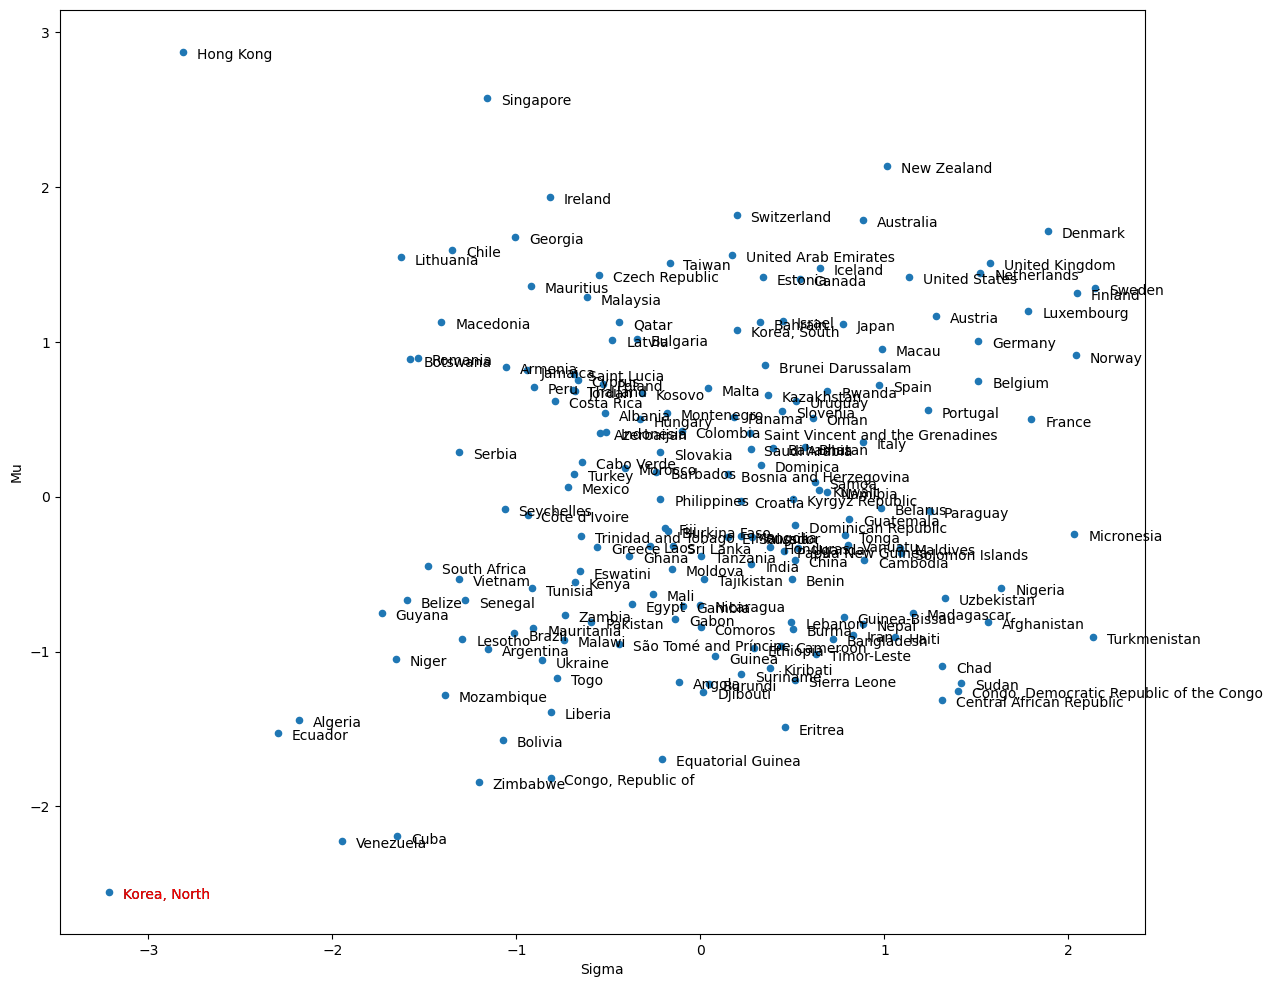

In [65]:
from matplotlib.pyplot import cm
fig, ax = plt.subplots()
cmap = cm.get_cmap('Spectral')
Sigma_Mu_df_transformed.plot('Sigma', 'Mu', kind='scatter', ax=ax, figsize = (14,12))
for k, v in Sigma_Mu_df_transformed.iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=10, color='black')
for k, v in Sigma_Mu_df_transformed.iterrows():
    if (k=='Korea, North '):
        plt.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=10, color='red')

Now, get the Pareto-Koopmans frontiers

In [66]:
df =Sigma_Mu_df.copy()
PKF=[]
count=0
while df.shape[0]>0:
    PKF.append([])
    for idx in df.index:
        comp_df = df.copy()
        comp_df.drop(index = idx)
        if any([any([
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])), # loose in both dimensions
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] == comp_df.iloc[i,1])), # loose in first dimension and drow in second
                ((df.loc[idx][0] == comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])) # loose in the second dimension 
                    ]) for i in range (comp_df.shape[0])]
                ) == False:
            PKF[count].append(idx)
    
    if len(PKF[count]) == 0:
        PKF[count].append(df.index)
        break
    else:
        df = df.drop(index=PKF[count])
        print(f'PKF_{str(count+1)}: {PKF[count]}')
        count+=1

PKF_1: ['Hong Kong', 'Korea, North ']
PKF_2: ['Algeria', 'Chile', 'Ecuador', 'Guyana', 'Lithuania', 'Singapore']
PKF_3: ['Belize', 'Botswana', 'Georgia', 'Ireland', 'Macedonia', 'New Zealand', 'Niger', 'Romania', 'Venezuela']
PKF_4: ['Armenia', 'Cuba', 'Czech Republic', 'Mauritius', 'Serbia', 'South Africa', 'Switzerland', 'Taiwan ', 'United Arab Emirates']
PKF_5: ['Australia', 'Estonia', 'Iceland', 'Jamaica', 'Malaysia', 'Mozambique', 'Seychelles', 'Vietnam']
PKF_6: ['Canada', "Côte d'Ivoire", 'Denmark', 'Israel', 'Latvia', 'Lesotho', 'Netherlands', 'Peru', 'Qatar', 'Saint Lucia', 'Senegal', 'United Kingdom', 'United States']
PKF_7: ['Argentina', 'Austria', 'Bahrain', 'Brazil', 'Bulgaria', 'Costa Rica', 'Cyprus', 'Finland', 'Korea, South', 'Luxembourg', 'Sweden', 'Thailand', 'Tunisia', 'Zimbabwe']
PKF_8: ['Bolivia', 'Brunei Darussalam', 'Japan', 'Jordan', 'Mauritania', 'Mexico', 'Poland', 'Turkey', 'Zambia']
PKF_9: ['Albania', 'Azerbaijan', 'Cabo Verde', 'Eswatini', 'Germany', 'Kenya'

In [68]:
from PROMETHEE import optimize_PROM1_original_pos_flow

In [69]:
# Run optimization and get the local efficiences

lambda_ = 0

m = Sigma_Mu_df.shape[0] # number of alternatives
m_f = len(PKF) # number of frontiers
local_ef = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))
local_ef_new = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))

for unit in range (m):
    for fr in range (m_f):
        unit_sigmamu = np.array([Sigma_Mu_df.iloc[unit]]) # get the alternative unit
        
        Fr_list = [] # list of alternatives within frontier fr or within a less preferred one
        for k in range(fr, m_f):
            for l in range(len(PKF[k])):
                Fr_list.append(PKF[k][l])
        Fr_sigmamu = np.array (Sigma_Mu_df.loc[Fr_list]) # get alternatives within frontier fr or a less preferred one
        
        
        M, resultado = optimize_PROM1_original_pos_flow(unit_sigmamu, Fr_sigmamu)
        local_ef[unit, fr] = M.obj()

        M_new, resultado_new = optimize_newconstraint(unit_sigmamu, Fr_sigmamu, lambda_)
        local_ef_new[unit, fr] = M_new.obj()
        
        print(f'alternative {unit+1}, fronteira {fr + 1}: resolvido.')

alternative 1, fronteira 1: resolvido.
alternative 1, fronteira 2: resolvido.
alternative 1, fronteira 3: resolvido.
alternative 1, fronteira 4: resolvido.
alternative 1, fronteira 5: resolvido.
alternative 1, fronteira 6: resolvido.
alternative 1, fronteira 7: resolvido.
alternative 1, fronteira 8: resolvido.
alternative 1, fronteira 9: resolvido.
alternative 1, fronteira 10: resolvido.
alternative 1, fronteira 11: resolvido.
alternative 1, fronteira 12: resolvido.
alternative 1, fronteira 13: resolvido.
alternative 1, fronteira 14: resolvido.
alternative 1, fronteira 15: resolvido.
alternative 1, fronteira 16: resolvido.
alternative 1, fronteira 17: resolvido.
alternative 1, fronteira 18: resolvido.
alternative 1, fronteira 19: resolvido.
alternative 1, fronteira 20: resolvido.
alternative 1, fronteira 21: resolvido.
alternative 1, fronteira 22: resolvido.
alternative 1, fronteira 23: resolvido.
alternative 1, fronteira 24: resolvido.
alternative 1, fronteira 25: resolvido.
alternati

alternative 9, fronteira 8: resolvido.
alternative 9, fronteira 9: resolvido.
alternative 9, fronteira 10: resolvido.
alternative 9, fronteira 11: resolvido.
alternative 9, fronteira 12: resolvido.
alternative 9, fronteira 13: resolvido.
alternative 9, fronteira 14: resolvido.
alternative 9, fronteira 15: resolvido.
alternative 9, fronteira 16: resolvido.
alternative 9, fronteira 17: resolvido.
alternative 9, fronteira 18: resolvido.
alternative 9, fronteira 19: resolvido.
alternative 9, fronteira 20: resolvido.
alternative 9, fronteira 21: resolvido.
alternative 9, fronteira 22: resolvido.
alternative 9, fronteira 23: resolvido.
alternative 9, fronteira 24: resolvido.
alternative 9, fronteira 25: resolvido.
alternative 10, fronteira 1: resolvido.
alternative 10, fronteira 2: resolvido.
alternative 10, fronteira 3: resolvido.
alternative 10, fronteira 4: resolvido.
alternative 10, fronteira 5: resolvido.
alternative 10, fronteira 6: resolvido.
alternative 10, fronteira 7: resolvido.
al

alternative 17, fronteira 11: resolvido.
alternative 17, fronteira 12: resolvido.
alternative 17, fronteira 13: resolvido.
alternative 17, fronteira 14: resolvido.
alternative 17, fronteira 15: resolvido.
alternative 17, fronteira 16: resolvido.
alternative 17, fronteira 17: resolvido.
alternative 17, fronteira 18: resolvido.
alternative 17, fronteira 19: resolvido.
alternative 17, fronteira 20: resolvido.
alternative 17, fronteira 21: resolvido.
alternative 17, fronteira 22: resolvido.
alternative 17, fronteira 23: resolvido.
alternative 17, fronteira 24: resolvido.
alternative 17, fronteira 25: resolvido.
alternative 18, fronteira 1: resolvido.
alternative 18, fronteira 2: resolvido.
alternative 18, fronteira 3: resolvido.
alternative 18, fronteira 4: resolvido.
alternative 18, fronteira 5: resolvido.
alternative 18, fronteira 6: resolvido.
alternative 18, fronteira 7: resolvido.
alternative 18, fronteira 8: resolvido.
alternative 18, fronteira 9: resolvido.
alternative 18, fronteira

alternative 25, fronteira 13: resolvido.
alternative 25, fronteira 14: resolvido.
alternative 25, fronteira 15: resolvido.
alternative 25, fronteira 16: resolvido.
alternative 25, fronteira 17: resolvido.
alternative 25, fronteira 18: resolvido.
alternative 25, fronteira 19: resolvido.
alternative 25, fronteira 20: resolvido.
alternative 25, fronteira 21: resolvido.
alternative 25, fronteira 22: resolvido.
alternative 25, fronteira 23: resolvido.
alternative 25, fronteira 24: resolvido.
alternative 25, fronteira 25: resolvido.
alternative 26, fronteira 1: resolvido.
alternative 26, fronteira 2: resolvido.
alternative 26, fronteira 3: resolvido.
alternative 26, fronteira 4: resolvido.
alternative 26, fronteira 5: resolvido.
alternative 26, fronteira 6: resolvido.
alternative 26, fronteira 7: resolvido.
alternative 26, fronteira 8: resolvido.
alternative 26, fronteira 9: resolvido.
alternative 26, fronteira 10: resolvido.
alternative 26, fronteira 11: resolvido.
alternative 26, fronteira

alternative 33, fronteira 15: resolvido.
alternative 33, fronteira 16: resolvido.
alternative 33, fronteira 17: resolvido.
alternative 33, fronteira 18: resolvido.
alternative 33, fronteira 19: resolvido.
alternative 33, fronteira 20: resolvido.
alternative 33, fronteira 21: resolvido.
alternative 33, fronteira 22: resolvido.
alternative 33, fronteira 23: resolvido.
alternative 33, fronteira 24: resolvido.
alternative 33, fronteira 25: resolvido.
alternative 34, fronteira 1: resolvido.
alternative 34, fronteira 2: resolvido.
alternative 34, fronteira 3: resolvido.
alternative 34, fronteira 4: resolvido.
alternative 34, fronteira 5: resolvido.
alternative 34, fronteira 6: resolvido.
alternative 34, fronteira 7: resolvido.
alternative 34, fronteira 8: resolvido.
alternative 34, fronteira 9: resolvido.
alternative 34, fronteira 10: resolvido.
alternative 34, fronteira 11: resolvido.
alternative 34, fronteira 12: resolvido.
alternative 34, fronteira 13: resolvido.
alternative 34, fronteira

alternative 41, fronteira 17: resolvido.
alternative 41, fronteira 18: resolvido.
alternative 41, fronteira 19: resolvido.
alternative 41, fronteira 20: resolvido.
alternative 41, fronteira 21: resolvido.
alternative 41, fronteira 22: resolvido.
alternative 41, fronteira 23: resolvido.
alternative 41, fronteira 24: resolvido.
alternative 41, fronteira 25: resolvido.
alternative 42, fronteira 1: resolvido.
alternative 42, fronteira 2: resolvido.
alternative 42, fronteira 3: resolvido.
alternative 42, fronteira 4: resolvido.
alternative 42, fronteira 5: resolvido.
alternative 42, fronteira 6: resolvido.
alternative 42, fronteira 7: resolvido.
alternative 42, fronteira 8: resolvido.
alternative 42, fronteira 9: resolvido.
alternative 42, fronteira 10: resolvido.
alternative 42, fronteira 11: resolvido.
alternative 42, fronteira 12: resolvido.
alternative 42, fronteira 13: resolvido.
alternative 42, fronteira 14: resolvido.
alternative 42, fronteira 15: resolvido.
alternative 42, fronteira

alternative 49, fronteira 19: resolvido.
alternative 49, fronteira 20: resolvido.
alternative 49, fronteira 21: resolvido.
alternative 49, fronteira 22: resolvido.
alternative 49, fronteira 23: resolvido.
alternative 49, fronteira 24: resolvido.
alternative 49, fronteira 25: resolvido.
alternative 50, fronteira 1: resolvido.
alternative 50, fronteira 2: resolvido.
alternative 50, fronteira 3: resolvido.
alternative 50, fronteira 4: resolvido.
alternative 50, fronteira 5: resolvido.
alternative 50, fronteira 6: resolvido.
alternative 50, fronteira 7: resolvido.
alternative 50, fronteira 8: resolvido.
alternative 50, fronteira 9: resolvido.
alternative 50, fronteira 10: resolvido.
alternative 50, fronteira 11: resolvido.
alternative 50, fronteira 12: resolvido.
alternative 50, fronteira 13: resolvido.
alternative 50, fronteira 14: resolvido.
alternative 50, fronteira 15: resolvido.
alternative 50, fronteira 16: resolvido.
alternative 50, fronteira 17: resolvido.
alternative 50, fronteira

alternative 57, fronteira 21: resolvido.
alternative 57, fronteira 22: resolvido.
alternative 57, fronteira 23: resolvido.
alternative 57, fronteira 24: resolvido.
alternative 57, fronteira 25: resolvido.
alternative 58, fronteira 1: resolvido.
alternative 58, fronteira 2: resolvido.
alternative 58, fronteira 3: resolvido.
alternative 58, fronteira 4: resolvido.
alternative 58, fronteira 5: resolvido.
alternative 58, fronteira 6: resolvido.
alternative 58, fronteira 7: resolvido.
alternative 58, fronteira 8: resolvido.
alternative 58, fronteira 9: resolvido.
alternative 58, fronteira 10: resolvido.
alternative 58, fronteira 11: resolvido.
alternative 58, fronteira 12: resolvido.
alternative 58, fronteira 13: resolvido.
alternative 58, fronteira 14: resolvido.
alternative 58, fronteira 15: resolvido.
alternative 58, fronteira 16: resolvido.
alternative 58, fronteira 17: resolvido.
alternative 58, fronteira 18: resolvido.
alternative 58, fronteira 19: resolvido.
alternative 58, fronteira

alternative 65, fronteira 23: resolvido.
alternative 65, fronteira 24: resolvido.
alternative 65, fronteira 25: resolvido.
alternative 66, fronteira 1: resolvido.
alternative 66, fronteira 2: resolvido.
alternative 66, fronteira 3: resolvido.
alternative 66, fronteira 4: resolvido.
alternative 66, fronteira 5: resolvido.
alternative 66, fronteira 6: resolvido.
alternative 66, fronteira 7: resolvido.
alternative 66, fronteira 8: resolvido.
alternative 66, fronteira 9: resolvido.
alternative 66, fronteira 10: resolvido.
alternative 66, fronteira 11: resolvido.
alternative 66, fronteira 12: resolvido.
alternative 66, fronteira 13: resolvido.
alternative 66, fronteira 14: resolvido.
alternative 66, fronteira 15: resolvido.
alternative 66, fronteira 16: resolvido.
alternative 66, fronteira 17: resolvido.
alternative 66, fronteira 18: resolvido.
alternative 66, fronteira 19: resolvido.
alternative 66, fronteira 20: resolvido.
alternative 66, fronteira 21: resolvido.
alternative 66, fronteira

alternative 73, fronteira 25: resolvido.
alternative 74, fronteira 1: resolvido.
alternative 74, fronteira 2: resolvido.
alternative 74, fronteira 3: resolvido.
alternative 74, fronteira 4: resolvido.
alternative 74, fronteira 5: resolvido.
alternative 74, fronteira 6: resolvido.
alternative 74, fronteira 7: resolvido.
alternative 74, fronteira 8: resolvido.
alternative 74, fronteira 9: resolvido.
alternative 74, fronteira 10: resolvido.
alternative 74, fronteira 11: resolvido.
alternative 74, fronteira 12: resolvido.
alternative 74, fronteira 13: resolvido.
alternative 74, fronteira 14: resolvido.
alternative 74, fronteira 15: resolvido.
alternative 74, fronteira 16: resolvido.
alternative 74, fronteira 17: resolvido.
alternative 74, fronteira 18: resolvido.
alternative 74, fronteira 19: resolvido.
alternative 74, fronteira 20: resolvido.
alternative 74, fronteira 21: resolvido.
alternative 74, fronteira 22: resolvido.
alternative 74, fronteira 23: resolvido.
alternative 74, fronteira

alternative 82, fronteira 2: resolvido.
alternative 82, fronteira 3: resolvido.
alternative 82, fronteira 4: resolvido.
alternative 82, fronteira 5: resolvido.
alternative 82, fronteira 6: resolvido.
alternative 82, fronteira 7: resolvido.
alternative 82, fronteira 8: resolvido.
alternative 82, fronteira 9: resolvido.
alternative 82, fronteira 10: resolvido.
alternative 82, fronteira 11: resolvido.
alternative 82, fronteira 12: resolvido.
alternative 82, fronteira 13: resolvido.
alternative 82, fronteira 14: resolvido.
alternative 82, fronteira 15: resolvido.
alternative 82, fronteira 16: resolvido.
alternative 82, fronteira 17: resolvido.
alternative 82, fronteira 18: resolvido.
alternative 82, fronteira 19: resolvido.
alternative 82, fronteira 20: resolvido.
alternative 82, fronteira 21: resolvido.
alternative 82, fronteira 22: resolvido.
alternative 82, fronteira 23: resolvido.
alternative 82, fronteira 24: resolvido.
alternative 82, fronteira 25: resolvido.
alternative 83, fronteir

alternative 90, fronteira 4: resolvido.
alternative 90, fronteira 5: resolvido.
alternative 90, fronteira 6: resolvido.
alternative 90, fronteira 7: resolvido.
alternative 90, fronteira 8: resolvido.
alternative 90, fronteira 9: resolvido.
alternative 90, fronteira 10: resolvido.
alternative 90, fronteira 11: resolvido.
alternative 90, fronteira 12: resolvido.
alternative 90, fronteira 13: resolvido.
alternative 90, fronteira 14: resolvido.
alternative 90, fronteira 15: resolvido.
alternative 90, fronteira 16: resolvido.
alternative 90, fronteira 17: resolvido.
alternative 90, fronteira 18: resolvido.
alternative 90, fronteira 19: resolvido.
alternative 90, fronteira 20: resolvido.
alternative 90, fronteira 21: resolvido.
alternative 90, fronteira 22: resolvido.
alternative 90, fronteira 23: resolvido.
alternative 90, fronteira 24: resolvido.
alternative 90, fronteira 25: resolvido.
alternative 91, fronteira 1: resolvido.
alternative 91, fronteira 2: resolvido.
alternative 91, fronteir

alternative 98, fronteira 6: resolvido.
alternative 98, fronteira 7: resolvido.
alternative 98, fronteira 8: resolvido.
alternative 98, fronteira 9: resolvido.
alternative 98, fronteira 10: resolvido.
alternative 98, fronteira 11: resolvido.
alternative 98, fronteira 12: resolvido.
alternative 98, fronteira 13: resolvido.
alternative 98, fronteira 14: resolvido.
alternative 98, fronteira 15: resolvido.
alternative 98, fronteira 16: resolvido.
alternative 98, fronteira 17: resolvido.
alternative 98, fronteira 18: resolvido.
alternative 98, fronteira 19: resolvido.
alternative 98, fronteira 20: resolvido.
alternative 98, fronteira 21: resolvido.
alternative 98, fronteira 22: resolvido.
alternative 98, fronteira 23: resolvido.
alternative 98, fronteira 24: resolvido.
alternative 98, fronteira 25: resolvido.
alternative 99, fronteira 1: resolvido.
alternative 99, fronteira 2: resolvido.
alternative 99, fronteira 3: resolvido.
alternative 99, fronteira 4: resolvido.
alternative 99, fronteir

alternative 106, fronteira 4: resolvido.
alternative 106, fronteira 5: resolvido.
alternative 106, fronteira 6: resolvido.
alternative 106, fronteira 7: resolvido.
alternative 106, fronteira 8: resolvido.
alternative 106, fronteira 9: resolvido.
alternative 106, fronteira 10: resolvido.
alternative 106, fronteira 11: resolvido.
alternative 106, fronteira 12: resolvido.
alternative 106, fronteira 13: resolvido.
alternative 106, fronteira 14: resolvido.
alternative 106, fronteira 15: resolvido.
alternative 106, fronteira 16: resolvido.
alternative 106, fronteira 17: resolvido.
alternative 106, fronteira 18: resolvido.
alternative 106, fronteira 19: resolvido.
alternative 106, fronteira 20: resolvido.
alternative 106, fronteira 21: resolvido.
alternative 106, fronteira 22: resolvido.
alternative 106, fronteira 23: resolvido.
alternative 106, fronteira 24: resolvido.
alternative 106, fronteira 25: resolvido.
alternative 107, fronteira 1: resolvido.
alternative 107, fronteira 2: resolvido.


alternative 114, fronteira 1: resolvido.
alternative 114, fronteira 2: resolvido.
alternative 114, fronteira 3: resolvido.
alternative 114, fronteira 4: resolvido.
alternative 114, fronteira 5: resolvido.
alternative 114, fronteira 6: resolvido.
alternative 114, fronteira 7: resolvido.
alternative 114, fronteira 8: resolvido.
alternative 114, fronteira 9: resolvido.
alternative 114, fronteira 10: resolvido.
alternative 114, fronteira 11: resolvido.
alternative 114, fronteira 12: resolvido.
alternative 114, fronteira 13: resolvido.
alternative 114, fronteira 14: resolvido.
alternative 114, fronteira 15: resolvido.
alternative 114, fronteira 16: resolvido.
alternative 114, fronteira 17: resolvido.
alternative 114, fronteira 18: resolvido.
alternative 114, fronteira 19: resolvido.
alternative 114, fronteira 20: resolvido.
alternative 114, fronteira 21: resolvido.
alternative 114, fronteira 22: resolvido.
alternative 114, fronteira 23: resolvido.
alternative 114, fronteira 24: resolvido.
a

alternative 121, fronteira 23: resolvido.
alternative 121, fronteira 24: resolvido.
alternative 121, fronteira 25: resolvido.
alternative 122, fronteira 1: resolvido.
alternative 122, fronteira 2: resolvido.
alternative 122, fronteira 3: resolvido.
alternative 122, fronteira 4: resolvido.
alternative 122, fronteira 5: resolvido.
alternative 122, fronteira 6: resolvido.
alternative 122, fronteira 7: resolvido.
alternative 122, fronteira 8: resolvido.
alternative 122, fronteira 9: resolvido.
alternative 122, fronteira 10: resolvido.
alternative 122, fronteira 11: resolvido.
alternative 122, fronteira 12: resolvido.
alternative 122, fronteira 13: resolvido.
alternative 122, fronteira 14: resolvido.
alternative 122, fronteira 15: resolvido.
alternative 122, fronteira 16: resolvido.
alternative 122, fronteira 17: resolvido.
alternative 122, fronteira 18: resolvido.
alternative 122, fronteira 19: resolvido.
alternative 122, fronteira 20: resolvido.
alternative 122, fronteira 21: resolvido.
a

alternative 129, fronteira 20: resolvido.
alternative 129, fronteira 21: resolvido.
alternative 129, fronteira 22: resolvido.
alternative 129, fronteira 23: resolvido.
alternative 129, fronteira 24: resolvido.
alternative 129, fronteira 25: resolvido.
alternative 130, fronteira 1: resolvido.
alternative 130, fronteira 2: resolvido.
alternative 130, fronteira 3: resolvido.
alternative 130, fronteira 4: resolvido.
alternative 130, fronteira 5: resolvido.
alternative 130, fronteira 6: resolvido.
alternative 130, fronteira 7: resolvido.
alternative 130, fronteira 8: resolvido.
alternative 130, fronteira 9: resolvido.
alternative 130, fronteira 10: resolvido.
alternative 130, fronteira 11: resolvido.
alternative 130, fronteira 12: resolvido.
alternative 130, fronteira 13: resolvido.
alternative 130, fronteira 14: resolvido.
alternative 130, fronteira 15: resolvido.
alternative 130, fronteira 16: resolvido.
alternative 130, fronteira 17: resolvido.
alternative 130, fronteira 18: resolvido.
a

alternative 137, fronteira 17: resolvido.
alternative 137, fronteira 18: resolvido.
alternative 137, fronteira 19: resolvido.
alternative 137, fronteira 20: resolvido.
alternative 137, fronteira 21: resolvido.
alternative 137, fronteira 22: resolvido.
alternative 137, fronteira 23: resolvido.
alternative 137, fronteira 24: resolvido.
alternative 137, fronteira 25: resolvido.
alternative 138, fronteira 1: resolvido.
alternative 138, fronteira 2: resolvido.
alternative 138, fronteira 3: resolvido.
alternative 138, fronteira 4: resolvido.
alternative 138, fronteira 5: resolvido.
alternative 138, fronteira 6: resolvido.
alternative 138, fronteira 7: resolvido.
alternative 138, fronteira 8: resolvido.
alternative 138, fronteira 9: resolvido.
alternative 138, fronteira 10: resolvido.
alternative 138, fronteira 11: resolvido.
alternative 138, fronteira 12: resolvido.
alternative 138, fronteira 13: resolvido.
alternative 138, fronteira 14: resolvido.
alternative 138, fronteira 15: resolvido.
a

alternative 145, fronteira 14: resolvido.
alternative 145, fronteira 15: resolvido.
alternative 145, fronteira 16: resolvido.
alternative 145, fronteira 17: resolvido.
alternative 145, fronteira 18: resolvido.
alternative 145, fronteira 19: resolvido.
alternative 145, fronteira 20: resolvido.
alternative 145, fronteira 21: resolvido.
alternative 145, fronteira 22: resolvido.
alternative 145, fronteira 23: resolvido.
alternative 145, fronteira 24: resolvido.
alternative 145, fronteira 25: resolvido.
alternative 146, fronteira 1: resolvido.
alternative 146, fronteira 2: resolvido.
alternative 146, fronteira 3: resolvido.
alternative 146, fronteira 4: resolvido.
alternative 146, fronteira 5: resolvido.
alternative 146, fronteira 6: resolvido.
alternative 146, fronteira 7: resolvido.
alternative 146, fronteira 8: resolvido.
alternative 146, fronteira 9: resolvido.
alternative 146, fronteira 10: resolvido.
alternative 146, fronteira 11: resolvido.
alternative 146, fronteira 12: resolvido.
a

alternative 153, fronteira 11: resolvido.
alternative 153, fronteira 12: resolvido.
alternative 153, fronteira 13: resolvido.
alternative 153, fronteira 14: resolvido.
alternative 153, fronteira 15: resolvido.
alternative 153, fronteira 16: resolvido.
alternative 153, fronteira 17: resolvido.
alternative 153, fronteira 18: resolvido.
alternative 153, fronteira 19: resolvido.
alternative 153, fronteira 20: resolvido.
alternative 153, fronteira 21: resolvido.
alternative 153, fronteira 22: resolvido.
alternative 153, fronteira 23: resolvido.
alternative 153, fronteira 24: resolvido.
alternative 153, fronteira 25: resolvido.
alternative 154, fronteira 1: resolvido.
alternative 154, fronteira 2: resolvido.
alternative 154, fronteira 3: resolvido.
alternative 154, fronteira 4: resolvido.
alternative 154, fronteira 5: resolvido.
alternative 154, fronteira 6: resolvido.
alternative 154, fronteira 7: resolvido.
alternative 154, fronteira 8: resolvido.
alternative 154, fronteira 9: resolvido.
a

alternative 161, fronteira 8: resolvido.
alternative 161, fronteira 9: resolvido.
alternative 161, fronteira 10: resolvido.
alternative 161, fronteira 11: resolvido.
alternative 161, fronteira 12: resolvido.
alternative 161, fronteira 13: resolvido.
alternative 161, fronteira 14: resolvido.
alternative 161, fronteira 15: resolvido.
alternative 161, fronteira 16: resolvido.
alternative 161, fronteira 17: resolvido.
alternative 161, fronteira 18: resolvido.
alternative 161, fronteira 19: resolvido.
alternative 161, fronteira 20: resolvido.
alternative 161, fronteira 21: resolvido.
alternative 161, fronteira 22: resolvido.
alternative 161, fronteira 23: resolvido.
alternative 161, fronteira 24: resolvido.
alternative 161, fronteira 25: resolvido.
alternative 162, fronteira 1: resolvido.
alternative 162, fronteira 2: resolvido.
alternative 162, fronteira 3: resolvido.
alternative 162, fronteira 4: resolvido.
alternative 162, fronteira 5: resolvido.
alternative 162, fronteira 6: resolvido.


alternative 169, fronteira 5: resolvido.
alternative 169, fronteira 6: resolvido.
alternative 169, fronteira 7: resolvido.
alternative 169, fronteira 8: resolvido.
alternative 169, fronteira 9: resolvido.
alternative 169, fronteira 10: resolvido.
alternative 169, fronteira 11: resolvido.
alternative 169, fronteira 12: resolvido.
alternative 169, fronteira 13: resolvido.
alternative 169, fronteira 14: resolvido.
alternative 169, fronteira 15: resolvido.
alternative 169, fronteira 16: resolvido.
alternative 169, fronteira 17: resolvido.
alternative 169, fronteira 18: resolvido.
alternative 169, fronteira 19: resolvido.
alternative 169, fronteira 20: resolvido.
alternative 169, fronteira 21: resolvido.
alternative 169, fronteira 22: resolvido.
alternative 169, fronteira 23: resolvido.
alternative 169, fronteira 24: resolvido.
alternative 169, fronteira 25: resolvido.
alternative 170, fronteira 1: resolvido.
alternative 170, fronteira 2: resolvido.
alternative 170, fronteira 3: resolvido.


alternative 177, fronteira 2: resolvido.
alternative 177, fronteira 3: resolvido.
alternative 177, fronteira 4: resolvido.
alternative 177, fronteira 5: resolvido.
alternative 177, fronteira 6: resolvido.
alternative 177, fronteira 7: resolvido.
alternative 177, fronteira 8: resolvido.
alternative 177, fronteira 9: resolvido.
alternative 177, fronteira 10: resolvido.
alternative 177, fronteira 11: resolvido.
alternative 177, fronteira 12: resolvido.
alternative 177, fronteira 13: resolvido.
alternative 177, fronteira 14: resolvido.
alternative 177, fronteira 15: resolvido.
alternative 177, fronteira 16: resolvido.
alternative 177, fronteira 17: resolvido.
alternative 177, fronteira 18: resolvido.
alternative 177, fronteira 19: resolvido.
alternative 177, fronteira 20: resolvido.
alternative 177, fronteira 21: resolvido.
alternative 177, fronteira 22: resolvido.
alternative 177, fronteira 23: resolvido.
alternative 177, fronteira 24: resolvido.
alternative 177, fronteira 25: resolvido.


In [74]:
# Print local efficiencies

pd.DataFrame(local_ef, columns = ['$PKF_' + str(i) +'$' for i in range(len(PKF))], index=dados.index)

$PKF_0$   $PKF_1$   $PKF_2$   $PKF_3$   $PKF_4$   $PKF_5$  \
Afghanistan -0.076012 -0.059756 -0.054447 -0.050251 -0.047350 -0.046241   
Albania     -0.040334 -0.021431 -0.017962 -0.011181 -0.008038 -0.006949   
Algeria     -0.015499 -0.001534  0.005367  0.009903  0.013105  0.014656   
Angola      -0.049022 -0.034035 -0.027844 -0.023459 -0.020613 -0.019403   
Argentina   -0.031787 -0.016535 -0.010528 -0.006183 -0.003325 -0.002307   
...               ...       ...       ...       ...       ...       ...   
Vanuatu     -0.062984 -0.045749 -0.041120 -0.036301 -0.032981 -0.031878   
Venezuela   -0.020331 -0.005790  0.000000  0.004887  0.009196  0.010747   
Vietnam     -0.028663 -0.012404 -0.007097 -0.002902  0.000000  0.001111   
Zambia      -0.038329 -0.022485 -0.016890 -0.012633 -0.009749 -0.008970   
Zimbabwe    -0.031975 -0.017986 -0.011324 -0.006683 -0.002999 -0.001448   

              $PKF_6$   $PKF_7$   $PKF_8$   $PKF_9$  ...  $PKF_15$  $PKF_16$  \
Afghanistan -0.043170 -0.040598 -0.038603 -0.036984  ... -0.028336 -0.027207   
Albania     -0.004712 -0.003078  0.000000  0.003997  ...  0.084297  0.086089   
Algeria      0.016409  0.018320  0.021789  0.022572  ...  0.033381  0.033707   
Angola      -0.017210 -0.014491 -0.012270 -0.010820  ... -0.000678 -0.000352   
Argentina    0.000000  0.002928  0.004955  0.006588  ...  0.016418  0.016744   
...               ...       ...       ...       ...  ...       ...       ...   
Vanuatu     -0.029115 -0.026889 -0.024924 -0.023319  ... -0.012747 -0.009741   
Venezuela    0.012195  0.014345  0.017879  0.018628  ...  0.029472  0.029798   
Vietnam      0.004182  0.006753  0.008749  0.010367  ...  0.019012  0.020147   
Zambia      -0.005920 -0.003202 -0.001194  0.000431  ...  0.009564  0.009890   
Zimbabwe     0.000000  0.002150  0.005684  0.006433  ...  0.017277  0.017603   

             $PKF_17$  $PKF_18$  $PKF_19$  $PKF_20$  $PKF_21$  $PKF_22$  \
Afghanistan -0.025868 -0.021334 -0.019201 -0.015529 -0.008534  0.000000   
Albania      0.103966  0.106989  0.132629  0.153488  0.192457  0.229683   
Algeria      0.034059  0.036215  0.039622  0.043483  0.044450  0.053357   
Angola       0.000000  0.002378  0.005563  0.009697  0.010391  0.019298   
Argentina    0.017469  0.019975  0.022860  0.026925  0.027912  0.036393   
...               ...       ...       ...       ...       ...       ...   
Vanuatu     -0.005390 -0.002986  0.004055  0.008476  0.047445  0.084671   
Venezuela    0.030150  0.032305  0.035713  0.039574  0.040541  0.049448   
Vietnam      0.021483  0.026024  0.028154  0.031833  0.038852  0.047530   
Zambia       0.011450  0.015031  0.017594  0.020366  0.024207  0.029539   
Zimbabwe     0.017954  0.020110  0.023518  0.027378  0.028346  0.037252   

             $PKF_23$  $PKF_24$  
Afghanistan  0.016450  0.067157  
Albania      0.246134  0.296840  
Algeria      0.057536  0.058973  
Angola       0.023477  0.024914  
Argentina    0.040600  0.042158  
...               ...       ...  
Vanuatu      0.101122  0.151828  
Venezuela    0.053627  0.055063  
Vietnam      0.063980  0.114687  
Zambia       0.040308  0.074617  
Zimbabwe     0.041432  0.042868  

[180 rows x 25 columns]

Now, lets calculate the global efficience and normalize it using min-max

In [77]:
global_ef = np.sum(local_ef, axis = 1)
global_ef = (global_ef - global_ef.min()) /(global_ef.max() - global_ef.min())

results = pd.DataFrame({"Global Efficiency": global_ef}, index = Sigma_Mu_df.index)
results = results.assign(Position = results.rank(ascending=False))
results

Global Efficiency  Position
Afghanistan           0.023920     175.0
Albania               0.250694      55.0
Algeria               0.155777      84.0
Angola                0.076442     149.0
Argentina             0.116949     108.0
...                        ...       ...
Vanuatu               0.083335     145.0
Venezuela             0.146197      86.0
Vietnam               0.135170      93.0
Zambia                0.106446     118.0
Zimbabwe              0.117751     107.0

[180 rows x 2 columns]

In [79]:
results.to_excel('Results_Heritage_Model2.xlsx')

# Model 3

In [82]:
mu_neg = np.mean(Neg_Flows, axis=1)
sigma_neg = np.std(Neg_Flows, axis=1)

#Construindo um DataFrame dos resultados
Sigma_Mu_df = pd.DataFrame({"Sigma": sigma_neg,"Mu": mu_neg}, index= dados.index)
Sigma_Mu_df


Sigma        Mu
Afghanistan  0.092839  0.586136
Albania      0.056749  0.330349
Algeria      0.034801  0.684036
Angola       0.066044  0.668822
Argentina    0.051026  0.624126
...               ...       ...
Vanuatu      0.070684  0.505264
Venezuela    0.040253  0.892549
Vietnam      0.047779  0.528463
Zambia       0.052275  0.579281
Zimbabwe     0.049252  0.804383

[180 rows x 2 columns]

In [84]:
Sigma_Mu_df_transformed = StandardScaler().fit_transform(Sigma_Mu_df)
Sigma_Mu_df_transformed = pd.DataFrame(Sigma_Mu_df_transformed, columns=['Sigma', 'Mu'], index = dados.index)
Sigma_Mu_df_transformed

Sigma        Mu
Afghanistan  1.703336  0.797959
Albania     -0.425603 -0.672346
Algeria     -1.720290  1.360702
Angola       0.122738  1.273254
Argentina   -0.763209  1.016332
...               ...       ...
Vanuatu      0.396451  0.333092
Venezuela   -1.398672  2.559269
Vietnam     -0.954753  0.466447
Zambia      -0.689490  0.758553
Zimbabwe    -0.867833  2.052476

[180 rows x 2 columns]

C:\Users\igor2\AppData\Local\Temp\ipykernel_24428\3310890946.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Spectral')


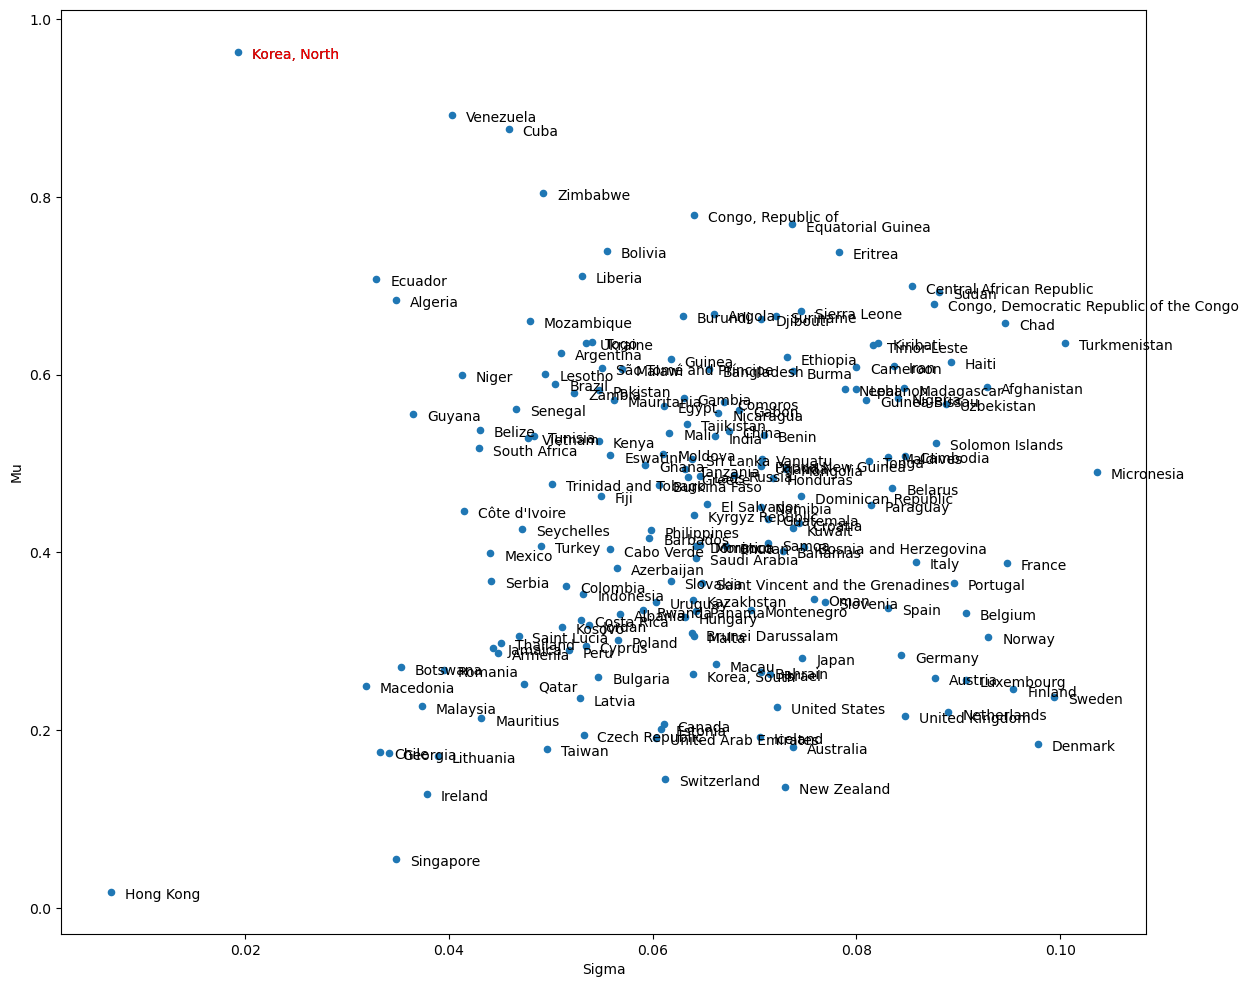

In [85]:
from matplotlib.pyplot import cm
fig, ax = plt.subplots()
cmap = cm.get_cmap('Spectral')
Sigma_Mu_df.plot('Sigma', 'Mu', kind='scatter', ax=ax, figsize = (14,12))
for k, v in Sigma_Mu_df.iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=10, color='black')
for k, v in Sigma_Mu_df.iterrows():
    if (k=='Korea, North '):
        plt.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=10, color='red')

Now, get the Pareto-Koopmans frontiers

In [86]:
df =Sigma_Mu_df.copy()
PKF=[]
count=0
while df.shape[0]>0:
    PKF.append([])
    for idx in df.index:
        comp_df = df.copy()
        comp_df.drop(index = idx)
        if any([any([
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])), # loose in both dimensions
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] == comp_df.iloc[i,1])), # loose in first dimension and drow in second
                ((df.loc[idx][0] == comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])) # loose in the second dimension 
                    ]) for i in range (comp_df.shape[0])]
                ) == False:
            PKF[count].append(idx)
    
    if len(PKF[count]) == 0:
        PKF[count].append(df.index)
        break
    else:
        df = df.drop(index=PKF[count])
        print(f'PKF_{str(count+1)}: {PKF[count]}')
        count+=1

PKF_1: ['Hong Kong', 'Korea, North ']
PKF_2: ['Ecuador', 'Macedonia', 'Venezuela']
PKF_3: ['Algeria', 'Chile', 'Cuba']
PKF_4: ['Botswana', 'Georgia', 'Guyana', 'Mozambique', 'Niger', 'Zimbabwe']
PKF_5: ['Argentina', 'Belize', 'Bolivia', 'Congo, Republic of', "Côte d'Ivoire", 'Lesotho', 'Liberia', 'Malaysia', 'Romania', 'Senegal', 'Singapore', 'South Africa']
PKF_6: ['Angola', 'Brazil', 'Burundi', 'Equatorial Guinea', 'Ireland', 'Lithuania', 'Mauritius', 'Mexico', 'Seychelles', 'Togo', 'Tunisia', 'Ukraine', 'Vietnam']
PKF_7: ['Djibouti', 'Eritrea', 'Guinea', 'Pakistan', 'São Tomé and Príncipe', 'Serbia', 'Sierra Leone', 'Suriname', 'Trinidad and Tobago', 'Turkey', 'Zambia']
PKF_8: ['Central African Republic', 'Colombia', 'Ethiopia', 'Jamaica', 'Kenya', 'Kiribati', 'Kosovo', 'Malawi', 'Mauritania', 'Saint Lucia', 'Thailand', 'Timor-Leste']
PKF_9: ['Armenia', 'Bangladesh', 'Cameroon', 'Congo, Democratic Republic of the Congo', 'Costa Rica', 'Egypt', 'Eswatini', 'Fiji', 'Gambia', 'Indonesi

In [87]:
from PROMETHEE import optimize_PROM1_original_neg_flow

In [88]:
# Run optimization and get the local efficiences
lambda_ = 0
m = Sigma_Mu_df.shape[0] # number of alternatives
m_f = len(PKF) # number of frontiers
local_ef = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))
local_ef_new = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))

for unit in range (m):
    for fr in range (m_f):
        unit_sigmamu = np.array([Sigma_Mu_df.iloc[unit]]) # get the alternative unit
        
        Fr_list = [] # list of alternatives within frontier fr or within a less preferred one
        for k in range(fr, m_f):
            for l in range(len(PKF[k])):
                Fr_list.append(PKF[k][l])
        Fr_sigmamu = np.array (Sigma_Mu_df.loc[Fr_list]) # get alternatives within frontier fr or a less preferred one
        
        
        M, resultado = optimize_PROM1_original_neg_flow(unit_sigmamu, Fr_sigmamu)
        local_ef[unit, fr] = M.obj()

        M_new, resultado_new = optimize_newconstraint(unit_sigmamu, Fr_sigmamu, lambda_)
        local_ef_new[unit, fr] = M_new.obj()
        
        print(f'alternative {unit+1}, fronteira {fr + 1}: resolvido.')

alternative 1, fronteira 1: resolvido.
alternative 1, fronteira 2: resolvido.
alternative 1, fronteira 3: resolvido.
alternative 1, fronteira 4: resolvido.
alternative 1, fronteira 5: resolvido.
alternative 1, fronteira 6: resolvido.
alternative 1, fronteira 7: resolvido.
alternative 1, fronteira 8: resolvido.
alternative 1, fronteira 9: resolvido.
alternative 1, fronteira 10: resolvido.
alternative 1, fronteira 11: resolvido.
alternative 1, fronteira 12: resolvido.
alternative 1, fronteira 13: resolvido.
alternative 1, fronteira 14: resolvido.
alternative 1, fronteira 15: resolvido.
alternative 1, fronteira 16: resolvido.
alternative 1, fronteira 17: resolvido.
alternative 1, fronteira 18: resolvido.
alternative 1, fronteira 19: resolvido.
alternative 1, fronteira 20: resolvido.
alternative 1, fronteira 21: resolvido.
alternative 1, fronteira 22: resolvido.
alternative 1, fronteira 23: resolvido.
alternative 1, fronteira 24: resolvido.
alternative 1, fronteira 25: resolvido.
alternati

alternative 9, fronteira 8: resolvido.
alternative 9, fronteira 9: resolvido.
alternative 9, fronteira 10: resolvido.
alternative 9, fronteira 11: resolvido.
alternative 9, fronteira 12: resolvido.
alternative 9, fronteira 13: resolvido.
alternative 9, fronteira 14: resolvido.
alternative 9, fronteira 15: resolvido.
alternative 9, fronteira 16: resolvido.
alternative 9, fronteira 17: resolvido.
alternative 9, fronteira 18: resolvido.
alternative 9, fronteira 19: resolvido.
alternative 9, fronteira 20: resolvido.
alternative 9, fronteira 21: resolvido.
alternative 9, fronteira 22: resolvido.
alternative 9, fronteira 23: resolvido.
alternative 9, fronteira 24: resolvido.
alternative 9, fronteira 25: resolvido.
alternative 10, fronteira 1: resolvido.
alternative 10, fronteira 2: resolvido.
alternative 10, fronteira 3: resolvido.
alternative 10, fronteira 4: resolvido.
alternative 10, fronteira 5: resolvido.
alternative 10, fronteira 6: resolvido.
alternative 10, fronteira 7: resolvido.
al

alternative 17, fronteira 11: resolvido.
alternative 17, fronteira 12: resolvido.
alternative 17, fronteira 13: resolvido.
alternative 17, fronteira 14: resolvido.
alternative 17, fronteira 15: resolvido.
alternative 17, fronteira 16: resolvido.
alternative 17, fronteira 17: resolvido.
alternative 17, fronteira 18: resolvido.
alternative 17, fronteira 19: resolvido.
alternative 17, fronteira 20: resolvido.
alternative 17, fronteira 21: resolvido.
alternative 17, fronteira 22: resolvido.
alternative 17, fronteira 23: resolvido.
alternative 17, fronteira 24: resolvido.
alternative 17, fronteira 25: resolvido.
alternative 18, fronteira 1: resolvido.
alternative 18, fronteira 2: resolvido.
alternative 18, fronteira 3: resolvido.
alternative 18, fronteira 4: resolvido.
alternative 18, fronteira 5: resolvido.
alternative 18, fronteira 6: resolvido.
alternative 18, fronteira 7: resolvido.
alternative 18, fronteira 8: resolvido.
alternative 18, fronteira 9: resolvido.
alternative 18, fronteira

alternative 25, fronteira 13: resolvido.
alternative 25, fronteira 14: resolvido.
alternative 25, fronteira 15: resolvido.
alternative 25, fronteira 16: resolvido.
alternative 25, fronteira 17: resolvido.
alternative 25, fronteira 18: resolvido.
alternative 25, fronteira 19: resolvido.
alternative 25, fronteira 20: resolvido.
alternative 25, fronteira 21: resolvido.
alternative 25, fronteira 22: resolvido.
alternative 25, fronteira 23: resolvido.
alternative 25, fronteira 24: resolvido.
alternative 25, fronteira 25: resolvido.
alternative 26, fronteira 1: resolvido.
alternative 26, fronteira 2: resolvido.
alternative 26, fronteira 3: resolvido.
alternative 26, fronteira 4: resolvido.
alternative 26, fronteira 5: resolvido.
alternative 26, fronteira 6: resolvido.
alternative 26, fronteira 7: resolvido.
alternative 26, fronteira 8: resolvido.
alternative 26, fronteira 9: resolvido.
alternative 26, fronteira 10: resolvido.
alternative 26, fronteira 11: resolvido.
alternative 26, fronteira

alternative 33, fronteira 15: resolvido.
alternative 33, fronteira 16: resolvido.
alternative 33, fronteira 17: resolvido.
alternative 33, fronteira 18: resolvido.
alternative 33, fronteira 19: resolvido.
alternative 33, fronteira 20: resolvido.
alternative 33, fronteira 21: resolvido.
alternative 33, fronteira 22: resolvido.
alternative 33, fronteira 23: resolvido.
alternative 33, fronteira 24: resolvido.
alternative 33, fronteira 25: resolvido.
alternative 34, fronteira 1: resolvido.
alternative 34, fronteira 2: resolvido.
alternative 34, fronteira 3: resolvido.
alternative 34, fronteira 4: resolvido.
alternative 34, fronteira 5: resolvido.
alternative 34, fronteira 6: resolvido.
alternative 34, fronteira 7: resolvido.
alternative 34, fronteira 8: resolvido.
alternative 34, fronteira 9: resolvido.
alternative 34, fronteira 10: resolvido.
alternative 34, fronteira 11: resolvido.
alternative 34, fronteira 12: resolvido.
alternative 34, fronteira 13: resolvido.
alternative 34, fronteira

alternative 41, fronteira 17: resolvido.
alternative 41, fronteira 18: resolvido.
alternative 41, fronteira 19: resolvido.
alternative 41, fronteira 20: resolvido.
alternative 41, fronteira 21: resolvido.
alternative 41, fronteira 22: resolvido.
alternative 41, fronteira 23: resolvido.
alternative 41, fronteira 24: resolvido.
alternative 41, fronteira 25: resolvido.
alternative 42, fronteira 1: resolvido.
alternative 42, fronteira 2: resolvido.
alternative 42, fronteira 3: resolvido.
alternative 42, fronteira 4: resolvido.
alternative 42, fronteira 5: resolvido.
alternative 42, fronteira 6: resolvido.
alternative 42, fronteira 7: resolvido.
alternative 42, fronteira 8: resolvido.
alternative 42, fronteira 9: resolvido.
alternative 42, fronteira 10: resolvido.
alternative 42, fronteira 11: resolvido.
alternative 42, fronteira 12: resolvido.
alternative 42, fronteira 13: resolvido.
alternative 42, fronteira 14: resolvido.
alternative 42, fronteira 15: resolvido.
alternative 42, fronteira

alternative 49, fronteira 19: resolvido.
alternative 49, fronteira 20: resolvido.
alternative 49, fronteira 21: resolvido.
alternative 49, fronteira 22: resolvido.
alternative 49, fronteira 23: resolvido.
alternative 49, fronteira 24: resolvido.
alternative 49, fronteira 25: resolvido.
alternative 50, fronteira 1: resolvido.
alternative 50, fronteira 2: resolvido.
alternative 50, fronteira 3: resolvido.
alternative 50, fronteira 4: resolvido.
alternative 50, fronteira 5: resolvido.
alternative 50, fronteira 6: resolvido.
alternative 50, fronteira 7: resolvido.
alternative 50, fronteira 8: resolvido.
alternative 50, fronteira 9: resolvido.
alternative 50, fronteira 10: resolvido.
alternative 50, fronteira 11: resolvido.
alternative 50, fronteira 12: resolvido.
alternative 50, fronteira 13: resolvido.
alternative 50, fronteira 14: resolvido.
alternative 50, fronteira 15: resolvido.
alternative 50, fronteira 16: resolvido.
alternative 50, fronteira 17: resolvido.
alternative 50, fronteira

alternative 57, fronteira 21: resolvido.
alternative 57, fronteira 22: resolvido.
alternative 57, fronteira 23: resolvido.
alternative 57, fronteira 24: resolvido.
alternative 57, fronteira 25: resolvido.
alternative 58, fronteira 1: resolvido.
alternative 58, fronteira 2: resolvido.
alternative 58, fronteira 3: resolvido.
alternative 58, fronteira 4: resolvido.
alternative 58, fronteira 5: resolvido.
alternative 58, fronteira 6: resolvido.
alternative 58, fronteira 7: resolvido.
alternative 58, fronteira 8: resolvido.
alternative 58, fronteira 9: resolvido.
alternative 58, fronteira 10: resolvido.
alternative 58, fronteira 11: resolvido.
alternative 58, fronteira 12: resolvido.
alternative 58, fronteira 13: resolvido.
alternative 58, fronteira 14: resolvido.
alternative 58, fronteira 15: resolvido.
alternative 58, fronteira 16: resolvido.
alternative 58, fronteira 17: resolvido.
alternative 58, fronteira 18: resolvido.
alternative 58, fronteira 19: resolvido.
alternative 58, fronteira

alternative 65, fronteira 23: resolvido.
alternative 65, fronteira 24: resolvido.
alternative 65, fronteira 25: resolvido.
alternative 66, fronteira 1: resolvido.
alternative 66, fronteira 2: resolvido.
alternative 66, fronteira 3: resolvido.
alternative 66, fronteira 4: resolvido.
alternative 66, fronteira 5: resolvido.
alternative 66, fronteira 6: resolvido.
alternative 66, fronteira 7: resolvido.
alternative 66, fronteira 8: resolvido.
alternative 66, fronteira 9: resolvido.
alternative 66, fronteira 10: resolvido.
alternative 66, fronteira 11: resolvido.
alternative 66, fronteira 12: resolvido.
alternative 66, fronteira 13: resolvido.
alternative 66, fronteira 14: resolvido.
alternative 66, fronteira 15: resolvido.
alternative 66, fronteira 16: resolvido.
alternative 66, fronteira 17: resolvido.
alternative 66, fronteira 18: resolvido.
alternative 66, fronteira 19: resolvido.
alternative 66, fronteira 20: resolvido.
alternative 66, fronteira 21: resolvido.
alternative 66, fronteira

alternative 73, fronteira 25: resolvido.
alternative 74, fronteira 1: resolvido.
alternative 74, fronteira 2: resolvido.
alternative 74, fronteira 3: resolvido.
alternative 74, fronteira 4: resolvido.
alternative 74, fronteira 5: resolvido.
alternative 74, fronteira 6: resolvido.
alternative 74, fronteira 7: resolvido.
alternative 74, fronteira 8: resolvido.
alternative 74, fronteira 9: resolvido.
alternative 74, fronteira 10: resolvido.
alternative 74, fronteira 11: resolvido.
alternative 74, fronteira 12: resolvido.
alternative 74, fronteira 13: resolvido.
alternative 74, fronteira 14: resolvido.
alternative 74, fronteira 15: resolvido.
alternative 74, fronteira 16: resolvido.
alternative 74, fronteira 17: resolvido.
alternative 74, fronteira 18: resolvido.
alternative 74, fronteira 19: resolvido.
alternative 74, fronteira 20: resolvido.
alternative 74, fronteira 21: resolvido.
alternative 74, fronteira 22: resolvido.
alternative 74, fronteira 23: resolvido.
alternative 74, fronteira

alternative 82, fronteira 2: resolvido.
alternative 82, fronteira 3: resolvido.
alternative 82, fronteira 4: resolvido.
alternative 82, fronteira 5: resolvido.
alternative 82, fronteira 6: resolvido.
alternative 82, fronteira 7: resolvido.
alternative 82, fronteira 8: resolvido.
alternative 82, fronteira 9: resolvido.
alternative 82, fronteira 10: resolvido.
alternative 82, fronteira 11: resolvido.
alternative 82, fronteira 12: resolvido.
alternative 82, fronteira 13: resolvido.
alternative 82, fronteira 14: resolvido.
alternative 82, fronteira 15: resolvido.
alternative 82, fronteira 16: resolvido.
alternative 82, fronteira 17: resolvido.
alternative 82, fronteira 18: resolvido.
alternative 82, fronteira 19: resolvido.
alternative 82, fronteira 20: resolvido.
alternative 82, fronteira 21: resolvido.
alternative 82, fronteira 22: resolvido.
alternative 82, fronteira 23: resolvido.
alternative 82, fronteira 24: resolvido.
alternative 82, fronteira 25: resolvido.
alternative 83, fronteir

alternative 90, fronteira 4: resolvido.
alternative 90, fronteira 5: resolvido.
alternative 90, fronteira 6: resolvido.
alternative 90, fronteira 7: resolvido.
alternative 90, fronteira 8: resolvido.
alternative 90, fronteira 9: resolvido.
alternative 90, fronteira 10: resolvido.
alternative 90, fronteira 11: resolvido.
alternative 90, fronteira 12: resolvido.
alternative 90, fronteira 13: resolvido.
alternative 90, fronteira 14: resolvido.
alternative 90, fronteira 15: resolvido.
alternative 90, fronteira 16: resolvido.
alternative 90, fronteira 17: resolvido.
alternative 90, fronteira 18: resolvido.
alternative 90, fronteira 19: resolvido.
alternative 90, fronteira 20: resolvido.
alternative 90, fronteira 21: resolvido.
alternative 90, fronteira 22: resolvido.
alternative 90, fronteira 23: resolvido.
alternative 90, fronteira 24: resolvido.
alternative 90, fronteira 25: resolvido.
alternative 91, fronteira 1: resolvido.
alternative 91, fronteira 2: resolvido.
alternative 91, fronteir

alternative 98, fronteira 6: resolvido.
alternative 98, fronteira 7: resolvido.
alternative 98, fronteira 8: resolvido.
alternative 98, fronteira 9: resolvido.
alternative 98, fronteira 10: resolvido.
alternative 98, fronteira 11: resolvido.
alternative 98, fronteira 12: resolvido.
alternative 98, fronteira 13: resolvido.
alternative 98, fronteira 14: resolvido.
alternative 98, fronteira 15: resolvido.
alternative 98, fronteira 16: resolvido.
alternative 98, fronteira 17: resolvido.
alternative 98, fronteira 18: resolvido.
alternative 98, fronteira 19: resolvido.
alternative 98, fronteira 20: resolvido.
alternative 98, fronteira 21: resolvido.
alternative 98, fronteira 22: resolvido.
alternative 98, fronteira 23: resolvido.
alternative 98, fronteira 24: resolvido.
alternative 98, fronteira 25: resolvido.
alternative 99, fronteira 1: resolvido.
alternative 99, fronteira 2: resolvido.
alternative 99, fronteira 3: resolvido.
alternative 99, fronteira 4: resolvido.
alternative 99, fronteir

alternative 106, fronteira 4: resolvido.
alternative 106, fronteira 5: resolvido.
alternative 106, fronteira 6: resolvido.
alternative 106, fronteira 7: resolvido.
alternative 106, fronteira 8: resolvido.
alternative 106, fronteira 9: resolvido.
alternative 106, fronteira 10: resolvido.
alternative 106, fronteira 11: resolvido.
alternative 106, fronteira 12: resolvido.
alternative 106, fronteira 13: resolvido.
alternative 106, fronteira 14: resolvido.
alternative 106, fronteira 15: resolvido.
alternative 106, fronteira 16: resolvido.
alternative 106, fronteira 17: resolvido.
alternative 106, fronteira 18: resolvido.
alternative 106, fronteira 19: resolvido.
alternative 106, fronteira 20: resolvido.
alternative 106, fronteira 21: resolvido.
alternative 106, fronteira 22: resolvido.
alternative 106, fronteira 23: resolvido.
alternative 106, fronteira 24: resolvido.
alternative 106, fronteira 25: resolvido.
alternative 107, fronteira 1: resolvido.
alternative 107, fronteira 2: resolvido.


alternative 114, fronteira 1: resolvido.
alternative 114, fronteira 2: resolvido.
alternative 114, fronteira 3: resolvido.
alternative 114, fronteira 4: resolvido.
alternative 114, fronteira 5: resolvido.
alternative 114, fronteira 6: resolvido.
alternative 114, fronteira 7: resolvido.
alternative 114, fronteira 8: resolvido.
alternative 114, fronteira 9: resolvido.
alternative 114, fronteira 10: resolvido.
alternative 114, fronteira 11: resolvido.
alternative 114, fronteira 12: resolvido.
alternative 114, fronteira 13: resolvido.
alternative 114, fronteira 14: resolvido.
alternative 114, fronteira 15: resolvido.
alternative 114, fronteira 16: resolvido.
alternative 114, fronteira 17: resolvido.
alternative 114, fronteira 18: resolvido.
alternative 114, fronteira 19: resolvido.
alternative 114, fronteira 20: resolvido.
alternative 114, fronteira 21: resolvido.
alternative 114, fronteira 22: resolvido.
alternative 114, fronteira 23: resolvido.
alternative 114, fronteira 24: resolvido.
a

alternative 121, fronteira 23: resolvido.
alternative 121, fronteira 24: resolvido.
alternative 121, fronteira 25: resolvido.
alternative 122, fronteira 1: resolvido.
alternative 122, fronteira 2: resolvido.
alternative 122, fronteira 3: resolvido.
alternative 122, fronteira 4: resolvido.
alternative 122, fronteira 5: resolvido.
alternative 122, fronteira 6: resolvido.
alternative 122, fronteira 7: resolvido.
alternative 122, fronteira 8: resolvido.
alternative 122, fronteira 9: resolvido.
alternative 122, fronteira 10: resolvido.
alternative 122, fronteira 11: resolvido.
alternative 122, fronteira 12: resolvido.
alternative 122, fronteira 13: resolvido.
alternative 122, fronteira 14: resolvido.
alternative 122, fronteira 15: resolvido.
alternative 122, fronteira 16: resolvido.
alternative 122, fronteira 17: resolvido.
alternative 122, fronteira 18: resolvido.
alternative 122, fronteira 19: resolvido.
alternative 122, fronteira 20: resolvido.
alternative 122, fronteira 21: resolvido.
a

alternative 129, fronteira 20: resolvido.
alternative 129, fronteira 21: resolvido.
alternative 129, fronteira 22: resolvido.
alternative 129, fronteira 23: resolvido.
alternative 129, fronteira 24: resolvido.
alternative 129, fronteira 25: resolvido.
alternative 130, fronteira 1: resolvido.
alternative 130, fronteira 2: resolvido.
alternative 130, fronteira 3: resolvido.
alternative 130, fronteira 4: resolvido.
alternative 130, fronteira 5: resolvido.
alternative 130, fronteira 6: resolvido.
alternative 130, fronteira 7: resolvido.
alternative 130, fronteira 8: resolvido.
alternative 130, fronteira 9: resolvido.
alternative 130, fronteira 10: resolvido.
alternative 130, fronteira 11: resolvido.
alternative 130, fronteira 12: resolvido.
alternative 130, fronteira 13: resolvido.
alternative 130, fronteira 14: resolvido.
alternative 130, fronteira 15: resolvido.
alternative 130, fronteira 16: resolvido.
alternative 130, fronteira 17: resolvido.
alternative 130, fronteira 18: resolvido.
a

alternative 137, fronteira 17: resolvido.
alternative 137, fronteira 18: resolvido.
alternative 137, fronteira 19: resolvido.
alternative 137, fronteira 20: resolvido.
alternative 137, fronteira 21: resolvido.
alternative 137, fronteira 22: resolvido.
alternative 137, fronteira 23: resolvido.
alternative 137, fronteira 24: resolvido.
alternative 137, fronteira 25: resolvido.
alternative 138, fronteira 1: resolvido.
alternative 138, fronteira 2: resolvido.
alternative 138, fronteira 3: resolvido.
alternative 138, fronteira 4: resolvido.
alternative 138, fronteira 5: resolvido.
alternative 138, fronteira 6: resolvido.
alternative 138, fronteira 7: resolvido.
alternative 138, fronteira 8: resolvido.
alternative 138, fronteira 9: resolvido.
alternative 138, fronteira 10: resolvido.
alternative 138, fronteira 11: resolvido.
alternative 138, fronteira 12: resolvido.
alternative 138, fronteira 13: resolvido.
alternative 138, fronteira 14: resolvido.
alternative 138, fronteira 15: resolvido.
a

alternative 145, fronteira 14: resolvido.
alternative 145, fronteira 15: resolvido.
alternative 145, fronteira 16: resolvido.
alternative 145, fronteira 17: resolvido.
alternative 145, fronteira 18: resolvido.
alternative 145, fronteira 19: resolvido.
alternative 145, fronteira 20: resolvido.
alternative 145, fronteira 21: resolvido.
alternative 145, fronteira 22: resolvido.
alternative 145, fronteira 23: resolvido.
alternative 145, fronteira 24: resolvido.
alternative 145, fronteira 25: resolvido.
alternative 146, fronteira 1: resolvido.
alternative 146, fronteira 2: resolvido.
alternative 146, fronteira 3: resolvido.
alternative 146, fronteira 4: resolvido.
alternative 146, fronteira 5: resolvido.
alternative 146, fronteira 6: resolvido.
alternative 146, fronteira 7: resolvido.
alternative 146, fronteira 8: resolvido.
alternative 146, fronteira 9: resolvido.
alternative 146, fronteira 10: resolvido.
alternative 146, fronteira 11: resolvido.
alternative 146, fronteira 12: resolvido.
a

alternative 153, fronteira 11: resolvido.
alternative 153, fronteira 12: resolvido.
alternative 153, fronteira 13: resolvido.
alternative 153, fronteira 14: resolvido.
alternative 153, fronteira 15: resolvido.
alternative 153, fronteira 16: resolvido.
alternative 153, fronteira 17: resolvido.
alternative 153, fronteira 18: resolvido.
alternative 153, fronteira 19: resolvido.
alternative 153, fronteira 20: resolvido.
alternative 153, fronteira 21: resolvido.
alternative 153, fronteira 22: resolvido.
alternative 153, fronteira 23: resolvido.
alternative 153, fronteira 24: resolvido.
alternative 153, fronteira 25: resolvido.
alternative 154, fronteira 1: resolvido.
alternative 154, fronteira 2: resolvido.
alternative 154, fronteira 3: resolvido.
alternative 154, fronteira 4: resolvido.
alternative 154, fronteira 5: resolvido.
alternative 154, fronteira 6: resolvido.
alternative 154, fronteira 7: resolvido.
alternative 154, fronteira 8: resolvido.
alternative 154, fronteira 9: resolvido.
a

alternative 161, fronteira 8: resolvido.
alternative 161, fronteira 9: resolvido.
alternative 161, fronteira 10: resolvido.
alternative 161, fronteira 11: resolvido.
alternative 161, fronteira 12: resolvido.
alternative 161, fronteira 13: resolvido.
alternative 161, fronteira 14: resolvido.
alternative 161, fronteira 15: resolvido.
alternative 161, fronteira 16: resolvido.
alternative 161, fronteira 17: resolvido.
alternative 161, fronteira 18: resolvido.
alternative 161, fronteira 19: resolvido.
alternative 161, fronteira 20: resolvido.
alternative 161, fronteira 21: resolvido.
alternative 161, fronteira 22: resolvido.
alternative 161, fronteira 23: resolvido.
alternative 161, fronteira 24: resolvido.
alternative 161, fronteira 25: resolvido.
alternative 162, fronteira 1: resolvido.
alternative 162, fronteira 2: resolvido.
alternative 162, fronteira 3: resolvido.
alternative 162, fronteira 4: resolvido.
alternative 162, fronteira 5: resolvido.
alternative 162, fronteira 6: resolvido.


alternative 169, fronteira 5: resolvido.
alternative 169, fronteira 6: resolvido.
alternative 169, fronteira 7: resolvido.
alternative 169, fronteira 8: resolvido.
alternative 169, fronteira 9: resolvido.
alternative 169, fronteira 10: resolvido.
alternative 169, fronteira 11: resolvido.
alternative 169, fronteira 12: resolvido.
alternative 169, fronteira 13: resolvido.
alternative 169, fronteira 14: resolvido.
alternative 169, fronteira 15: resolvido.
alternative 169, fronteira 16: resolvido.
alternative 169, fronteira 17: resolvido.
alternative 169, fronteira 18: resolvido.
alternative 169, fronteira 19: resolvido.
alternative 169, fronteira 20: resolvido.
alternative 169, fronteira 21: resolvido.
alternative 169, fronteira 22: resolvido.
alternative 169, fronteira 23: resolvido.
alternative 169, fronteira 24: resolvido.
alternative 169, fronteira 25: resolvido.
alternative 170, fronteira 1: resolvido.
alternative 170, fronteira 2: resolvido.
alternative 170, fronteira 3: resolvido.


alternative 177, fronteira 2: resolvido.
alternative 177, fronteira 3: resolvido.
alternative 177, fronteira 4: resolvido.
alternative 177, fronteira 5: resolvido.
alternative 177, fronteira 6: resolvido.
alternative 177, fronteira 7: resolvido.
alternative 177, fronteira 8: resolvido.
alternative 177, fronteira 9: resolvido.
alternative 177, fronteira 10: resolvido.
alternative 177, fronteira 11: resolvido.
alternative 177, fronteira 12: resolvido.
alternative 177, fronteira 13: resolvido.
alternative 177, fronteira 14: resolvido.
alternative 177, fronteira 15: resolvido.
alternative 177, fronteira 16: resolvido.
alternative 177, fronteira 17: resolvido.
alternative 177, fronteira 18: resolvido.
alternative 177, fronteira 19: resolvido.
alternative 177, fronteira 20: resolvido.
alternative 177, fronteira 21: resolvido.
alternative 177, fronteira 22: resolvido.
alternative 177, fronteira 23: resolvido.
alternative 177, fronteira 24: resolvido.
alternative 177, fronteira 25: resolvido.


In [90]:
# Print local efficiencies

pd.DataFrame(local_ef, columns = ['$PKF_' + str(i) +'$' for i in range(len(PKF))], index=dados.index)

$PKF_0$   $PKF_1$   $PKF_2$   $PKF_3$   $PKF_4$   $PKF_5$  \
Afghanistan -0.077534 -0.060097 -0.058158 -0.052137 -0.044472 -0.039996   
Albania     -0.045242 -0.024665 -0.022955 -0.021550 -0.017213 -0.013941   
Algeria     -0.018978 -0.001970  0.000000  0.007852  0.015739  0.022570   
Angola      -0.050012 -0.033177 -0.030374 -0.022606 -0.014630 -0.006570   
Argentina   -0.035771 -0.018293 -0.016357 -0.010511 -0.002868  0.001581   
...               ...       ...       ...       ...       ...       ...   
Vanuatu     -0.056720 -0.038175 -0.036317 -0.034320 -0.027768 -0.022914   
Venezuela   -0.021646  0.000000  0.015598  0.088166  0.112505  0.123332   
Vietnam     -0.033811 -0.015268 -0.013410 -0.011413 -0.004857  0.000000   
Zambia      -0.037588 -0.019641 -0.017739 -0.013895 -0.006494 -0.002192   
Zimbabwe    -0.031675 -0.012034 -0.007140  0.000000  0.024339  0.035166   

              $PKF_6$   $PKF_7$   $PKF_8$   $PKF_9$  ...  $PKF_15$  $PKF_16$  \
Afghanistan -0.035347 -0.032221 -0.025769 -0.018634  ...  0.133043  0.179606   
Albania     -0.012583 -0.010437 -0.009317 -0.005333  ...  0.007503  0.011758   
Algeria      0.028698  0.035176  0.040446  0.050397  ...  0.230943  0.277506   
Angola      -0.000130  0.007697  0.012491  0.023575  ...  0.215730  0.262293   
Argentina    0.005890  0.008694  0.015260  0.022386  ...  0.171033  0.217596   
...               ...       ...       ...       ...  ...       ...       ...   
Vanuatu     -0.020464 -0.017103 -0.013911 -0.010296  ...  0.052171  0.098734   
Venezuela    0.153995  0.193150  0.199105  0.234233  ...  0.439456  0.486019   
Vietnam      0.002452  0.005814  0.009020  0.012628  ...  0.075370  0.121933   
Zambia       0.000000  0.003446  0.009339  0.014131  ...  0.126188  0.172751   
Zimbabwe     0.065829  0.104983  0.110939  0.146066  ...  0.351290  0.397853   

             $PKF_17$  $PKF_18$  $PKF_19$  $PKF_20$  $PKF_21$  $PKF_22$  \
Afghanistan  0.197195  0.198383  0.248431  0.254412  0.281136  0.329663   
Albania      0.016928  0.018060  0.023375  0.029826  0.035100  0.073876   
Algeria      0.295095  0.296283  0.346330  0.352311  0.379036  0.427562   
Angola       0.279882  0.281069  0.331117  0.337098  0.363822  0.412349   
Argentina    0.235185  0.236373  0.286421  0.292402  0.319126  0.367653   
...               ...       ...       ...       ...       ...       ...   
Vanuatu      0.116323  0.117511  0.167558  0.173539  0.200264  0.248790   
Venezuela    0.503608  0.504796  0.554844  0.560825  0.587549  0.636075   
Vietnam      0.139523  0.140710  0.190758  0.196739  0.223463  0.271990   
Zambia       0.190340  0.191528  0.241575  0.247556  0.274281  0.322807   
Zimbabwe     0.415442  0.416630  0.466678  0.472658  0.499383  0.547909   

             $PKF_23$  $PKF_24$  
Afghanistan  0.340455  0.348773  
Albania      0.084668  0.092986  
Algeria      0.438354  0.446673  
Angola       0.423141  0.431459  
Argentina    0.378445  0.386763  
...               ...       ...  
Vanuatu      0.259582  0.267901  
Venezuela    0.646867  0.655186  
Vietnam      0.282782  0.291100  
Zambia       0.333599  0.341918  
Zimbabwe     0.558701  0.567020  

[180 rows x 25 columns]

Now, lets calculate the global efficience and normalize it using min-max

In [96]:
global_ef = np.sum(local_ef, axis = 1)
global_ef = (global_ef - global_ef.min()) /(global_ef.max() - global_ef.min())

results = pd.DataFrame({"Global Efficiency": global_ef}, index = Sigma_Mu_df.index)
results = results.assign(Position = results.rank(ascending=True))
results

Global Efficiency  Position
Afghanistan           0.295875     130.0
Albania               0.111565      45.0
Algeria               0.481713     170.0
Angola                0.433732     166.0
Argentina             0.384698     157.0
...                        ...       ...
Vanuatu               0.221538     109.0
Venezuela             0.844774     179.0
Vietnam               0.273401     122.0
Zambia                0.326672     140.0
Zimbabwe              0.666170     177.0

[180 rows x 2 columns]

In [97]:
results.to_excel('Results_Heritage_Model3.xlsx')

# Model 4

In [99]:

mu_pos = np.mean(Pos_Flows, axis=1)
sigma_pos = np.std(Pos_Flows, axis=1)

mu_neg = np.mean(Neg_Flows, axis=1)
sigma_neg = np.std(Neg_Flows, axis=1)

#Construindo um DataFrame dos resultados
Sigma_Mu_df = pd.DataFrame({"Sigma_pos": sigma_pos,"Mu_pos": mu_pos, "Sigma_neg": sigma_neg,"Mu_neg": mu_neg}, index= dados.index)
Sigma_Mu_df


Sigma_pos    Mu_pos  Sigma_neg    Mu_neg
Afghanistan   0.086449  0.309299   0.092839  0.586136
Albania       0.052162  0.538983   0.056749  0.330349
Algeria       0.024732  0.201838   0.034801  0.684036
Angola        0.058791  0.243187   0.066044  0.668822
Argentina     0.041695  0.279876   0.051026  0.624126
...                ...       ...        ...       ...
Vanuatu       0.073934  0.393971   0.070684  0.505264
Venezuela     0.028641  0.068351   0.040253  0.892549
Vietnam       0.039101  0.356829   0.047779  0.528463
Zambia        0.048550  0.316760   0.052275  0.579281
Zimbabwe      0.040836  0.133610   0.049252  0.804383

[180 rows x 4 columns]

In [101]:
Sigma_Mu_df_transformed = StandardScaler().fit_transform(Sigma_Mu_df)
Sigma_Mu_df_transformed = pd.DataFrame(Sigma_Mu_df_transformed, columns=['Sigma_pos', 'Mu_pos', 'Sigma_neg', 'Mu_neg'], index = dados.index)
Sigma_Mu_df_transformed

Sigma_pos    Mu_pos  Sigma_neg    Mu_neg
Afghanistan   1.564496 -0.809468   1.703336  0.797959
Albania      -0.517336  0.537623  -0.425603 -0.672346
Algeria      -2.182795 -1.439729  -1.720290  1.360702
Angola       -0.114836 -1.197215   0.122738  1.273254
Argentina    -1.152818 -0.982036  -0.763209  1.016332
...                ...       ...        ...       ...
Vanuatu       0.804608 -0.312871   0.396451  0.333092
Venezuela    -1.945432 -2.222626  -1.398672  2.559269
Vietnam      -1.310339 -0.530706  -0.954753  0.466447
Zambia       -0.736657 -0.765713  -0.689490  0.758553
Zimbabwe     -1.204972 -1.839884  -0.867833  2.052476

[180 rows x 4 columns]

In [102]:
df =Sigma_Mu_df.copy()
PKF=[]
count=0
while df.shape[0]>0:
    PKF.append([])
    for idx in df.index:
        comp_df = df.copy()
        comp_df.drop(index = idx)
        if any([any([
                # loose dimension 0
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] == comp_df.iloc[i,1]) and (df.loc[idx][2] == comp_df.iloc[i,2]) and (df.loc[idx][3] == comp_df.iloc[i,3])),
                # loose dimension 1
                ((df.loc[idx][0] == comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1]) and (df.loc[idx][2] == comp_df.iloc[i,2]) and (df.loc[idx][3] == comp_df.iloc[i,3])),
                # loose dimension 2
                ((df.loc[idx][0] == comp_df.iloc[i,0]) and (df.loc[idx][1] == comp_df.iloc[i,1]) and (df.loc[idx][2] > comp_df.iloc[i,2]) and (df.loc[idx][3] == comp_df.iloc[i,3])),
                # loose dimension 3
                ((df.loc[idx][0] == comp_df.iloc[i,0]) and (df.loc[idx][1] == comp_df.iloc[i,1]) and (df.loc[idx][2] == comp_df.iloc[i,2]) and (df.loc[idx][3] < comp_df.iloc[i,3])),
                # loose dimension 0 and 1
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1]) and (df.loc[idx][2] == comp_df.iloc[i,2]) and (df.loc[idx][3] == comp_df.iloc[i,3])),
                # loose dimension 0 and 2
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] == comp_df.iloc[i,1]) and (df.loc[idx][2] > comp_df.iloc[i,2]) and (df.loc[idx][3] == comp_df.iloc[i,3])),
                # loose dimension 0 and 3
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] == comp_df.iloc[i,1]) and (df.loc[idx][2] == comp_df.iloc[i,2]) and (df.loc[idx][3] < comp_df.iloc[i,3])),
                # loose dimension 1 and 2
                # loose dimension 1 and 3
                # loose dimension 2 and 3
                # loose dimension 0, 1 and 2
                # loose dimension 0, 1 and 3
                # loose dimension 0, 2 and 3
                # loose dimension 1, 2 and 3
                # loose dimension 0, 1, 2 and 3

                ]) for i in range (comp_df.shape[0])]
                ) == False:
            PKF[count].append(idx)
    
    if len(PKF[count]) == 0:
        PKF[count].append(df.index)
        print('deu falso')
        break
    else:
        df = df.drop(index=PKF[count])
        print(f'PKF_{str(count+1)}: {PKF[count]}')
        count+=1

PKF_1: ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cabo Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Democratic Republic of the Congo', 'Congo, Republic of', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Ire

In [103]:
PKF

[['Afghanistan',
  'Albania',
  'Algeria',
  'Angola',
  'Argentina',
  'Armenia',
  'Australia',
  'Austria',
  'Azerbaijan',
  'Bahamas',
  'Bahrain',
  'Bangladesh',
  'Barbados',
  'Belarus',
  'Belgium',
  'Belize',
  'Benin',
  'Bhutan',
  'Bolivia',
  'Bosnia and Herzegovina',
  'Botswana',
  'Brazil',
  'Brunei Darussalam',
  'Bulgaria',
  'Burkina Faso',
  'Burma',
  'Burundi',
  'Cambodia',
  'Cameroon',
  'Canada',
  'Cabo Verde',
  'Central African Republic',
  'Chad',
  'Chile',
  'China',
  'Colombia',
  'Comoros',
  'Congo, Democratic Republic of the Congo',
  'Congo, Republic of',
  'Costa Rica',
  "Côte d'Ivoire",
  'Croatia',
  'Cuba',
  'Cyprus',
  'Czech Republic',
  'Denmark',
  'Djibouti',
  'Dominica',
  'Dominican Republic',
  'Ecuador',
  'Egypt',
  'El Salvador',
  'Equatorial Guinea',
  'Eritrea',
  'Estonia',
  'Eswatini',
  'Ethiopia',
  'Fiji',
  'Finland',
  'France',
  'Gabon',
  'Gambia',
  'Georgia',
  'Germany',
  'Ghana',
  'Greece',
  'Guatemala',
 

# Modified Model 1

In [11]:
mu_net = np.mean(Net_Flows, axis=1)
sigma_net = np.std(Net_Flows, axis=1)

#Construindo um DataFrame dos resultados
Sigma_Mu_df = pd.DataFrame({"Sigma": sigma_net,"Mu": mu_net}, index= dados.index)
Sigma_Mu_df


Sigma        Mu
Afghanistan  0.178390 -0.276837
Albania      0.108036  0.208634
Algeria      0.058558 -0.482198
Angola       0.124323 -0.425635
Argentina    0.092283 -0.344250
...               ...       ...
Vanuatu      0.144030 -0.111293
Venezuela    0.068526 -0.824198
Vietnam      0.086241 -0.171634
Zambia       0.100174 -0.262521
Zimbabwe     0.089535 -0.670773

[180 rows x 2 columns]

In [12]:
Sigma_Mu_df_transformed = StandardScaler().fit_transform(Sigma_Mu_df)
Sigma_Mu_df_transformed = pd.DataFrame(Sigma_Mu_df_transformed, columns=['Sigma', 'Mu'], index = dados.index)
Sigma_Mu_df_transformed

Sigma        Mu
Afghanistan  1.656420 -0.805055
Albania     -0.473387  0.606717
Algeria     -1.971178 -1.402256
Angola       0.019681 -1.237769
Argentina   -0.950268 -1.001097
...               ...       ...
Vanuatu      0.616241 -0.323646
Venezuela   -1.669440 -2.396808
Vietnam     -1.133147 -0.499121
Zambia      -0.711365 -0.763424
Zimbabwe    -1.033429 -1.950641

[180 rows x 2 columns]

C:\Users\igor2\AppData\Local\Temp\ipykernel_15404\2795301441.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Spectral')


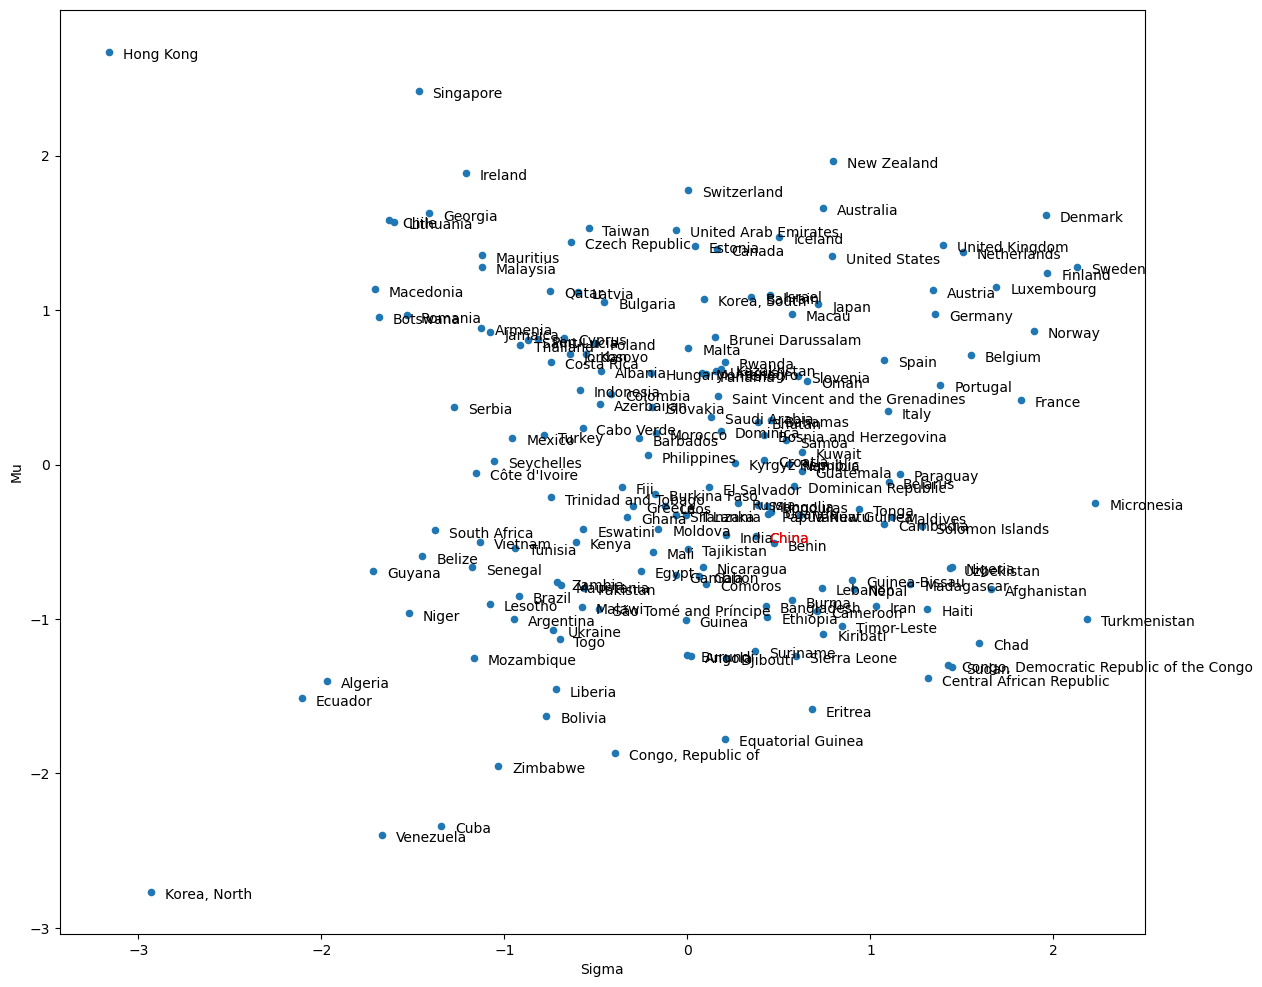

In [29]:
from matplotlib.pyplot import cm
fig, ax = plt.subplots()
cmap = cm.get_cmap('Spectral')
Sigma_Mu_df_transformed.plot('Sigma', 'Mu', kind='scatter', ax=ax, figsize = (14,12))
for k, v in Sigma_Mu_df_transformed.iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=10, color='black')
for k, v in Sigma_Mu_df_transformed.iterrows():
    if (k=='China'):
        plt.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=10, color='red')

Now, the rule for getting PKFs is changed

In [16]:
df =Sigma_Mu_df.copy()
PKF=[]
count=0
while df.shape[0]>0:
    PKF.append([])
    for idx in df.index:
        comp_df = df.copy()
        comp_df.drop(index = idx)
        if any([any([
                ((df.loc[idx][0] < comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])), # loose in both dimensions
                ((df.loc[idx][0] < comp_df.iloc[i,0]) and (df.loc[idx][1] == comp_df.iloc[i,1])), # loose in first dimension and drow in second
                ((df.loc[idx][0] == comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])) # loose in the second dimension 
                    ]) for i in range (comp_df.shape[0])]
                ) == False:
            PKF[count].append(idx)
    
    if len(PKF[count]) == 0:
        PKF[count].append(df.index)
        break
    else:
        df = df.drop(index=PKF[count])
        print(f'PKF_{str(count+1)}: {PKF[count]}')
        count+=1

PKF_1: ['Denmark', 'Hong Kong', 'Micronesia', 'New Zealand', 'Singapore', 'Sweden']
PKF_2: ['Australia', 'Finland', 'Ireland', 'Netherlands', 'Switzerland', 'Turkmenistan', 'United Kingdom']
PKF_3: ['Georgia', 'Iceland', 'Luxembourg', 'Norway', 'Taiwan ', 'United Arab Emirates', 'United States']
PKF_4: ['Austria', 'Belgium', 'Canada', 'Chile', 'Czech Republic', 'Estonia', 'France', 'Germany', 'Lithuania']
PKF_5: ['Afghanistan', 'Israel', 'Japan', 'Latvia', 'Mauritius', 'Nigeria', 'Portugal', 'Qatar', 'Spain']
PKF_6: ['Bahrain', 'Chad', 'Italy', 'Macau', 'Malaysia', 'Oman', 'Paraguay', 'Slovenia', 'Solomon Islands', 'Uzbekistan']
PKF_7: ['Bahamas', 'Belarus', 'Brunei Darussalam', 'Congo, Democratic Republic of the Congo', 'Haiti', 'Korea, South', 'Kuwait', 'Macedonia', 'Madagascar', 'Maldives', 'Rwanda', 'Samoa', 'Sudan']
PKF_8: ['Bhutan', 'Bosnia and Herzegovina', 'Bulgaria', 'Cambodia', 'Central African Republic', 'Croatia', 'Guatemala', 'Kazakhstan', 'Malta', 'Namibia', 'Tonga']
PKF_

In [17]:
lambda_ = 0
m = Sigma_Mu_df.shape[0] # number of alternatives
m_f = len(PKF) # number of frontiers
local_ef = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))
local_ef_new = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))

for unit in range (m):
    for fr in range (m_f):
        unit_sigmamu = np.array([Sigma_Mu_df.iloc[unit]]) # get the alternative unit
        
        Fr_list = [] # list of alternatives within frontier fr or within a less preferred one
        for k in range(fr, m_f):
            for l in range(len(PKF[k])):
                Fr_list.append(PKF[k][l])
        Fr_sigmamu = np.array (Sigma_Mu_df.loc[Fr_list]) # get alternatives within frontier fr or a less preferred one
        
        
        M, resultado = optimize_PROM2_original_positive_beta(unit_sigmamu, Fr_sigmamu)
        local_ef[unit, fr] = M.obj()

        M_new, resultado_new = optimize_newconstraint(unit_sigmamu, Fr_sigmamu, lambda_)
        local_ef_new[unit, fr] = M_new.obj()
        
        print(f'alternative {unit+1}, fronteira {fr + 1}: resolvido.')

alternative 1, fronteira 1: resolvido.
alternative 1, fronteira 2: resolvido.
alternative 1, fronteira 3: resolvido.
alternative 1, fronteira 4: resolvido.
alternative 1, fronteira 5: resolvido.
alternative 1, fronteira 6: resolvido.
alternative 1, fronteira 7: resolvido.
alternative 1, fronteira 8: resolvido.
alternative 1, fronteira 9: resolvido.
alternative 1, fronteira 10: resolvido.
alternative 1, fronteira 11: resolvido.
alternative 1, fronteira 12: resolvido.
alternative 1, fronteira 13: resolvido.
alternative 1, fronteira 14: resolvido.
alternative 1, fronteira 15: resolvido.
alternative 1, fronteira 16: resolvido.
alternative 1, fronteira 17: resolvido.
alternative 1, fronteira 18: resolvido.
alternative 1, fronteira 19: resolvido.
alternative 1, fronteira 20: resolvido.
alternative 1, fronteira 21: resolvido.
alternative 1, fronteira 22: resolvido.
alternative 1, fronteira 23: resolvido.
alternative 1, fronteira 24: resolvido.
alternative 1, fronteira 25: resolvido.
alternati

alternative 9, fronteira 8: resolvido.
alternative 9, fronteira 9: resolvido.
alternative 9, fronteira 10: resolvido.
alternative 9, fronteira 11: resolvido.
alternative 9, fronteira 12: resolvido.
alternative 9, fronteira 13: resolvido.
alternative 9, fronteira 14: resolvido.
alternative 9, fronteira 15: resolvido.
alternative 9, fronteira 16: resolvido.
alternative 9, fronteira 17: resolvido.
alternative 9, fronteira 18: resolvido.
alternative 9, fronteira 19: resolvido.
alternative 9, fronteira 20: resolvido.
alternative 9, fronteira 21: resolvido.
alternative 9, fronteira 22: resolvido.
alternative 9, fronteira 23: resolvido.
alternative 9, fronteira 24: resolvido.
alternative 9, fronteira 25: resolvido.
alternative 10, fronteira 1: resolvido.
alternative 10, fronteira 2: resolvido.
alternative 10, fronteira 3: resolvido.
alternative 10, fronteira 4: resolvido.
alternative 10, fronteira 5: resolvido.
alternative 10, fronteira 6: resolvido.
alternative 10, fronteira 7: resolvido.
al

alternative 17, fronteira 11: resolvido.
alternative 17, fronteira 12: resolvido.
alternative 17, fronteira 13: resolvido.
alternative 17, fronteira 14: resolvido.
alternative 17, fronteira 15: resolvido.
alternative 17, fronteira 16: resolvido.
alternative 17, fronteira 17: resolvido.
alternative 17, fronteira 18: resolvido.
alternative 17, fronteira 19: resolvido.
alternative 17, fronteira 20: resolvido.
alternative 17, fronteira 21: resolvido.
alternative 17, fronteira 22: resolvido.
alternative 17, fronteira 23: resolvido.
alternative 17, fronteira 24: resolvido.
alternative 17, fronteira 25: resolvido.
alternative 18, fronteira 1: resolvido.
alternative 18, fronteira 2: resolvido.
alternative 18, fronteira 3: resolvido.
alternative 18, fronteira 4: resolvido.
alternative 18, fronteira 5: resolvido.
alternative 18, fronteira 6: resolvido.
alternative 18, fronteira 7: resolvido.
alternative 18, fronteira 8: resolvido.
alternative 18, fronteira 9: resolvido.
alternative 18, fronteira

alternative 25, fronteira 13: resolvido.
alternative 25, fronteira 14: resolvido.
alternative 25, fronteira 15: resolvido.
alternative 25, fronteira 16: resolvido.
alternative 25, fronteira 17: resolvido.
alternative 25, fronteira 18: resolvido.
alternative 25, fronteira 19: resolvido.
alternative 25, fronteira 20: resolvido.
alternative 25, fronteira 21: resolvido.
alternative 25, fronteira 22: resolvido.
alternative 25, fronteira 23: resolvido.
alternative 25, fronteira 24: resolvido.
alternative 25, fronteira 25: resolvido.
alternative 26, fronteira 1: resolvido.
alternative 26, fronteira 2: resolvido.
alternative 26, fronteira 3: resolvido.
alternative 26, fronteira 4: resolvido.
alternative 26, fronteira 5: resolvido.
alternative 26, fronteira 6: resolvido.
alternative 26, fronteira 7: resolvido.
alternative 26, fronteira 8: resolvido.
alternative 26, fronteira 9: resolvido.
alternative 26, fronteira 10: resolvido.
alternative 26, fronteira 11: resolvido.
alternative 26, fronteira

alternative 33, fronteira 15: resolvido.
alternative 33, fronteira 16: resolvido.
alternative 33, fronteira 17: resolvido.
alternative 33, fronteira 18: resolvido.
alternative 33, fronteira 19: resolvido.
alternative 33, fronteira 20: resolvido.
alternative 33, fronteira 21: resolvido.
alternative 33, fronteira 22: resolvido.
alternative 33, fronteira 23: resolvido.
alternative 33, fronteira 24: resolvido.
alternative 33, fronteira 25: resolvido.
alternative 34, fronteira 1: resolvido.
alternative 34, fronteira 2: resolvido.
alternative 34, fronteira 3: resolvido.
alternative 34, fronteira 4: resolvido.
alternative 34, fronteira 5: resolvido.
alternative 34, fronteira 6: resolvido.
alternative 34, fronteira 7: resolvido.
alternative 34, fronteira 8: resolvido.
alternative 34, fronteira 9: resolvido.
alternative 34, fronteira 10: resolvido.
alternative 34, fronteira 11: resolvido.
alternative 34, fronteira 12: resolvido.
alternative 34, fronteira 13: resolvido.
alternative 34, fronteira

alternative 41, fronteira 17: resolvido.
alternative 41, fronteira 18: resolvido.
alternative 41, fronteira 19: resolvido.
alternative 41, fronteira 20: resolvido.
alternative 41, fronteira 21: resolvido.
alternative 41, fronteira 22: resolvido.
alternative 41, fronteira 23: resolvido.
alternative 41, fronteira 24: resolvido.
alternative 41, fronteira 25: resolvido.
alternative 42, fronteira 1: resolvido.
alternative 42, fronteira 2: resolvido.
alternative 42, fronteira 3: resolvido.
alternative 42, fronteira 4: resolvido.
alternative 42, fronteira 5: resolvido.
alternative 42, fronteira 6: resolvido.
alternative 42, fronteira 7: resolvido.
alternative 42, fronteira 8: resolvido.
alternative 42, fronteira 9: resolvido.
alternative 42, fronteira 10: resolvido.
alternative 42, fronteira 11: resolvido.
alternative 42, fronteira 12: resolvido.
alternative 42, fronteira 13: resolvido.
alternative 42, fronteira 14: resolvido.
alternative 42, fronteira 15: resolvido.
alternative 42, fronteira

alternative 49, fronteira 19: resolvido.
alternative 49, fronteira 20: resolvido.
alternative 49, fronteira 21: resolvido.
alternative 49, fronteira 22: resolvido.
alternative 49, fronteira 23: resolvido.
alternative 49, fronteira 24: resolvido.
alternative 49, fronteira 25: resolvido.
alternative 50, fronteira 1: resolvido.
alternative 50, fronteira 2: resolvido.
alternative 50, fronteira 3: resolvido.
alternative 50, fronteira 4: resolvido.
alternative 50, fronteira 5: resolvido.
alternative 50, fronteira 6: resolvido.
alternative 50, fronteira 7: resolvido.
alternative 50, fronteira 8: resolvido.
alternative 50, fronteira 9: resolvido.
alternative 50, fronteira 10: resolvido.
alternative 50, fronteira 11: resolvido.
alternative 50, fronteira 12: resolvido.
alternative 50, fronteira 13: resolvido.
alternative 50, fronteira 14: resolvido.
alternative 50, fronteira 15: resolvido.
alternative 50, fronteira 16: resolvido.
alternative 50, fronteira 17: resolvido.
alternative 50, fronteira

alternative 57, fronteira 21: resolvido.
alternative 57, fronteira 22: resolvido.
alternative 57, fronteira 23: resolvido.
alternative 57, fronteira 24: resolvido.
alternative 57, fronteira 25: resolvido.
alternative 58, fronteira 1: resolvido.
alternative 58, fronteira 2: resolvido.
alternative 58, fronteira 3: resolvido.
alternative 58, fronteira 4: resolvido.
alternative 58, fronteira 5: resolvido.
alternative 58, fronteira 6: resolvido.
alternative 58, fronteira 7: resolvido.
alternative 58, fronteira 8: resolvido.
alternative 58, fronteira 9: resolvido.
alternative 58, fronteira 10: resolvido.
alternative 58, fronteira 11: resolvido.
alternative 58, fronteira 12: resolvido.
alternative 58, fronteira 13: resolvido.
alternative 58, fronteira 14: resolvido.
alternative 58, fronteira 15: resolvido.
alternative 58, fronteira 16: resolvido.
alternative 58, fronteira 17: resolvido.
alternative 58, fronteira 18: resolvido.
alternative 58, fronteira 19: resolvido.
alternative 58, fronteira

alternative 65, fronteira 23: resolvido.
alternative 65, fronteira 24: resolvido.
alternative 65, fronteira 25: resolvido.
alternative 66, fronteira 1: resolvido.
alternative 66, fronteira 2: resolvido.
alternative 66, fronteira 3: resolvido.
alternative 66, fronteira 4: resolvido.
alternative 66, fronteira 5: resolvido.
alternative 66, fronteira 6: resolvido.
alternative 66, fronteira 7: resolvido.
alternative 66, fronteira 8: resolvido.
alternative 66, fronteira 9: resolvido.
alternative 66, fronteira 10: resolvido.
alternative 66, fronteira 11: resolvido.
alternative 66, fronteira 12: resolvido.
alternative 66, fronteira 13: resolvido.
alternative 66, fronteira 14: resolvido.
alternative 66, fronteira 15: resolvido.
alternative 66, fronteira 16: resolvido.
alternative 66, fronteira 17: resolvido.
alternative 66, fronteira 18: resolvido.
alternative 66, fronteira 19: resolvido.
alternative 66, fronteira 20: resolvido.
alternative 66, fronteira 21: resolvido.
alternative 66, fronteira

alternative 73, fronteira 25: resolvido.
alternative 74, fronteira 1: resolvido.
alternative 74, fronteira 2: resolvido.
alternative 74, fronteira 3: resolvido.
alternative 74, fronteira 4: resolvido.
alternative 74, fronteira 5: resolvido.
alternative 74, fronteira 6: resolvido.
alternative 74, fronteira 7: resolvido.
alternative 74, fronteira 8: resolvido.
alternative 74, fronteira 9: resolvido.
alternative 74, fronteira 10: resolvido.
alternative 74, fronteira 11: resolvido.
alternative 74, fronteira 12: resolvido.
alternative 74, fronteira 13: resolvido.
alternative 74, fronteira 14: resolvido.
alternative 74, fronteira 15: resolvido.
alternative 74, fronteira 16: resolvido.
alternative 74, fronteira 17: resolvido.
alternative 74, fronteira 18: resolvido.
alternative 74, fronteira 19: resolvido.
alternative 74, fronteira 20: resolvido.
alternative 74, fronteira 21: resolvido.
alternative 74, fronteira 22: resolvido.
alternative 74, fronteira 23: resolvido.
alternative 74, fronteira

alternative 82, fronteira 2: resolvido.
alternative 82, fronteira 3: resolvido.
alternative 82, fronteira 4: resolvido.
alternative 82, fronteira 5: resolvido.
alternative 82, fronteira 6: resolvido.
alternative 82, fronteira 7: resolvido.
alternative 82, fronteira 8: resolvido.
alternative 82, fronteira 9: resolvido.
alternative 82, fronteira 10: resolvido.
alternative 82, fronteira 11: resolvido.
alternative 82, fronteira 12: resolvido.
alternative 82, fronteira 13: resolvido.
alternative 82, fronteira 14: resolvido.
alternative 82, fronteira 15: resolvido.
alternative 82, fronteira 16: resolvido.
alternative 82, fronteira 17: resolvido.
alternative 82, fronteira 18: resolvido.
alternative 82, fronteira 19: resolvido.
alternative 82, fronteira 20: resolvido.
alternative 82, fronteira 21: resolvido.
alternative 82, fronteira 22: resolvido.
alternative 82, fronteira 23: resolvido.
alternative 82, fronteira 24: resolvido.
alternative 82, fronteira 25: resolvido.
alternative 83, fronteir

alternative 90, fronteira 4: resolvido.
alternative 90, fronteira 5: resolvido.
alternative 90, fronteira 6: resolvido.
alternative 90, fronteira 7: resolvido.
alternative 90, fronteira 8: resolvido.
alternative 90, fronteira 9: resolvido.
alternative 90, fronteira 10: resolvido.
alternative 90, fronteira 11: resolvido.
alternative 90, fronteira 12: resolvido.
alternative 90, fronteira 13: resolvido.
alternative 90, fronteira 14: resolvido.
alternative 90, fronteira 15: resolvido.
alternative 90, fronteira 16: resolvido.
alternative 90, fronteira 17: resolvido.
alternative 90, fronteira 18: resolvido.
alternative 90, fronteira 19: resolvido.
alternative 90, fronteira 20: resolvido.
alternative 90, fronteira 21: resolvido.
alternative 90, fronteira 22: resolvido.
alternative 90, fronteira 23: resolvido.
alternative 90, fronteira 24: resolvido.
alternative 90, fronteira 25: resolvido.
alternative 91, fronteira 1: resolvido.
alternative 91, fronteira 2: resolvido.
alternative 91, fronteir

alternative 98, fronteira 6: resolvido.
alternative 98, fronteira 7: resolvido.
alternative 98, fronteira 8: resolvido.
alternative 98, fronteira 9: resolvido.
alternative 98, fronteira 10: resolvido.
alternative 98, fronteira 11: resolvido.
alternative 98, fronteira 12: resolvido.
alternative 98, fronteira 13: resolvido.
alternative 98, fronteira 14: resolvido.
alternative 98, fronteira 15: resolvido.
alternative 98, fronteira 16: resolvido.
alternative 98, fronteira 17: resolvido.
alternative 98, fronteira 18: resolvido.
alternative 98, fronteira 19: resolvido.
alternative 98, fronteira 20: resolvido.
alternative 98, fronteira 21: resolvido.
alternative 98, fronteira 22: resolvido.
alternative 98, fronteira 23: resolvido.
alternative 98, fronteira 24: resolvido.
alternative 98, fronteira 25: resolvido.
alternative 99, fronteira 1: resolvido.
alternative 99, fronteira 2: resolvido.
alternative 99, fronteira 3: resolvido.
alternative 99, fronteira 4: resolvido.
alternative 99, fronteir

alternative 106, fronteira 4: resolvido.
alternative 106, fronteira 5: resolvido.
alternative 106, fronteira 6: resolvido.
alternative 106, fronteira 7: resolvido.
alternative 106, fronteira 8: resolvido.
alternative 106, fronteira 9: resolvido.
alternative 106, fronteira 10: resolvido.
alternative 106, fronteira 11: resolvido.
alternative 106, fronteira 12: resolvido.
alternative 106, fronteira 13: resolvido.
alternative 106, fronteira 14: resolvido.
alternative 106, fronteira 15: resolvido.
alternative 106, fronteira 16: resolvido.
alternative 106, fronteira 17: resolvido.
alternative 106, fronteira 18: resolvido.
alternative 106, fronteira 19: resolvido.
alternative 106, fronteira 20: resolvido.
alternative 106, fronteira 21: resolvido.
alternative 106, fronteira 22: resolvido.
alternative 106, fronteira 23: resolvido.
alternative 106, fronteira 24: resolvido.
alternative 106, fronteira 25: resolvido.
alternative 107, fronteira 1: resolvido.
alternative 107, fronteira 2: resolvido.


alternative 114, fronteira 1: resolvido.
alternative 114, fronteira 2: resolvido.
alternative 114, fronteira 3: resolvido.
alternative 114, fronteira 4: resolvido.
alternative 114, fronteira 5: resolvido.
alternative 114, fronteira 6: resolvido.
alternative 114, fronteira 7: resolvido.
alternative 114, fronteira 8: resolvido.
alternative 114, fronteira 9: resolvido.
alternative 114, fronteira 10: resolvido.
alternative 114, fronteira 11: resolvido.
alternative 114, fronteira 12: resolvido.
alternative 114, fronteira 13: resolvido.
alternative 114, fronteira 14: resolvido.
alternative 114, fronteira 15: resolvido.
alternative 114, fronteira 16: resolvido.
alternative 114, fronteira 17: resolvido.
alternative 114, fronteira 18: resolvido.
alternative 114, fronteira 19: resolvido.
alternative 114, fronteira 20: resolvido.
alternative 114, fronteira 21: resolvido.
alternative 114, fronteira 22: resolvido.
alternative 114, fronteira 23: resolvido.
alternative 114, fronteira 24: resolvido.
a

alternative 121, fronteira 23: resolvido.
alternative 121, fronteira 24: resolvido.
alternative 121, fronteira 25: resolvido.
alternative 122, fronteira 1: resolvido.
alternative 122, fronteira 2: resolvido.
alternative 122, fronteira 3: resolvido.
alternative 122, fronteira 4: resolvido.
alternative 122, fronteira 5: resolvido.
alternative 122, fronteira 6: resolvido.
alternative 122, fronteira 7: resolvido.
alternative 122, fronteira 8: resolvido.
alternative 122, fronteira 9: resolvido.
alternative 122, fronteira 10: resolvido.
alternative 122, fronteira 11: resolvido.
alternative 122, fronteira 12: resolvido.
alternative 122, fronteira 13: resolvido.
alternative 122, fronteira 14: resolvido.
alternative 122, fronteira 15: resolvido.
alternative 122, fronteira 16: resolvido.
alternative 122, fronteira 17: resolvido.
alternative 122, fronteira 18: resolvido.
alternative 122, fronteira 19: resolvido.
alternative 122, fronteira 20: resolvido.
alternative 122, fronteira 21: resolvido.
a

alternative 129, fronteira 20: resolvido.
alternative 129, fronteira 21: resolvido.
alternative 129, fronteira 22: resolvido.
alternative 129, fronteira 23: resolvido.
alternative 129, fronteira 24: resolvido.
alternative 129, fronteira 25: resolvido.
alternative 130, fronteira 1: resolvido.
alternative 130, fronteira 2: resolvido.
alternative 130, fronteira 3: resolvido.
alternative 130, fronteira 4: resolvido.
alternative 130, fronteira 5: resolvido.
alternative 130, fronteira 6: resolvido.
alternative 130, fronteira 7: resolvido.
alternative 130, fronteira 8: resolvido.
alternative 130, fronteira 9: resolvido.
alternative 130, fronteira 10: resolvido.
alternative 130, fronteira 11: resolvido.
alternative 130, fronteira 12: resolvido.
alternative 130, fronteira 13: resolvido.
alternative 130, fronteira 14: resolvido.
alternative 130, fronteira 15: resolvido.
alternative 130, fronteira 16: resolvido.
alternative 130, fronteira 17: resolvido.
alternative 130, fronteira 18: resolvido.
a

alternative 137, fronteira 17: resolvido.
alternative 137, fronteira 18: resolvido.
alternative 137, fronteira 19: resolvido.
alternative 137, fronteira 20: resolvido.
alternative 137, fronteira 21: resolvido.
alternative 137, fronteira 22: resolvido.
alternative 137, fronteira 23: resolvido.
alternative 137, fronteira 24: resolvido.
alternative 137, fronteira 25: resolvido.
alternative 138, fronteira 1: resolvido.
alternative 138, fronteira 2: resolvido.
alternative 138, fronteira 3: resolvido.
alternative 138, fronteira 4: resolvido.
alternative 138, fronteira 5: resolvido.
alternative 138, fronteira 6: resolvido.
alternative 138, fronteira 7: resolvido.
alternative 138, fronteira 8: resolvido.
alternative 138, fronteira 9: resolvido.
alternative 138, fronteira 10: resolvido.
alternative 138, fronteira 11: resolvido.
alternative 138, fronteira 12: resolvido.
alternative 138, fronteira 13: resolvido.
alternative 138, fronteira 14: resolvido.
alternative 138, fronteira 15: resolvido.
a

alternative 145, fronteira 14: resolvido.
alternative 145, fronteira 15: resolvido.
alternative 145, fronteira 16: resolvido.
alternative 145, fronteira 17: resolvido.
alternative 145, fronteira 18: resolvido.
alternative 145, fronteira 19: resolvido.
alternative 145, fronteira 20: resolvido.
alternative 145, fronteira 21: resolvido.
alternative 145, fronteira 22: resolvido.
alternative 145, fronteira 23: resolvido.
alternative 145, fronteira 24: resolvido.
alternative 145, fronteira 25: resolvido.
alternative 146, fronteira 1: resolvido.
alternative 146, fronteira 2: resolvido.
alternative 146, fronteira 3: resolvido.
alternative 146, fronteira 4: resolvido.
alternative 146, fronteira 5: resolvido.
alternative 146, fronteira 6: resolvido.
alternative 146, fronteira 7: resolvido.
alternative 146, fronteira 8: resolvido.
alternative 146, fronteira 9: resolvido.
alternative 146, fronteira 10: resolvido.
alternative 146, fronteira 11: resolvido.
alternative 146, fronteira 12: resolvido.
a

alternative 153, fronteira 11: resolvido.
alternative 153, fronteira 12: resolvido.
alternative 153, fronteira 13: resolvido.
alternative 153, fronteira 14: resolvido.
alternative 153, fronteira 15: resolvido.
alternative 153, fronteira 16: resolvido.
alternative 153, fronteira 17: resolvido.
alternative 153, fronteira 18: resolvido.
alternative 153, fronteira 19: resolvido.
alternative 153, fronteira 20: resolvido.
alternative 153, fronteira 21: resolvido.
alternative 153, fronteira 22: resolvido.
alternative 153, fronteira 23: resolvido.
alternative 153, fronteira 24: resolvido.
alternative 153, fronteira 25: resolvido.
alternative 154, fronteira 1: resolvido.
alternative 154, fronteira 2: resolvido.
alternative 154, fronteira 3: resolvido.
alternative 154, fronteira 4: resolvido.
alternative 154, fronteira 5: resolvido.
alternative 154, fronteira 6: resolvido.
alternative 154, fronteira 7: resolvido.
alternative 154, fronteira 8: resolvido.
alternative 154, fronteira 9: resolvido.
a

alternative 161, fronteira 8: resolvido.
alternative 161, fronteira 9: resolvido.
alternative 161, fronteira 10: resolvido.
alternative 161, fronteira 11: resolvido.
alternative 161, fronteira 12: resolvido.
alternative 161, fronteira 13: resolvido.
alternative 161, fronteira 14: resolvido.
alternative 161, fronteira 15: resolvido.
alternative 161, fronteira 16: resolvido.
alternative 161, fronteira 17: resolvido.
alternative 161, fronteira 18: resolvido.
alternative 161, fronteira 19: resolvido.
alternative 161, fronteira 20: resolvido.
alternative 161, fronteira 21: resolvido.
alternative 161, fronteira 22: resolvido.
alternative 161, fronteira 23: resolvido.
alternative 161, fronteira 24: resolvido.
alternative 161, fronteira 25: resolvido.
alternative 162, fronteira 1: resolvido.
alternative 162, fronteira 2: resolvido.
alternative 162, fronteira 3: resolvido.
alternative 162, fronteira 4: resolvido.
alternative 162, fronteira 5: resolvido.
alternative 162, fronteira 6: resolvido.


alternative 169, fronteira 5: resolvido.
alternative 169, fronteira 6: resolvido.
alternative 169, fronteira 7: resolvido.
alternative 169, fronteira 8: resolvido.
alternative 169, fronteira 9: resolvido.
alternative 169, fronteira 10: resolvido.
alternative 169, fronteira 11: resolvido.
alternative 169, fronteira 12: resolvido.
alternative 169, fronteira 13: resolvido.
alternative 169, fronteira 14: resolvido.
alternative 169, fronteira 15: resolvido.
alternative 169, fronteira 16: resolvido.
alternative 169, fronteira 17: resolvido.
alternative 169, fronteira 18: resolvido.
alternative 169, fronteira 19: resolvido.
alternative 169, fronteira 20: resolvido.
alternative 169, fronteira 21: resolvido.
alternative 169, fronteira 22: resolvido.
alternative 169, fronteira 23: resolvido.
alternative 169, fronteira 24: resolvido.
alternative 169, fronteira 25: resolvido.
alternative 170, fronteira 1: resolvido.
alternative 170, fronteira 2: resolvido.
alternative 170, fronteira 3: resolvido.


alternative 177, fronteira 2: resolvido.
alternative 177, fronteira 3: resolvido.
alternative 177, fronteira 4: resolvido.
alternative 177, fronteira 5: resolvido.
alternative 177, fronteira 6: resolvido.
alternative 177, fronteira 7: resolvido.
alternative 177, fronteira 8: resolvido.
alternative 177, fronteira 9: resolvido.
alternative 177, fronteira 10: resolvido.
alternative 177, fronteira 11: resolvido.
alternative 177, fronteira 12: resolvido.
alternative 177, fronteira 13: resolvido.
alternative 177, fronteira 14: resolvido.
alternative 177, fronteira 15: resolvido.
alternative 177, fronteira 16: resolvido.
alternative 177, fronteira 17: resolvido.
alternative 177, fronteira 18: resolvido.
alternative 177, fronteira 19: resolvido.
alternative 177, fronteira 20: resolvido.
alternative 177, fronteira 21: resolvido.
alternative 177, fronteira 22: resolvido.
alternative 177, fronteira 23: resolvido.
alternative 177, fronteira 24: resolvido.
alternative 177, fronteira 25: resolvido.


In [18]:
global_ef = np.sum(local_ef, axis = 1)
global_ef = (global_ef - global_ef.min()) /(global_ef.max() - global_ef.min())
results = pd.DataFrame({"Global Efficiency": global_ef}, index = Sigma_Mu_df.index)
results = results.assign(Position = results.rank(ascending=False))
results

Global Efficiency  Position
Afghanistan           0.229375     112.0
Albania               0.367660      63.0
Algeria               0.085552     175.0
Angola                0.152114     162.0
Argentina             0.144259     167.0
...                        ...       ...
Vanuatu               0.245334     101.0
Venezuela             0.046897     179.0
Vietnam               0.184438     145.0
Zambia                0.170212     150.0
Zimbabwe              0.084839     176.0

[180 rows x 2 columns]

In [19]:
results.to_excel('Ranking_Promethee_Scoring_Model_Modified.xlsx')

Alternativa $Turkmenistan$ agora está na 114º posição ao invés da posição 180.

Vamos ver o comportamento dessa alternativa.

In [22]:
Net_Flows.shape

(180, 10000)

In [23]:
n_simulations = 10000

In [24]:
Net_Flows_df = pd.DataFrame(Net_Flows, columns = [s for s in range(n_simulations)], index = dados.index)
Net_Flows_df

0         1         2         3         4         5     \
Afghanistan -0.234697 -0.345221 -0.710366 -0.324762  0.196273 -0.065090   
Albania      0.158047  0.239419  0.184650  0.181378  0.131219  0.128340   
Algeria     -0.462847 -0.417007 -0.584652 -0.411863 -0.559503 -0.476539   
Angola      -0.521573 -0.564338 -0.584814 -0.463652 -0.264712 -0.308385   
Argentina   -0.451747 -0.348029 -0.139000 -0.330388 -0.385512 -0.457142   
...               ...       ...       ...       ...       ...       ...   
Vanuatu     -0.102178  0.038193  0.119710 -0.112437 -0.246214 -0.255472   
Venezuela   -0.889293 -0.843675 -0.939311 -0.820834 -0.743596 -0.754956   
Vietnam     -0.269942 -0.147470 -0.138656 -0.225100 -0.190519 -0.137253   
Zambia      -0.389640 -0.254159 -0.207807 -0.227734 -0.476528 -0.174194   
Zimbabwe    -0.672359 -0.726769 -0.781116 -0.677356 -0.659535 -0.475300   

                 6         7         8         9     ...      9990      9991  \
Afghanistan -0.061529 -0.559097 -0.604554 -0.352860  ... -0.105263 -0.167993   
Albania      0.265877  0.196334  0.362472  0.254899  ...  0.145563  0.289356   
Algeria     -0.499809 -0.460635 -0.577993 -0.513710  ... -0.441351 -0.504110   
Angola      -0.361855 -0.489986 -0.463225 -0.397607  ... -0.573285 -0.193066   
Argentina   -0.418266 -0.180637 -0.148970 -0.266192  ... -0.517964 -0.396584   
...               ...       ...       ...       ...  ...       ...       ...   
Vanuatu     -0.160015 -0.181551 -0.193923 -0.009843  ... -0.181362 -0.333539   
Venezuela   -0.750500 -0.901277 -0.857050 -0.834704  ... -0.878729 -0.691997   
Vietnam     -0.090345 -0.165391 -0.251618 -0.150685  ... -0.323622 -0.035186   
Zambia      -0.357836 -0.097836 -0.098472 -0.298751  ... -0.449413 -0.003860   
Zimbabwe    -0.602071 -0.805889 -0.663902 -0.746462  ... -0.618111 -0.427659   

                 9992      9993      9994      9995      9996      9997  \
Afghanistan -0.648879 -0.221229 -0.337921 -0.157678 -0.561045 -0.065408   
Albania      0.265645  0.330063  0.260623  0.280918  0.228878  0.160003   
Algeria     -0.490557 -0.489735 -0.395427 -0.459318 -0.530096 -0.477909   
Angola      -0.577321 -0.316766 -0.378068 -0.212083 -0.592177 -0.293180   
Argentina   -0.172455 -0.409778 -0.285255 -0.296757 -0.148951 -0.409373   
...               ...       ...       ...       ...       ...       ...   
Vanuatu     -0.111997 -0.014456  0.143974 -0.118583  0.037676 -0.066450   
Venezuela   -0.910500 -0.738685 -0.780603 -0.679439 -0.916020 -0.764700   
Vietnam     -0.203627 -0.110528 -0.088858 -0.048042 -0.208796 -0.088464   
Zambia      -0.165396 -0.118310 -0.203366 -0.107342 -0.228364 -0.355801   
Zimbabwe    -0.769295 -0.496549 -0.802069 -0.507523 -0.819941 -0.660168   

                 9998      9999  
Afghanistan -0.170557 -0.100197  
Albania      0.422807  0.254241  
Algeria     -0.394119 -0.462634  
Angola      -0.376148 -0.289176  
Argentina   -0.450025 -0.419650  
...               ...       ...  
Vanuatu     -0.113475  0.246198  
Venezuela   -0.738230 -0.727592  
Vietnam     -0.045479 -0.093637  
Zambia      -0.264454 -0.322506  
Zimbabwe    -0.570540 -0.671355  

[180 rows x 10000 columns]

In [25]:
Net_Flows_rank = Net_Flows_df.rank(ascending=False)
Net_Flows_rank

0      1      2      3      4      5      6      7      8     \
Afghanistan  127.0  143.0  171.0  149.0   53.0  106.0  103.0  165.0  171.0   
Albania       66.0   58.0   66.0   66.0   68.0   54.0   39.0   62.0   37.0   
Algeria      165.0  152.0  160.0  162.0  174.0  172.0  173.0  152.0  167.0   
Angola       169.0  169.0  161.0  167.0  140.0  160.0  157.0  155.0  155.0   
Argentina    162.0  144.0  105.0  151.0  155.0  169.0  165.0  110.0  111.0   
...            ...    ...    ...    ...    ...    ...    ...    ...    ...   
Vanuatu      105.0   85.0   77.0  107.0  139.0  153.0  119.0  111.0  116.0   
Venezuela    179.0  179.0  180.0  178.0  177.0  178.0  177.0  179.0  178.0   
Vietnam      135.0  109.0  104.0  130.0  129.0  133.0  107.0  108.0  125.0   
Zambia       153.0  122.0  112.0  131.0  166.0  140.0  156.0  100.0   97.0   
Zimbabwe     177.0  178.0  178.0  177.0  175.0  171.0  175.0  178.0  176.0   

              9     ...   9990   9991   9992   9993   9994   9995   9996  \
Afghanistan  150.0  ...  106.0  135.0  171.0  141.0  143.0  136.0  164.0   
Albania       52.0  ...   67.0   26.0   57.0   21.0   52.0   31.0   60.0   
Algeria      170.0  ...  158.0  173.0  152.0  172.0  151.0  170.0  160.0   
Angola       157.0  ...  172.0  143.0  165.0  158.0  149.0  145.0  170.0   
Argentina    131.0  ...  168.0  165.0  111.0  166.0  134.0  160.0  102.0   
...            ...  ...    ...    ...    ...    ...    ...    ...    ...   
Vanuatu       89.0  ...  121.0  160.0   95.0   90.0   70.0  117.0   82.0   
Venezuela    179.0  ...  179.0  176.0  179.0  178.0  178.0  178.0  180.0   
Vietnam      111.0  ...  144.0   97.0  117.0  117.0  106.0  100.0  112.0   
Zambia       139.0  ...  159.0   84.0  109.0  119.0  120.0  113.0  117.0   
Zimbabwe     177.0  ...  175.0  167.0  177.0  173.0  179.0  173.0  178.0   

              9997   9998   9999  
Afghanistan  104.0  117.0  117.0  
Albania       61.0   22.0   36.0  
Algeria      173.0  158.0  171.0  
Angola       151.0  156.0  152.0  
Argentina    165.0  165.0  166.0  
...            ...    ...    ...  
Vanuatu      105.0  113.0   41.0  
Venezuela    178.0  178.0  178.0  
Vietnam      108.0  100.0  116.0  
Zambia       159.0  135.0  156.0  
Zimbabwe     175.0  175.0  177.0  

[180 rows x 10000 columns]

In [28]:
# Porcentagem de vezes que Turkmenistan vence Afghanistan

count = 0
for j in range (n_simulations):
    if Net_Flows_rank.loc['Turkmenistan'][j] < Net_Flows_rank.loc['China'][j]:
        count += 1

count/n_simulations

0.2231

In [31]:
# Mode over alternative positions
Mode= Net_Flows_rank.mode(axis = 1)
Mode

0   1   2
Afghanistan  152.0 NaN NaN
Albania       59.0 NaN NaN
Algeria      170.0 NaN NaN
Angola       165.0 NaN NaN
Argentina    161.0 NaN NaN
...            ...  ..  ..
Vanuatu       97.0 NaN NaN
Venezuela    179.0 NaN NaN
Vietnam      113.0 NaN NaN
Zambia       130.0 NaN NaN
Zimbabwe     177.0 NaN NaN

[180 rows x 3 columns]

In [32]:
Mode.to_excel('Mode_Net_Flows_rank.xlsx')

In [33]:
Net_Flows_rank_counts = Net_Flows_rank.apply(pd.Series.value_counts, axis = 1).fillna(0)
Net_Flows_rank_counts

1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0    \
Afghanistan    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Albania        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Algeria        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Angola         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Argentina      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...            ...    ...    ...    ...    ...    ...    ...    ...    ...   
Vanuatu        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Venezuela      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Vietnam        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Zambia         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Zimbabwe       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

             10.0   ...  171.0  172.0  173.0  174.0   175.0   176.0   177.0  \
Afghanistan    0.0  ...   32.0   21.0    8.0    6.0     0.0     1.0     0.0   
Albania        1.0  ...    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
Algeria        0.0  ...  698.0  619.0  394.0  235.0    72.0    12.0     0.0   
Angola         0.0  ...  262.0  185.0  161.0  105.0    55.0    20.0    11.0   
Argentina      0.0  ...  100.0   90.0   70.0   47.0    63.0    28.0    20.0   
...            ...  ...    ...    ...    ...    ...     ...     ...     ...   
Vanuatu        0.0  ...    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
Venezuela      0.0  ...    1.0    1.0   19.0   35.0    45.0   170.0   659.0   
Vietnam        0.0  ...    0.0    0.0    0.0    0.0     0.0     0.0     0.0   
Zambia         0.0  ...    8.0    3.0    3.0    1.0     0.0     0.0     0.0   
Zimbabwe       0.0  ...  209.0  265.0  431.0  777.0  1615.0  1942.0  3133.0   

              178.0   179.0  180.0  
Afghanistan     0.0     0.0    0.0  
Albania         0.0     0.0    0.0  
Algeria         0.0     0.0    0.0  
Angola          1.0     0.0    0.0  
Argentina       0.0     0.0    0.0  
...             ...     ...    ...  
Vanuatu         0.0     0.0    0.0  
Venezuela    3588.0  5096.0  381.0  
Vietnam         0.0     0.0    0.0  
Zambia          0.0     0.0    0.0  
Zimbabwe      943.0    55.0    0.0  

[180 rows x 180 columns]

In [34]:
Net_Flows_rank_probs = Net_Flows_rank_counts/n_simulations
Net_Flows_rank_probs

1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0    \
Afghanistan    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Albania        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Algeria        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Angola         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Argentina      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...            ...    ...    ...    ...    ...    ...    ...    ...    ...   
Vanuatu        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Venezuela      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Vietnam        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Zambia         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Zimbabwe       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

              10.0   ...   171.0   172.0   173.0   174.0   175.0   176.0  \
Afghanistan  0.0000  ...  0.0032  0.0021  0.0008  0.0006  0.0000  0.0001   
Albania      0.0001  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
Algeria      0.0000  ...  0.0698  0.0619  0.0394  0.0235  0.0072  0.0012   
Angola       0.0000  ...  0.0262  0.0185  0.0161  0.0105  0.0055  0.0020   
Argentina    0.0000  ...  0.0100  0.0090  0.0070  0.0047  0.0063  0.0028   
...             ...  ...     ...     ...     ...     ...     ...     ...   
Vanuatu      0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
Venezuela    0.0000  ...  0.0001  0.0001  0.0019  0.0035  0.0045  0.0170   
Vietnam      0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
Zambia       0.0000  ...  0.0008  0.0003  0.0003  0.0001  0.0000  0.0000   
Zimbabwe     0.0000  ...  0.0209  0.0265  0.0431  0.0777  0.1615  0.1942   

              177.0   178.0   179.0   180.0  
Afghanistan  0.0000  0.0000  0.0000  0.0000  
Albania      0.0000  0.0000  0.0000  0.0000  
Algeria      0.0000  0.0000  0.0000  0.0000  
Angola       0.0011  0.0001  0.0000  0.0000  
Argentina    0.0020  0.0000  0.0000  0.0000  
...             ...     ...     ...     ...  
Vanuatu      0.0000  0.0000  0.0000  0.0000  
Venezuela    0.0659  0.3588  0.5096  0.0381  
Vietnam      0.0000  0.0000  0.0000  0.0000  
Zambia       0.0000  0.0000  0.0000  0.0000  
Zimbabwe     0.3133  0.0943  0.0055  0.0000  

[180 rows x 180 columns]

In [35]:
Net_Flows_rank_probs_max = pd.DataFrame(Net_Flows_rank_probs.max(axis=1))
Net_Flows_rank_probs_max

0
Afghanistan  0.0210
Albania      0.0271
Algeria      0.0716
Angola       0.0478
Argentina    0.0256
...             ...
Vanuatu      0.0176
Venezuela    0.5096
Vietnam      0.0282
Zambia       0.0233
Zimbabwe     0.3133

[180 rows x 1 columns]

In [36]:
Net_Flows_rank_probs_max.to_excel('Net_Flows_rank_probs_max.xlsx')

In [37]:
weights = np.arange(1, 181)
SumProduct_rank_probs = Net_Flows_rank_probs * weights
Net_Flows_expected_rank = SumProduct_rank_probs.sum(axis = 1)
Expected_rank = pd.DataFrame(Net_Flows_expected_rank)
Expected_rank

0
Afghanistan  133.3431
Albania       56.1245
Algeria      163.8900
Angola       157.8417
Argentina    145.9249
...               ...
Vanuatu      107.2955
Venezuela    178.4410
Vietnam      117.3270
Zambia       132.9394
Zimbabwe     175.2717

[180 rows x 1 columns]

In [38]:
Expected_rank.to_excel('Expected_rank_SMAA_PROMETHEEII.xlsx')